In [45]:
import os
import glob

from enum import Enum, auto

import zarr
import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
class Channel(Enum):
    Player_1_Worker = 0
    Player_1_Ground = 1
    Player_1_Air = 2
    Player_1_Building = 3
    
    Player_2_Worker = 4
    Player_2_Ground = 5
    Player_2_Air = 6
    Player_2_Building = 7
    
    Resource = 8
    Vision = 9
    Terrain = 10

In [76]:
rep_name = "36.rep"
dest_dir = os.path.join(os.path.curdir, f"results/{rep_name}")
npys = glob.glob(os.path.join(dest_dir, f"*.npy"))

In [77]:
import numpy as np
import tqdm

max_frame = 0
max_count = 0
max_density = 0

for frame in tqdm.tqdm(range(0, len(npys))):
    data = np.load(npys[frame])

    count_array = (data[Channel.Player_1_Worker.value:Channel.Player_2_Building.value + 1] != 0).sum(axis=0)
    count = count_array.sum()
    
    # 특정 채널 합이 0인 경우 무시
    sum_per_channel = data[Channel.Player_1_Worker.value:Channel.Player_2_Building.value + 1].sum(axis=(1, 2))
    if np.any(sum_per_channel == 0):  # 하나라도 0이면 무시
        continue

    center = np.array(data[Channel.Terrain.value].shape) / 2
    nonzero_indices = count_array.nonzero()
    
    if len(nonzero_indices[0]) > 0:
        distances_from_center = np.linalg.norm(np.array(nonzero_indices).T - center, axis=1)
        spread_variance = distances_from_center.var()
    else:
        spread_variance = 0

    if count > max_count:
        if spread_variance > max_density:
            max_frame = frame
            max_count = count
            max_density = spread_variance

print(f"Max frame: {max_frame}")
print(f"Max current: {max_count}")
print(f"Max density: {max_density:.2f}")

100%|██████████| 28330/28330 [02:13<00:00, 212.73it/s]

Max frame: 9548
Max current: 153
Max density: 671.80


|   rep    | frame | current | density |
|----------|-------|---------|---------|
| 36.rep   |  9548 |     153 |  671.80 |
| 212.rep  |  9815 |     262 |  479.09 |
| 438.rep  |  7346 |     118 |  512.25 |
| 1660.rep | 12713 |     211 |  610.23 |

&nbsp;

|   rep    | frame | current | density |
|----------|-------|---------|---------|
| 36.rep   |  9548 |     153 |  671.80 |
| 212.rep  |  9815 |     262 |  479.09 |
| 438.rep  | 19640 |     270 |  428.21 |
| 1660.rep | 12713 |     211 |  610.23 |

In [78]:
candidate = {
    "rep": ["36.rep", "212.rep", "438.rep", "438.rep", "1660.rep"],
    "frame": [9548, 9815, 7346, 19640, 12713],
    "current": [153, 262, 118, 270, 211],
    "density": [671.80, 479.09, 512.25, 428.21, 610.23]
}

In [79]:
for _, row in pd.DataFrame(candidate).iterrows():
    print(f"Rep: {row['rep']}, Frame: {row['frame']}, Current: {row['current']}, Density: {row['density']}")
    
    data = np.load(os.path.join(os.path.curdir, f"results/{row['rep']}/{row['frame']}.npy"))

    print(f'{Channel.Player_1_Worker.name}: {(data[Channel.Player_1_Worker.value] != 0).sum()}')
    print(f'{Channel.Player_1_Ground.name}: {(data[Channel.Player_1_Ground.value] != 0).sum()}')
    print(f'{Channel.Player_1_Air.name}: {(data[Channel.Player_1_Air.value] != 0).sum()}')
    print(f'{Channel.Player_1_Building.name}: {(data[Channel.Player_1_Building.value] != 0).sum()}')

    print(f'{Channel.Player_2_Worker.name}: {(data[Channel.Player_2_Worker.value] != 0).sum()}')
    print(f'{Channel.Player_2_Ground.name}: {(data[Channel.Player_2_Ground.value] != 0).sum()}')
    print(f'{Channel.Player_2_Air.name}: {(data[Channel.Player_2_Air.value] != 0).sum()}')
    print(f'{Channel.Player_2_Building.name}: {(data[Channel.Player_2_Building.value] != 0).sum()}')

    count = (
        (data[Channel.Player_1_Worker.value] != 0).sum() +
        (data[Channel.Player_1_Ground.value] != 0).sum() +
        (data[Channel.Player_1_Air.value] != 0).sum() +
        (data[Channel.Player_1_Building.value] != 0).sum() +
        (data[Channel.Player_2_Worker.value] != 0).sum() +
        (data[Channel.Player_2_Ground.value] != 0).sum() +
        (data[Channel.Player_2_Air.value] != 0).sum() +
        (data[Channel.Player_2_Building.value] != 0).sum()
    )

    print(f'Total non-zero count: {count}\n')


Rep: 36.rep, Frame: 9548, Current: 153, Density: 671.8
Player_1_Worker: 24
Player_1_Ground: 7
Player_1_Air: 5
Player_1_Building: 9
Player_2_Worker: 21
Player_2_Ground: 13
Player_2_Air: 0
Player_2_Building: 15
Total non-zero count: 94

Rep: 212.rep, Frame: 9815, Current: 262, Density: 479.09
Player_1_Worker: 26
Player_1_Ground: 6
Player_1_Air: 7
Player_1_Building: 10
Player_2_Worker: 24
Player_2_Ground: 7
Player_2_Air: 1
Player_2_Building: 18
Total non-zero count: 99

Rep: 438.rep, Frame: 7346, Current: 118, Density: 512.25
Player_1_Worker: 14
Player_1_Ground: 2
Player_1_Air: 2
Player_1_Building: 4
Player_2_Worker: 8
Player_2_Ground: 9
Player_2_Air: 0
Player_2_Building: 9
Total non-zero count: 48

Rep: 438.rep, Frame: 19640, Current: 270, Density: 428.21
Player_1_Worker: 26
Player_1_Ground: 16
Player_1_Air: 5
Player_1_Building: 7
Player_2_Worker: 30
Player_2_Ground: 15
Player_2_Air: 0
Player_2_Building: 35
Total non-zero count: 134

Rep: 1660.rep, Frame: 12713, Current: 211, Density: 61

In [84]:
def draw_channel(data, rep_name, frame):
    for i in range(11):
        plt.figure(figsize=(6, 6), dpi=300)
        plt.imshow((data[i] != 0), cmap='viridis')
        # plt.title(Channel(i).name)
        plt.xticks([])
        plt.yticks([])
        plt.axis('off')
        plt.tight_layout()
        # plt.show()
        plt.savefig(f"figures/{rep_name}/{rep_name}_{frame}_{Channel(i).name}.png")

In [ ]:
def draw_overview(data, rep_name, frame):
    plt.figure(figsize=(6, 6), dpi=300)

    terrain_img = plt.imshow(data[Channel.Terrain.value] > 0, cmap='Greys', alpha=0.5)
    resource_alpha = np.where(data[Channel.Resource.value] == 1, 1.0, 0.0)
    resource_img = plt.imshow(data[Channel.Resource.value] == 1, cmap='GnBu', alpha=resource_alpha)

    p1_cmap='Greens'
    p2_cmap='Reds'

    player_1_worker_alpha = np.where(data[Channel.Player_1_Worker.value] != 0, 1.0, 0.0)
    player_2_worker_alpha = np.where(data[Channel.Player_2_Worker.value] != 0, 1.0, 0.0)
    player_1_worker_img = plt.imshow(data[Channel.Player_1_Worker.value] != 0, cmap=p1_cmap, alpha=player_1_worker_alpha)
    player_2_worker_img = plt.imshow(data[Channel.Player_2_Worker.value] != 0, cmap=p2_cmap, alpha=player_2_worker_alpha)

    player_1_ground_alpha = np.where(data[Channel.Player_1_Ground.value] != 0, 1.0, 0.0)
    player_2_ground_alpha = np.where(data[Channel.Player_2_Ground.value] != 0, 1.0, 0.0)
    player_1_ground_img = plt.imshow(data[Channel.Player_1_Ground.value] != 0, cmap=p1_cmap, alpha=player_1_ground_alpha)
    player_2_ground_img = plt.imshow(data[Channel.Player_2_Ground.value] != 0, cmap=p2_cmap, alpha=player_2_ground_alpha)

    player_1_air_alpha = np.where(data[Channel.Player_1_Air.value] != 0, 1.0, 0.0)
    player_2_air_alpha = np.where(data[Channel.Player_2_Air.value] != 0, 1.0, 0.0)
    player_1_air_img = plt.imshow(data[Channel.Player_1_Air.value] != 0, cmap=p1_cmap, alpha=player_1_air_alpha)
    player_2_air_img = plt.imshow(data[Channel.Player_2_Air.value] != 0, cmap=p2_cmap, alpha=player_2_air_alpha)

    player_1_building_alpha = np.where(data[Channel.Player_1_Building.value] != 0, 1.0, 0.0)
    player_2_building_alpha = np.where(data[Channel.Player_2_Building.value] != 0, 1.0, 0.0)
    player_1_building_img = plt.imshow(data[Channel.Player_1_Building.value] != 0, cmap=p1_cmap, alpha=player_1_building_alpha)
    player_2_building_img = plt.imshow(data[Channel.Player_2_Building.value] != 0, cmap=p2_cmap, alpha=player_2_building_alpha)
    
    vision_alpha = np.where(data[Channel.Vision.value] == 1, 0.0, 0.9)
    vision_img = plt.imshow(np.zeros_like(data[Channel.Vision.value]), cmap='Greys_r', alpha=vision_alpha)
    # m = plt.imshow(vision_alpha, cmap='Greys', alpha=vision_alpha)
    # vision_img = plt.imshow(data[Channel.Vision.value] == 1, cmap='Greys', alpha=1)

    plt.axis('off')

    plt.tight_layout()
    plt.savefig(f'figures/{rep_name}/{rep_name}_{frame}_Overview.png', bbox_inches='tight', pad_inches=0)
    # plt.show()

36.rep - 9548


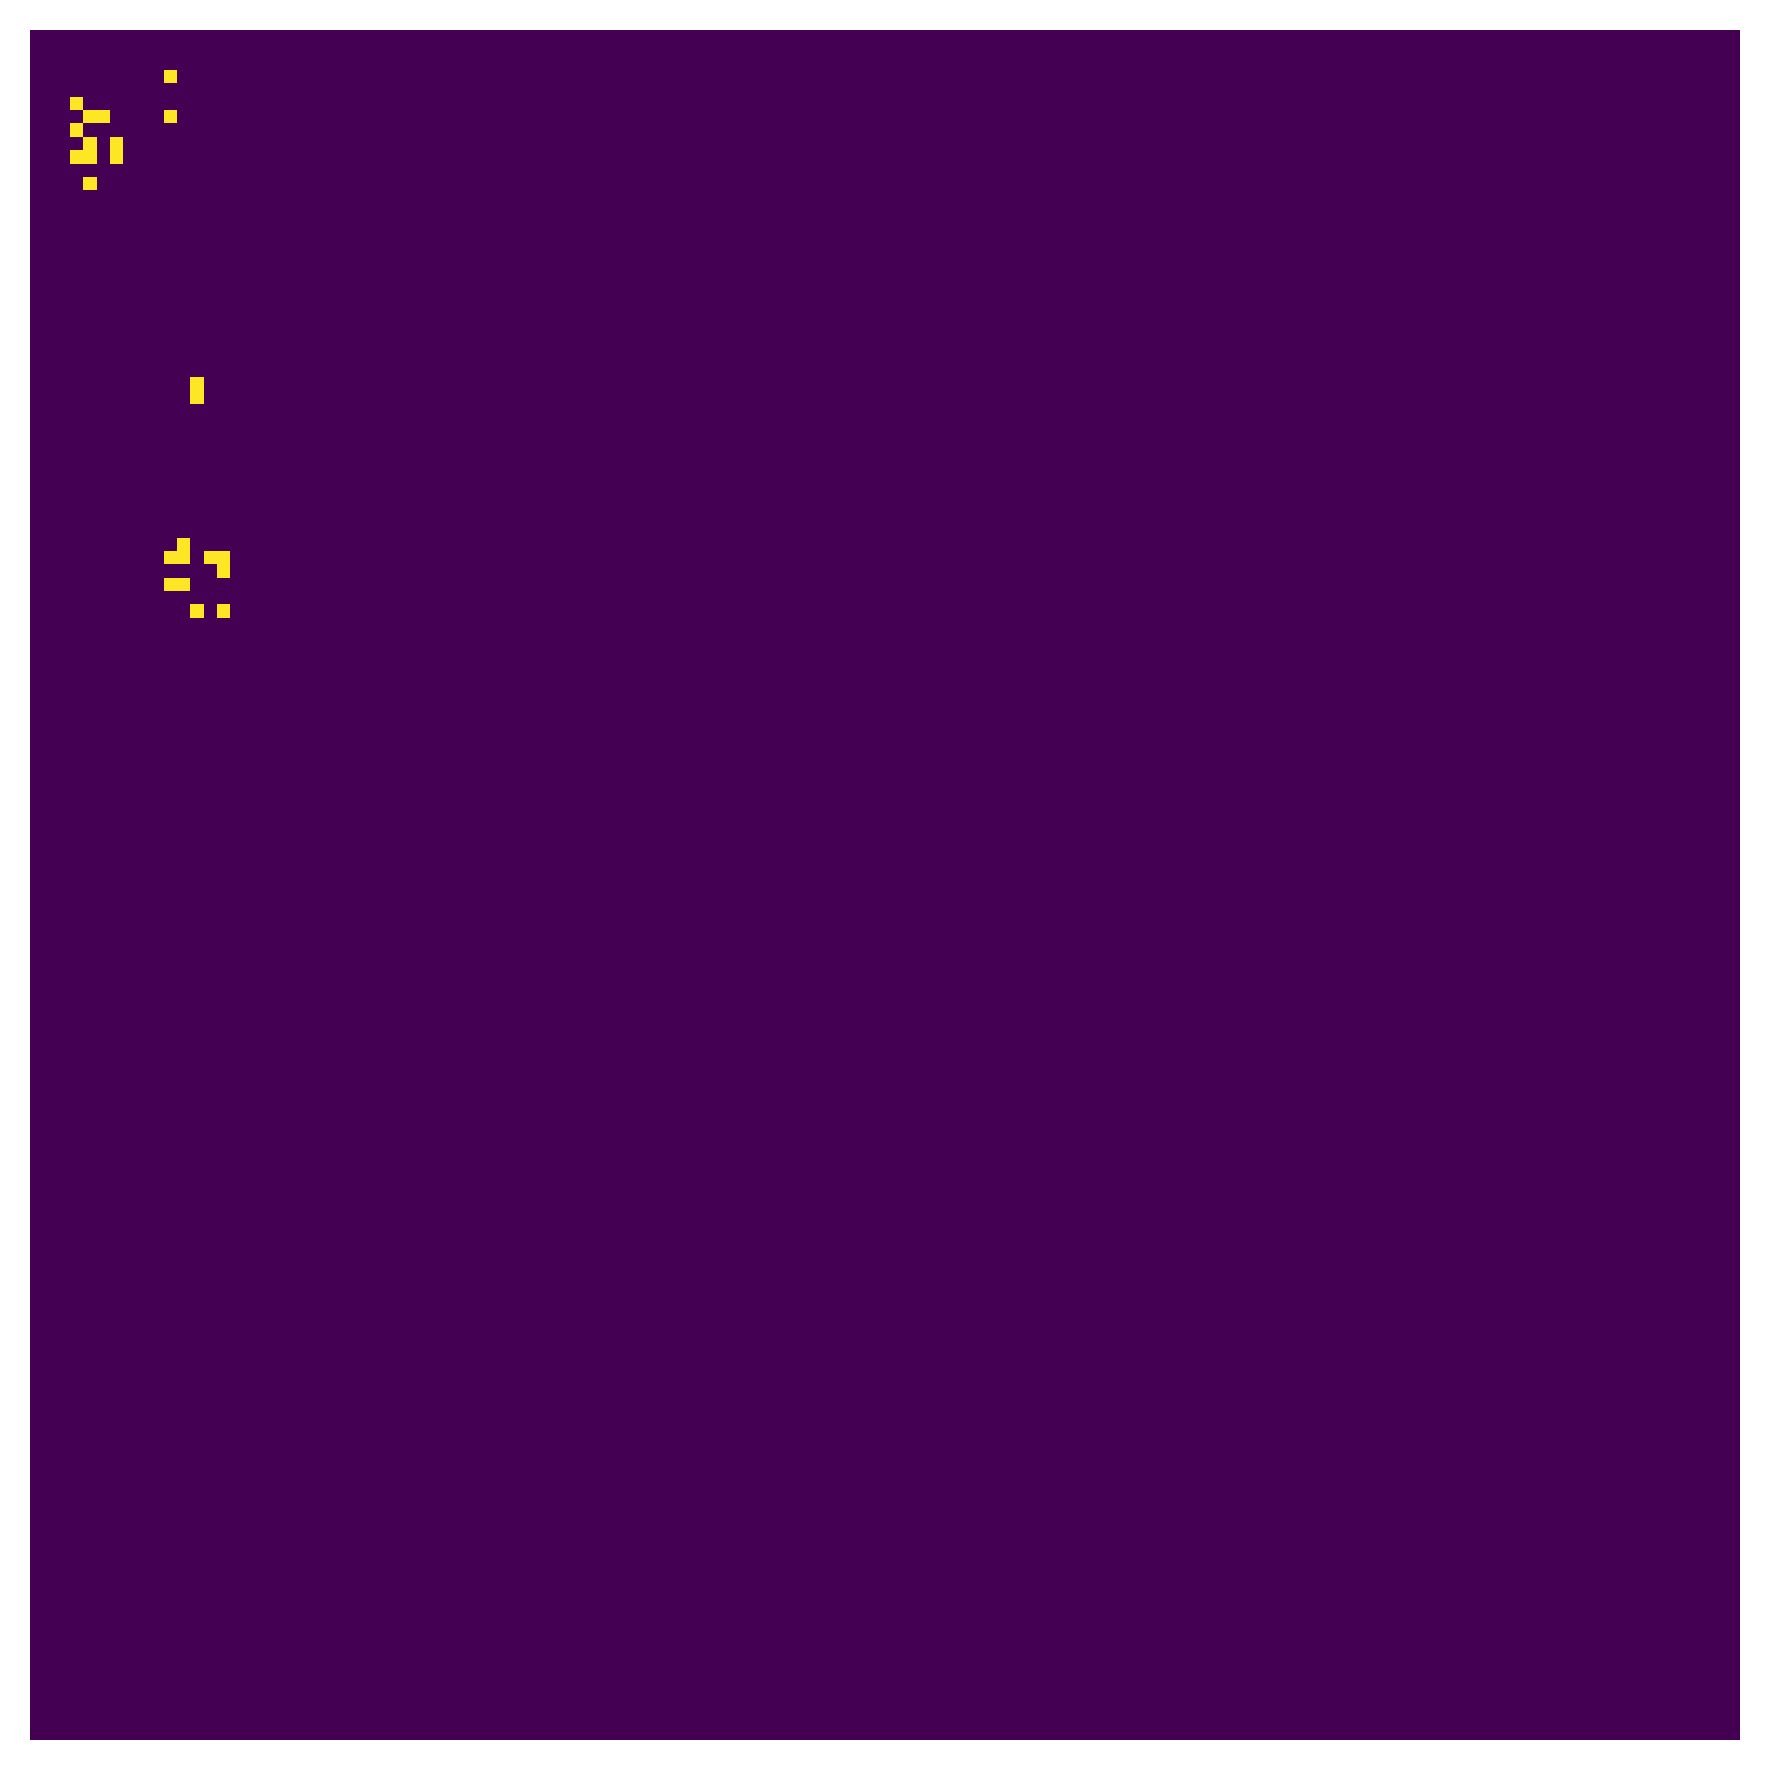

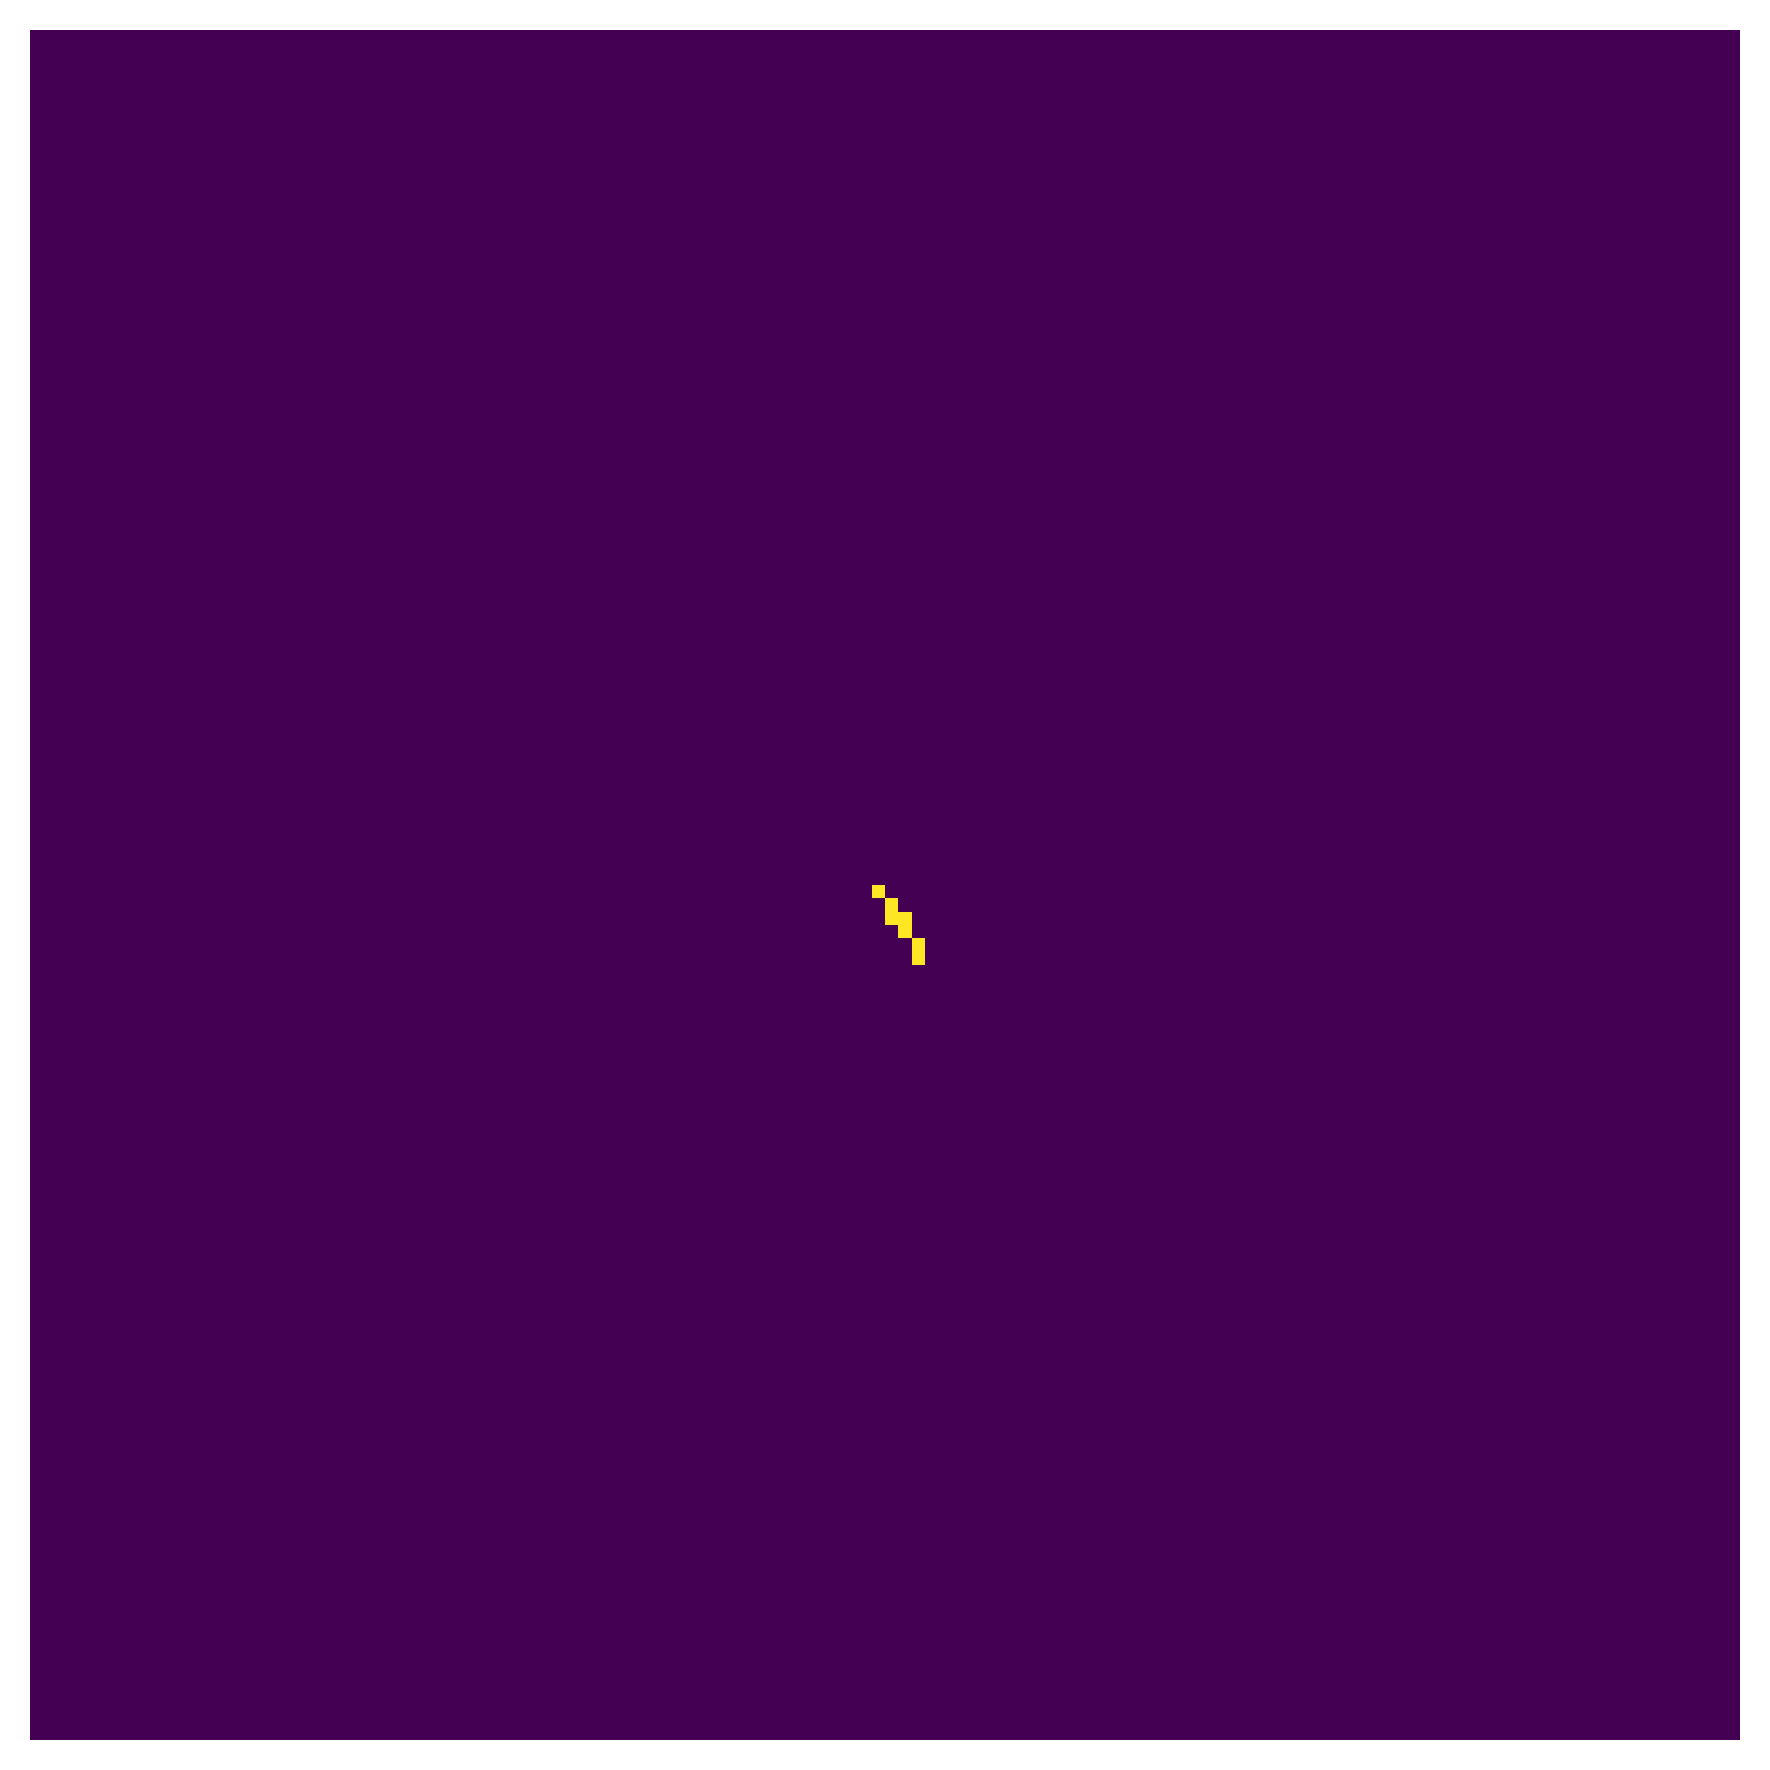

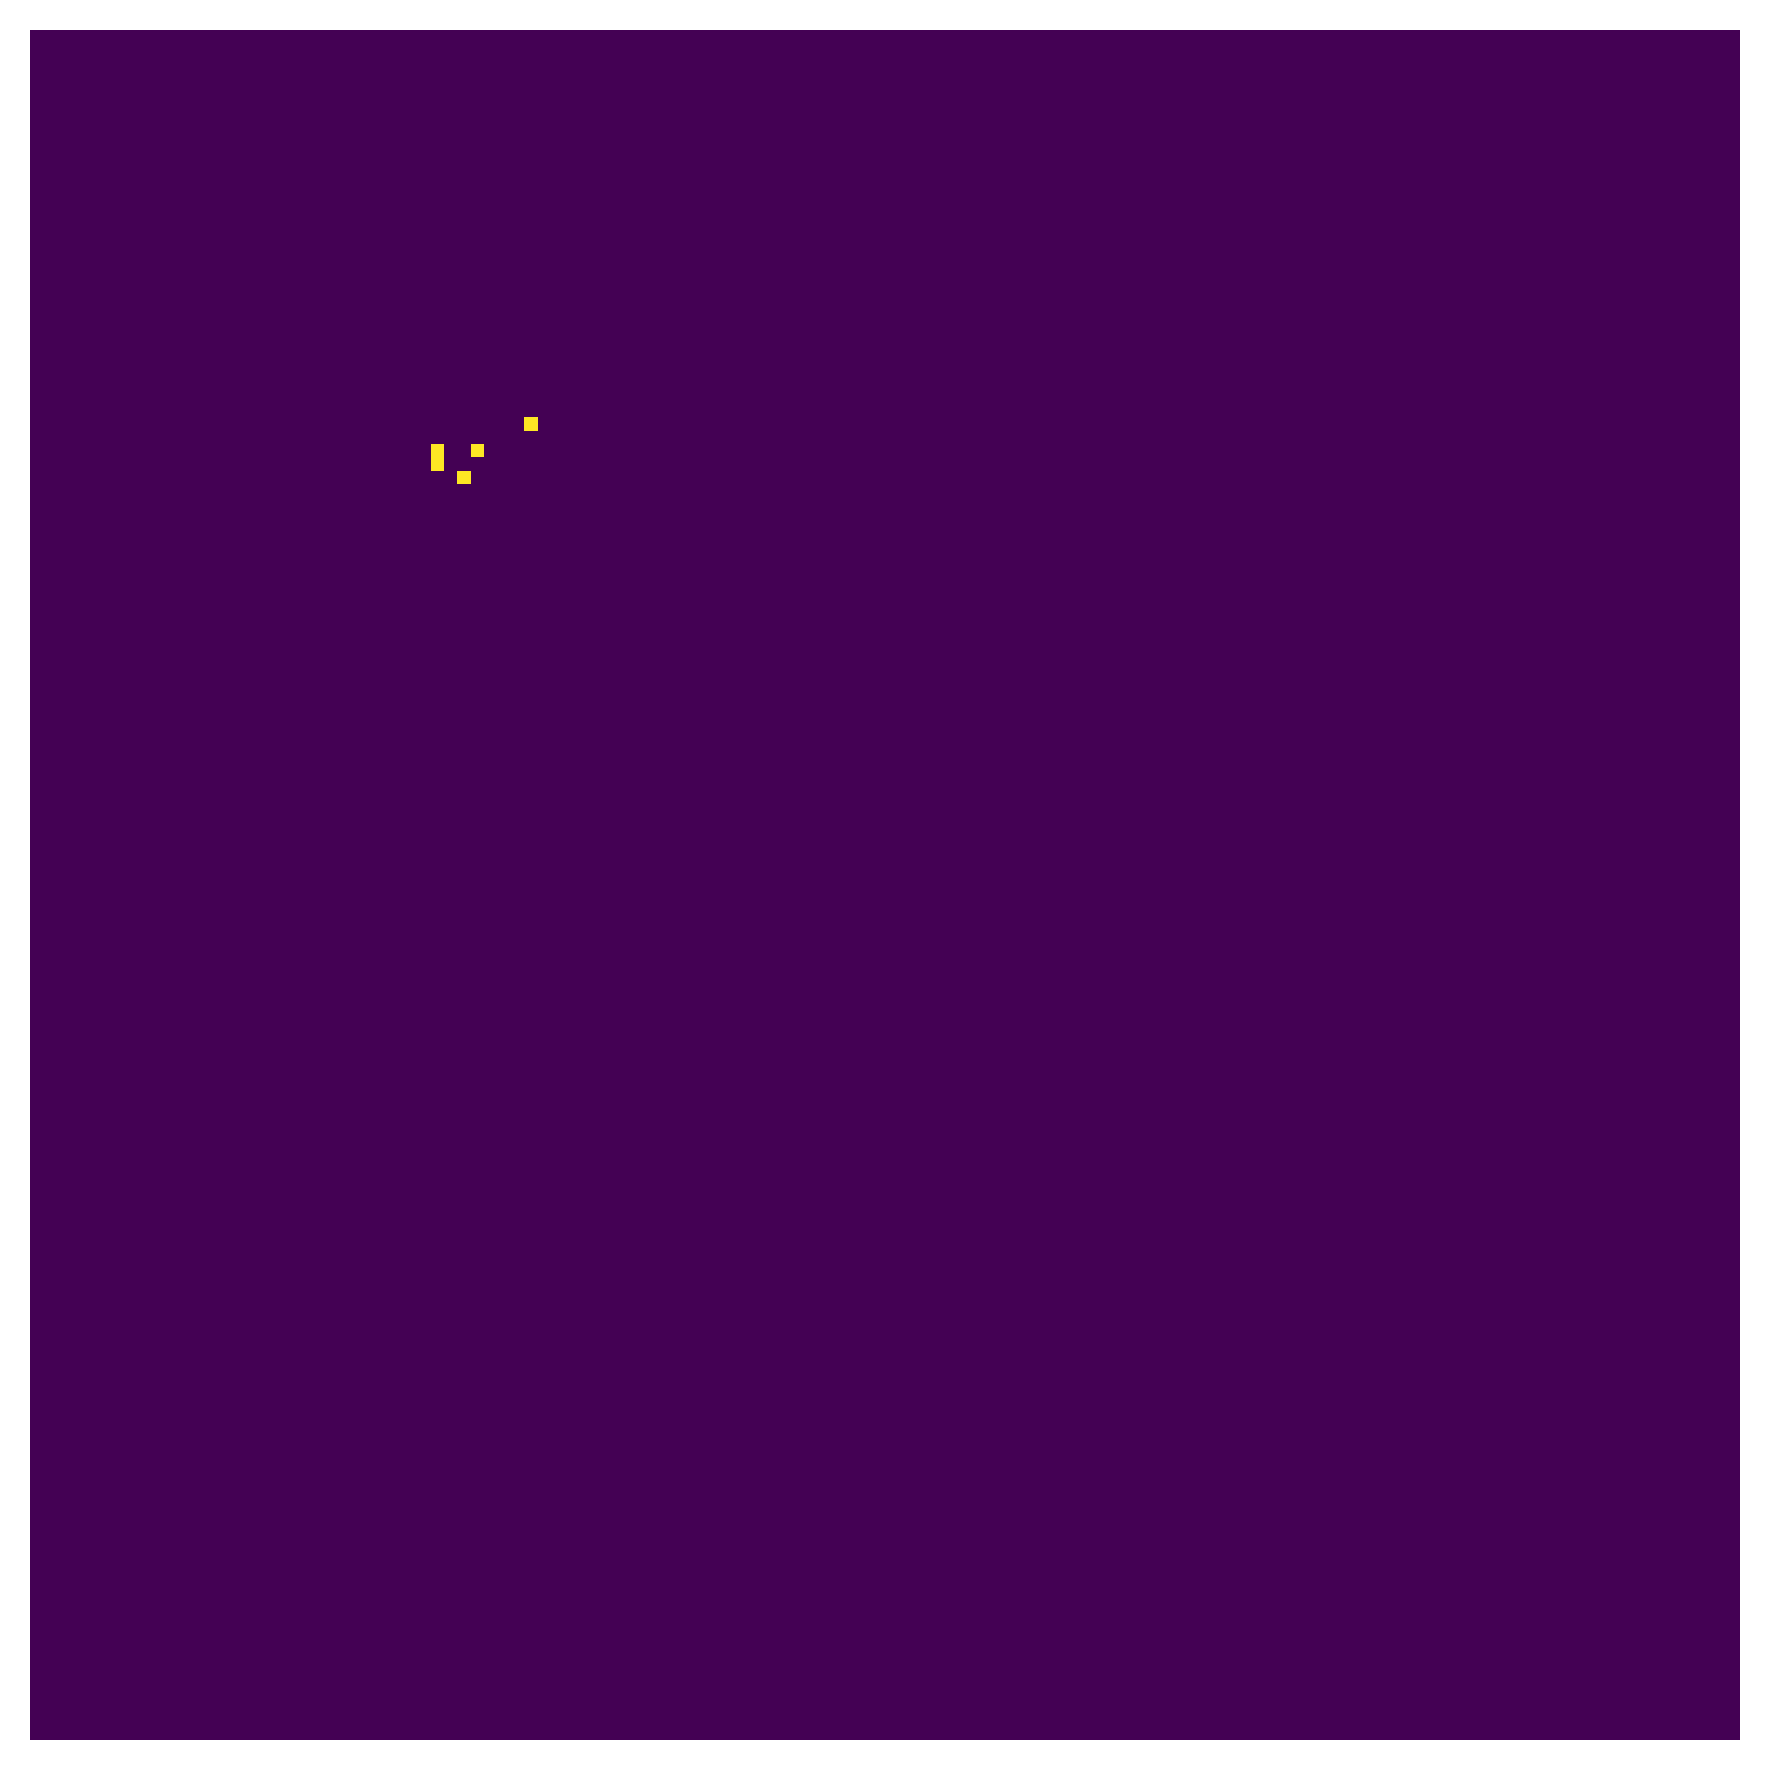

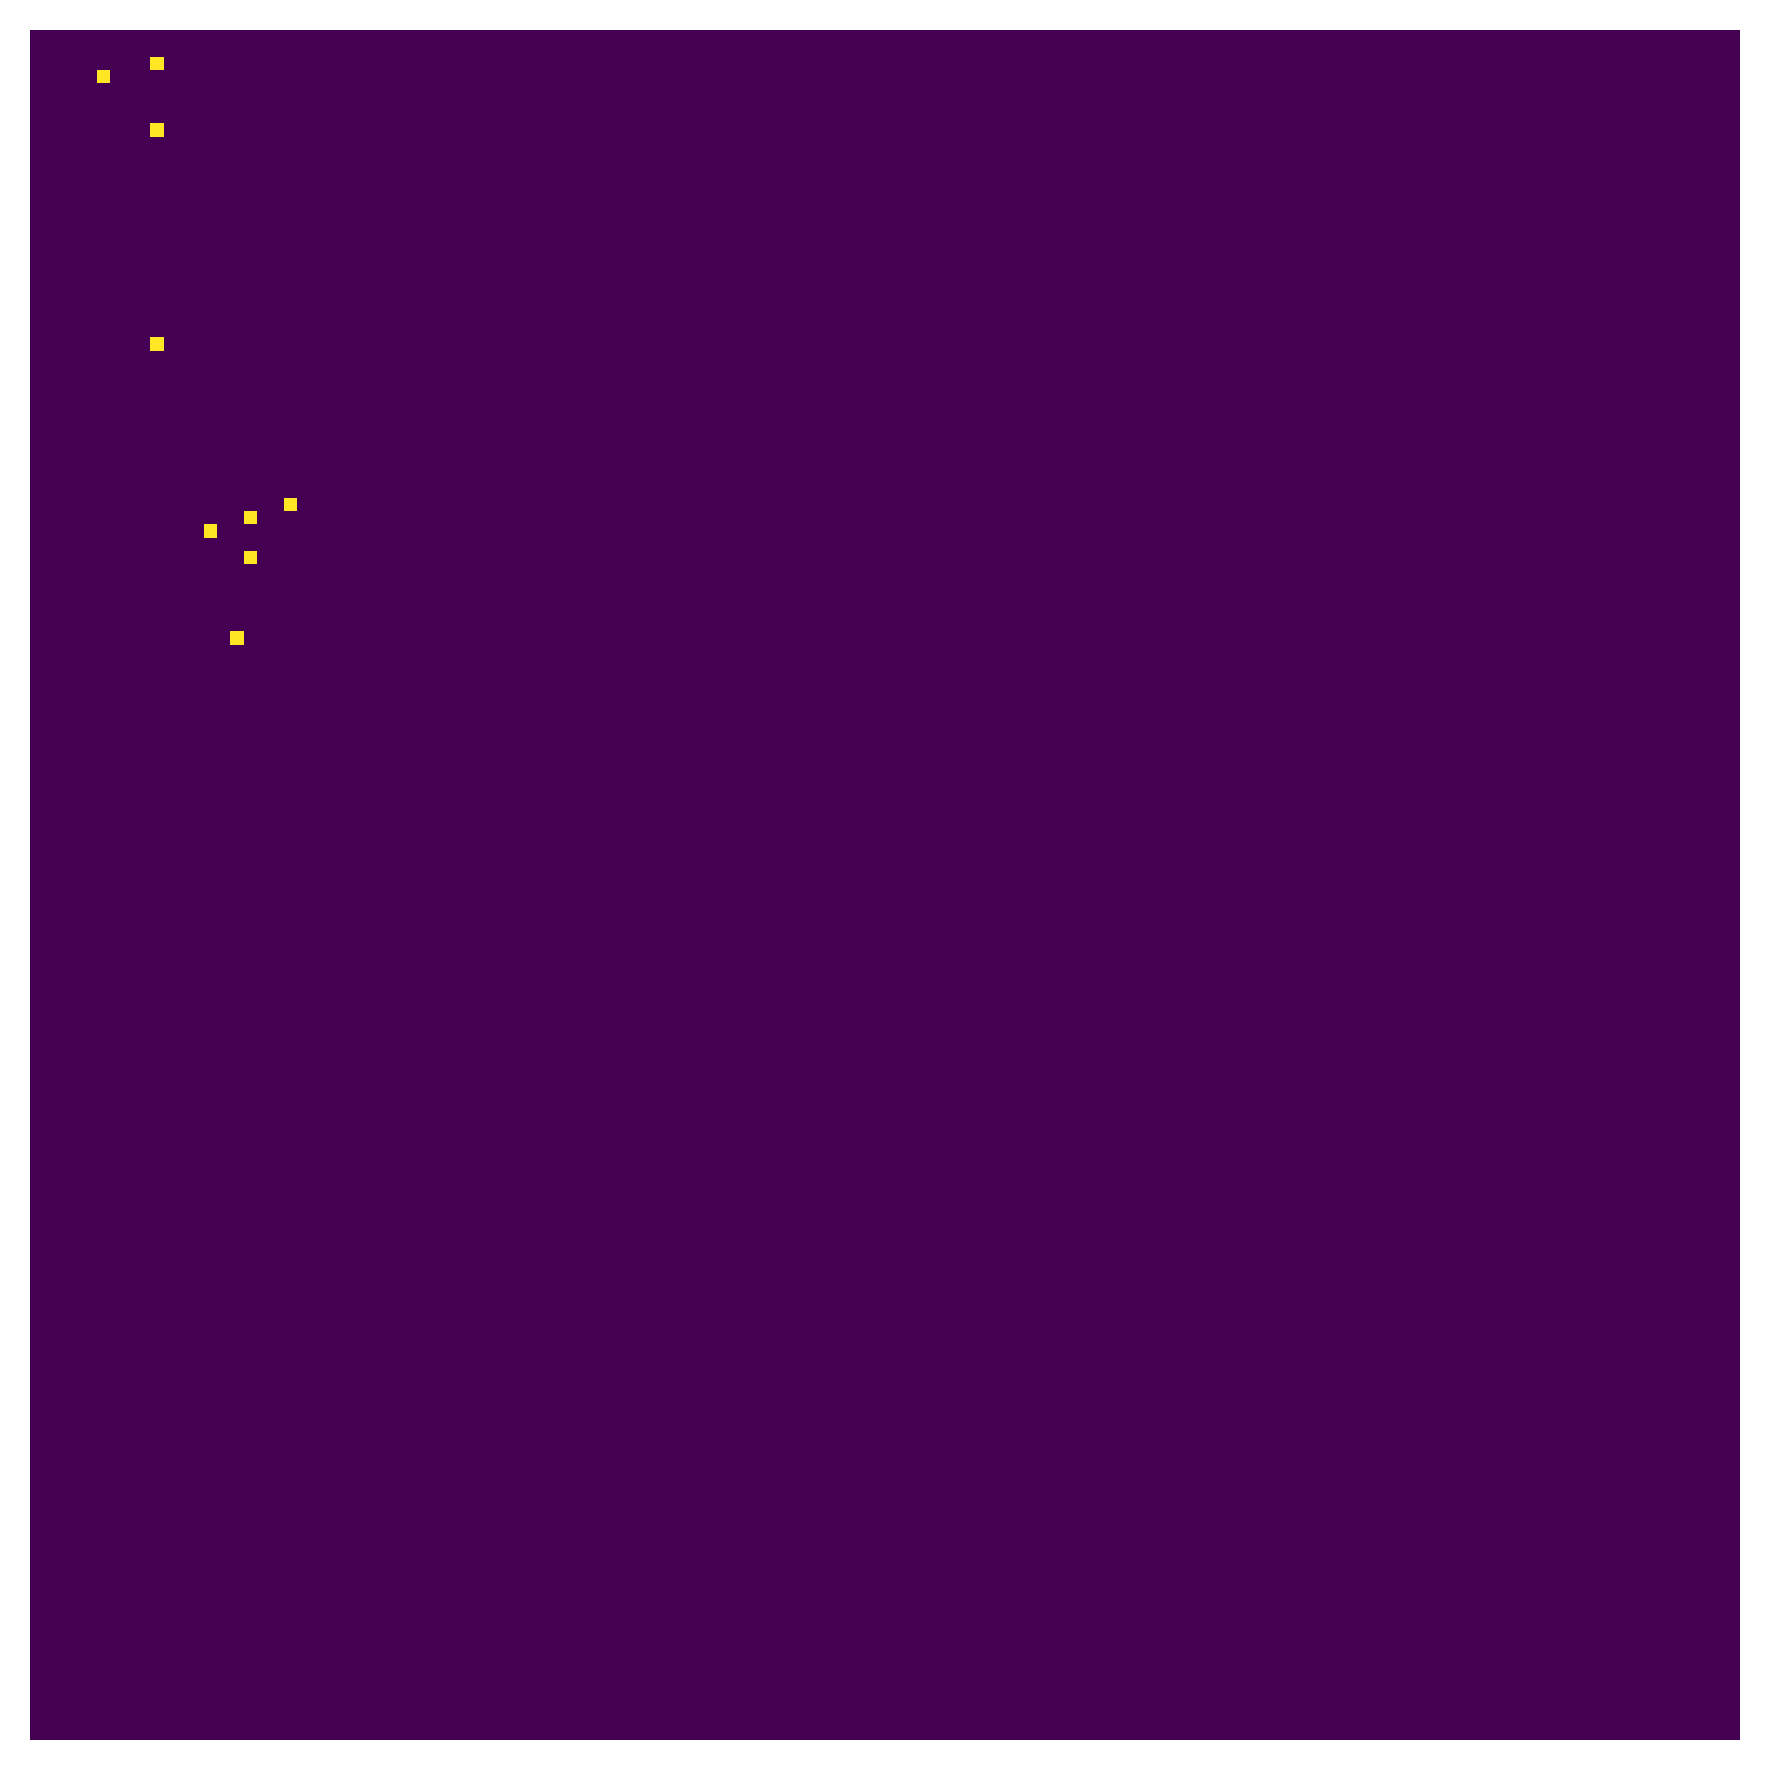

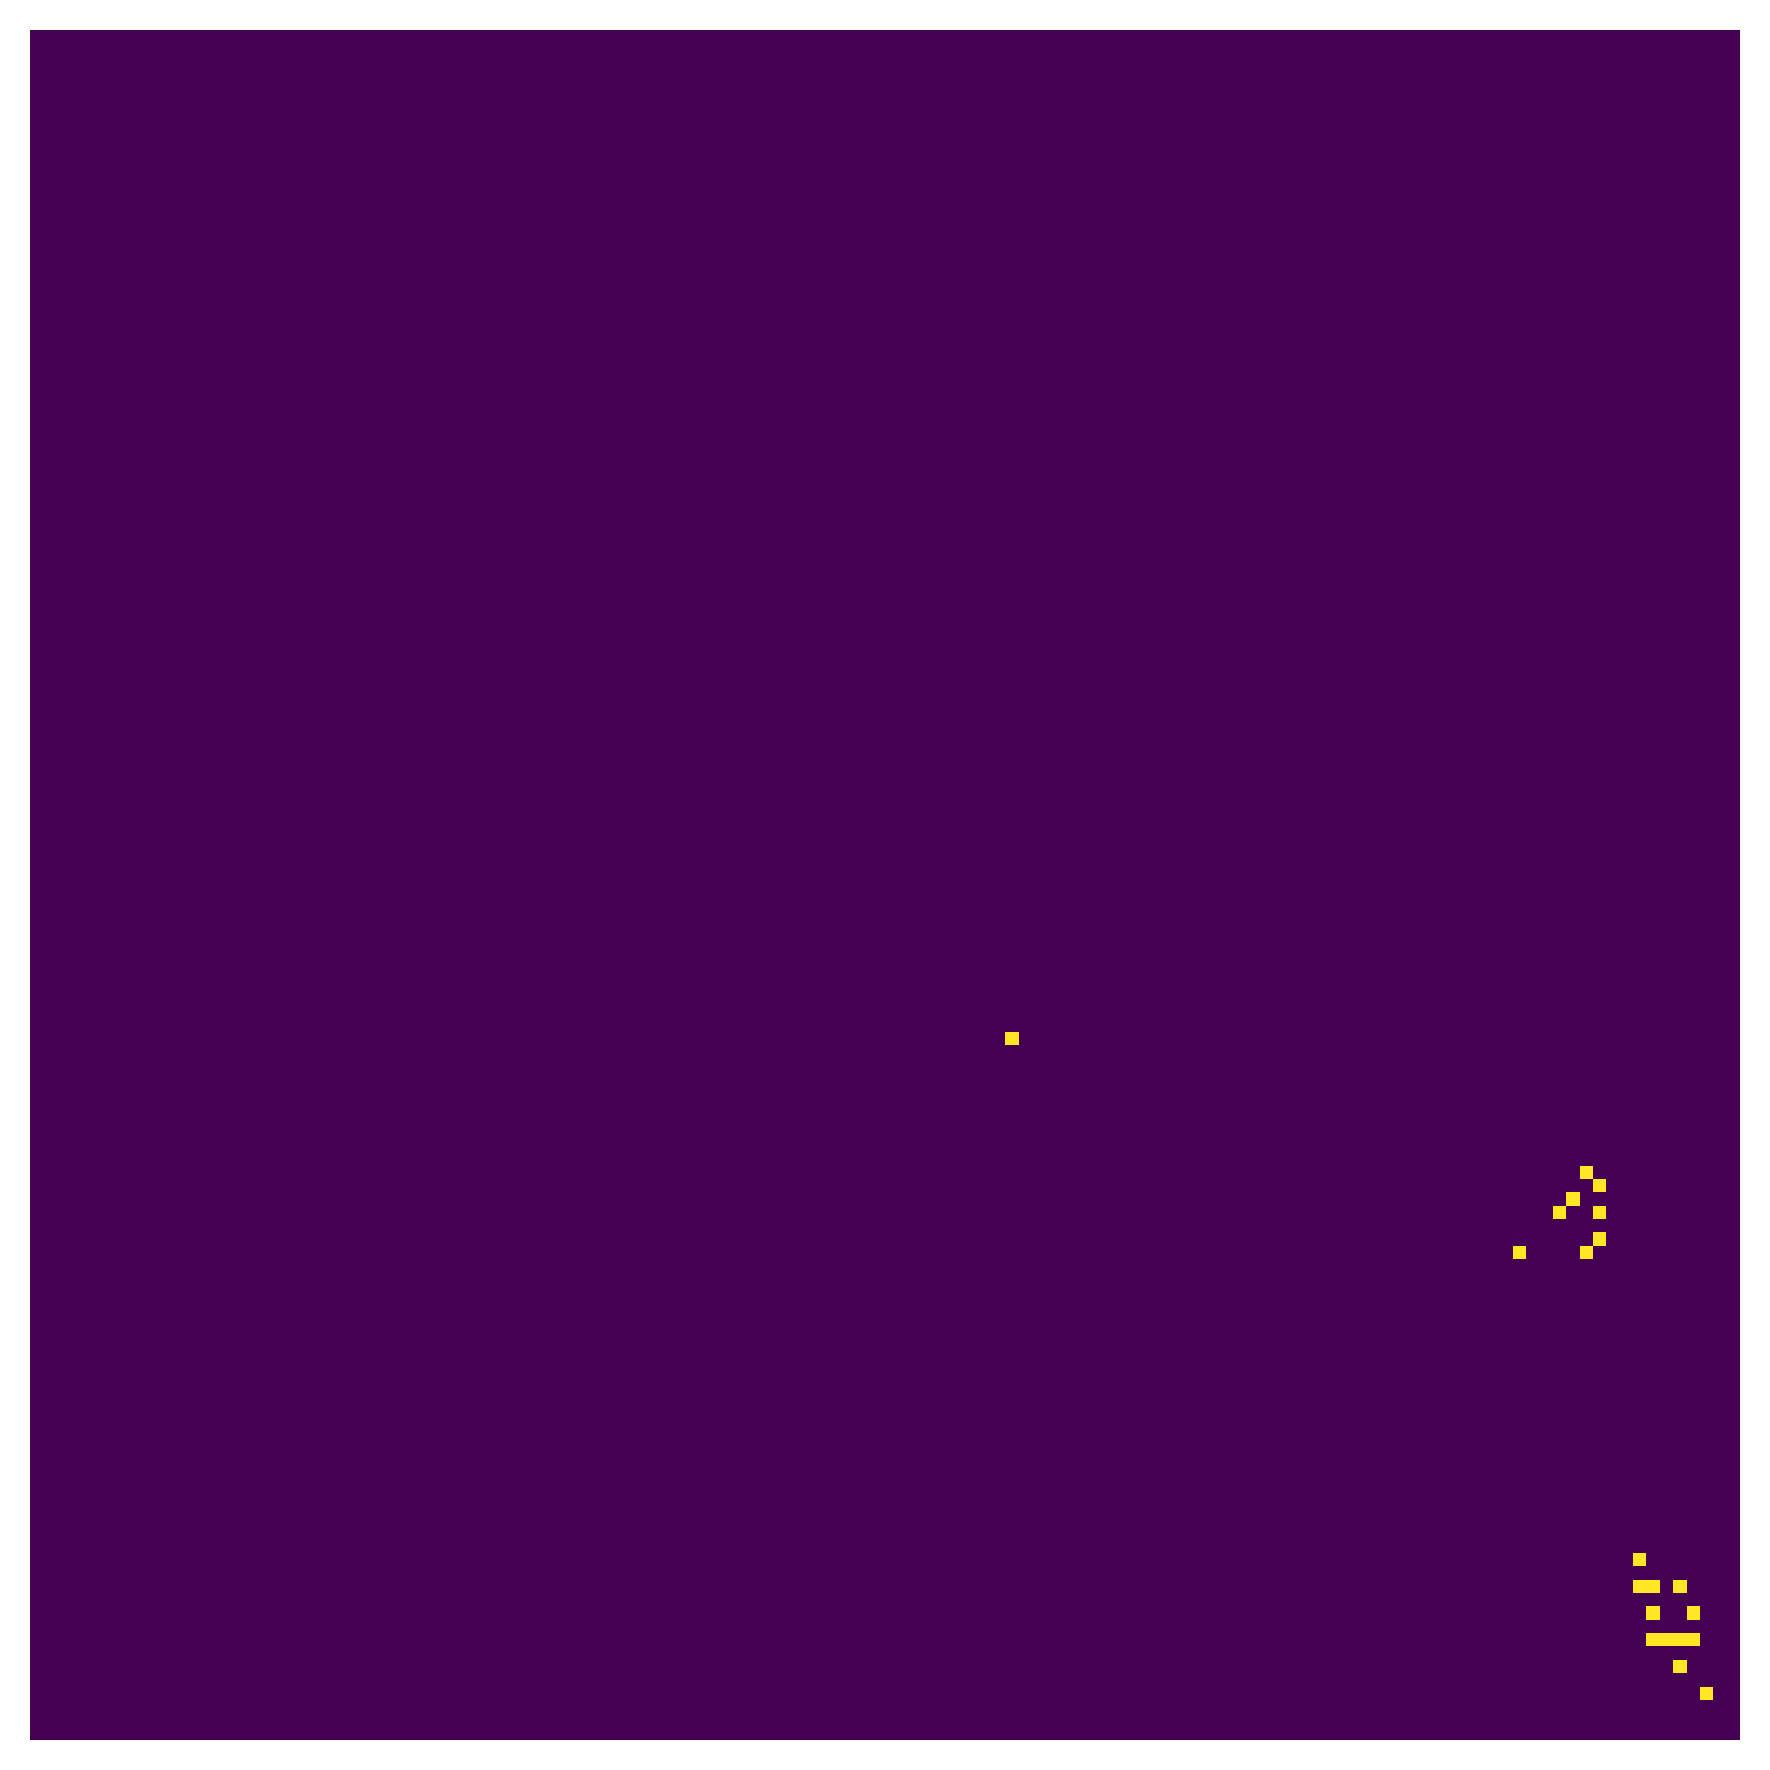

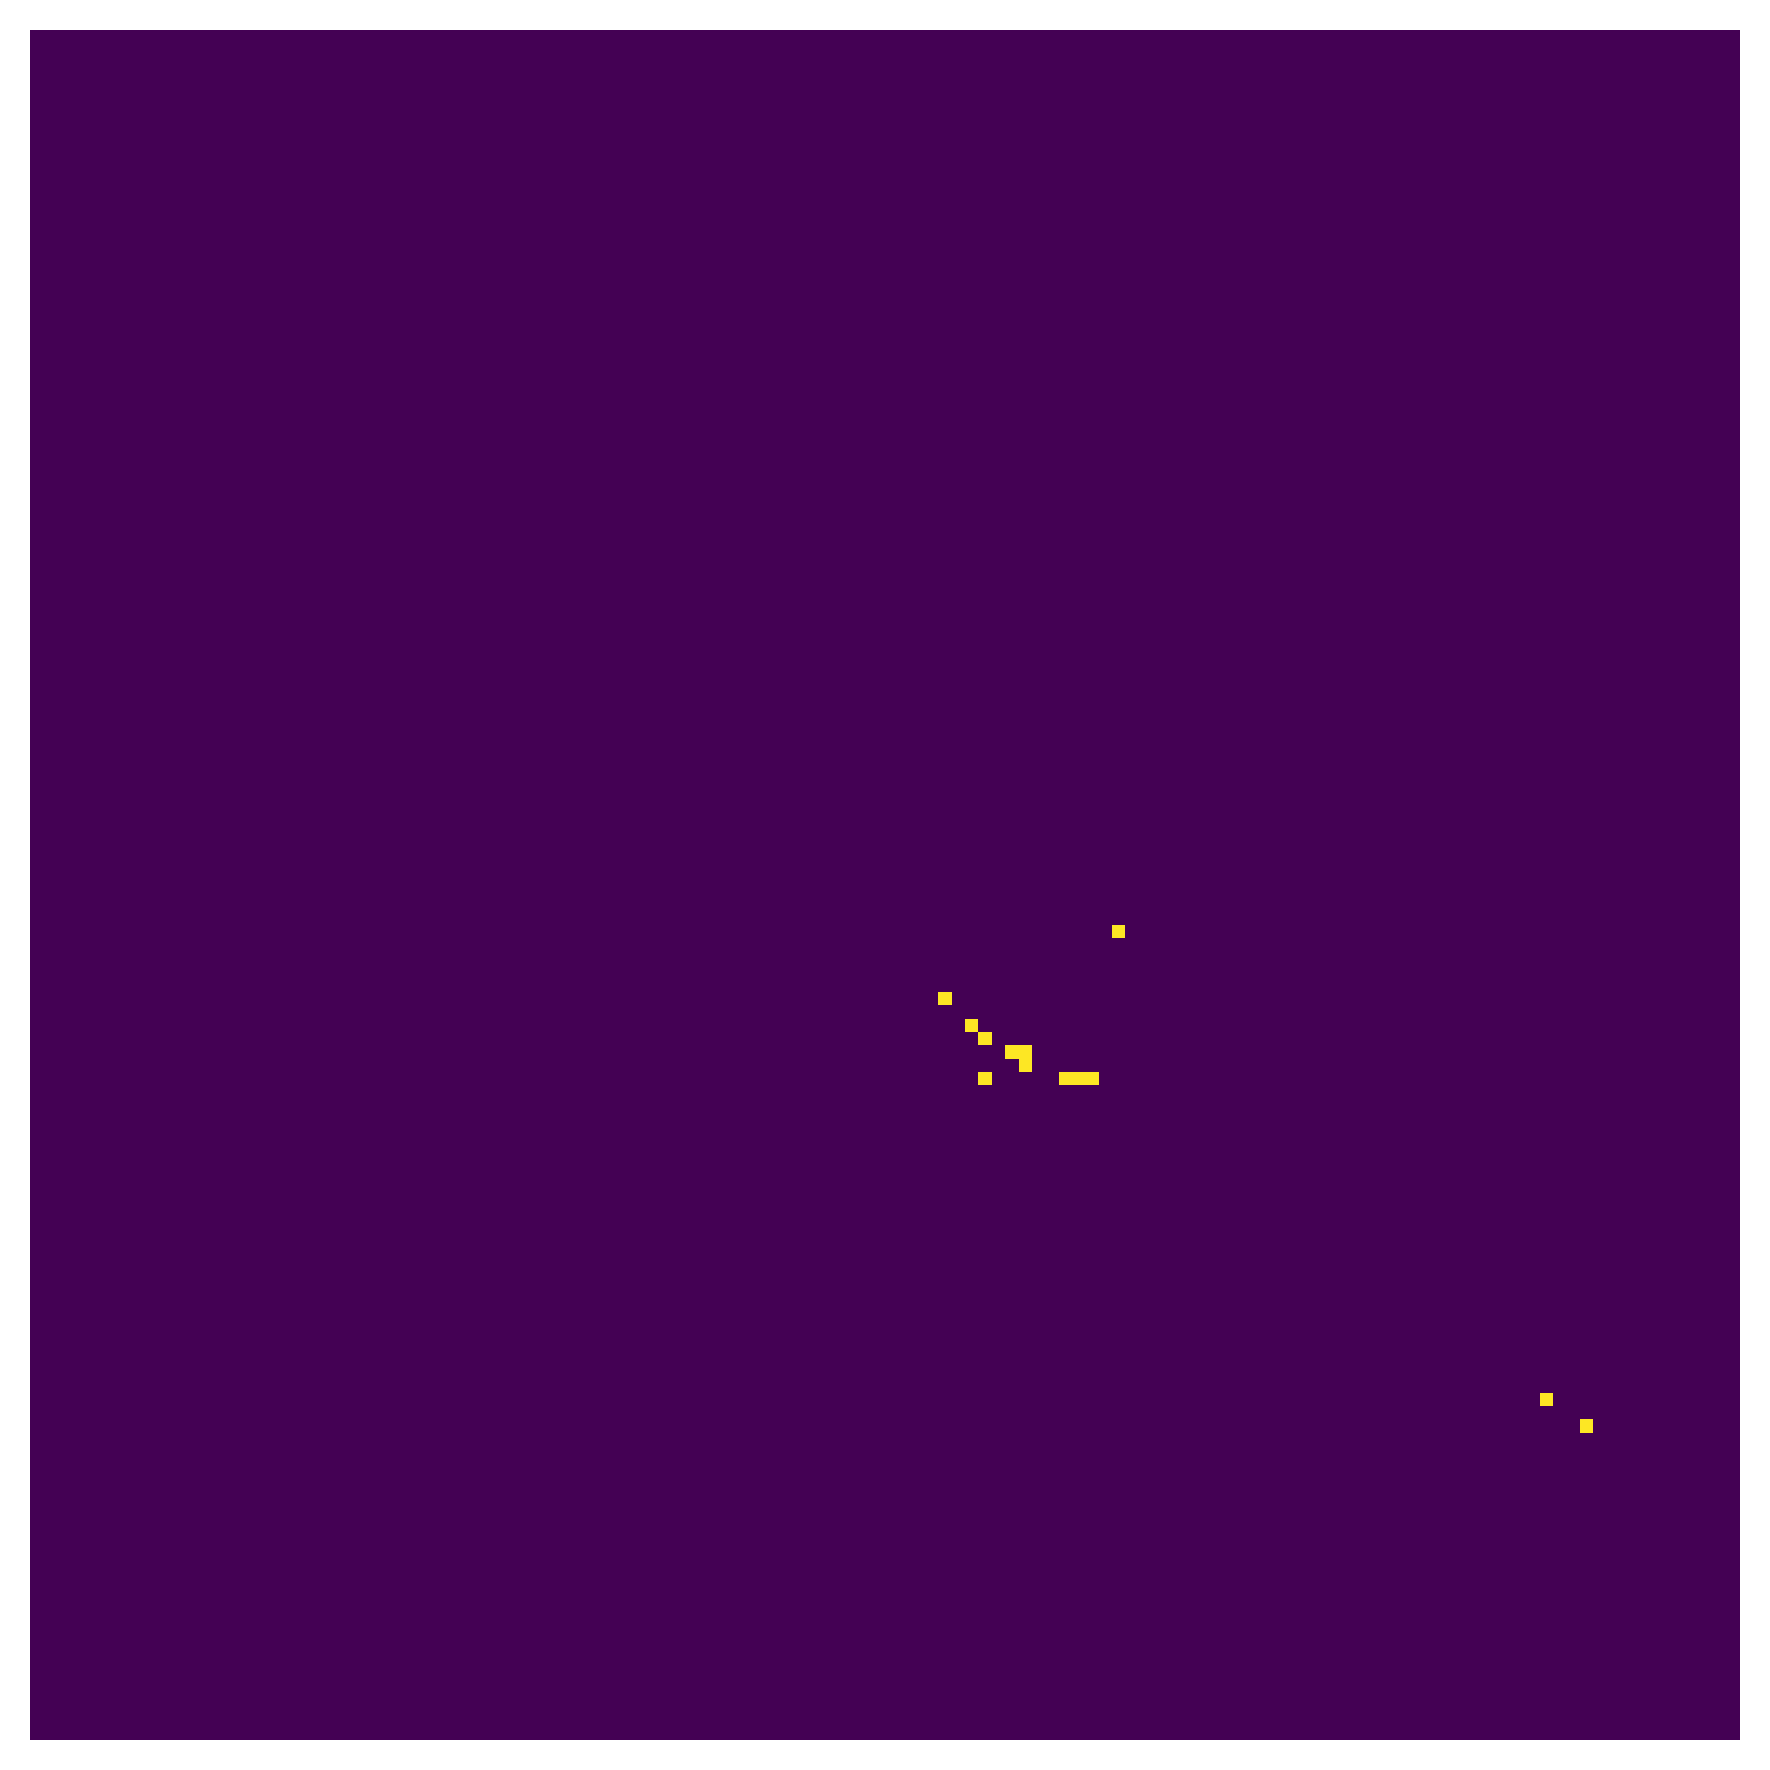

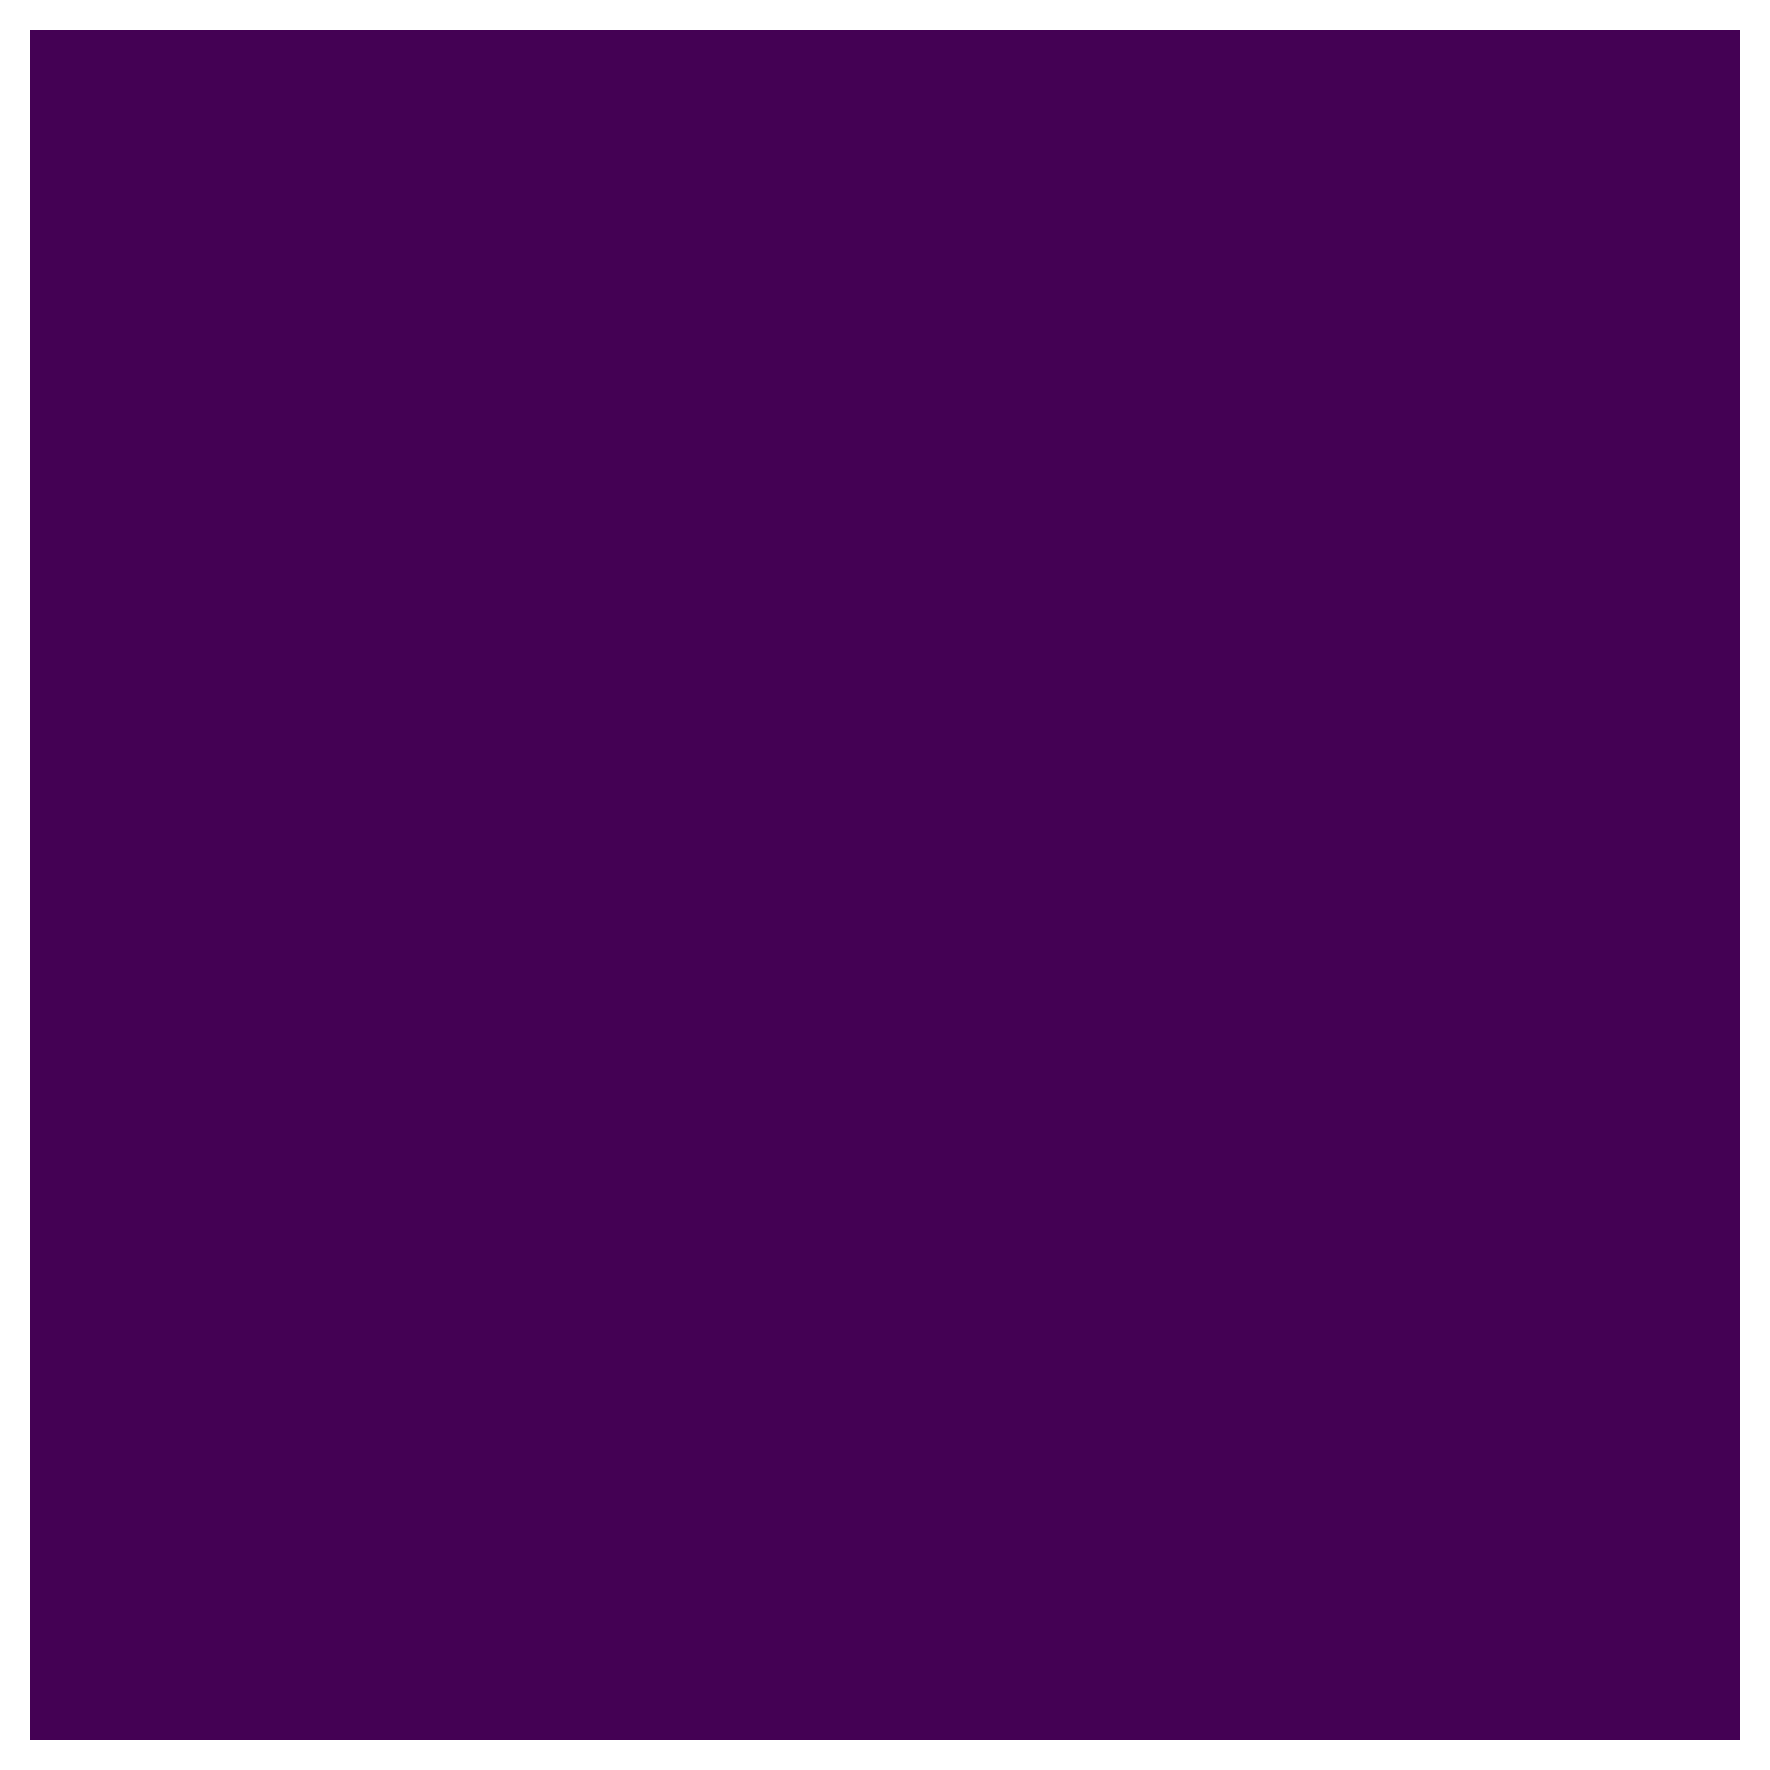

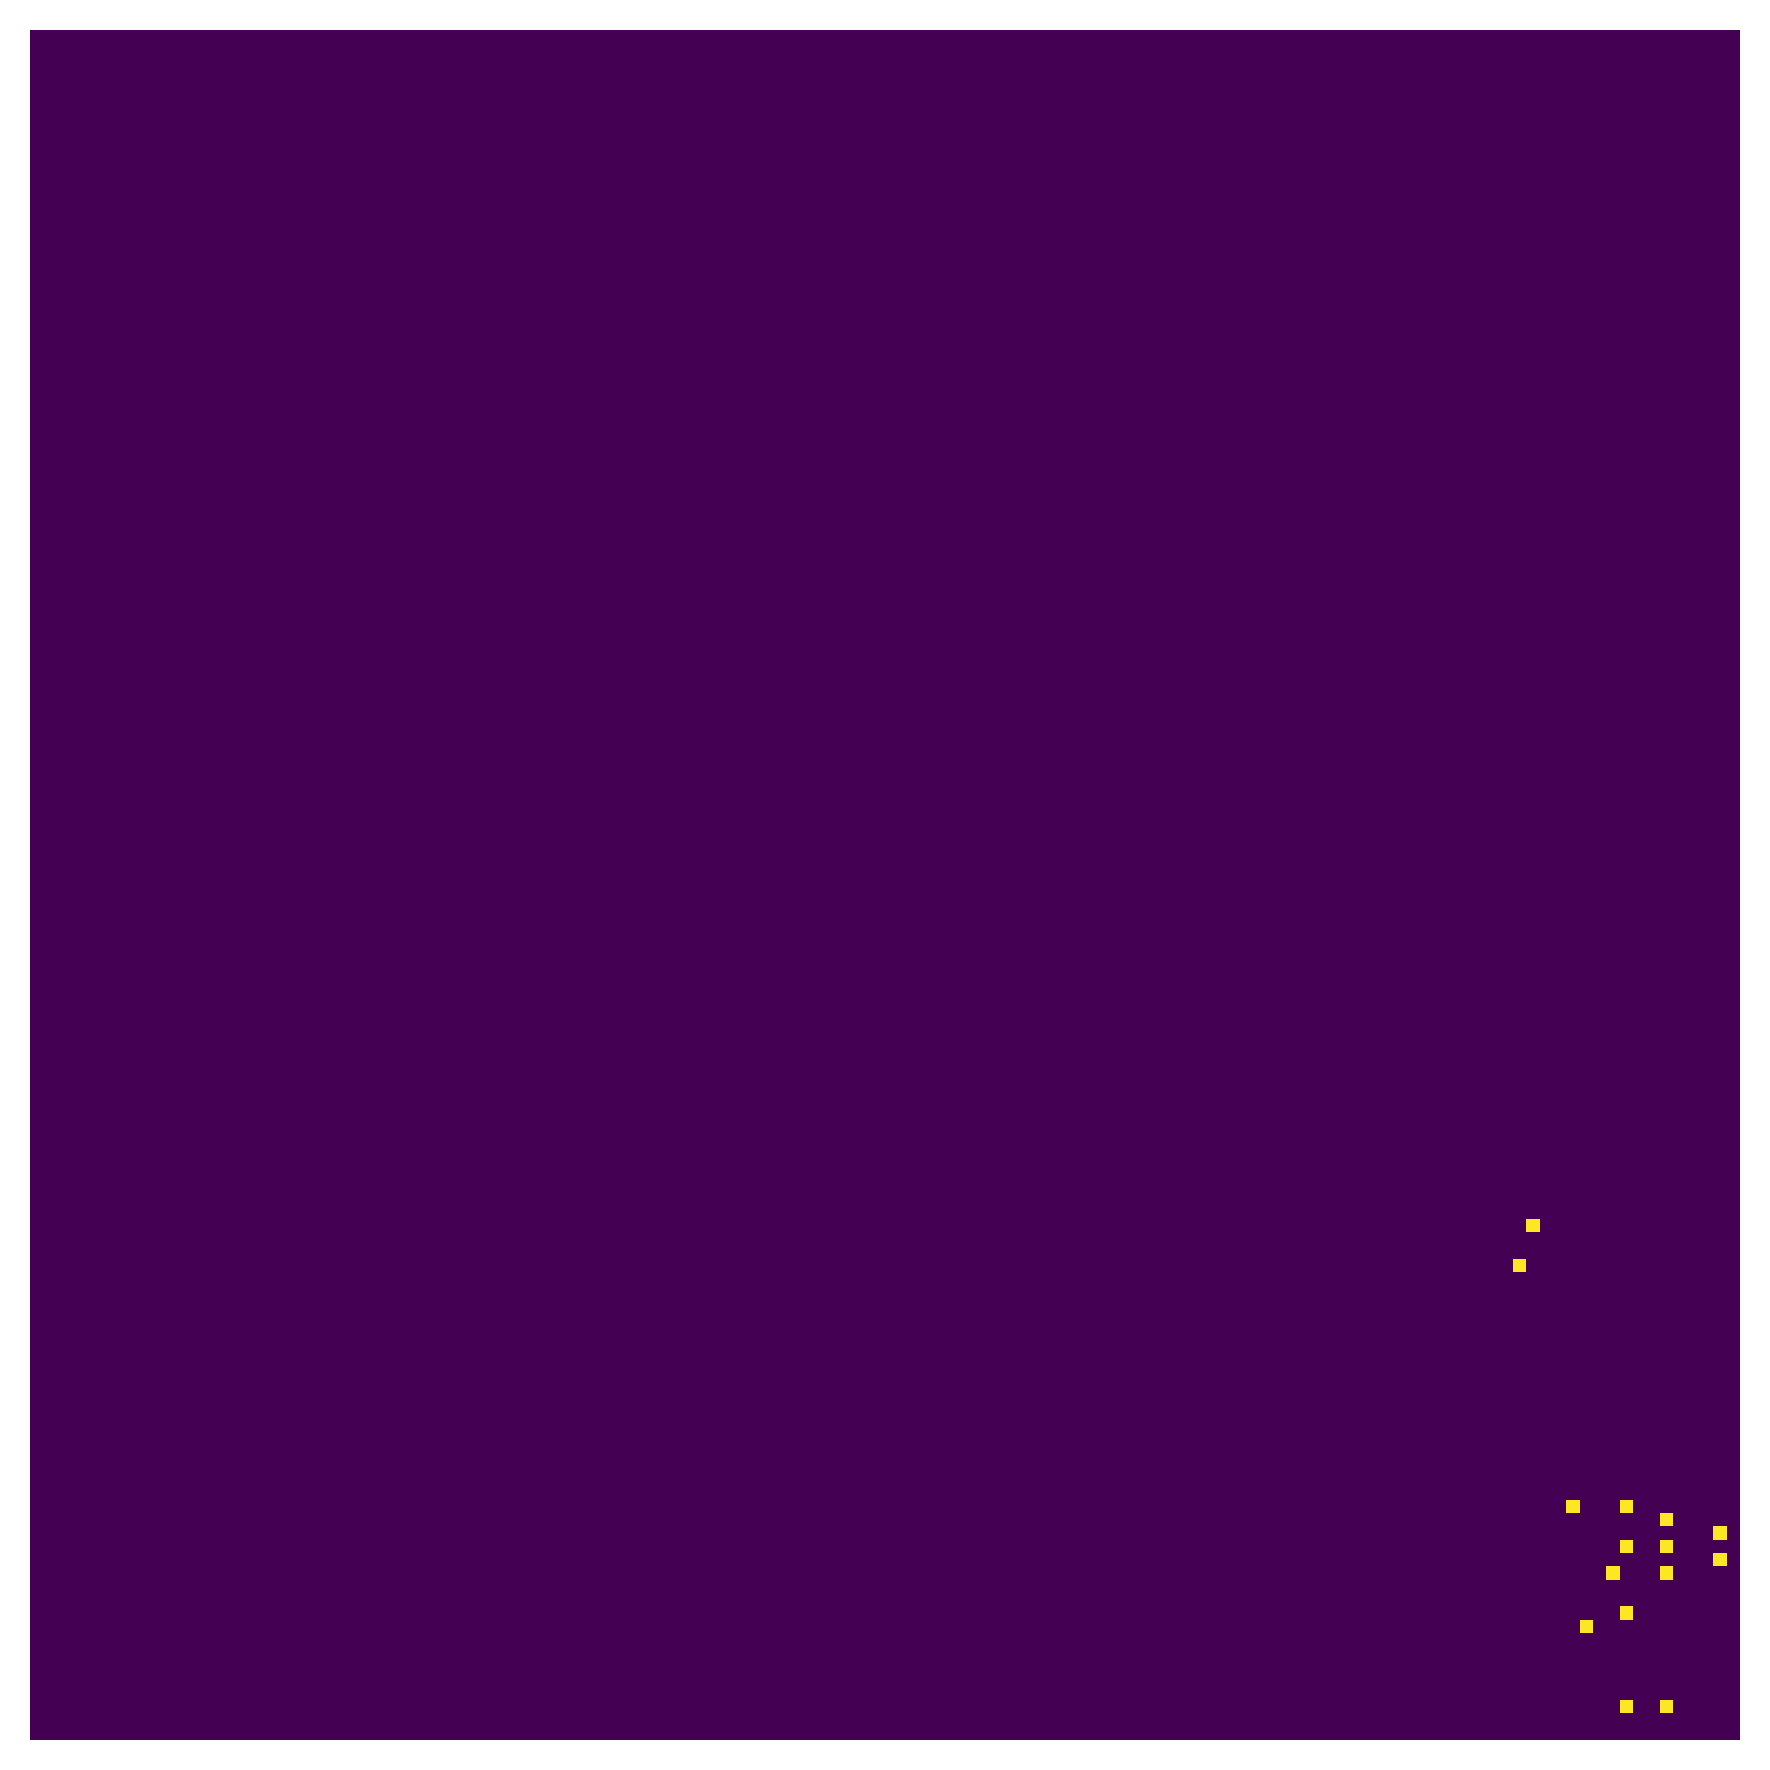

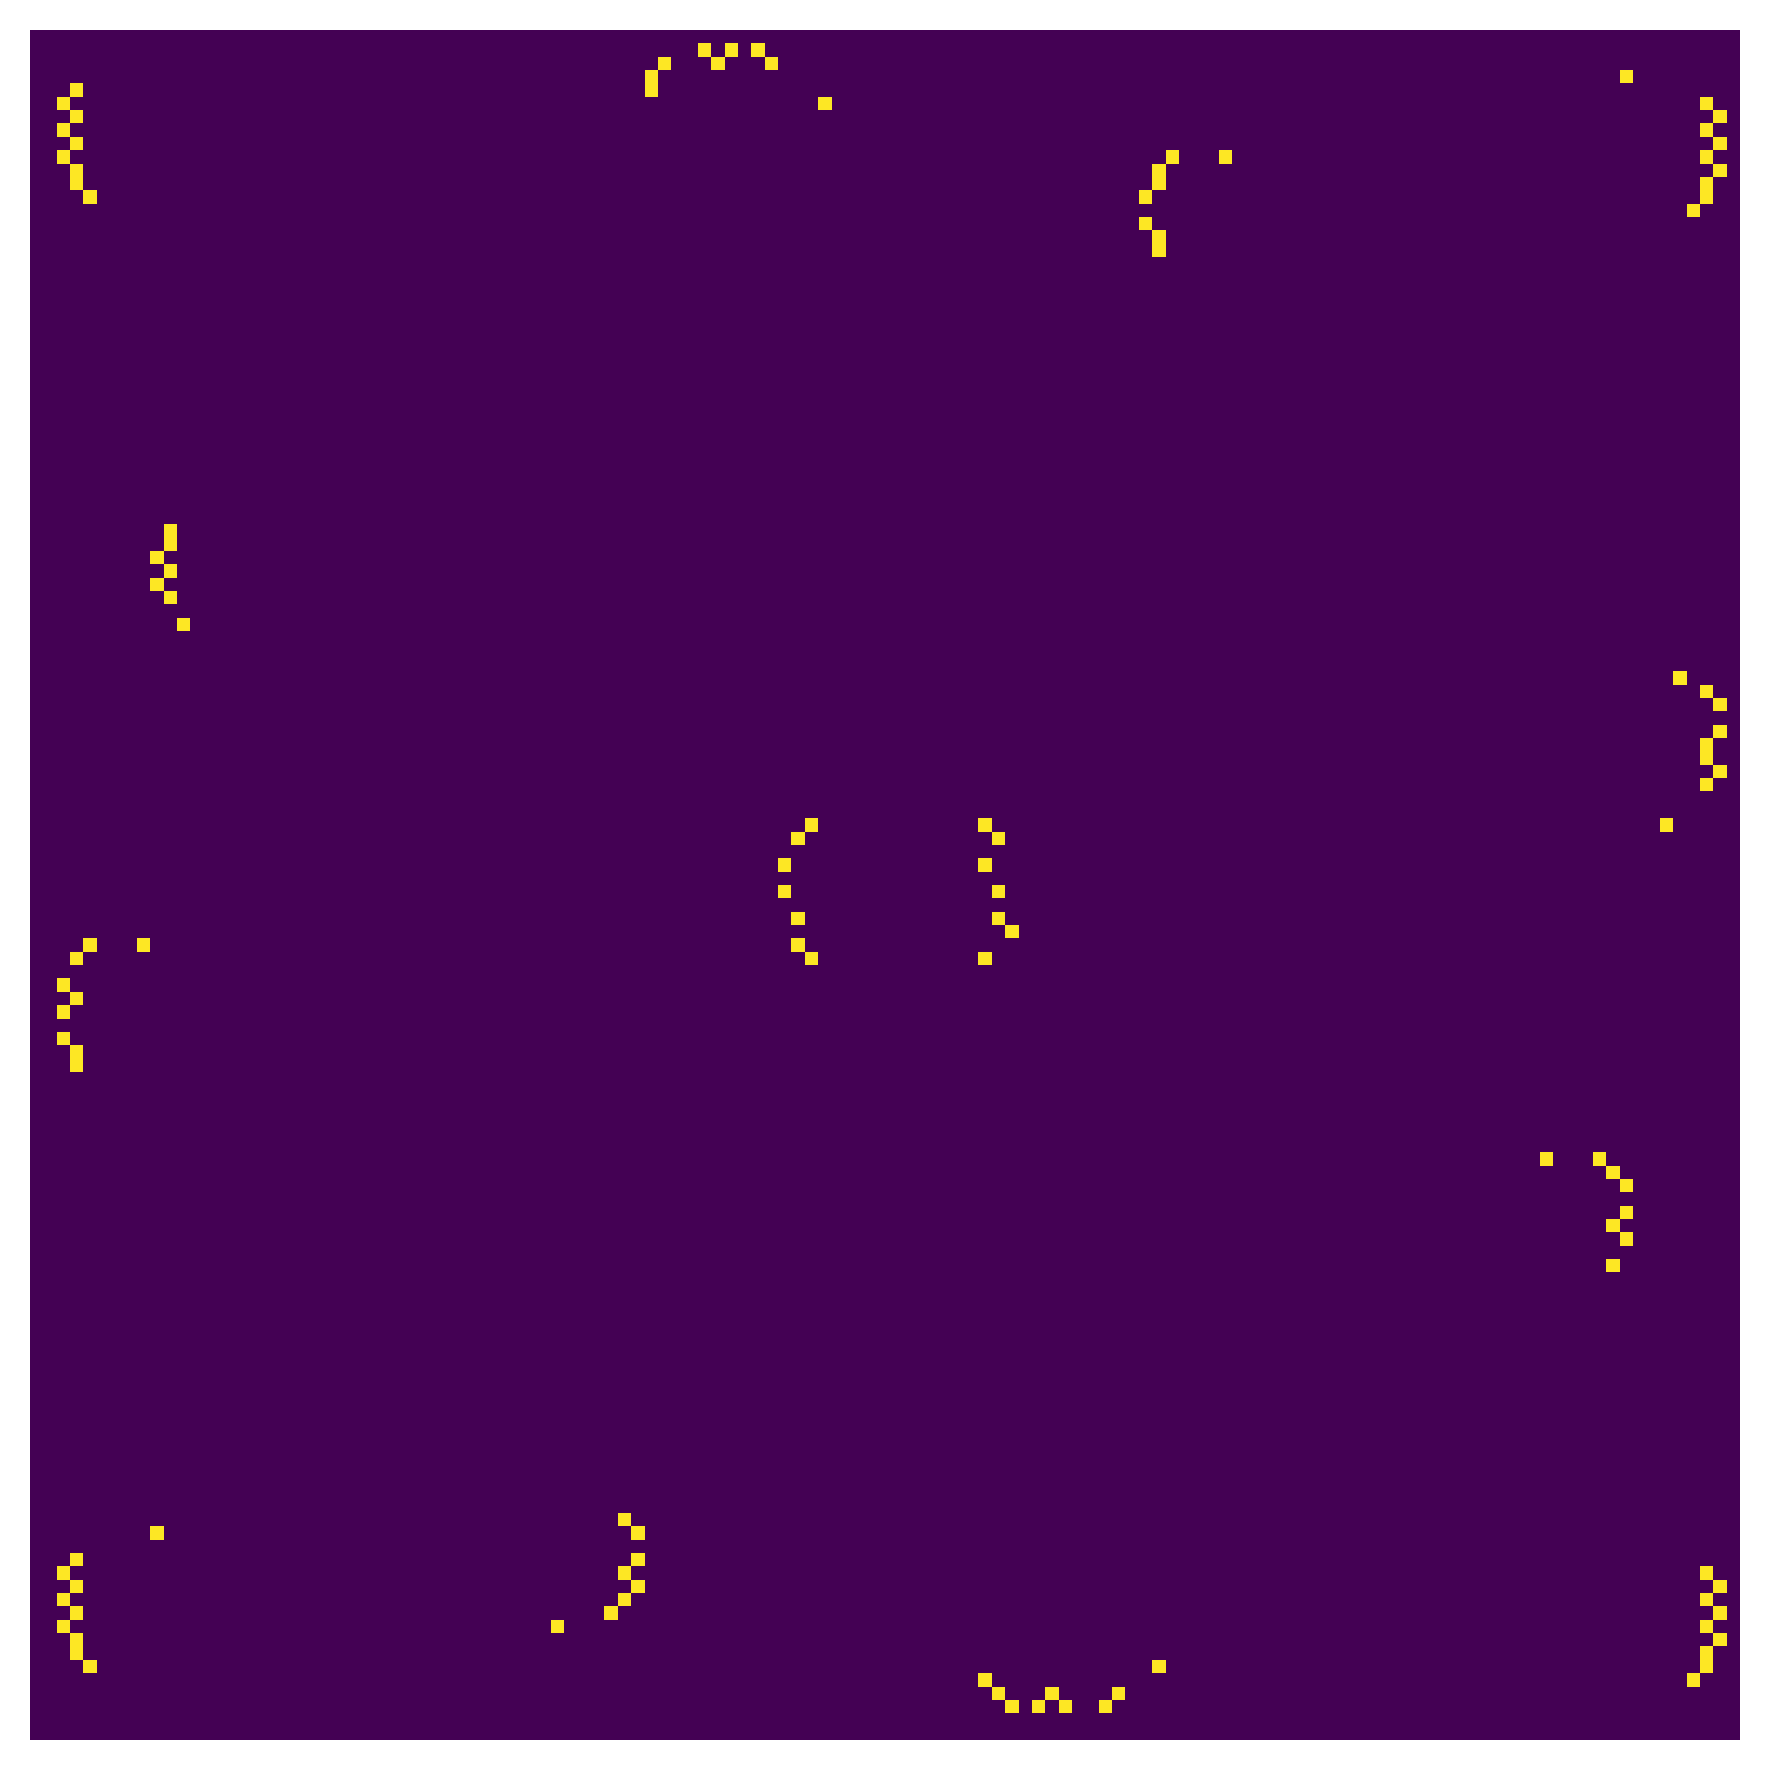

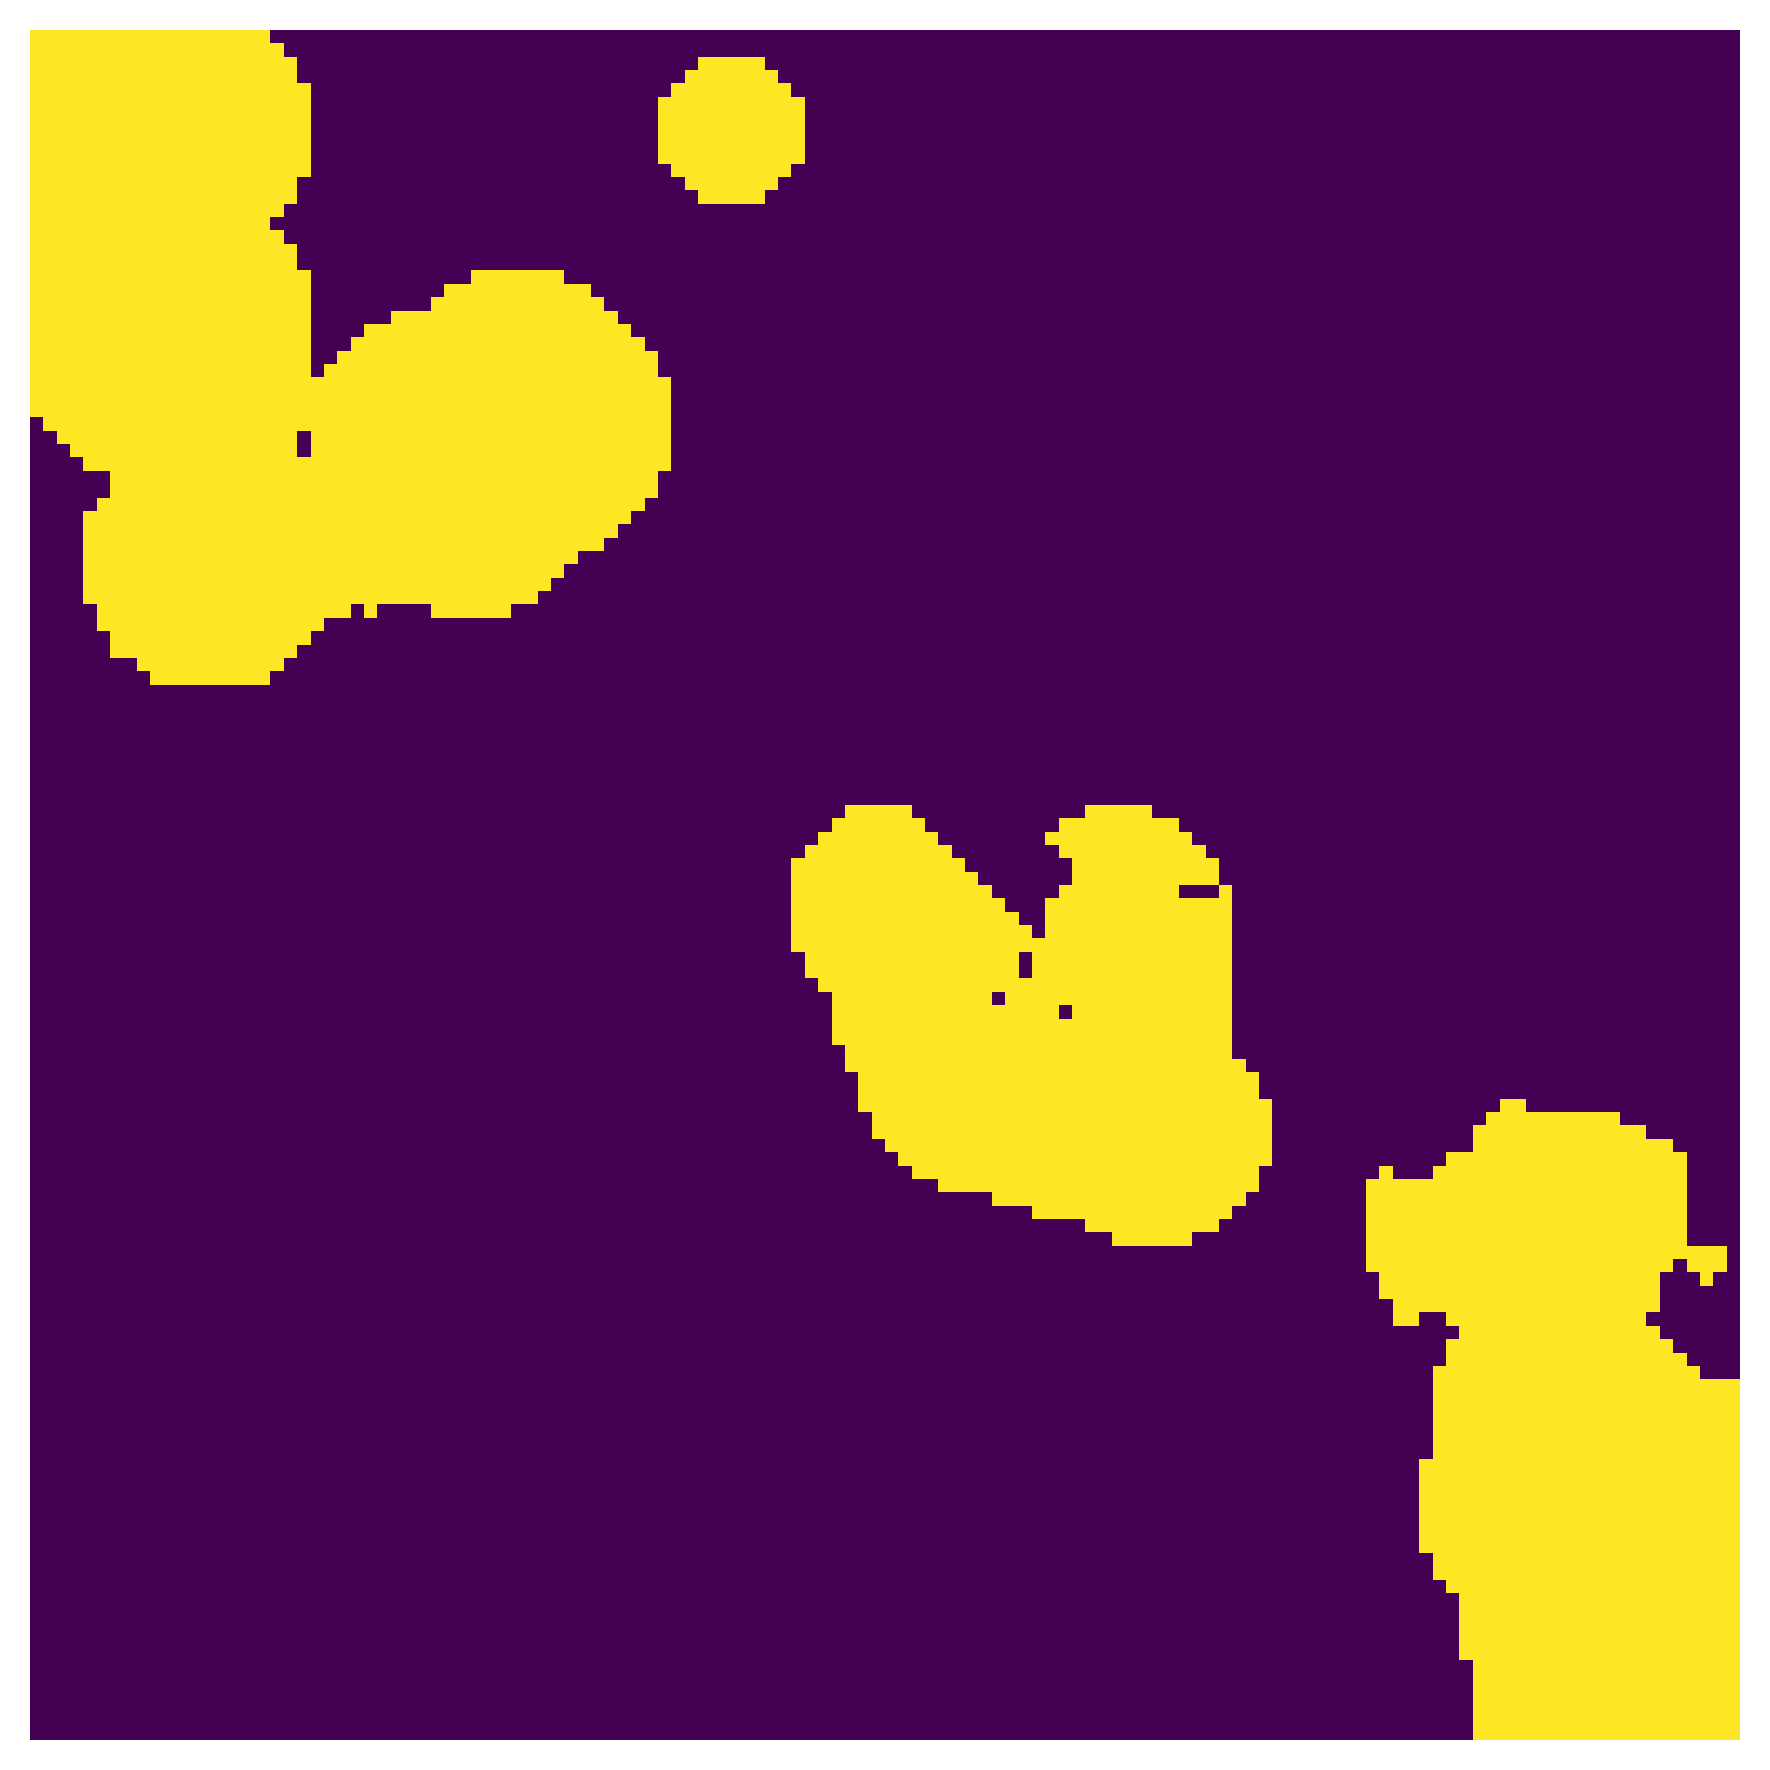

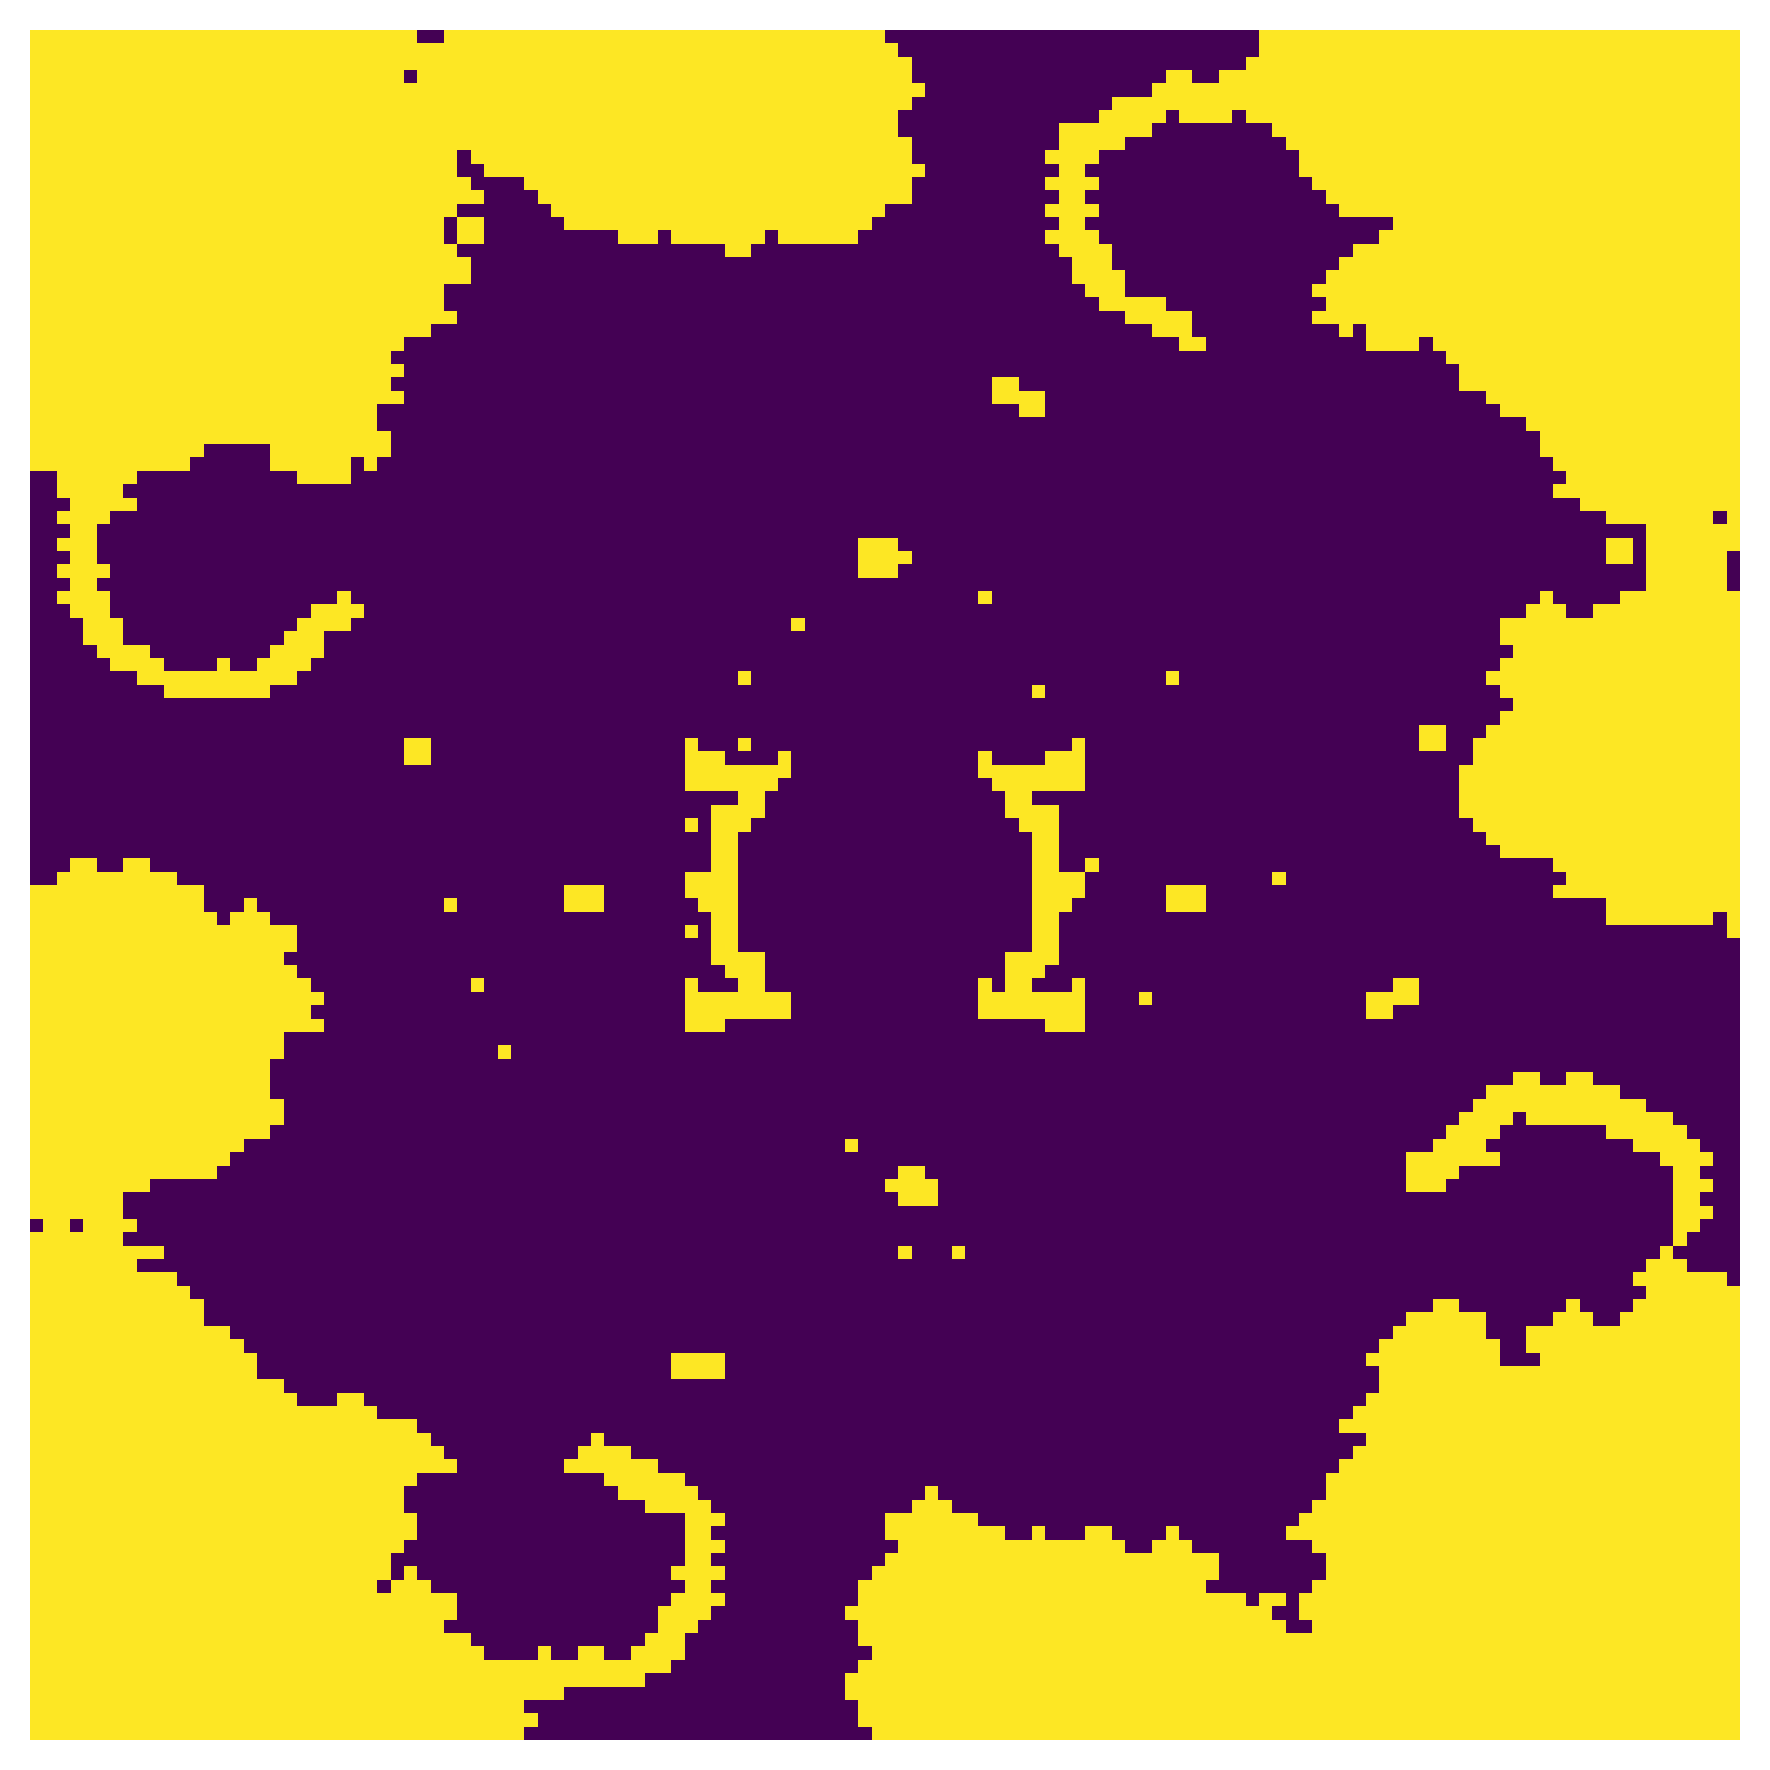

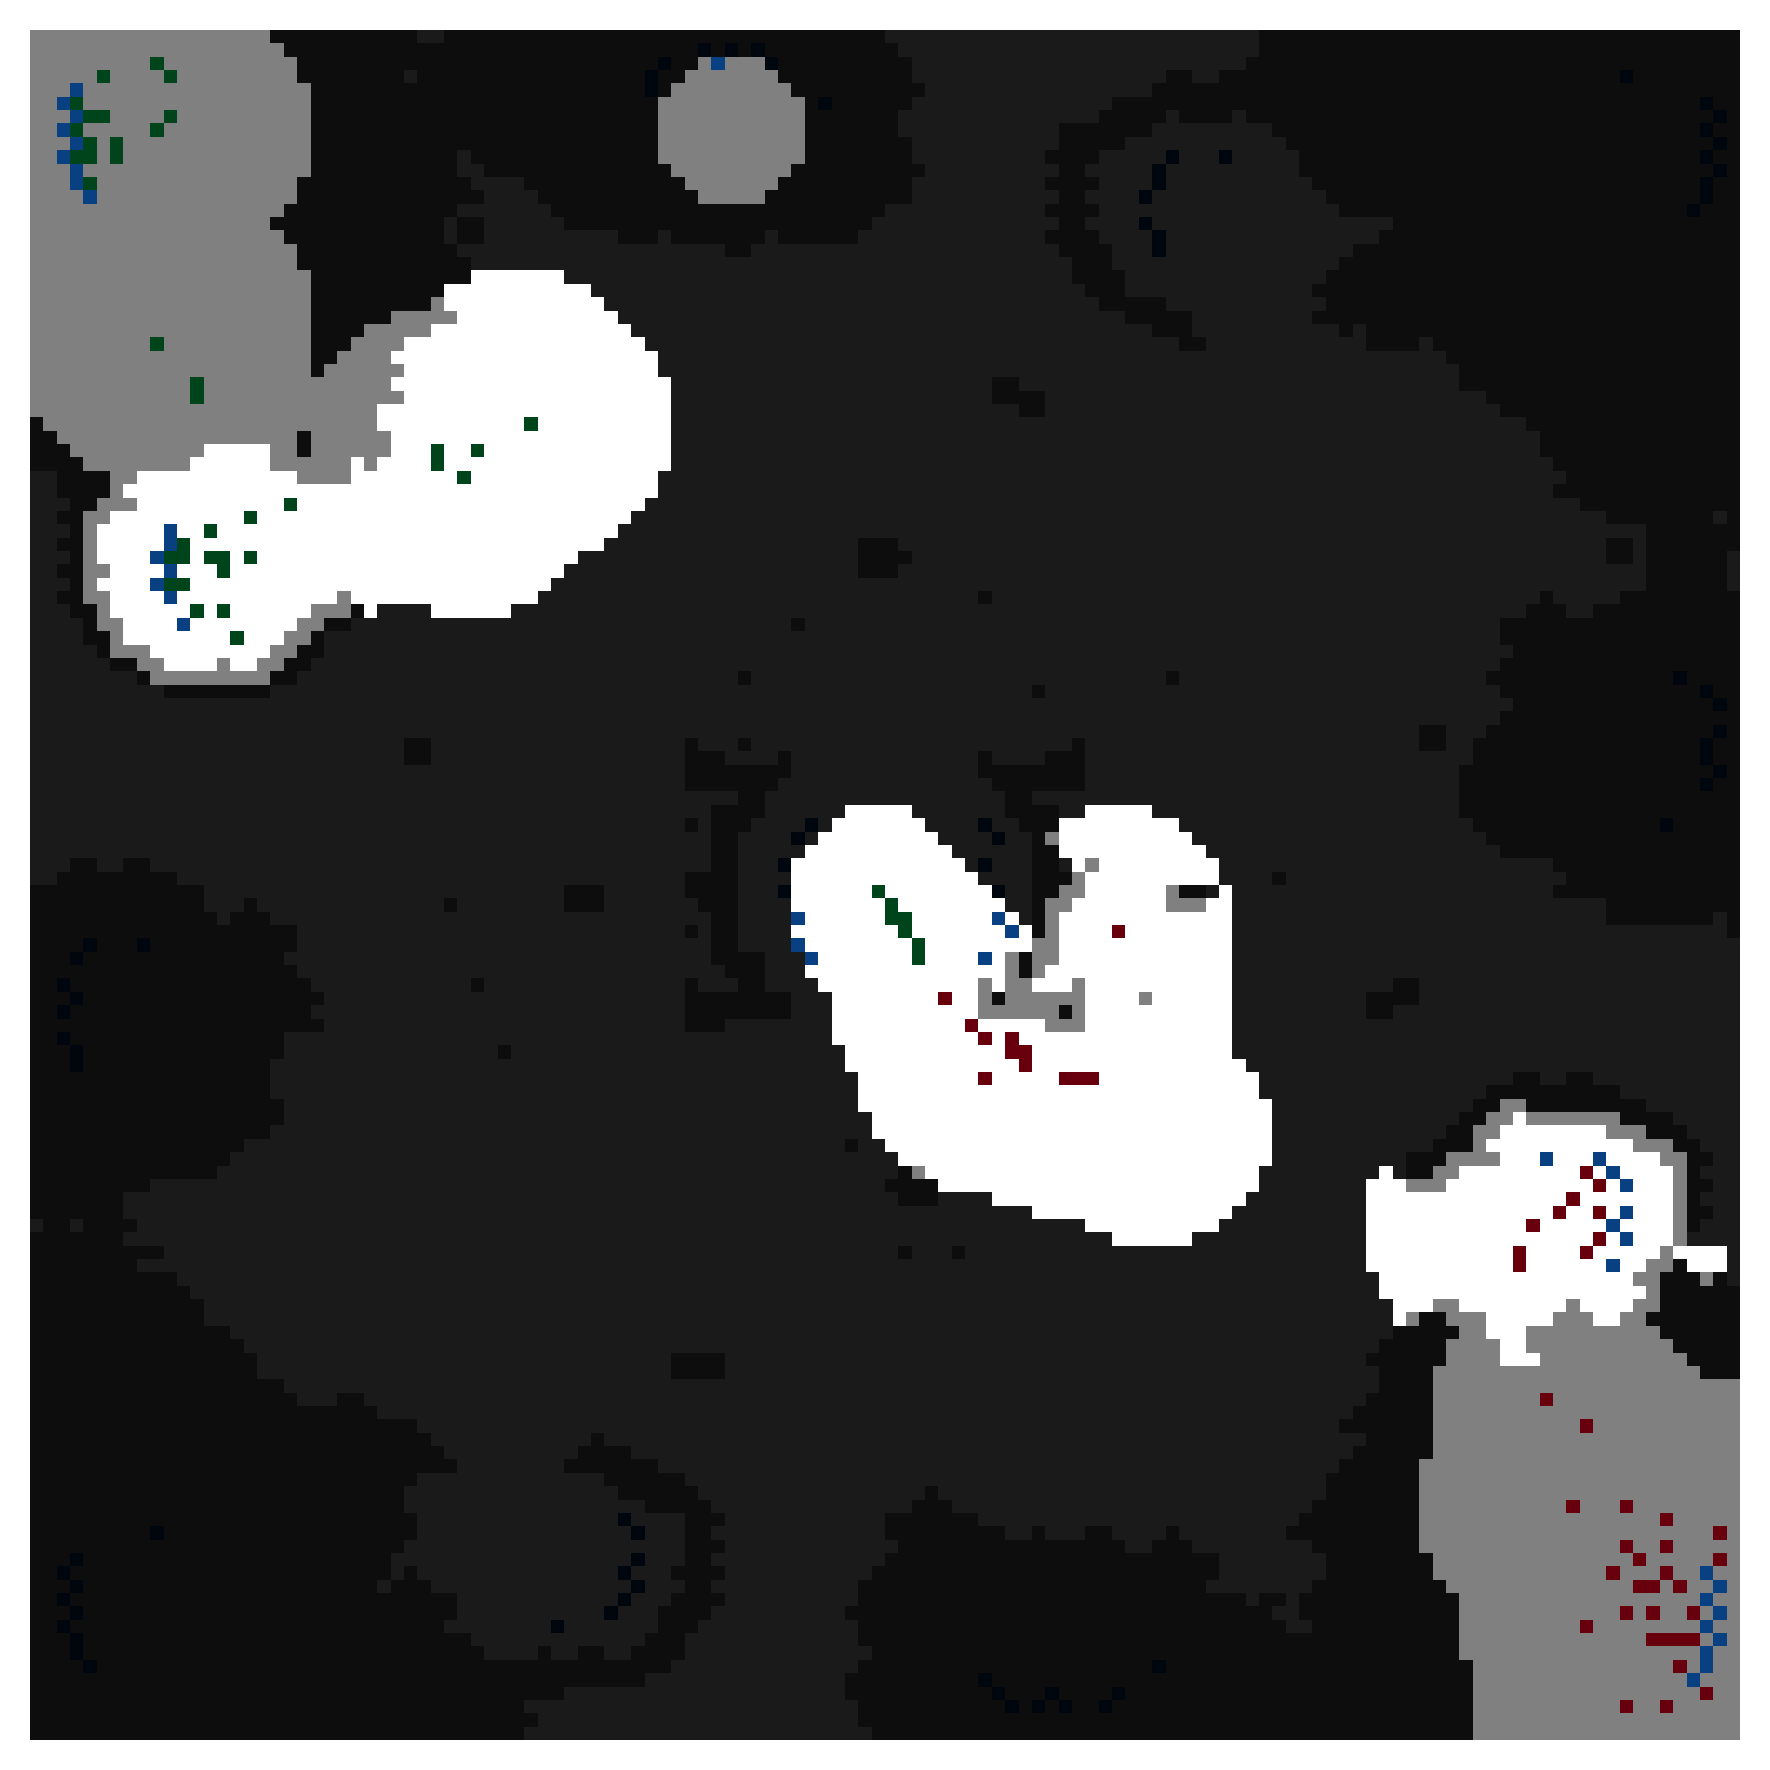

212.rep - 9815


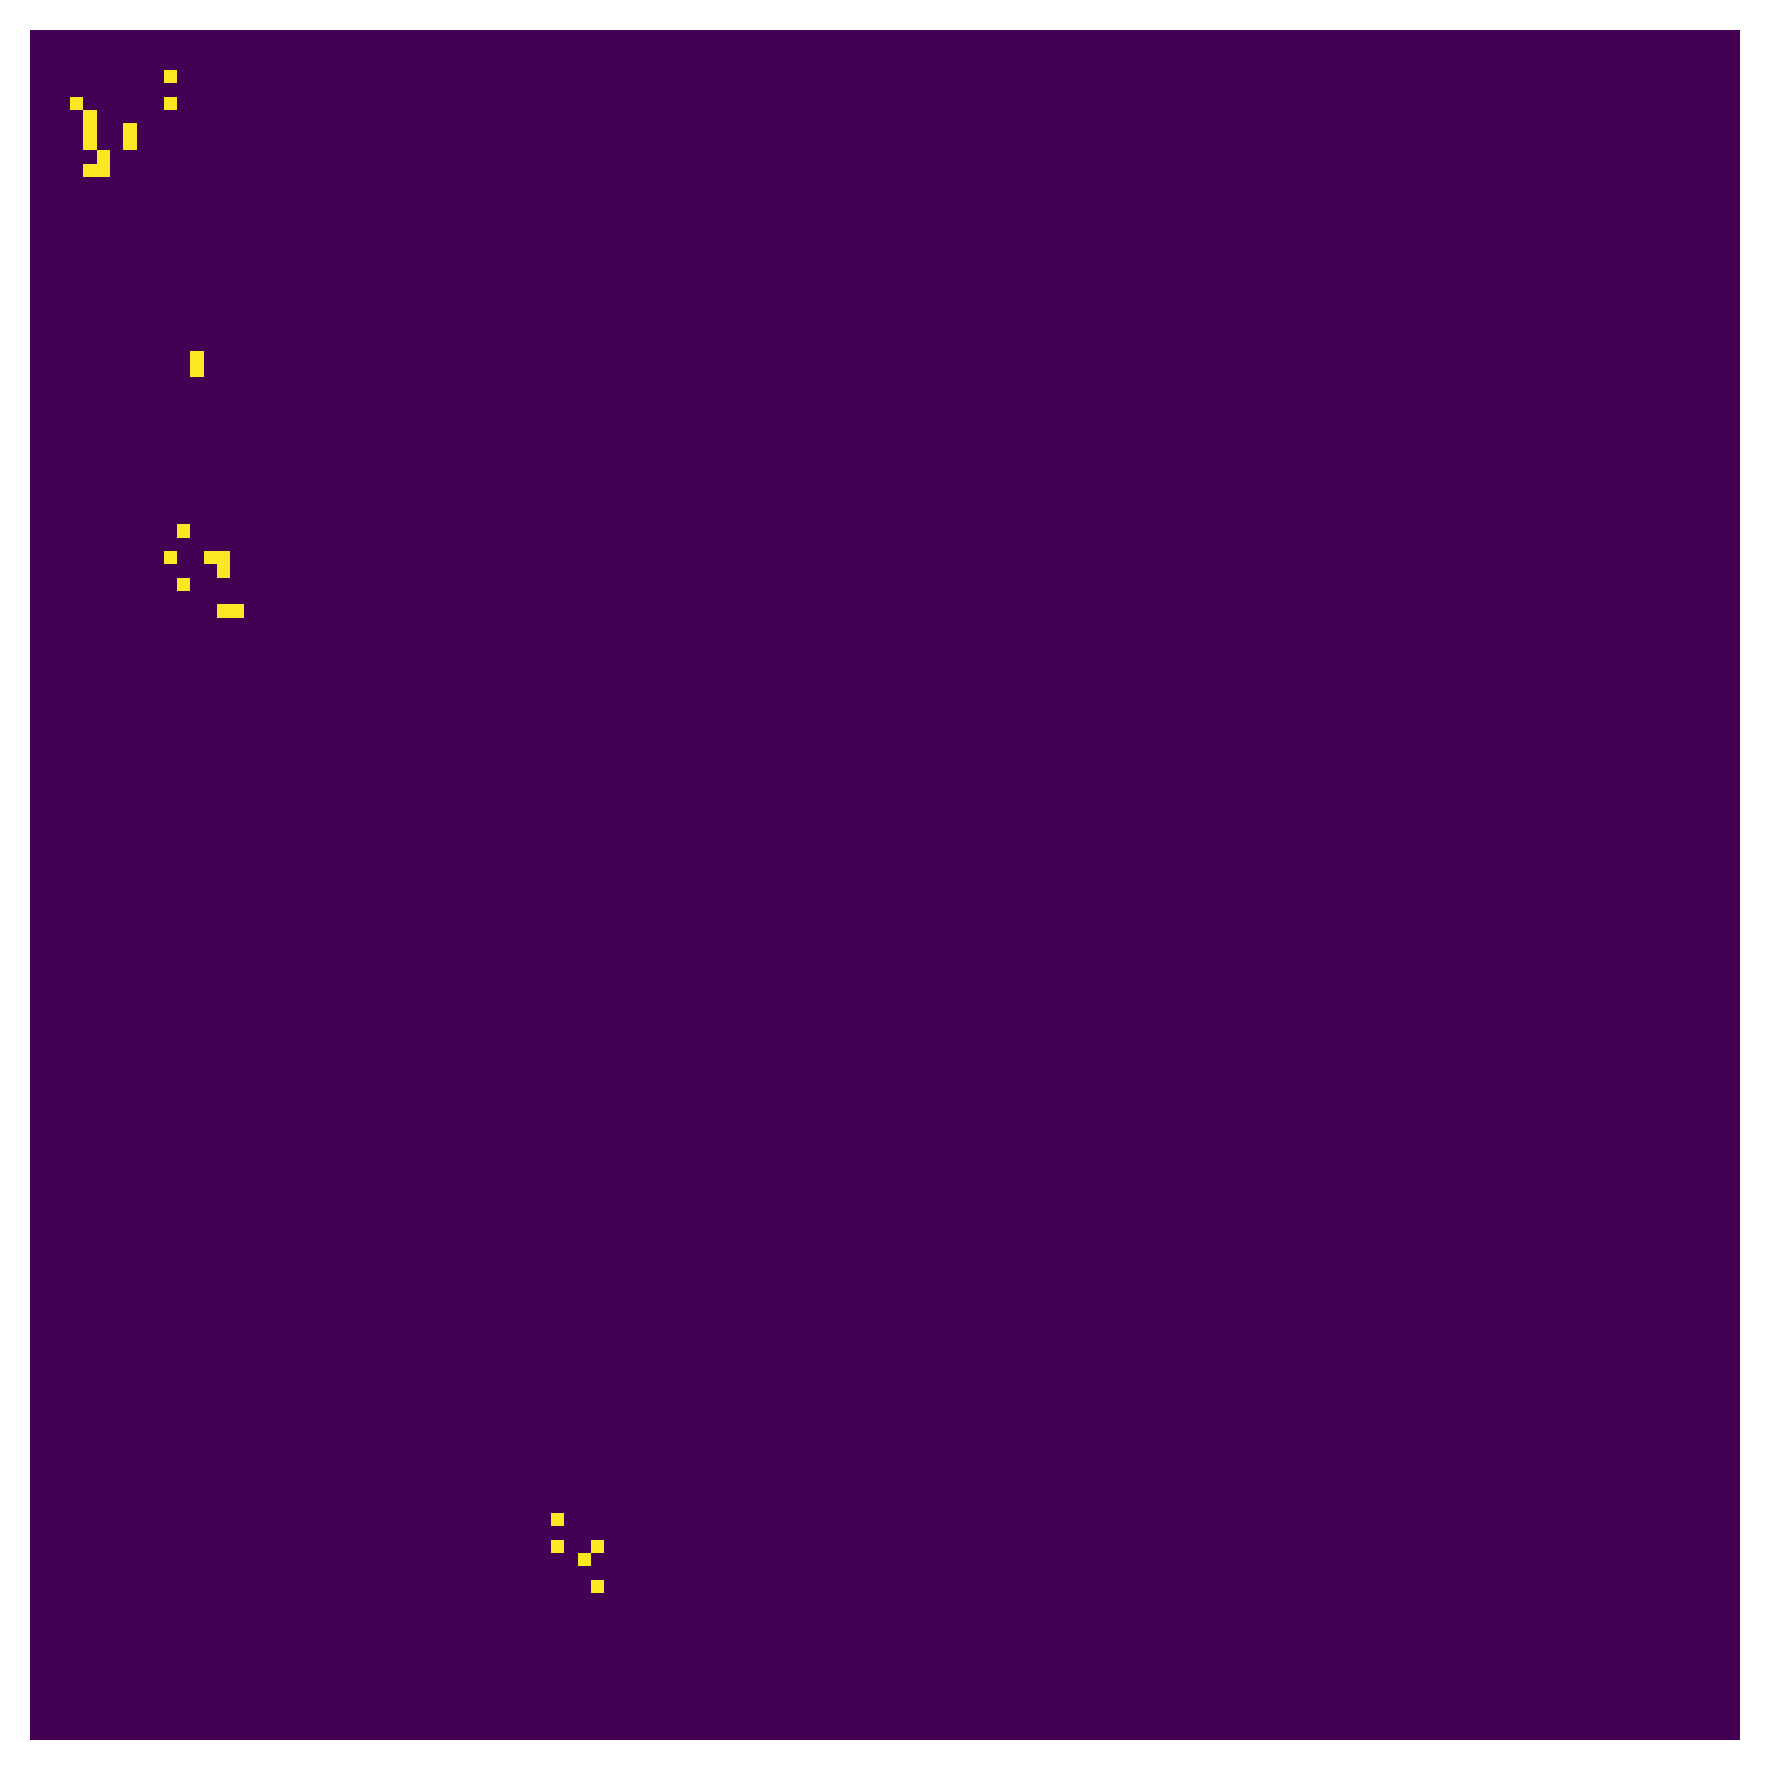

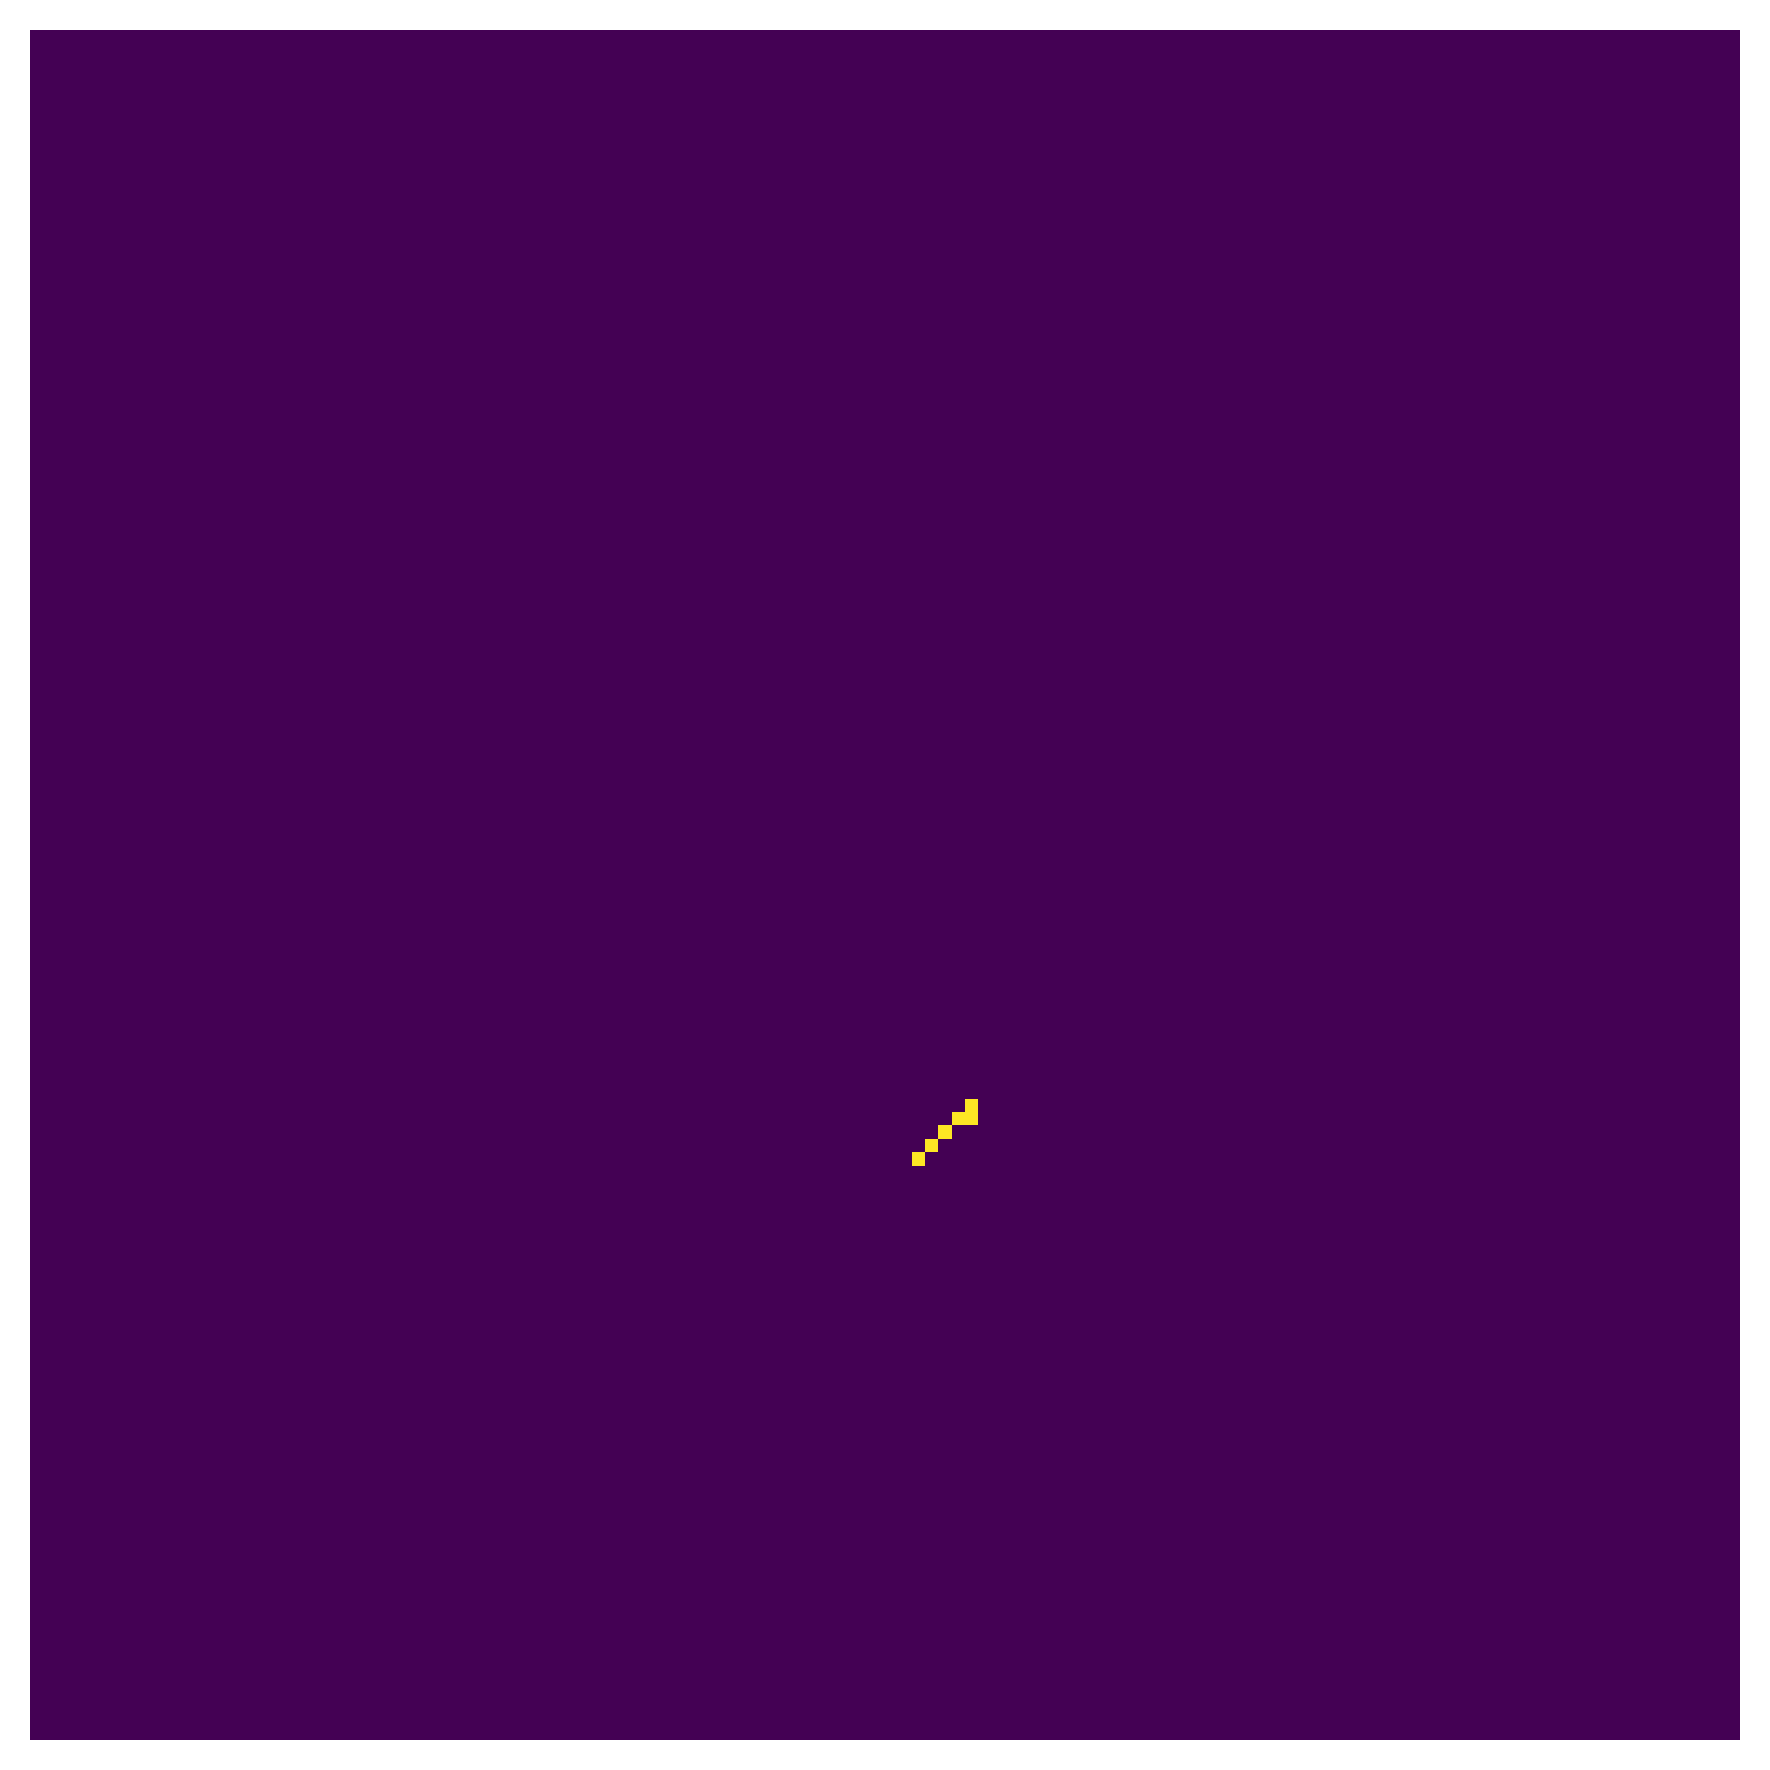

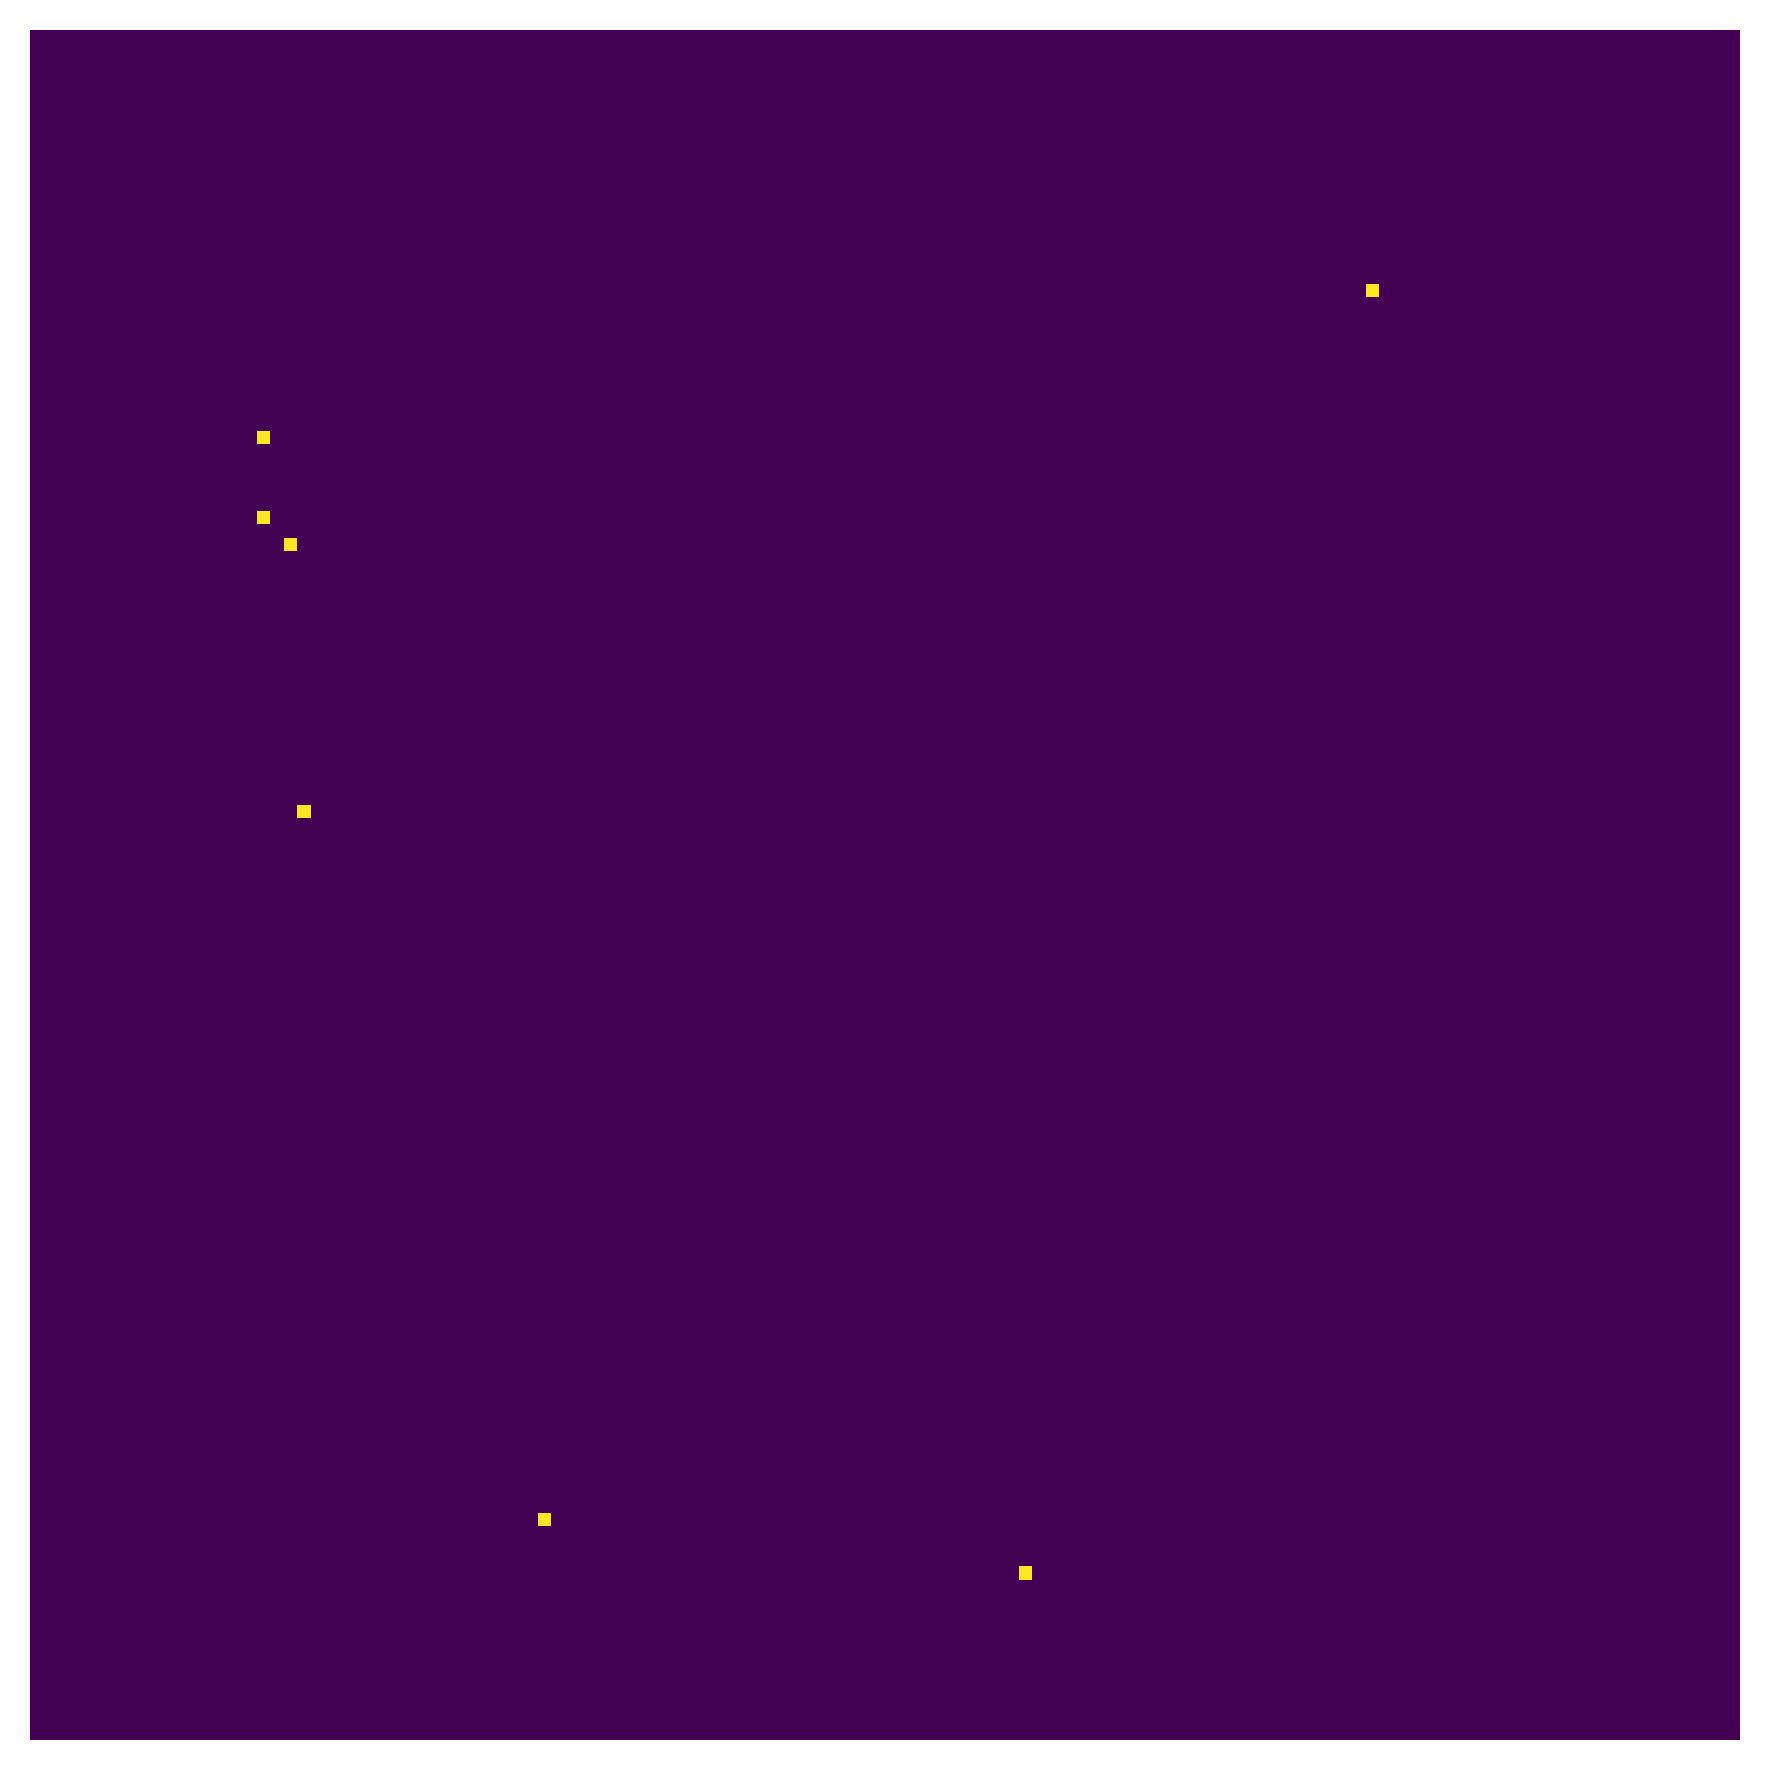

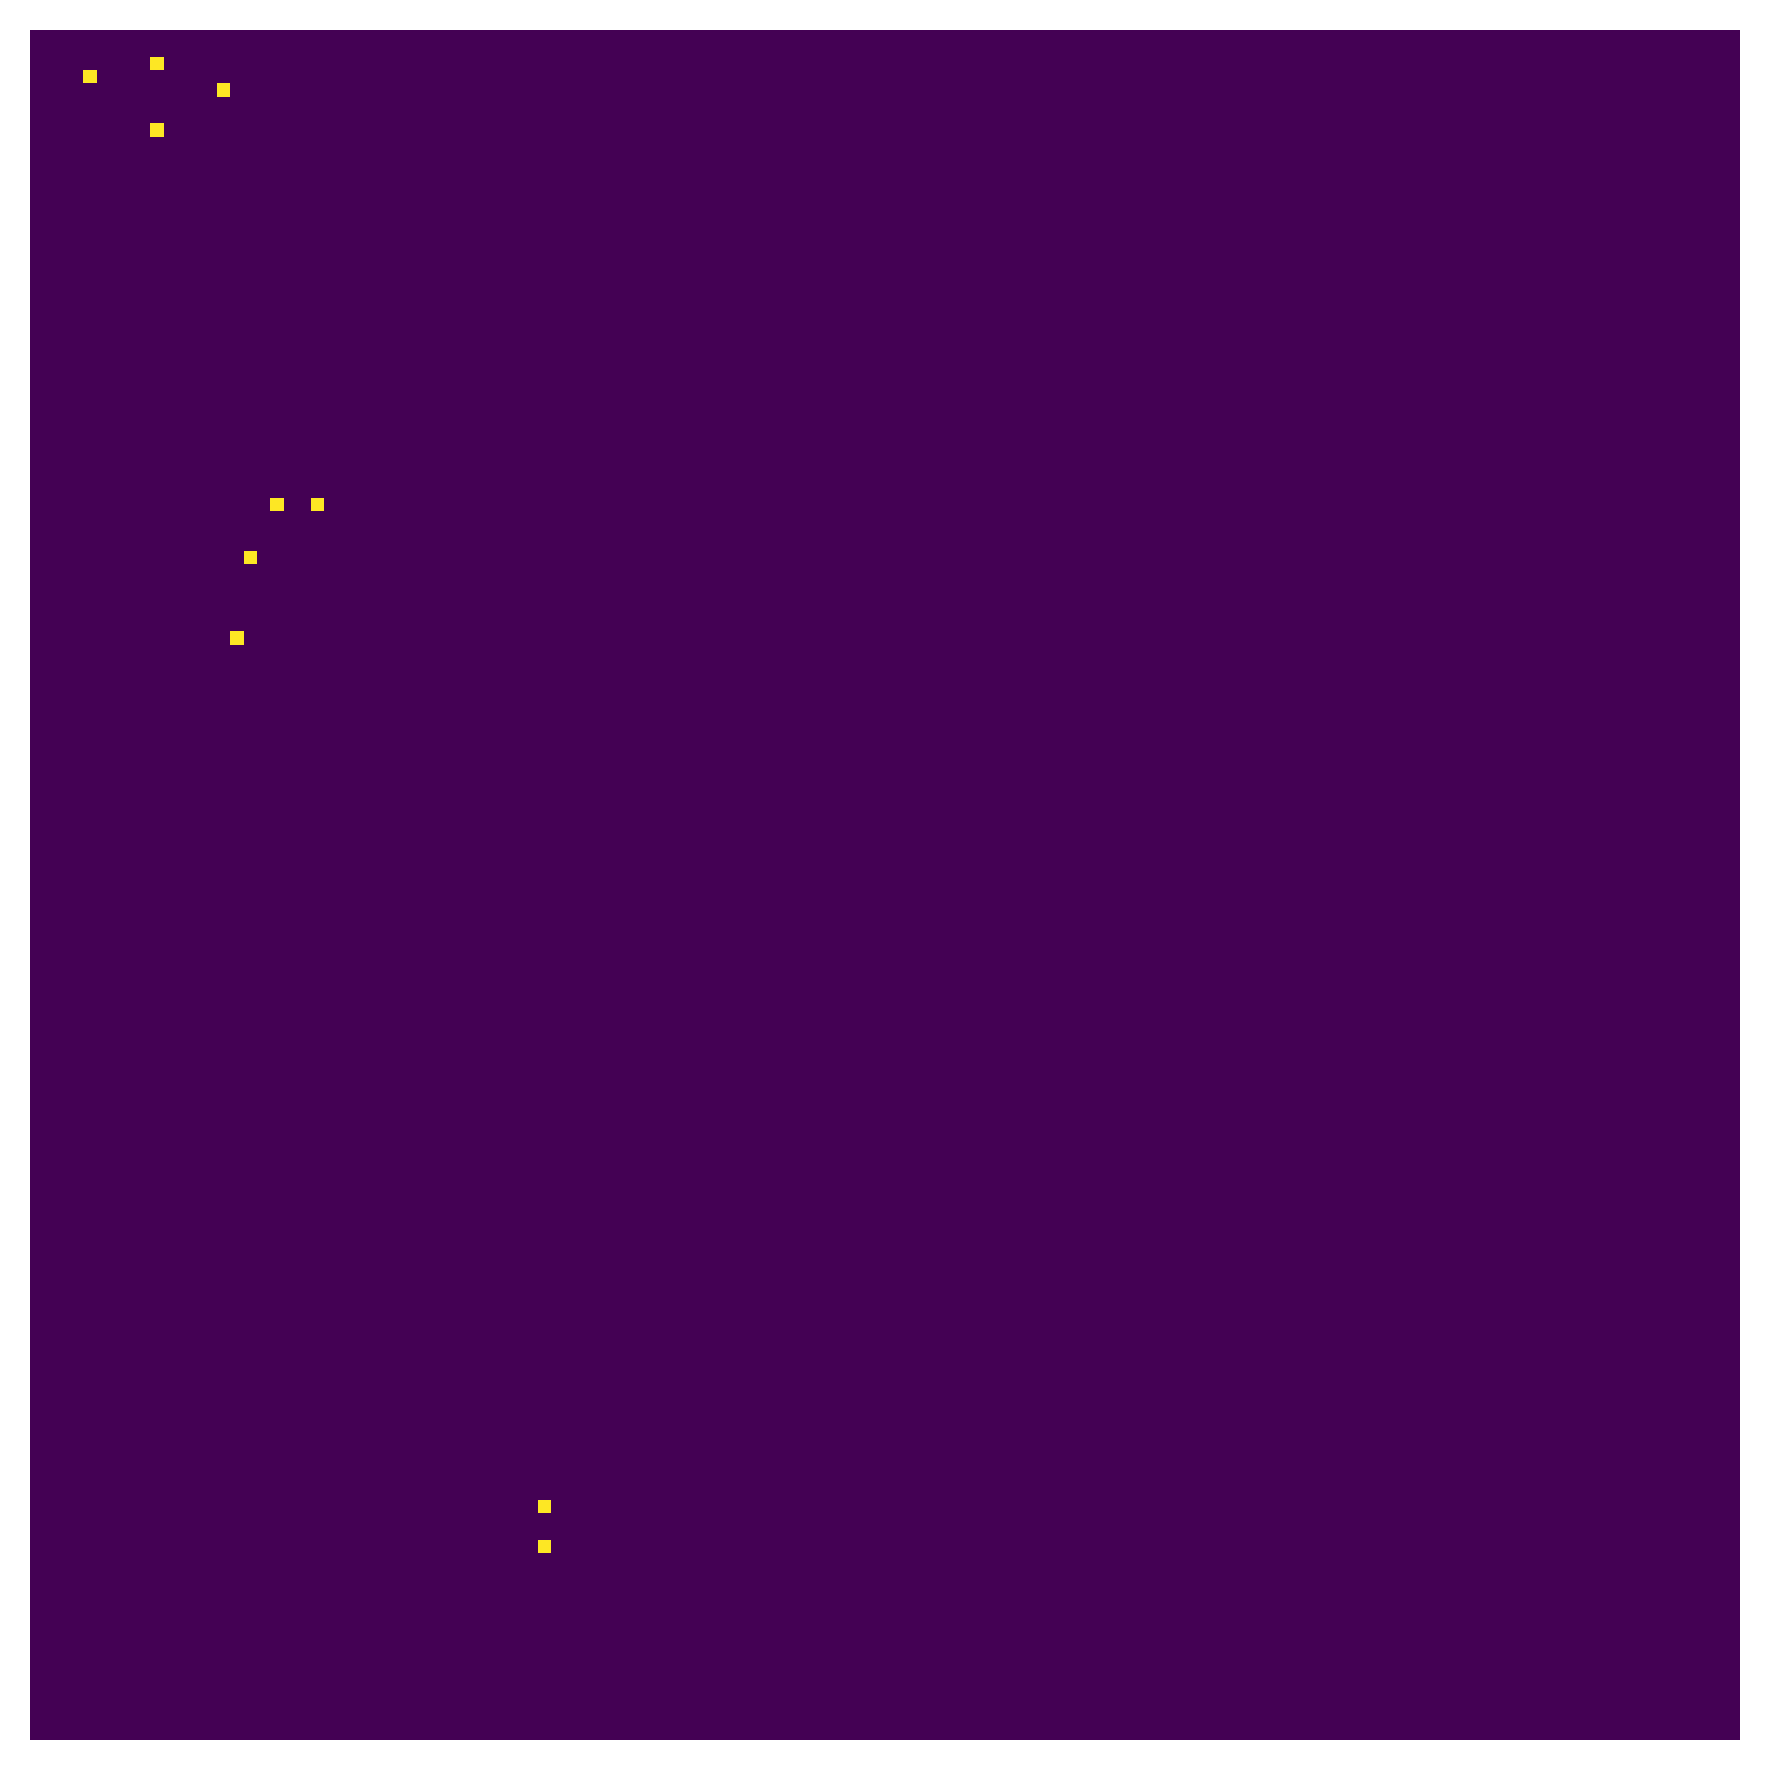

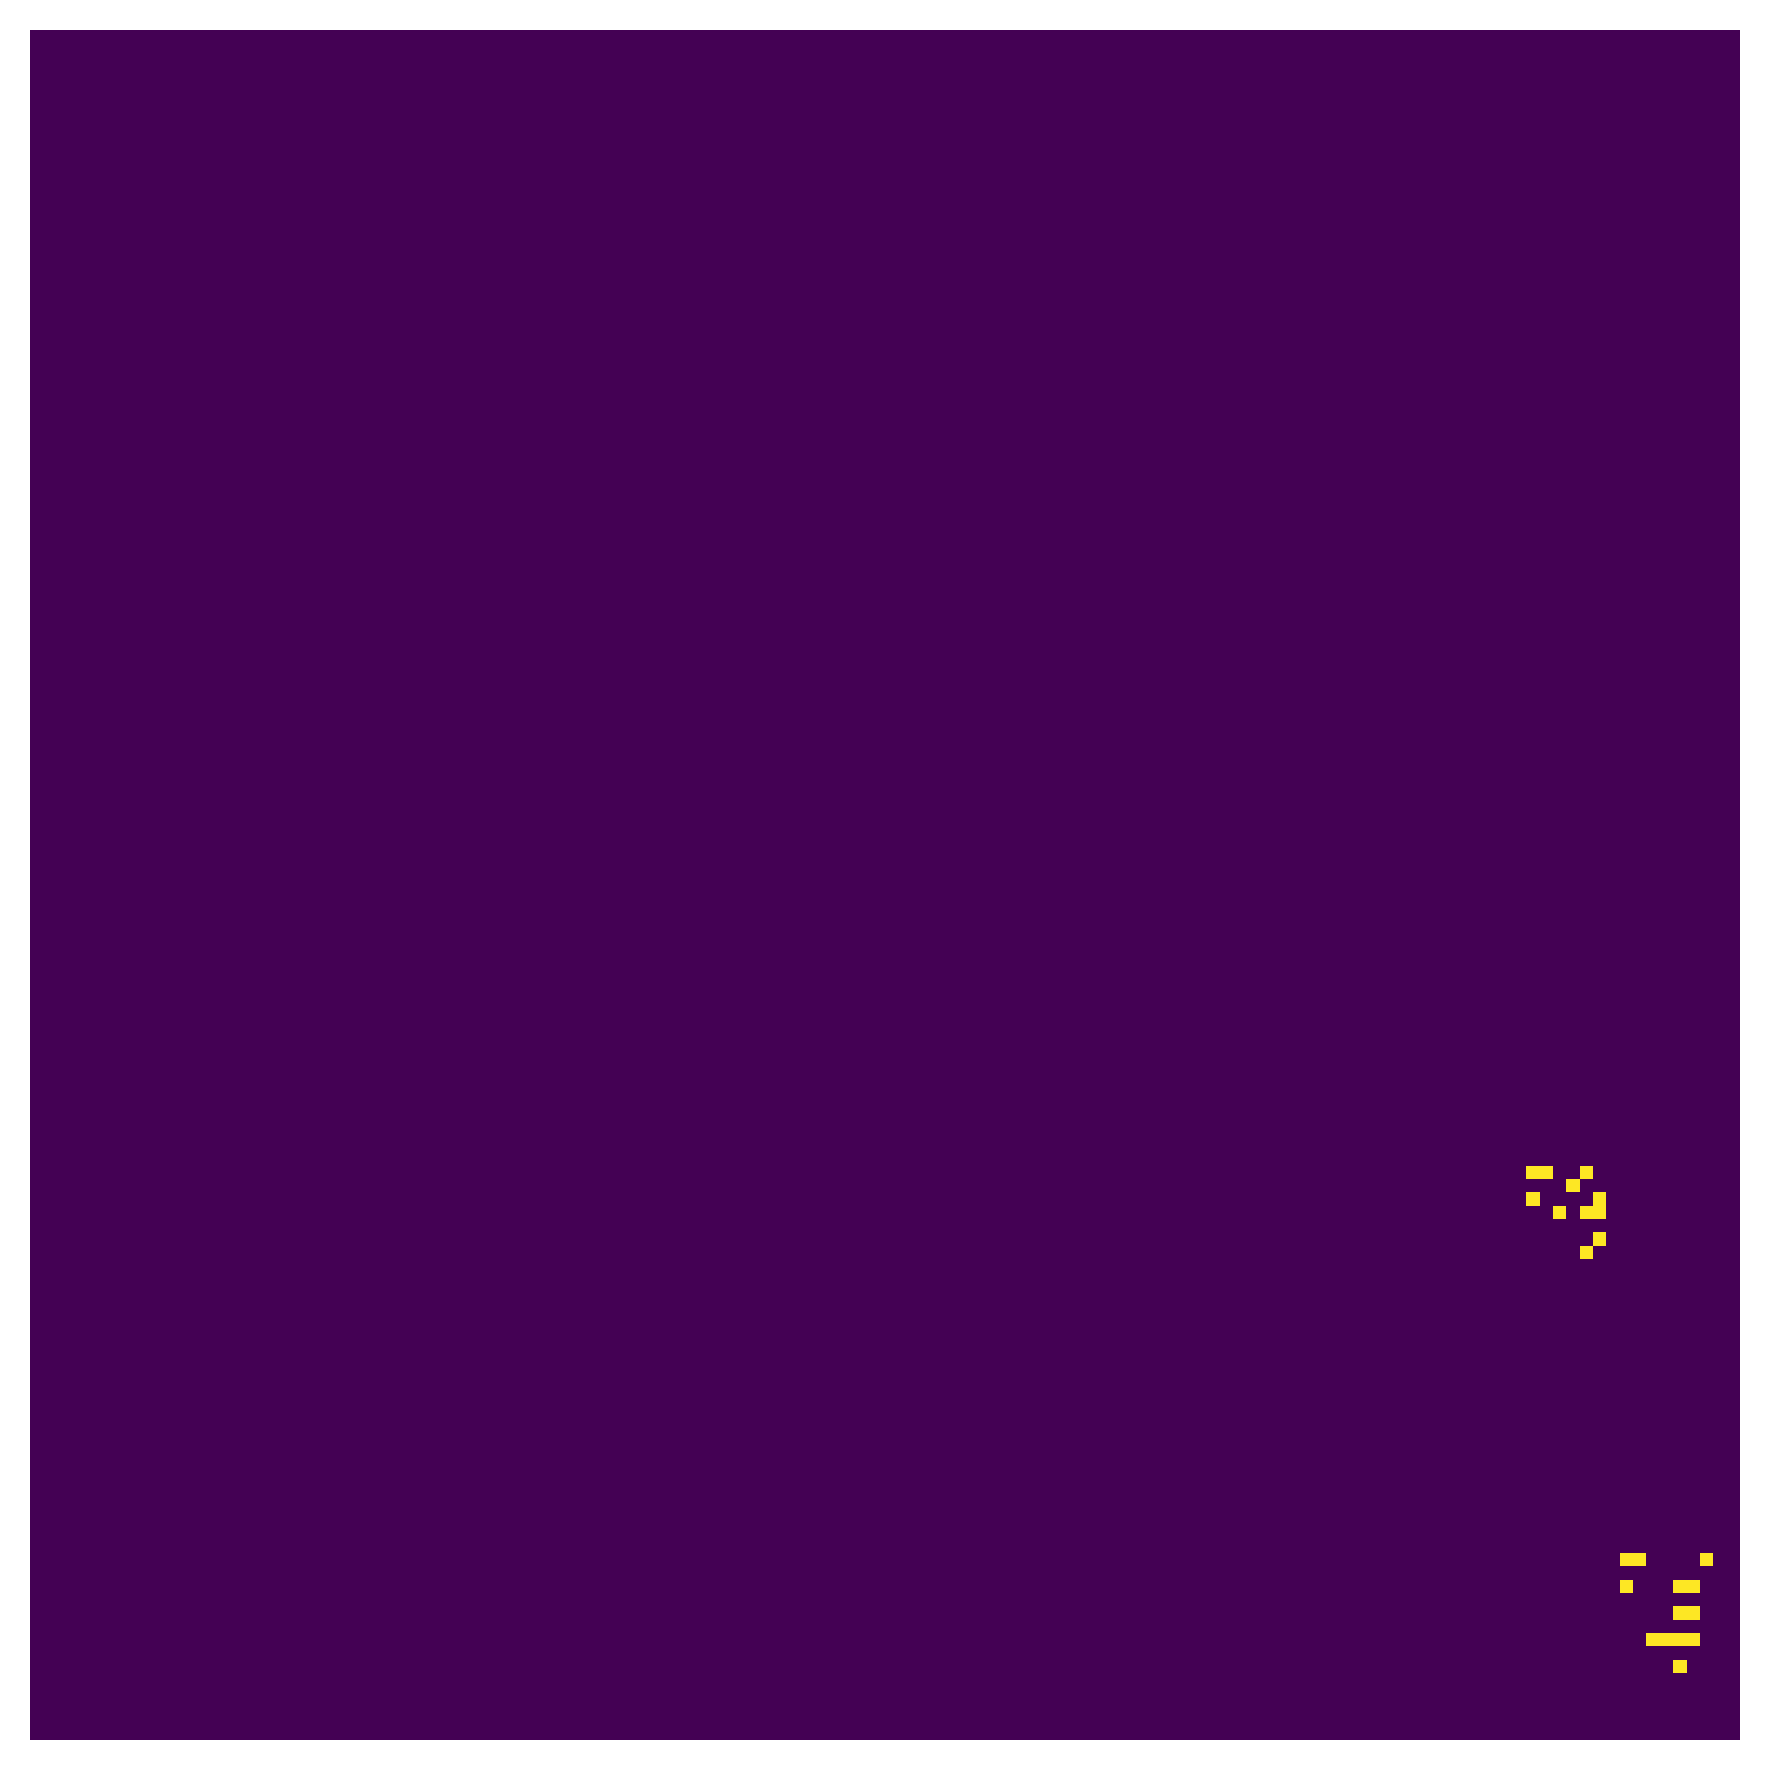

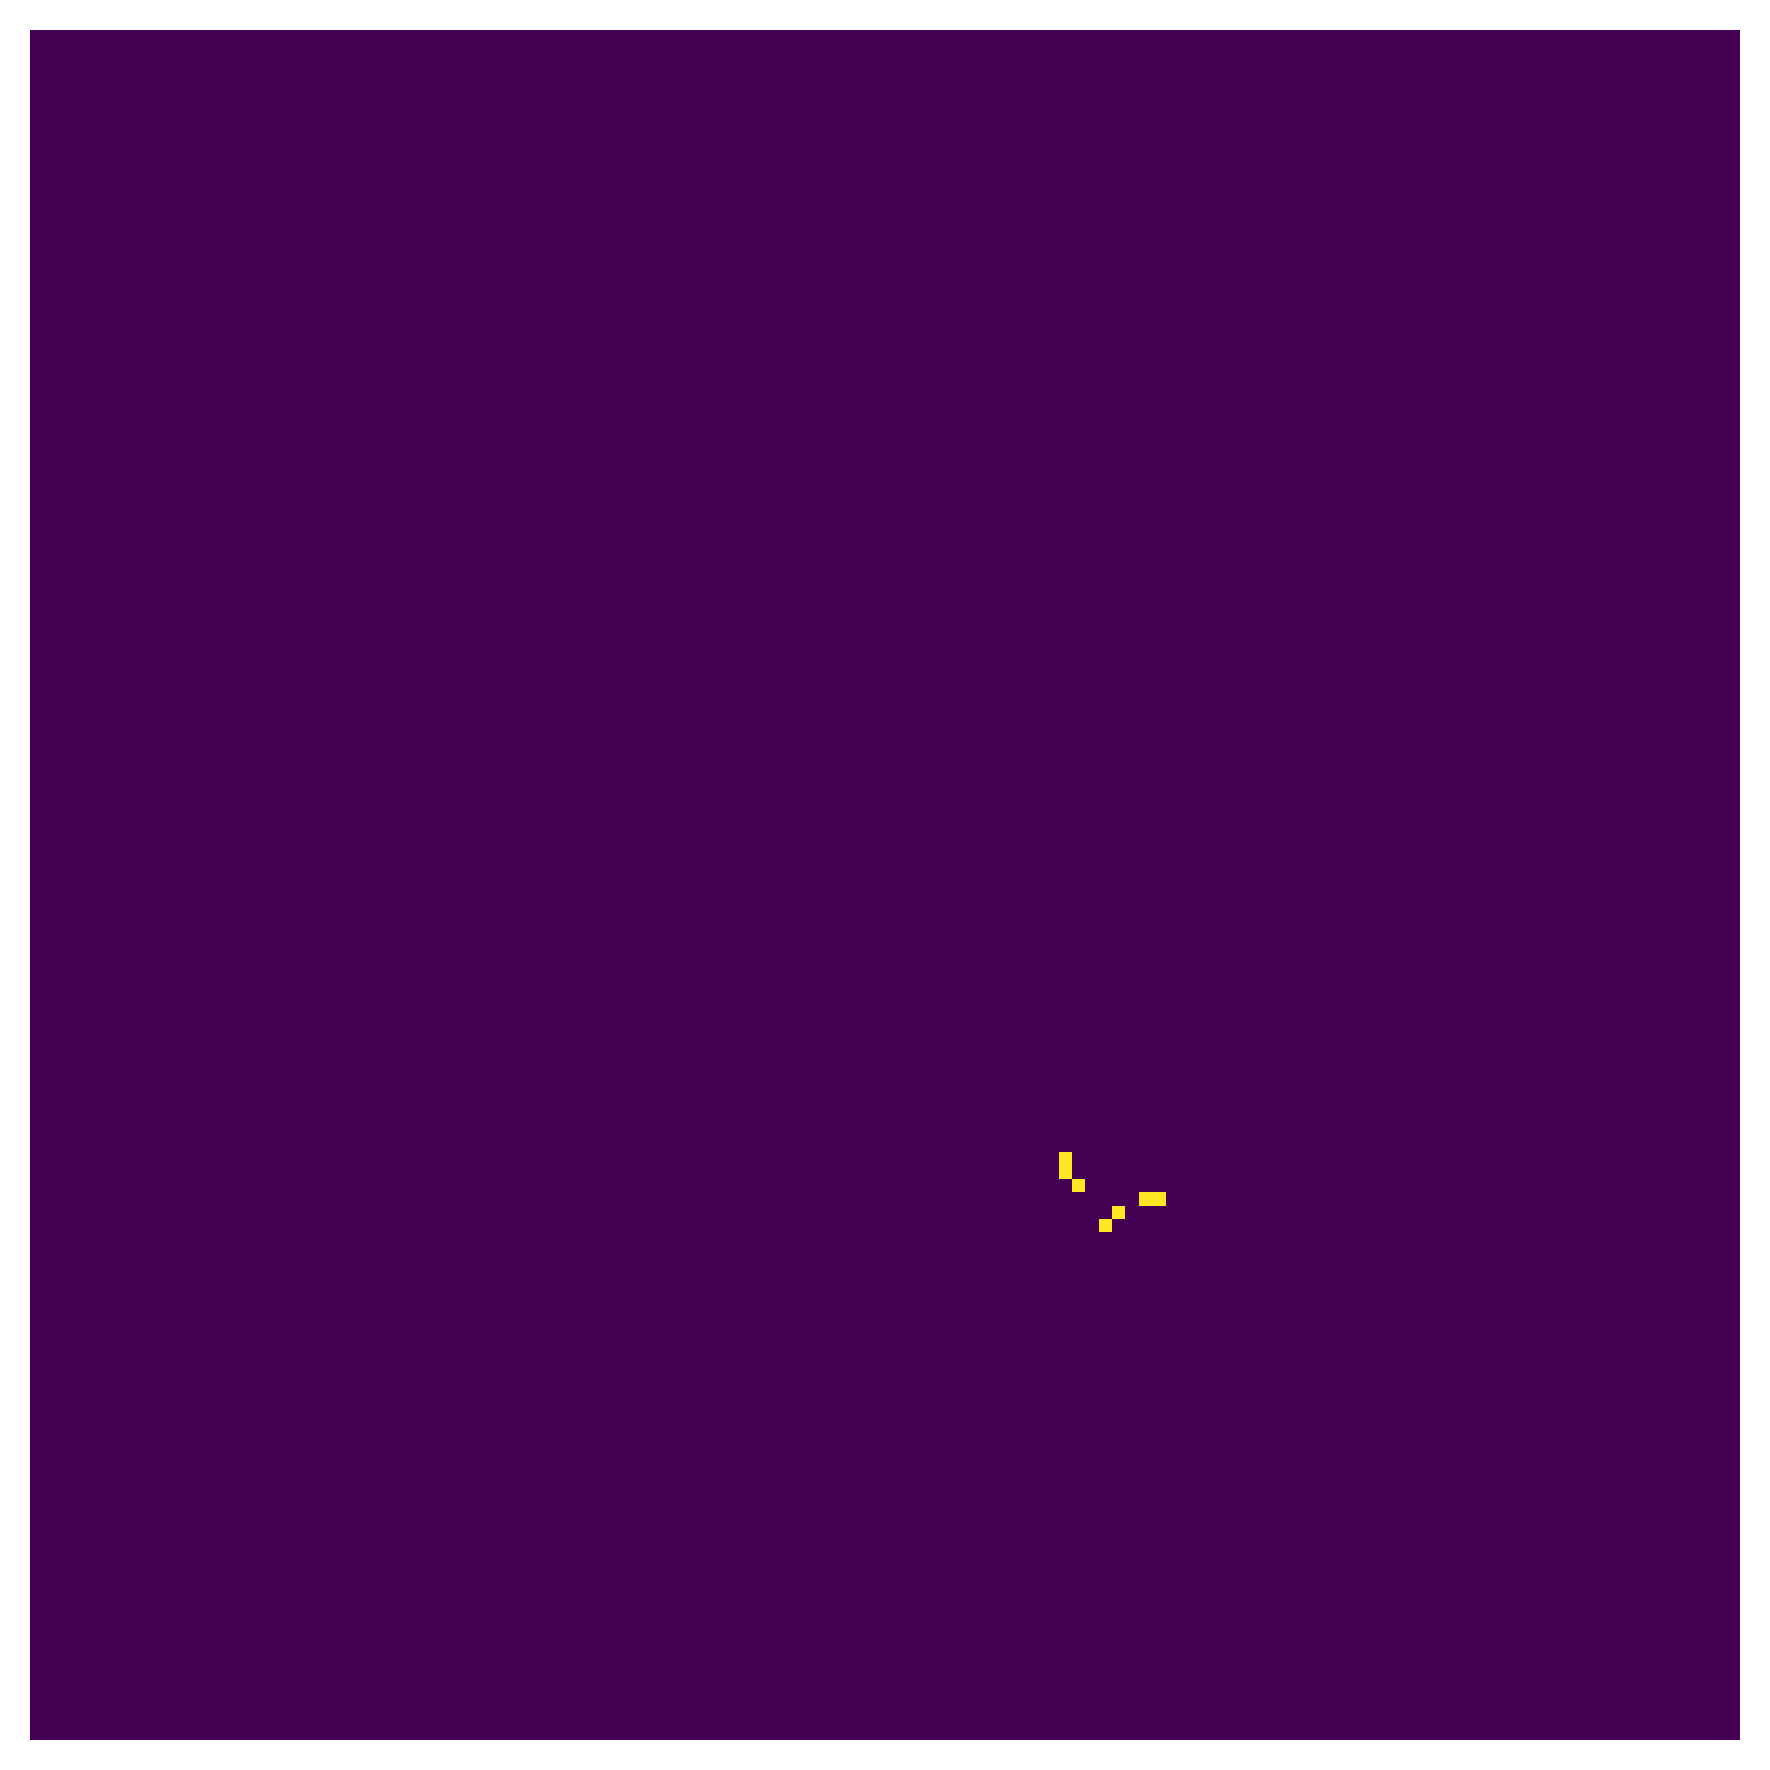

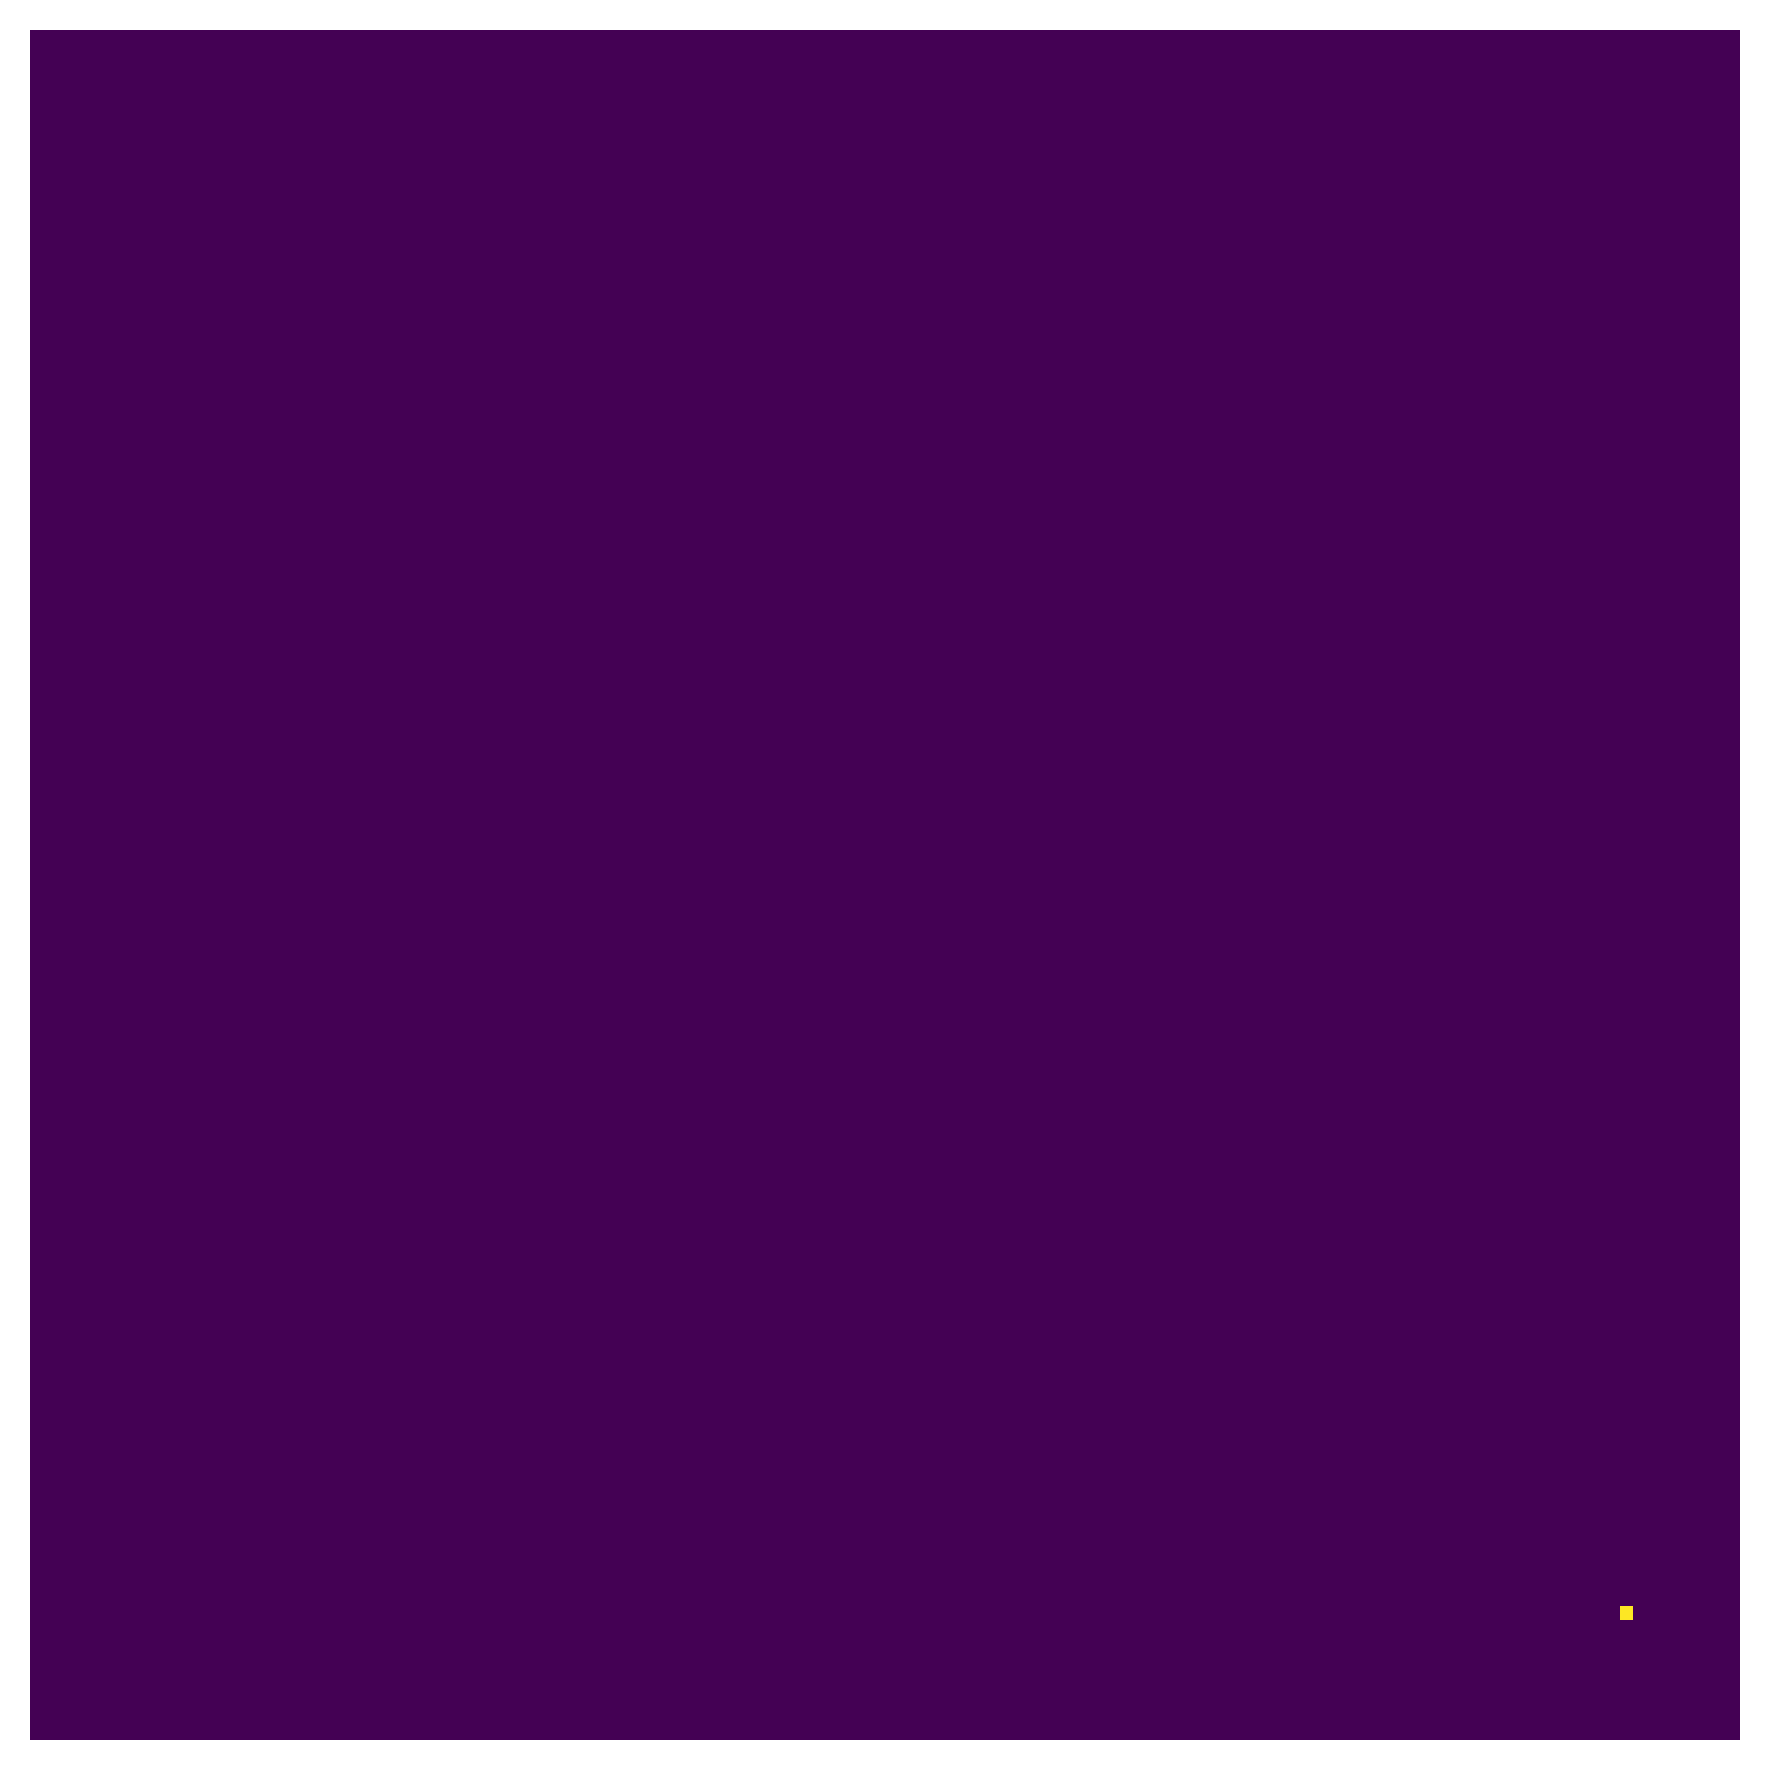

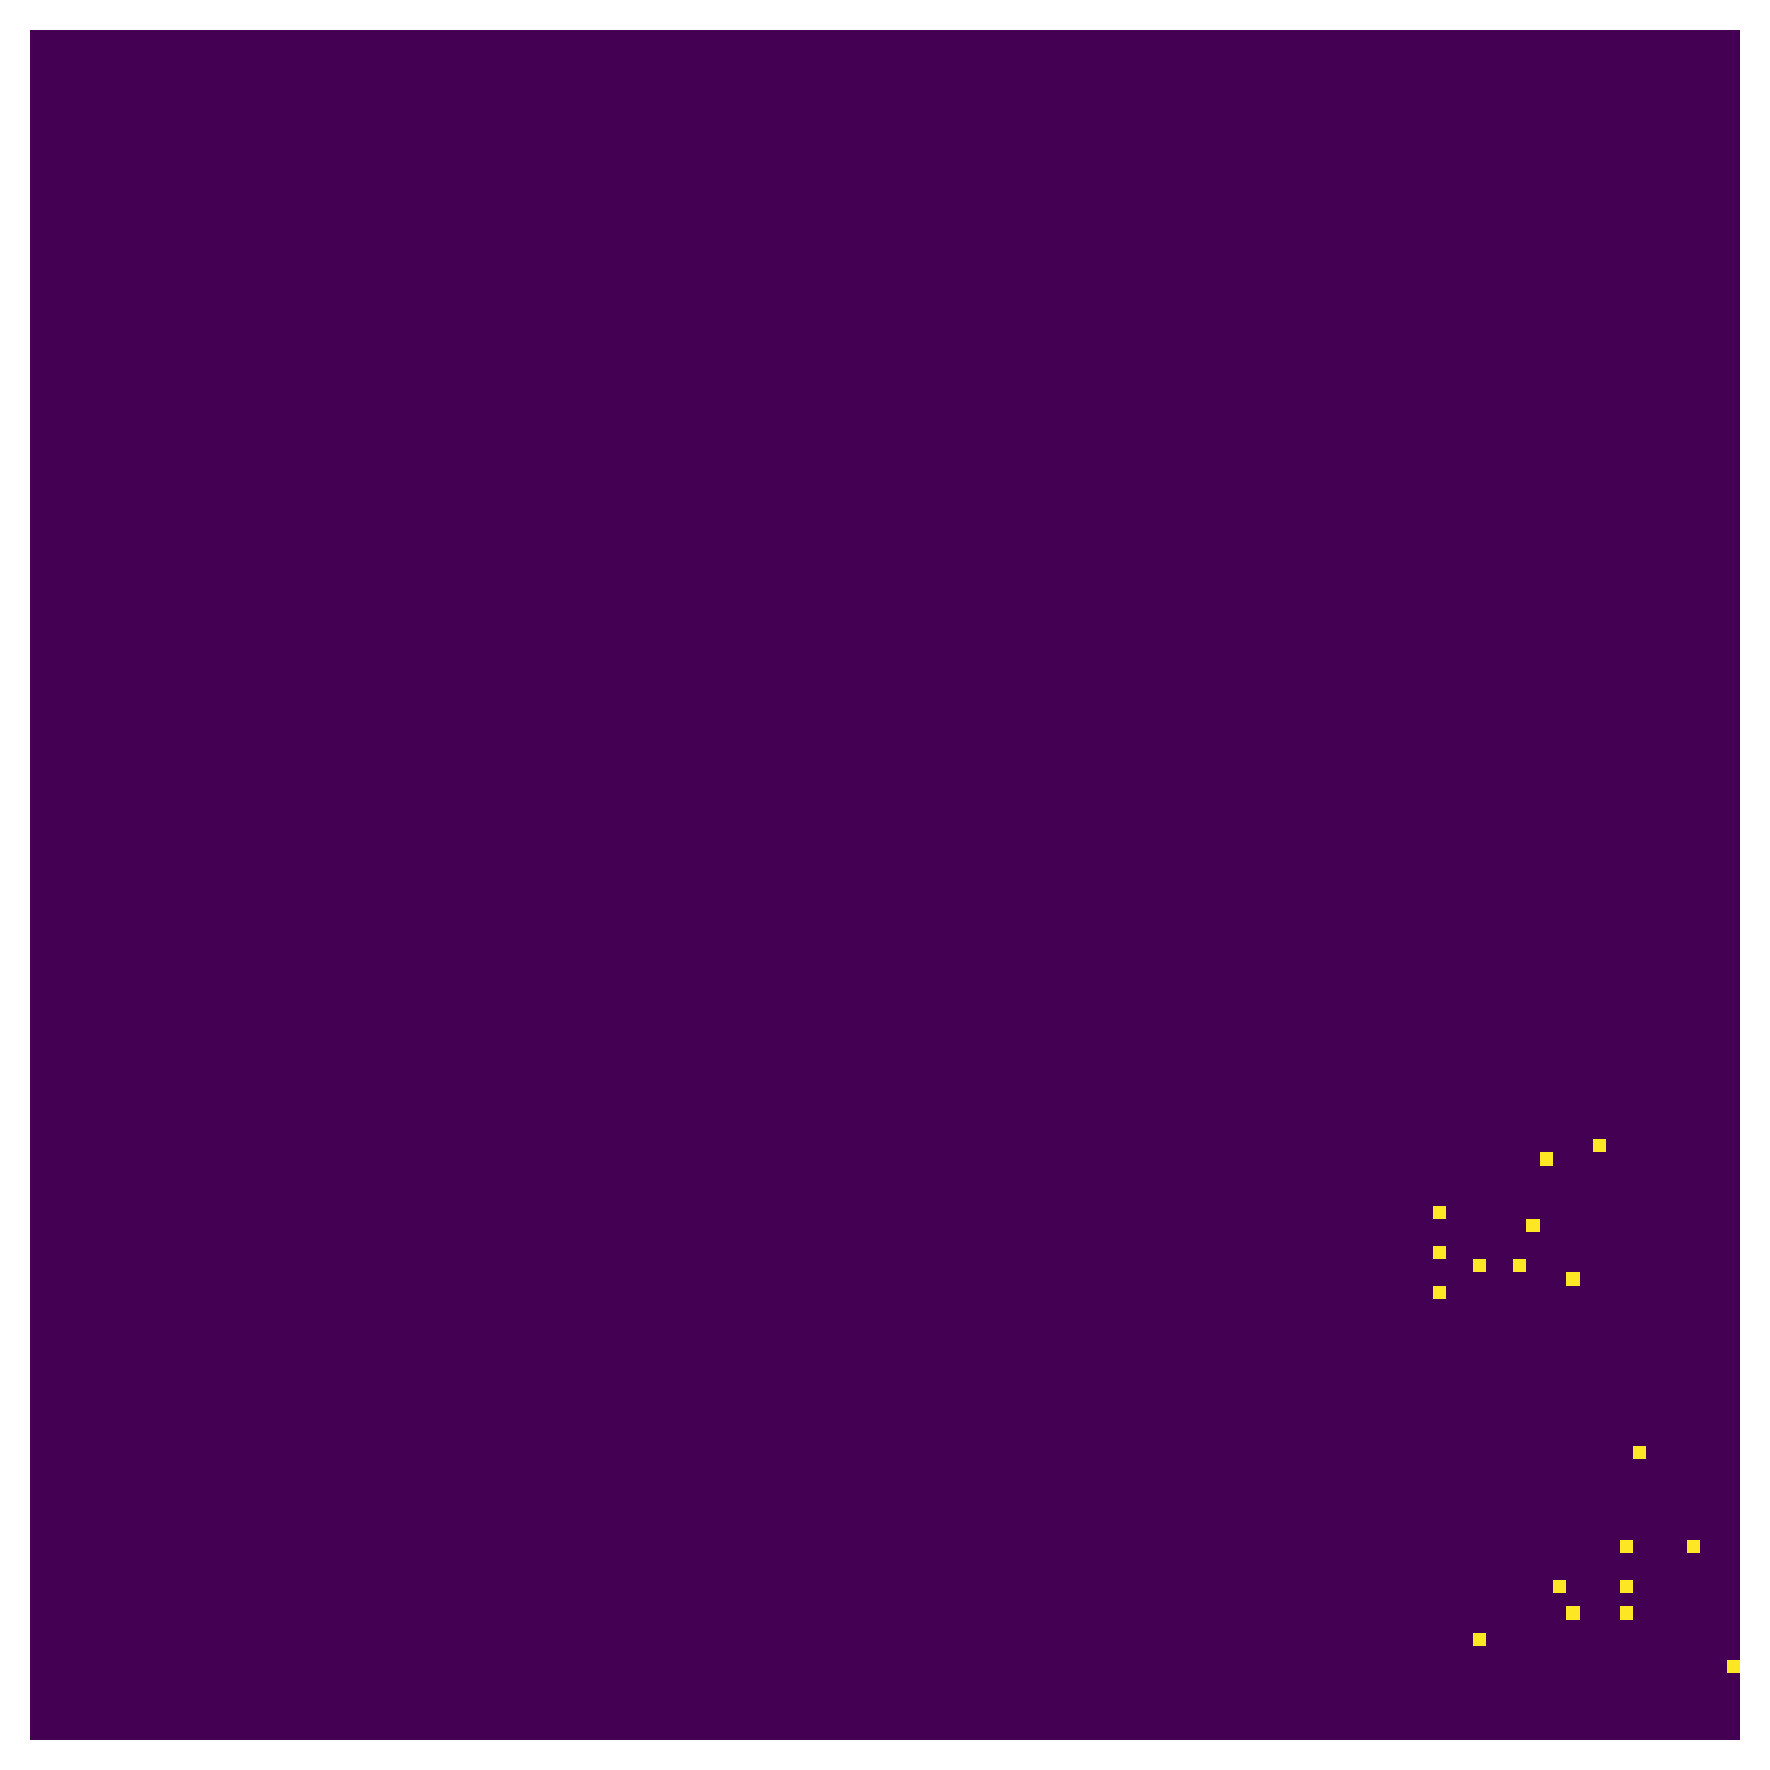

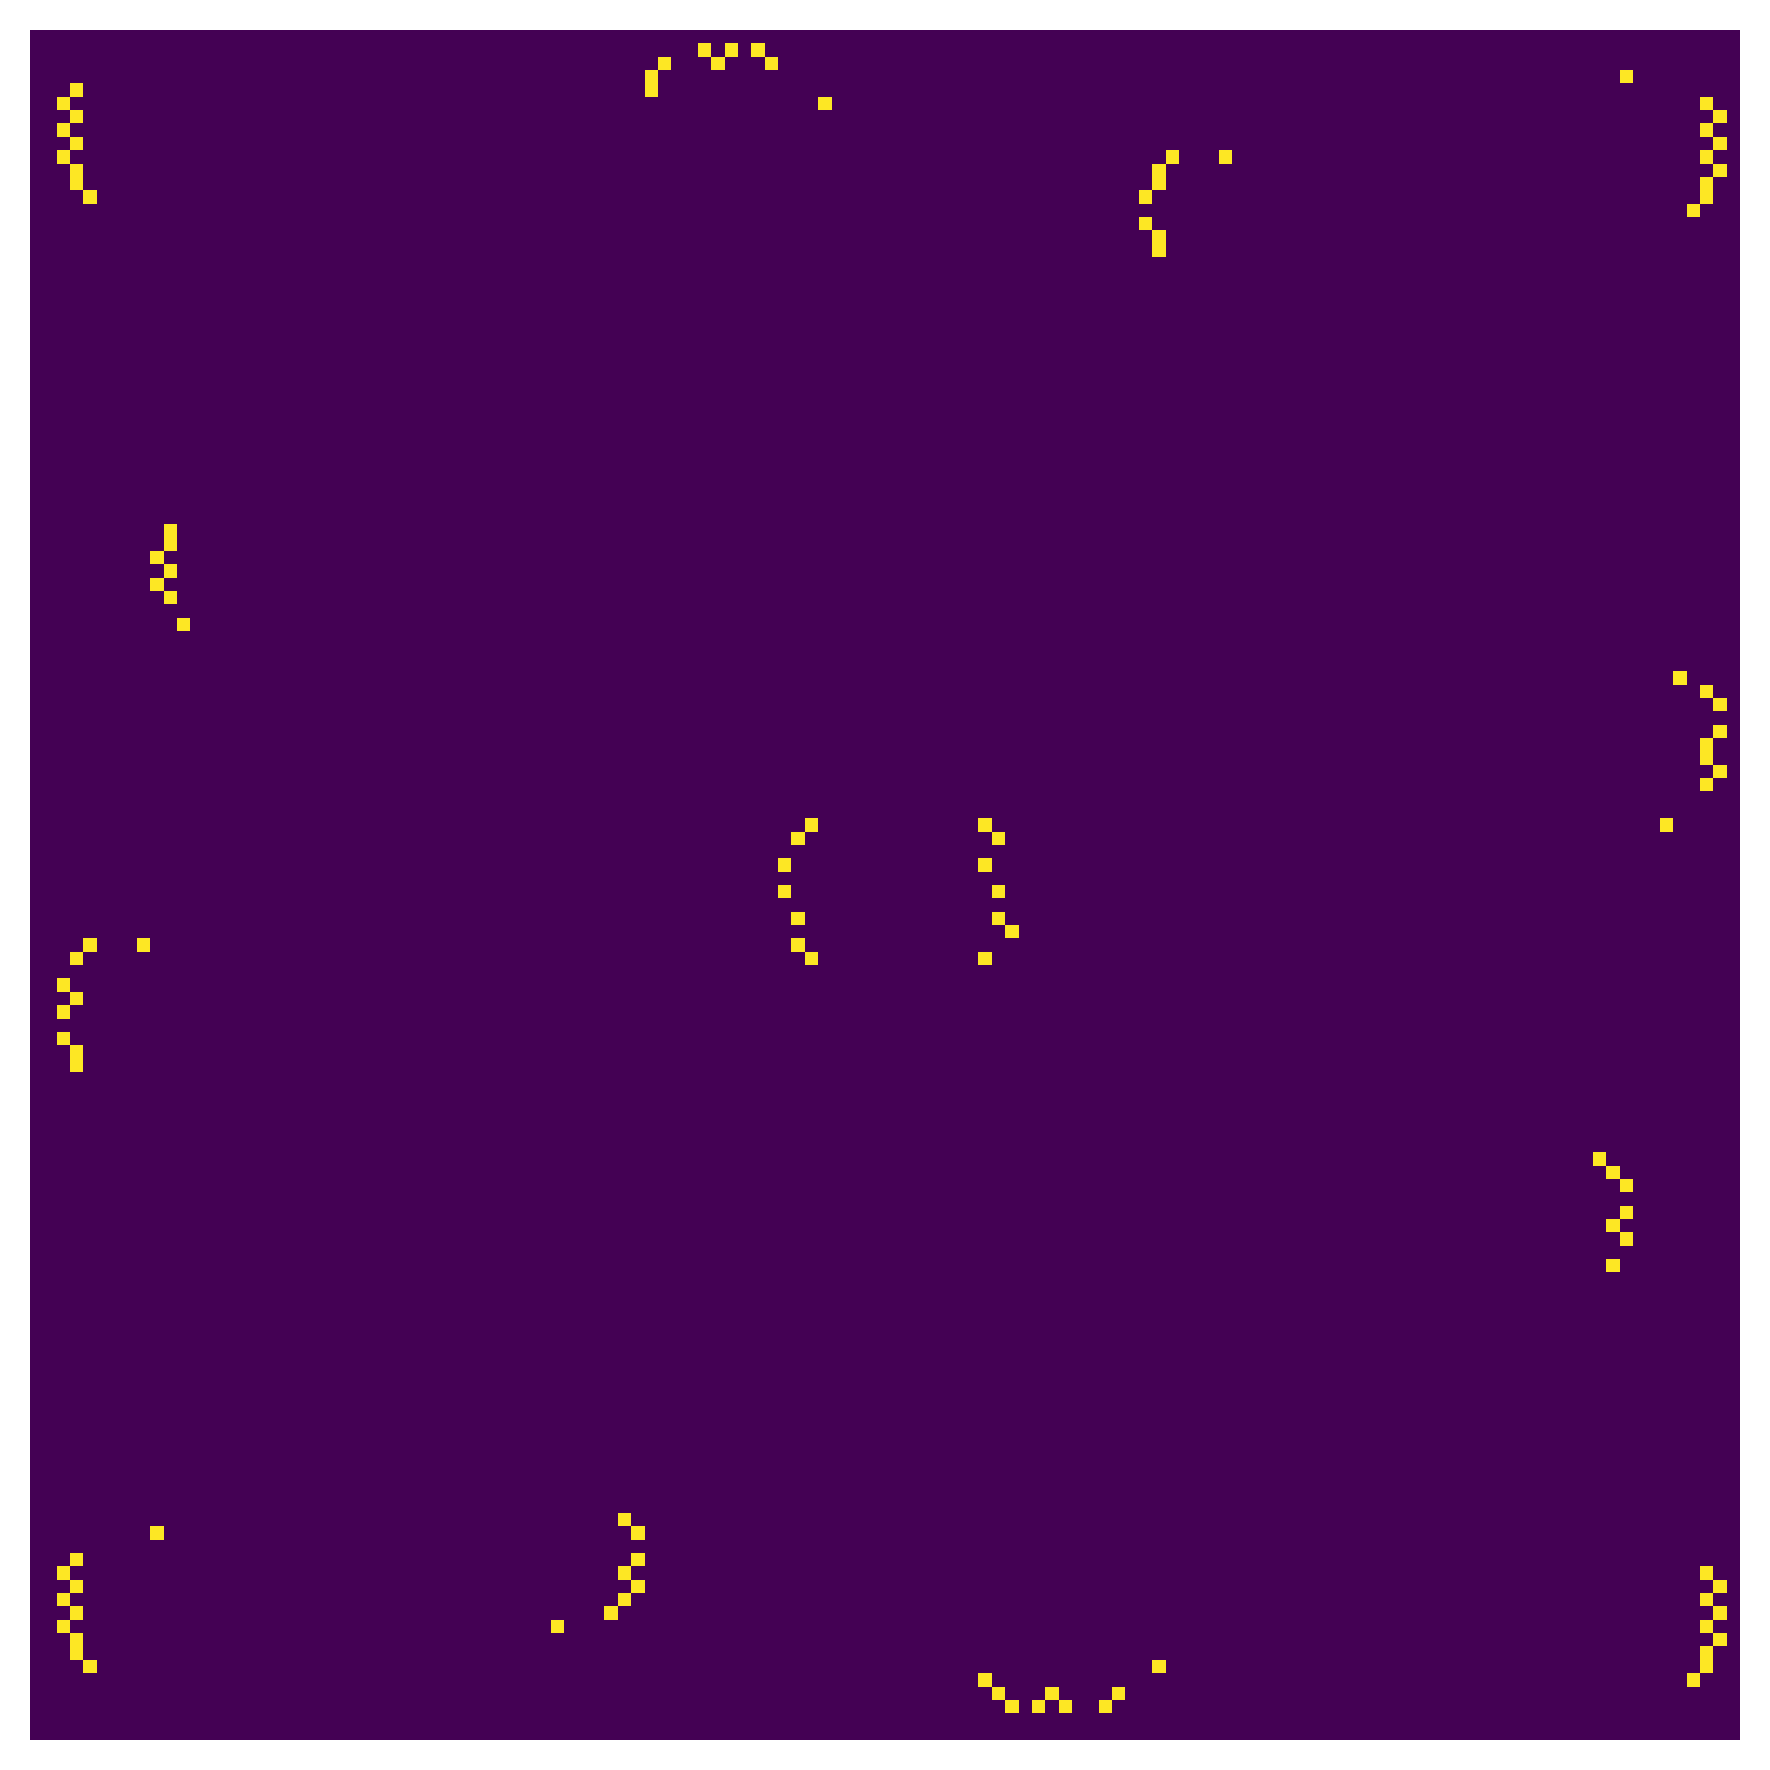

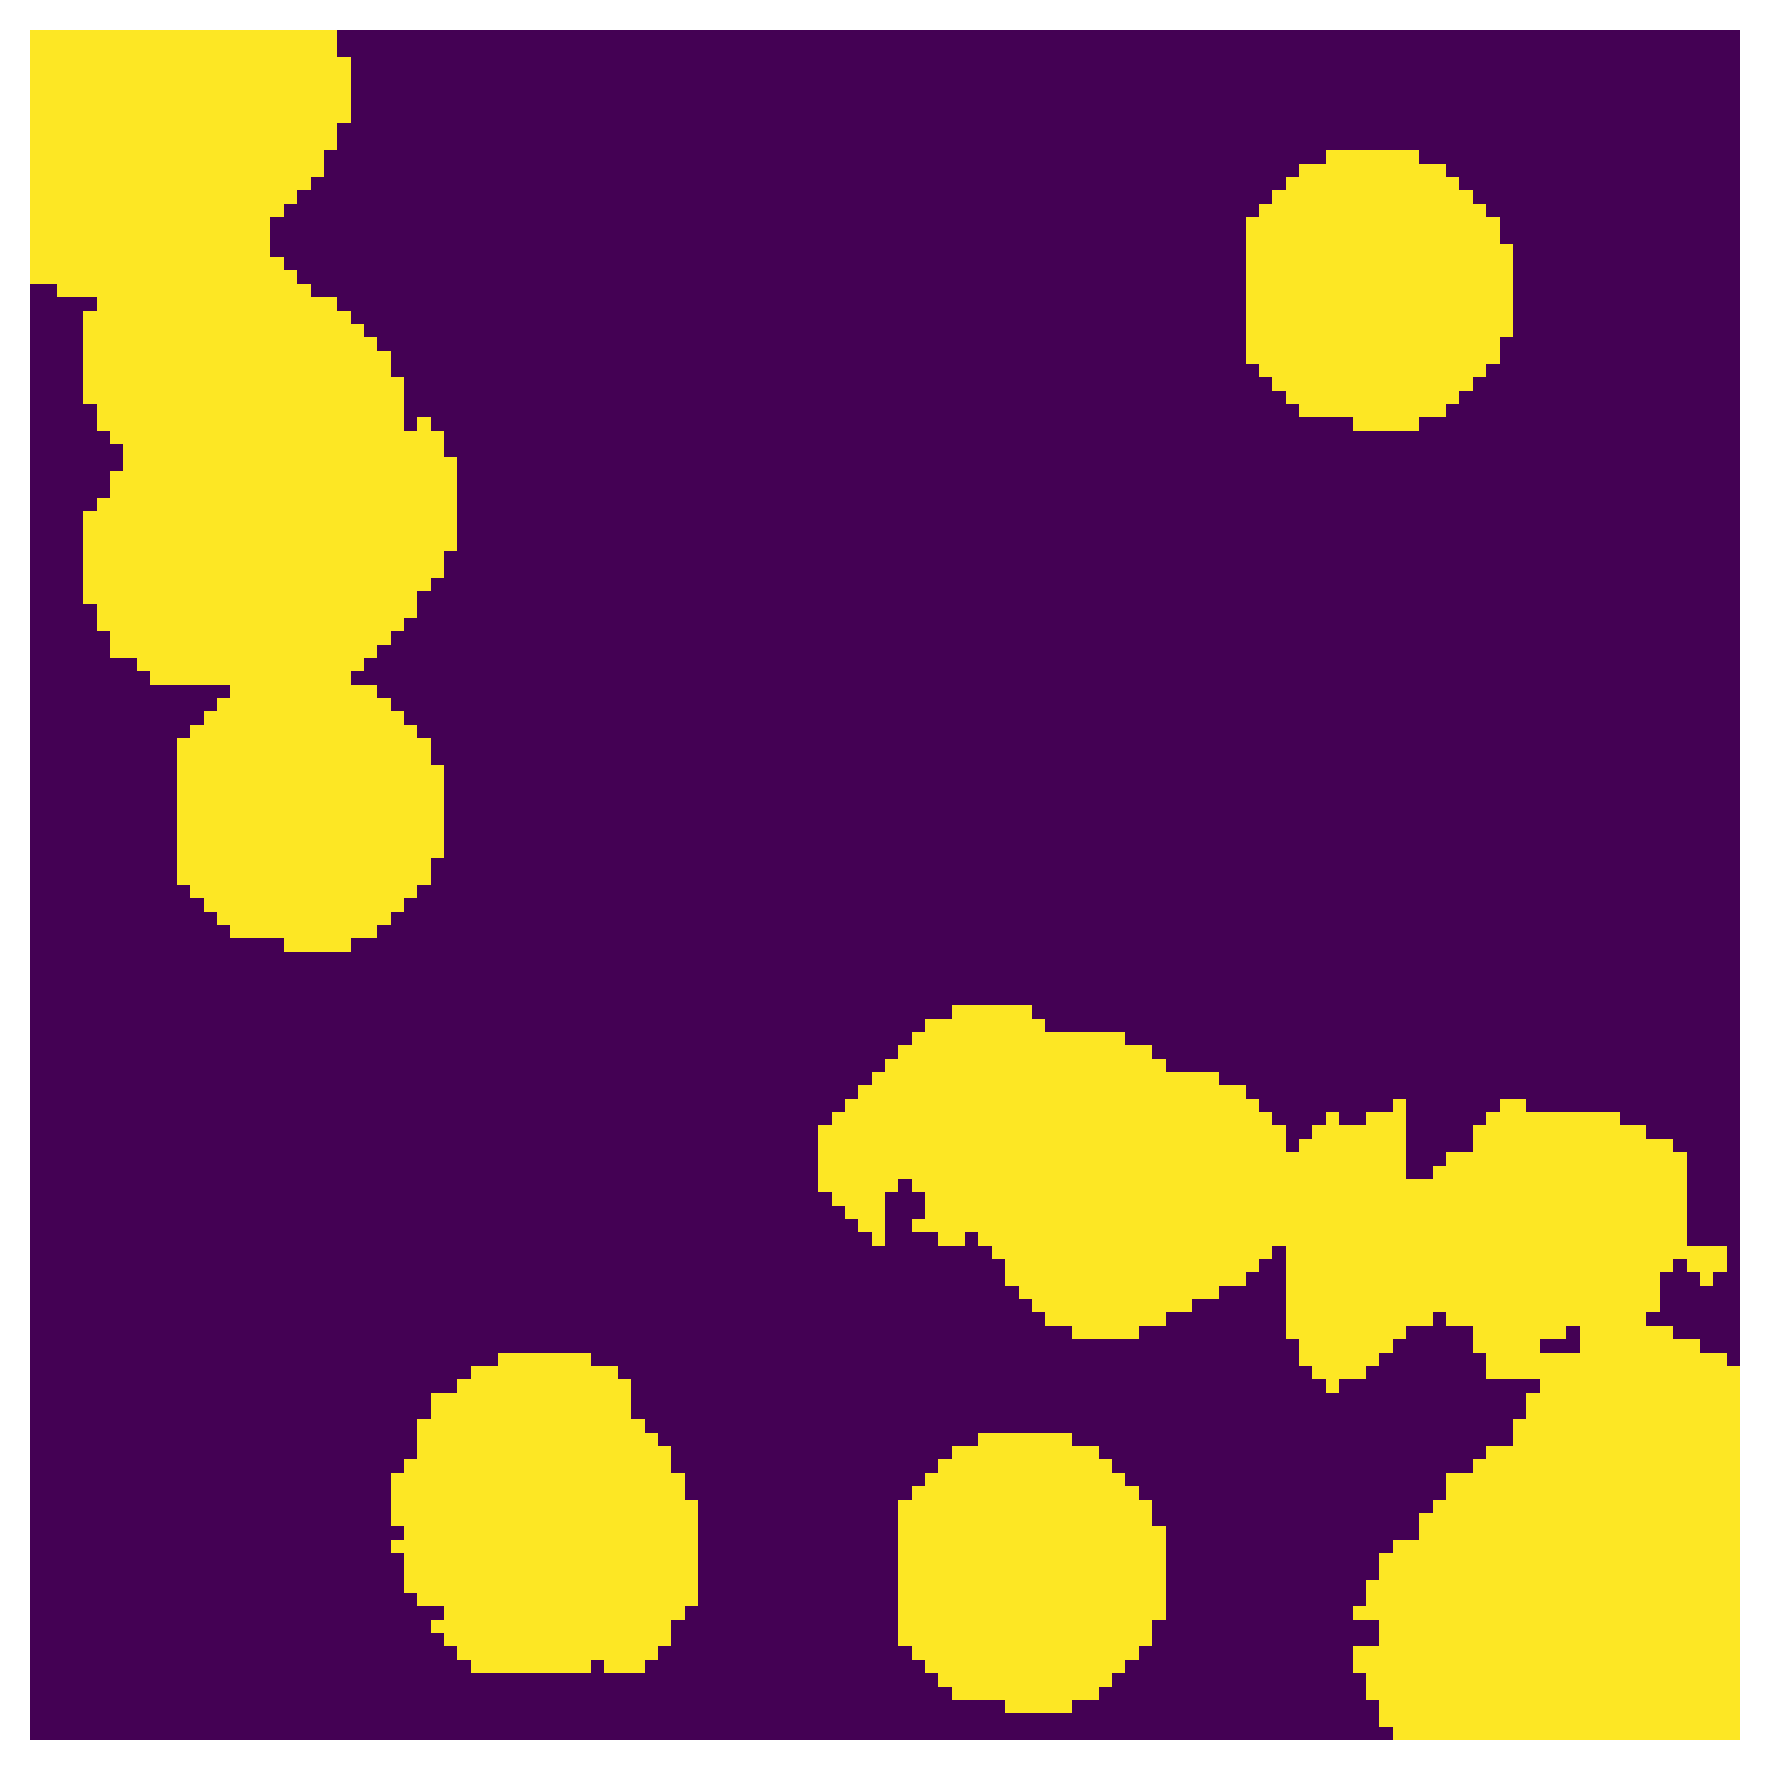

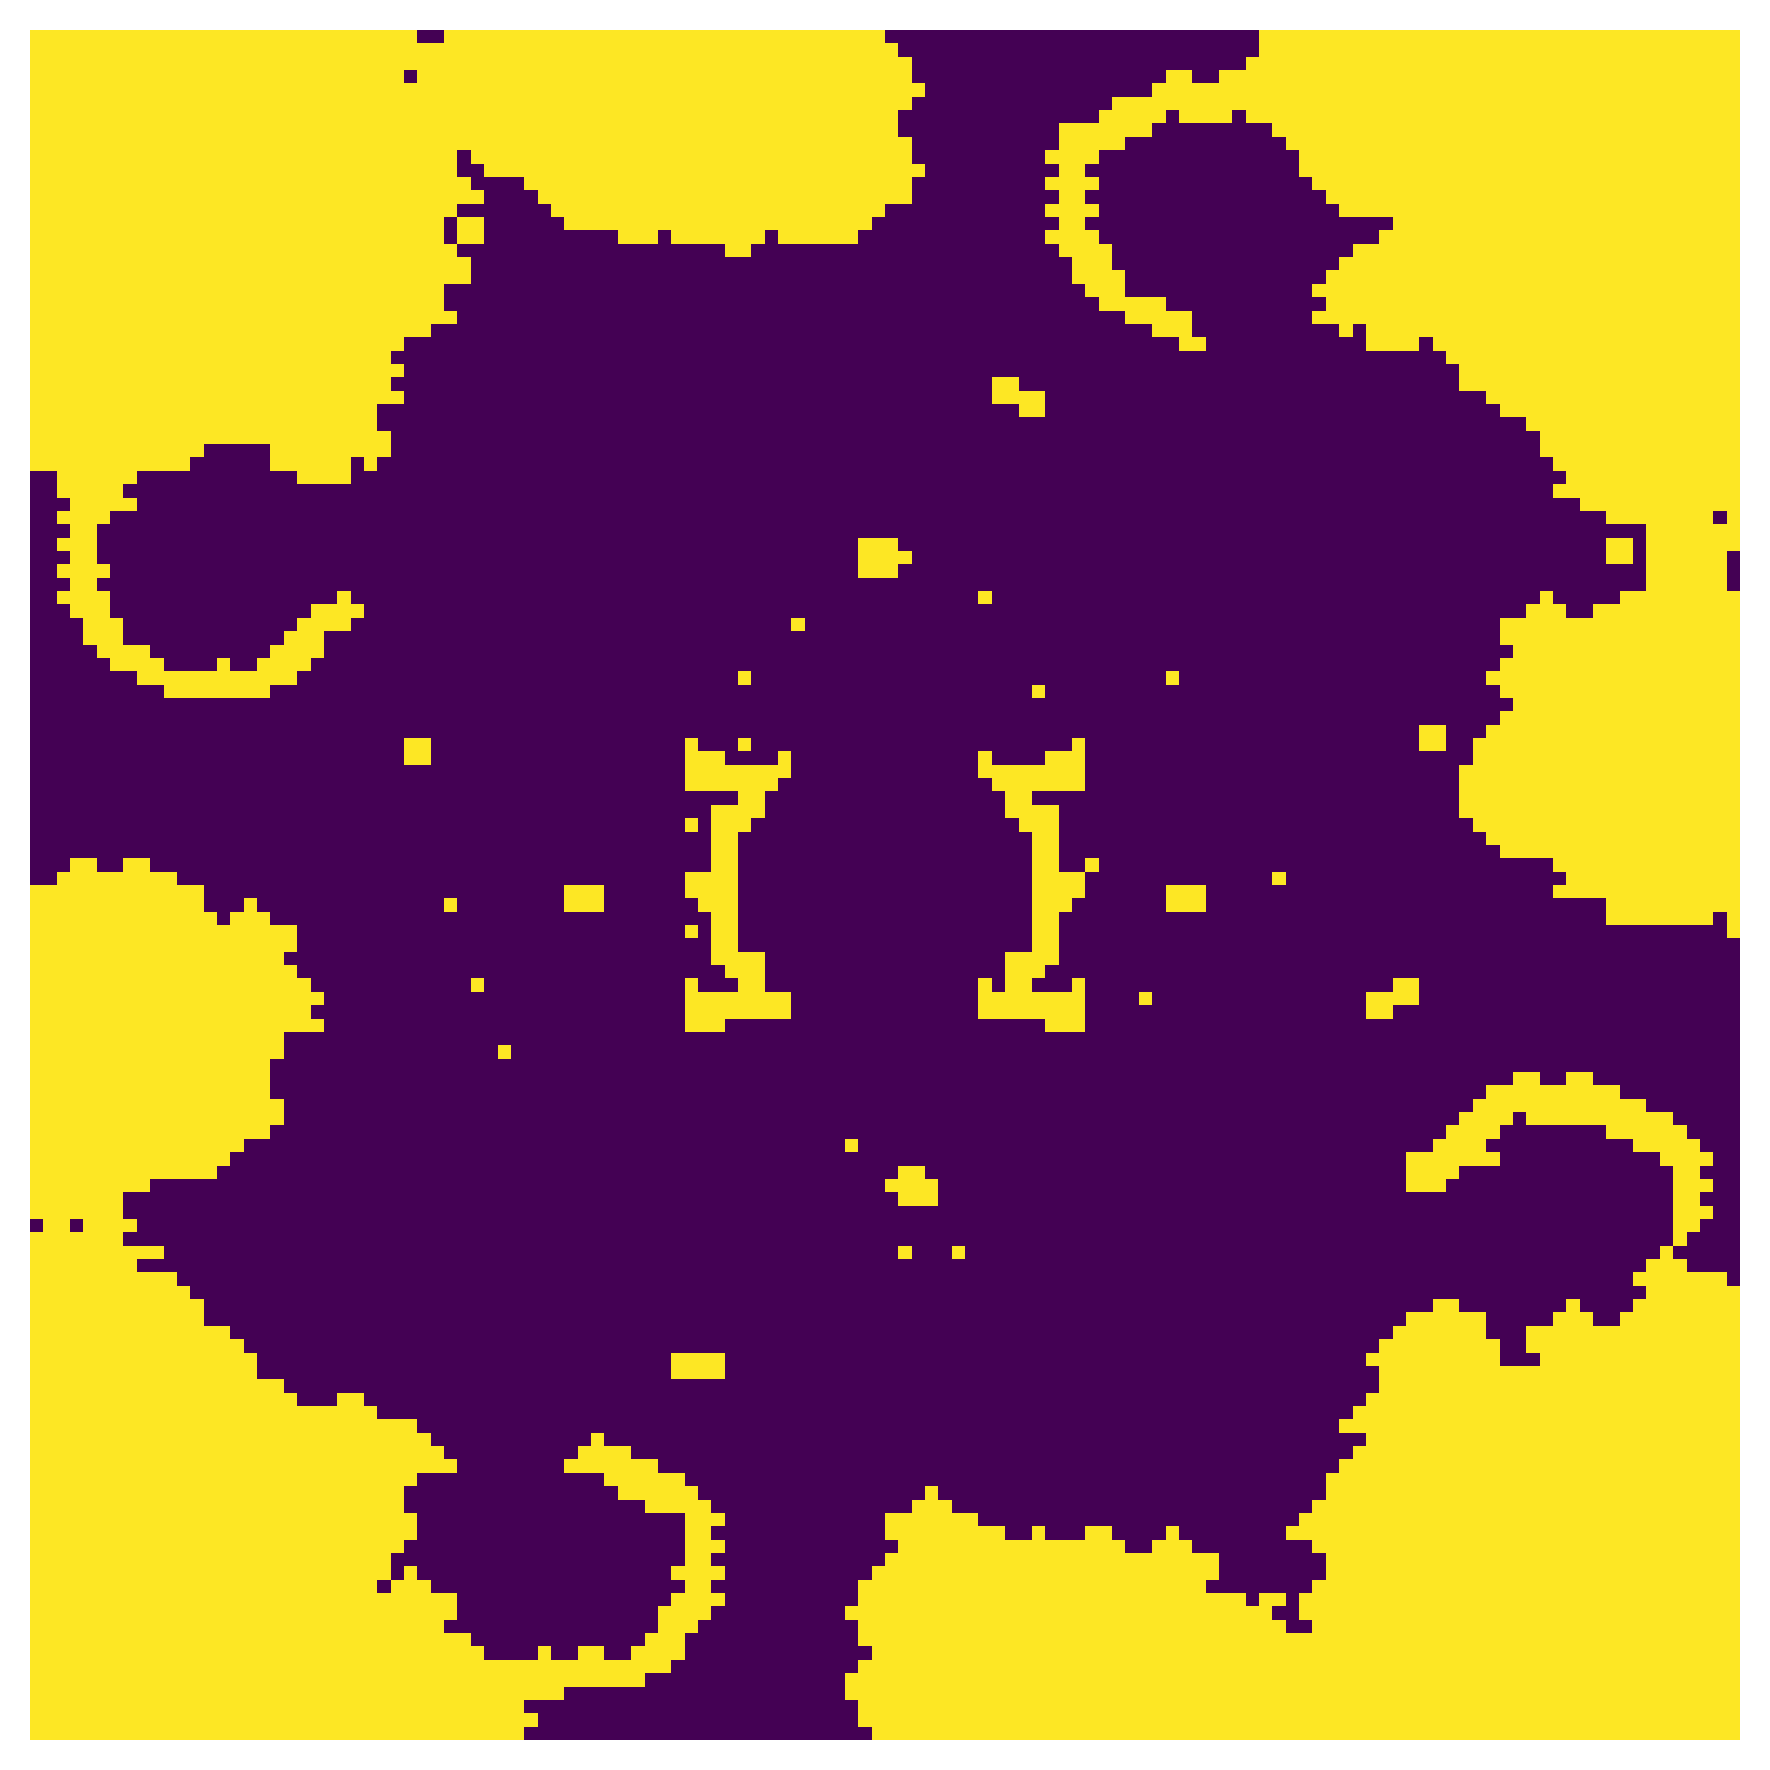

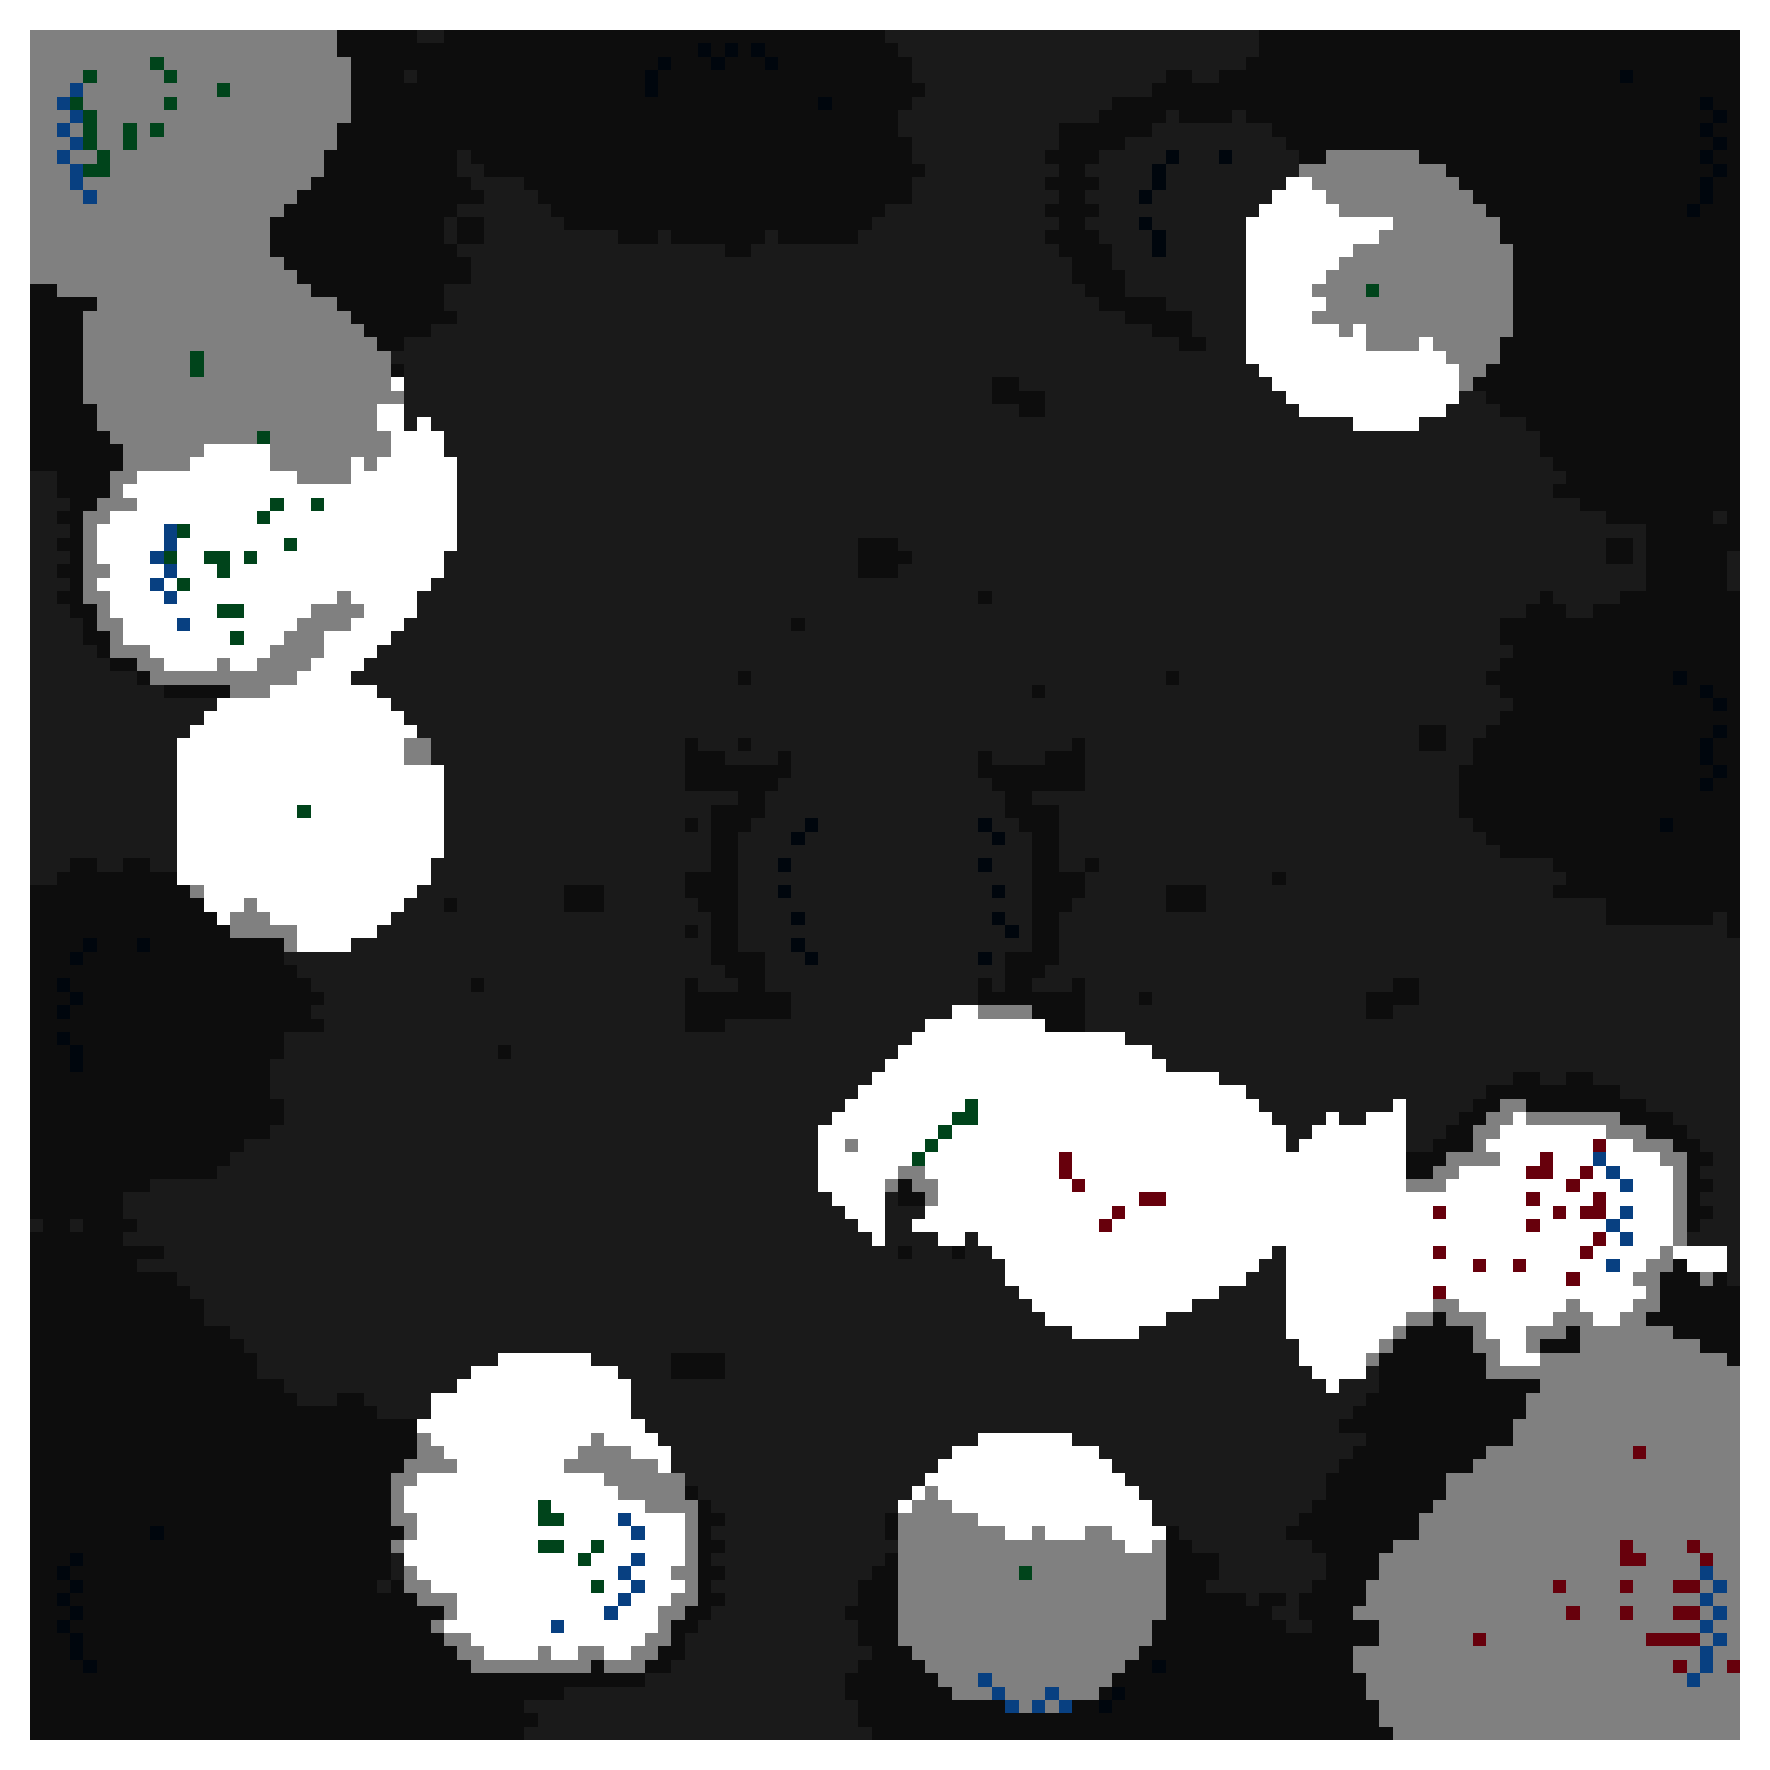

438.rep - 7346


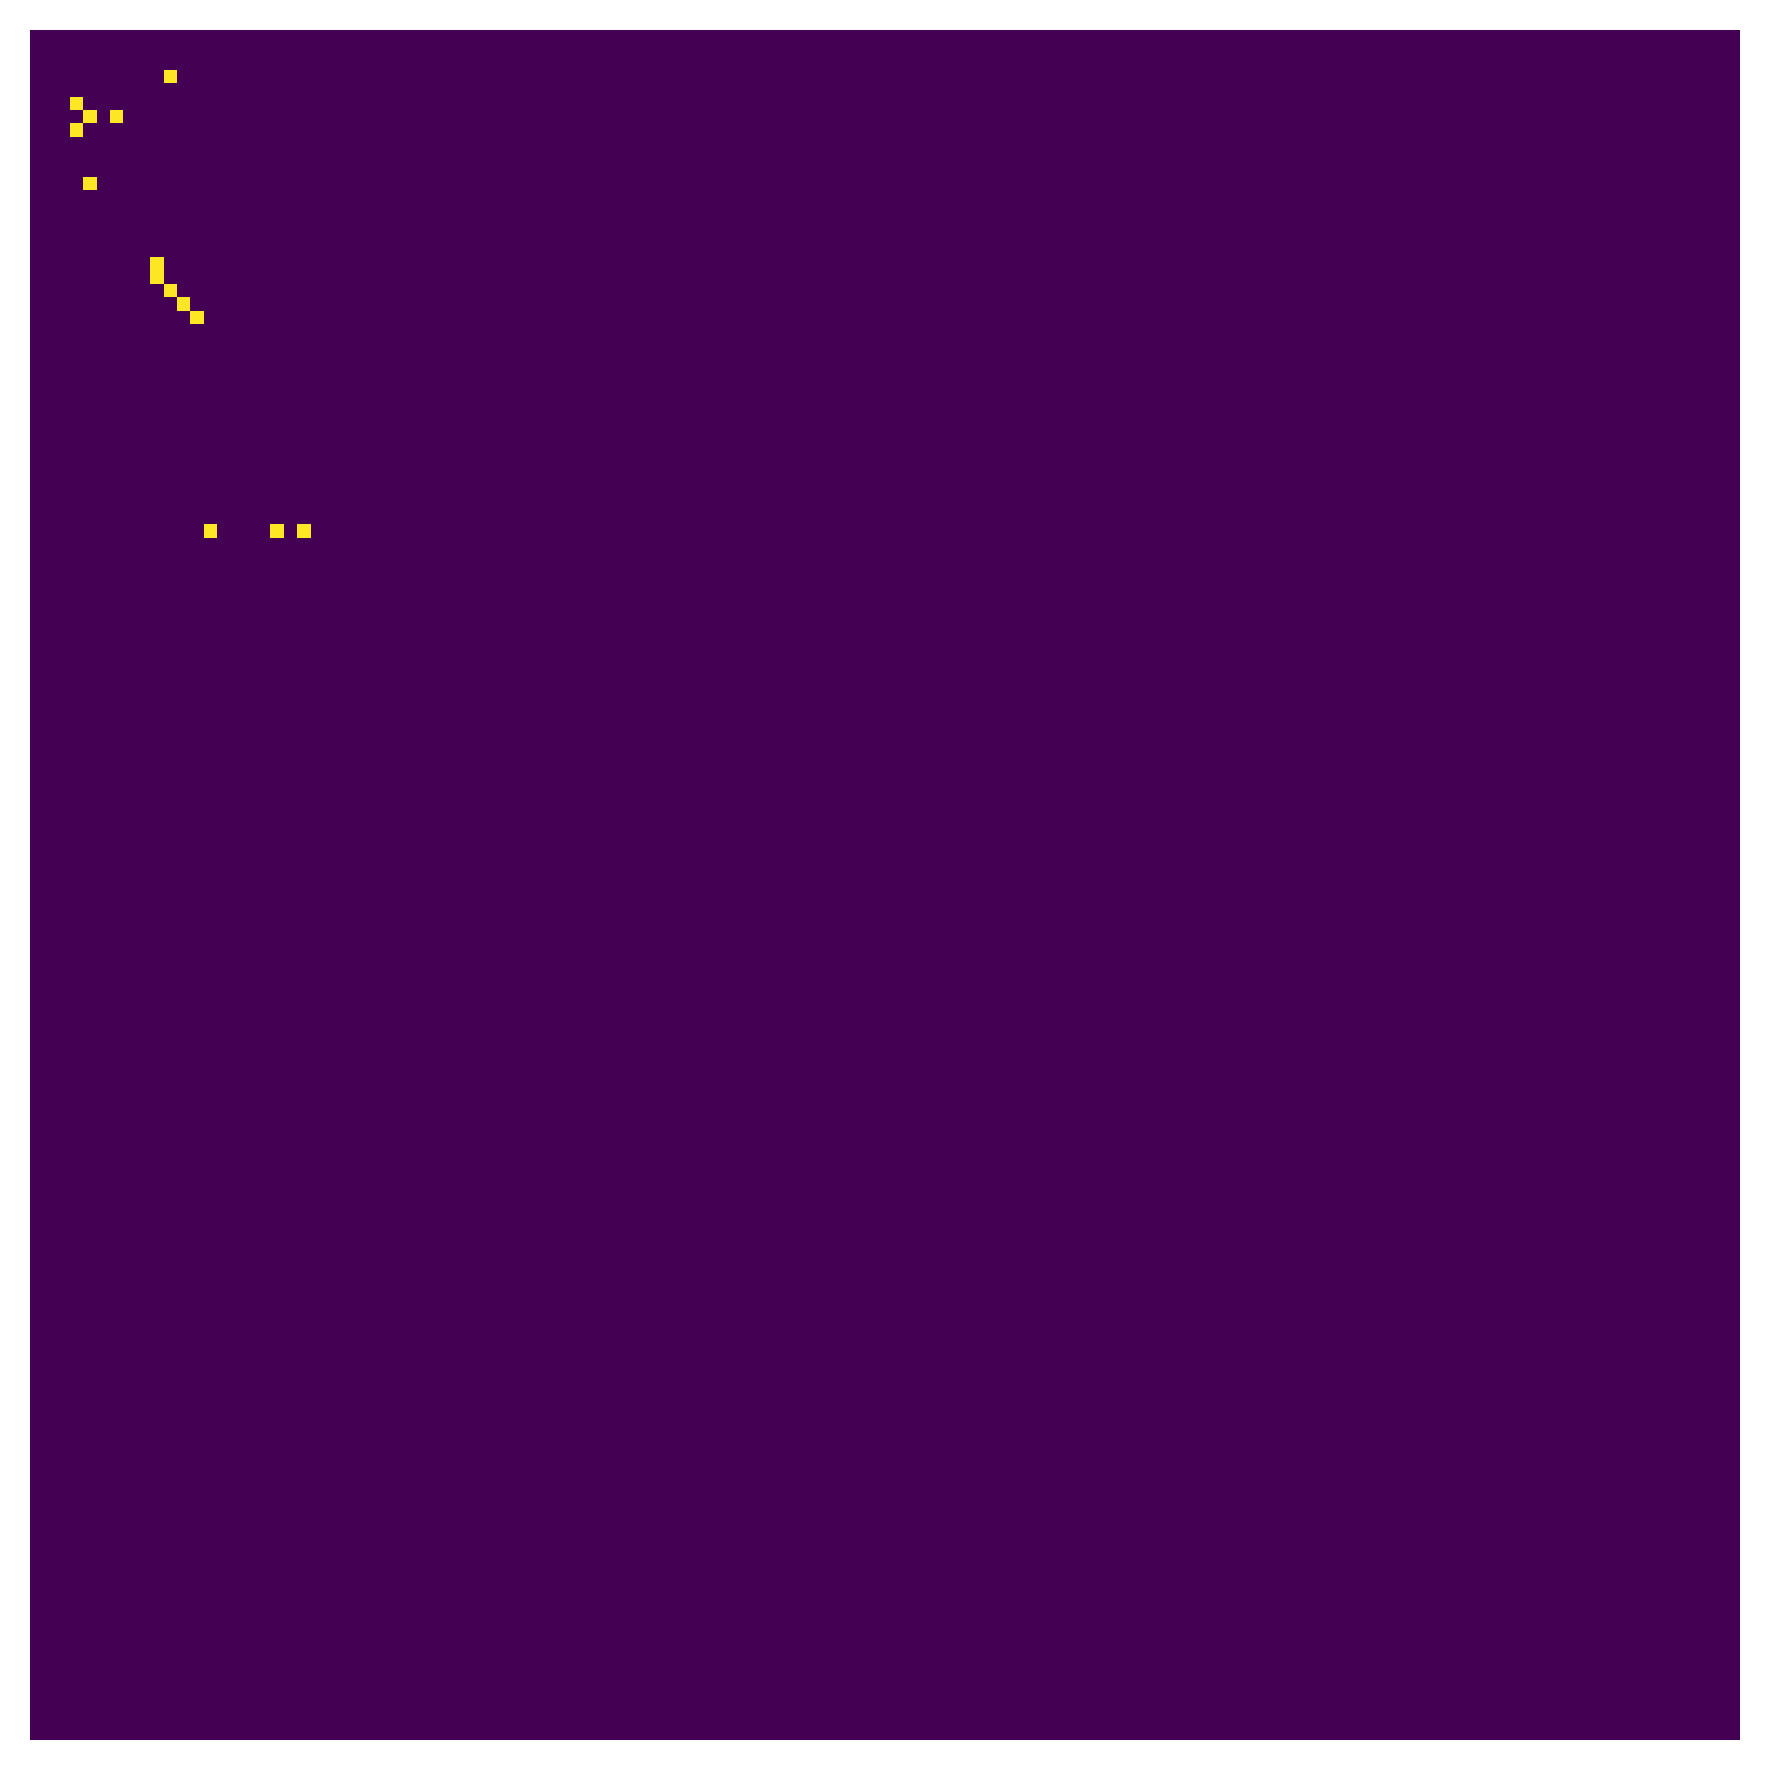

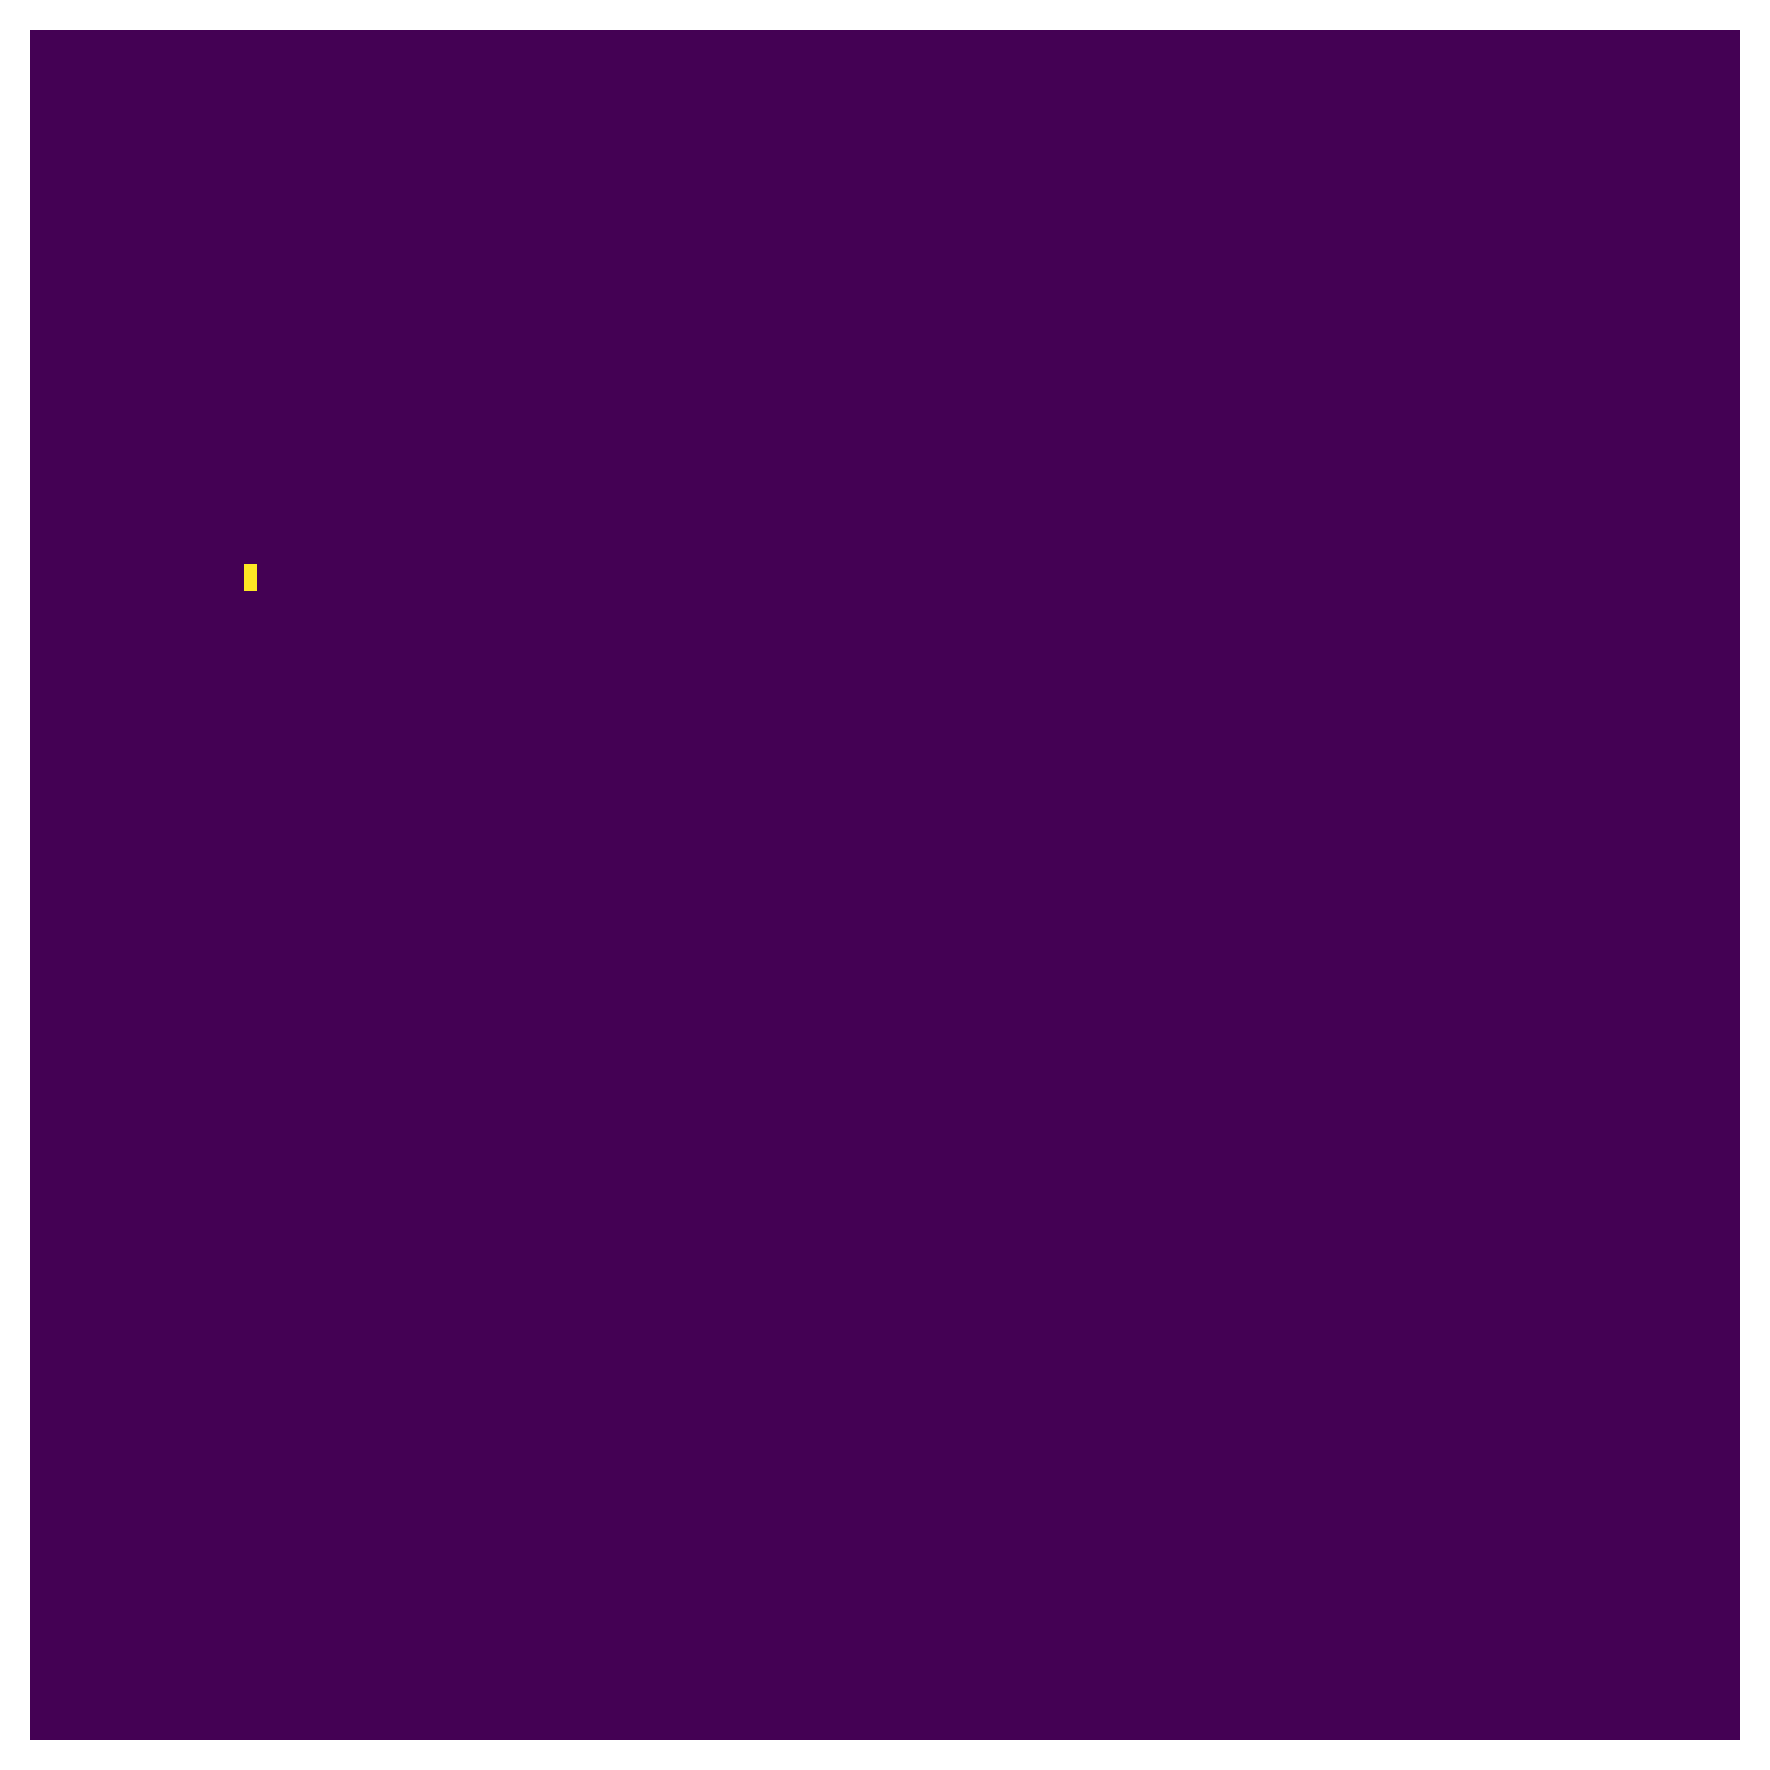

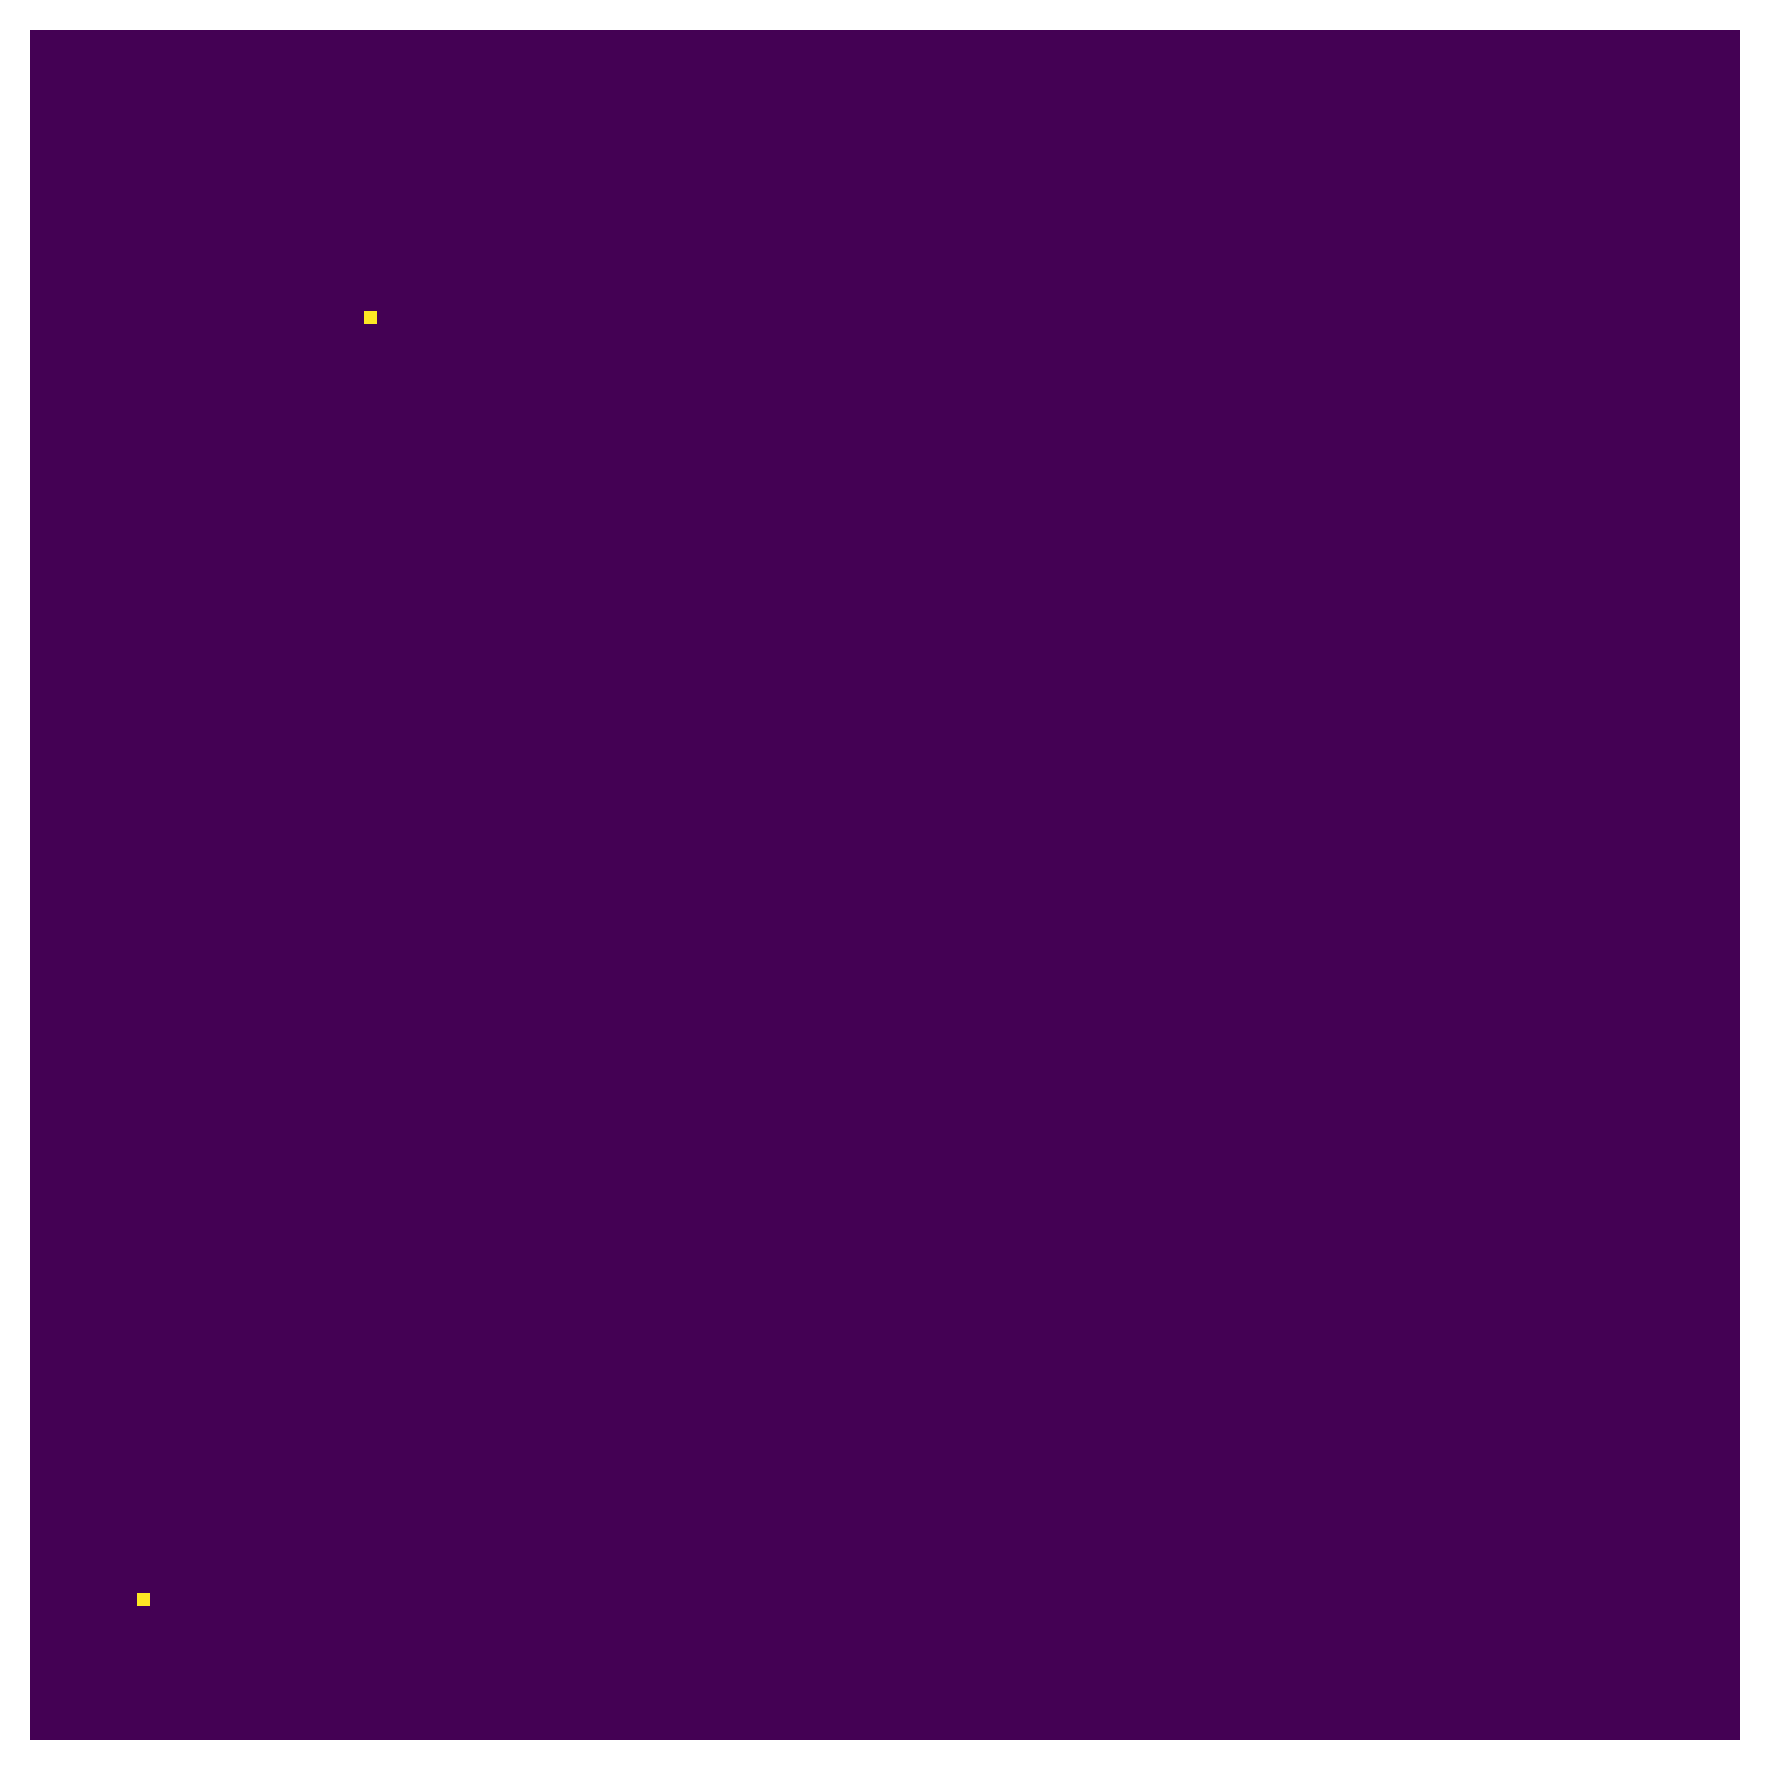

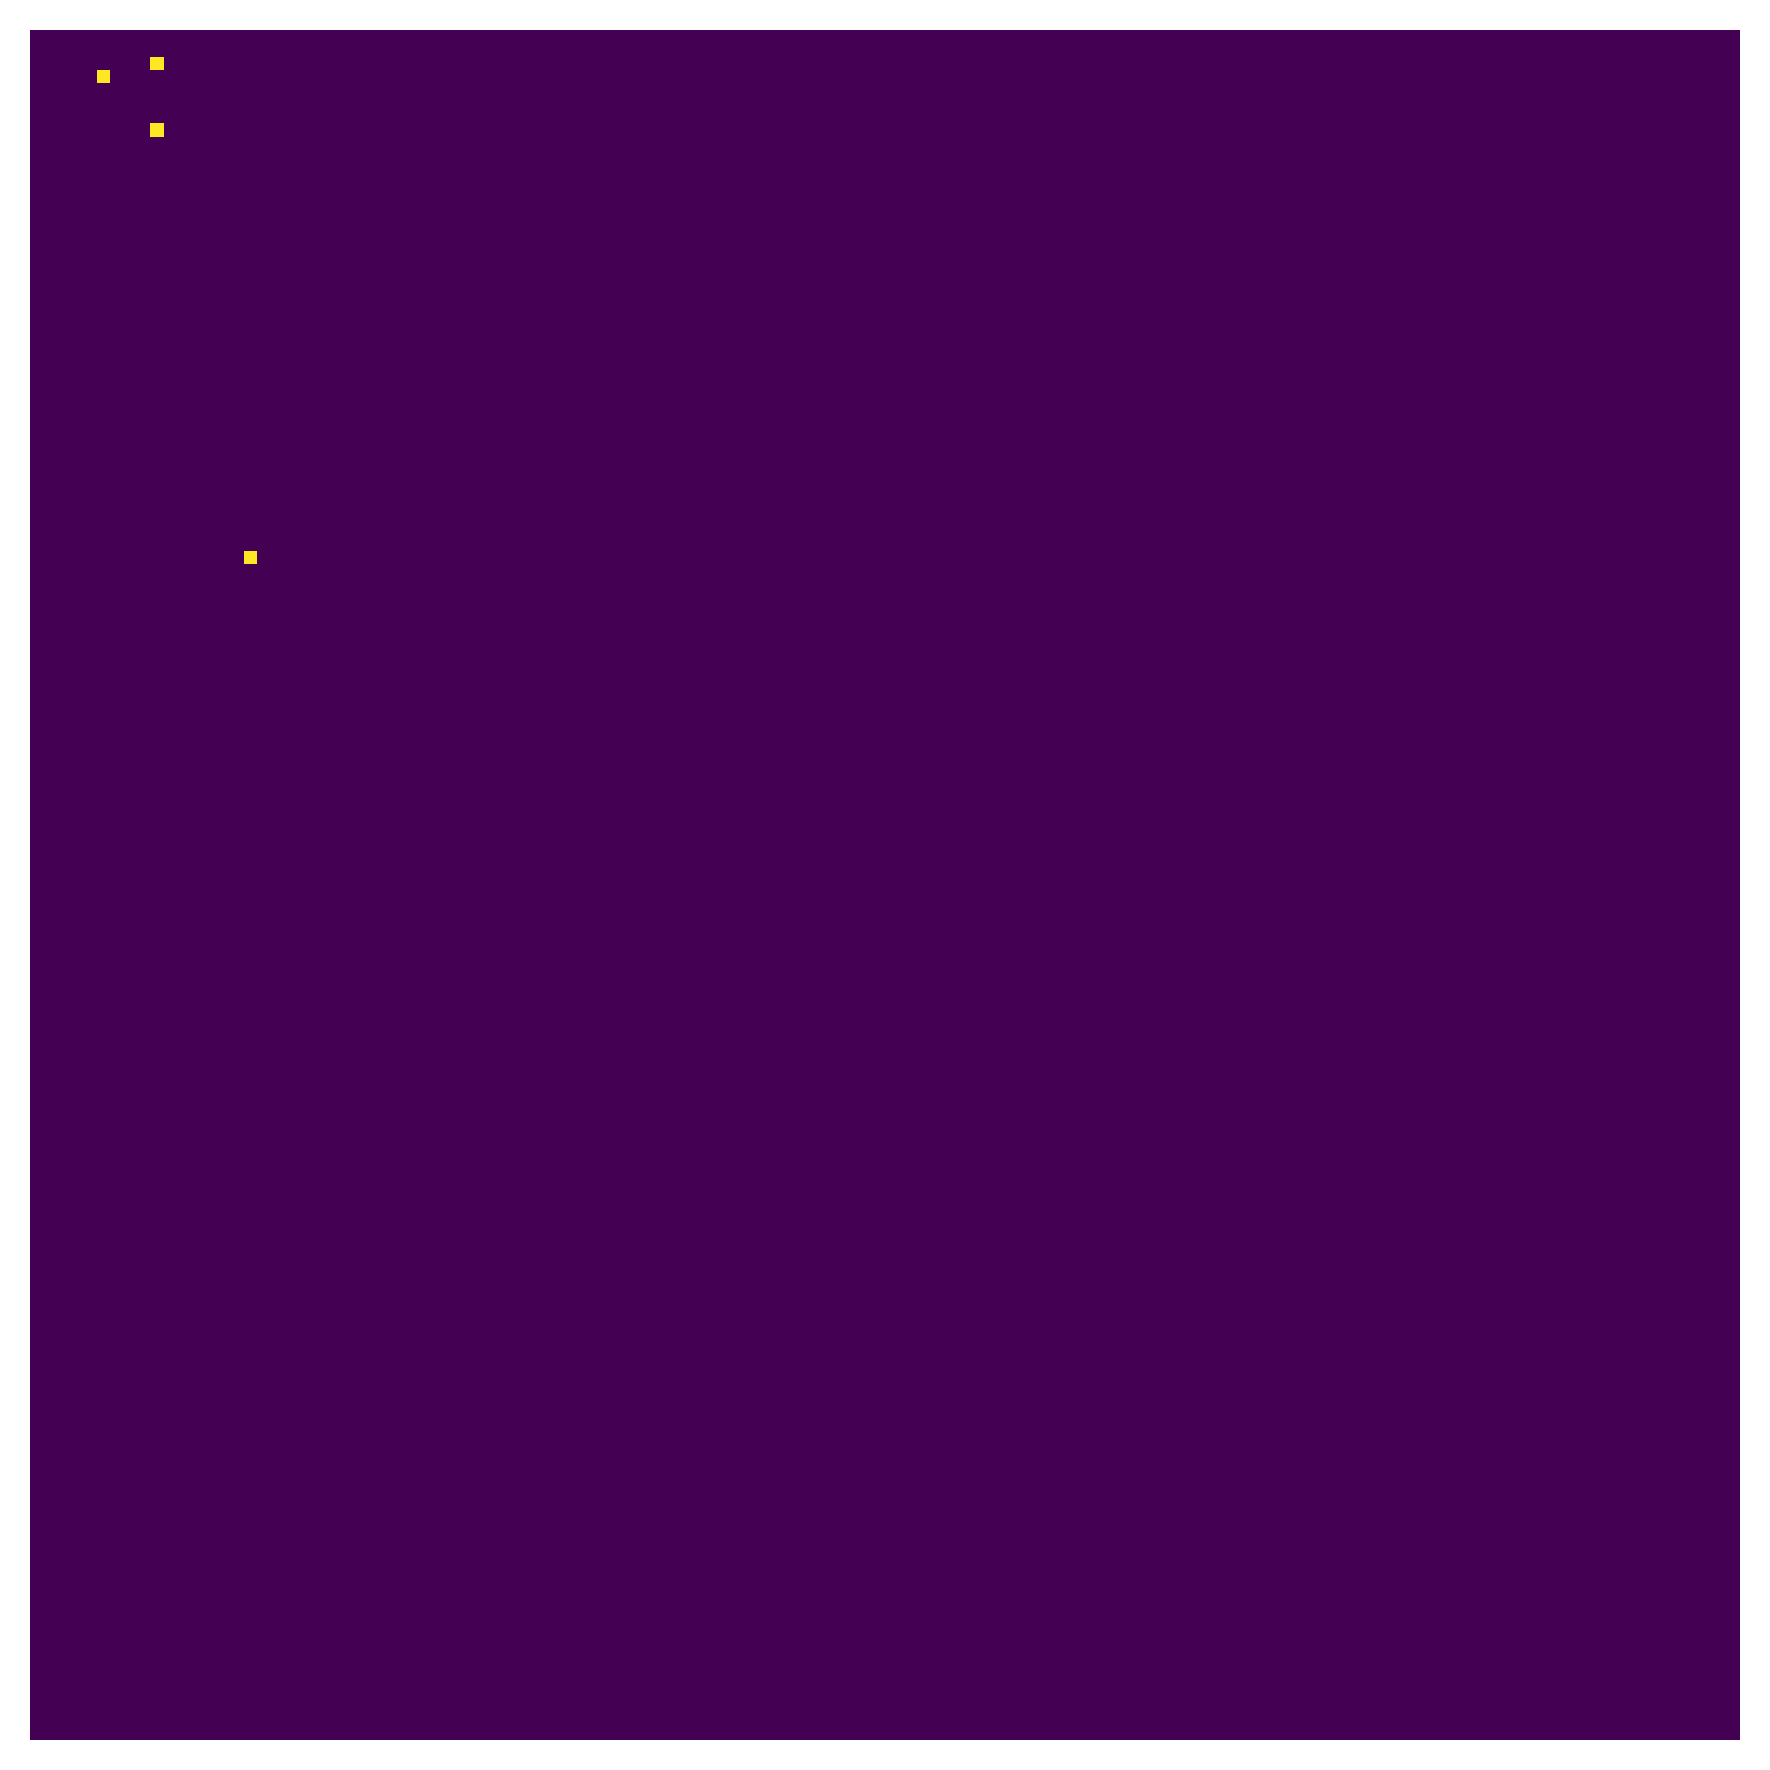

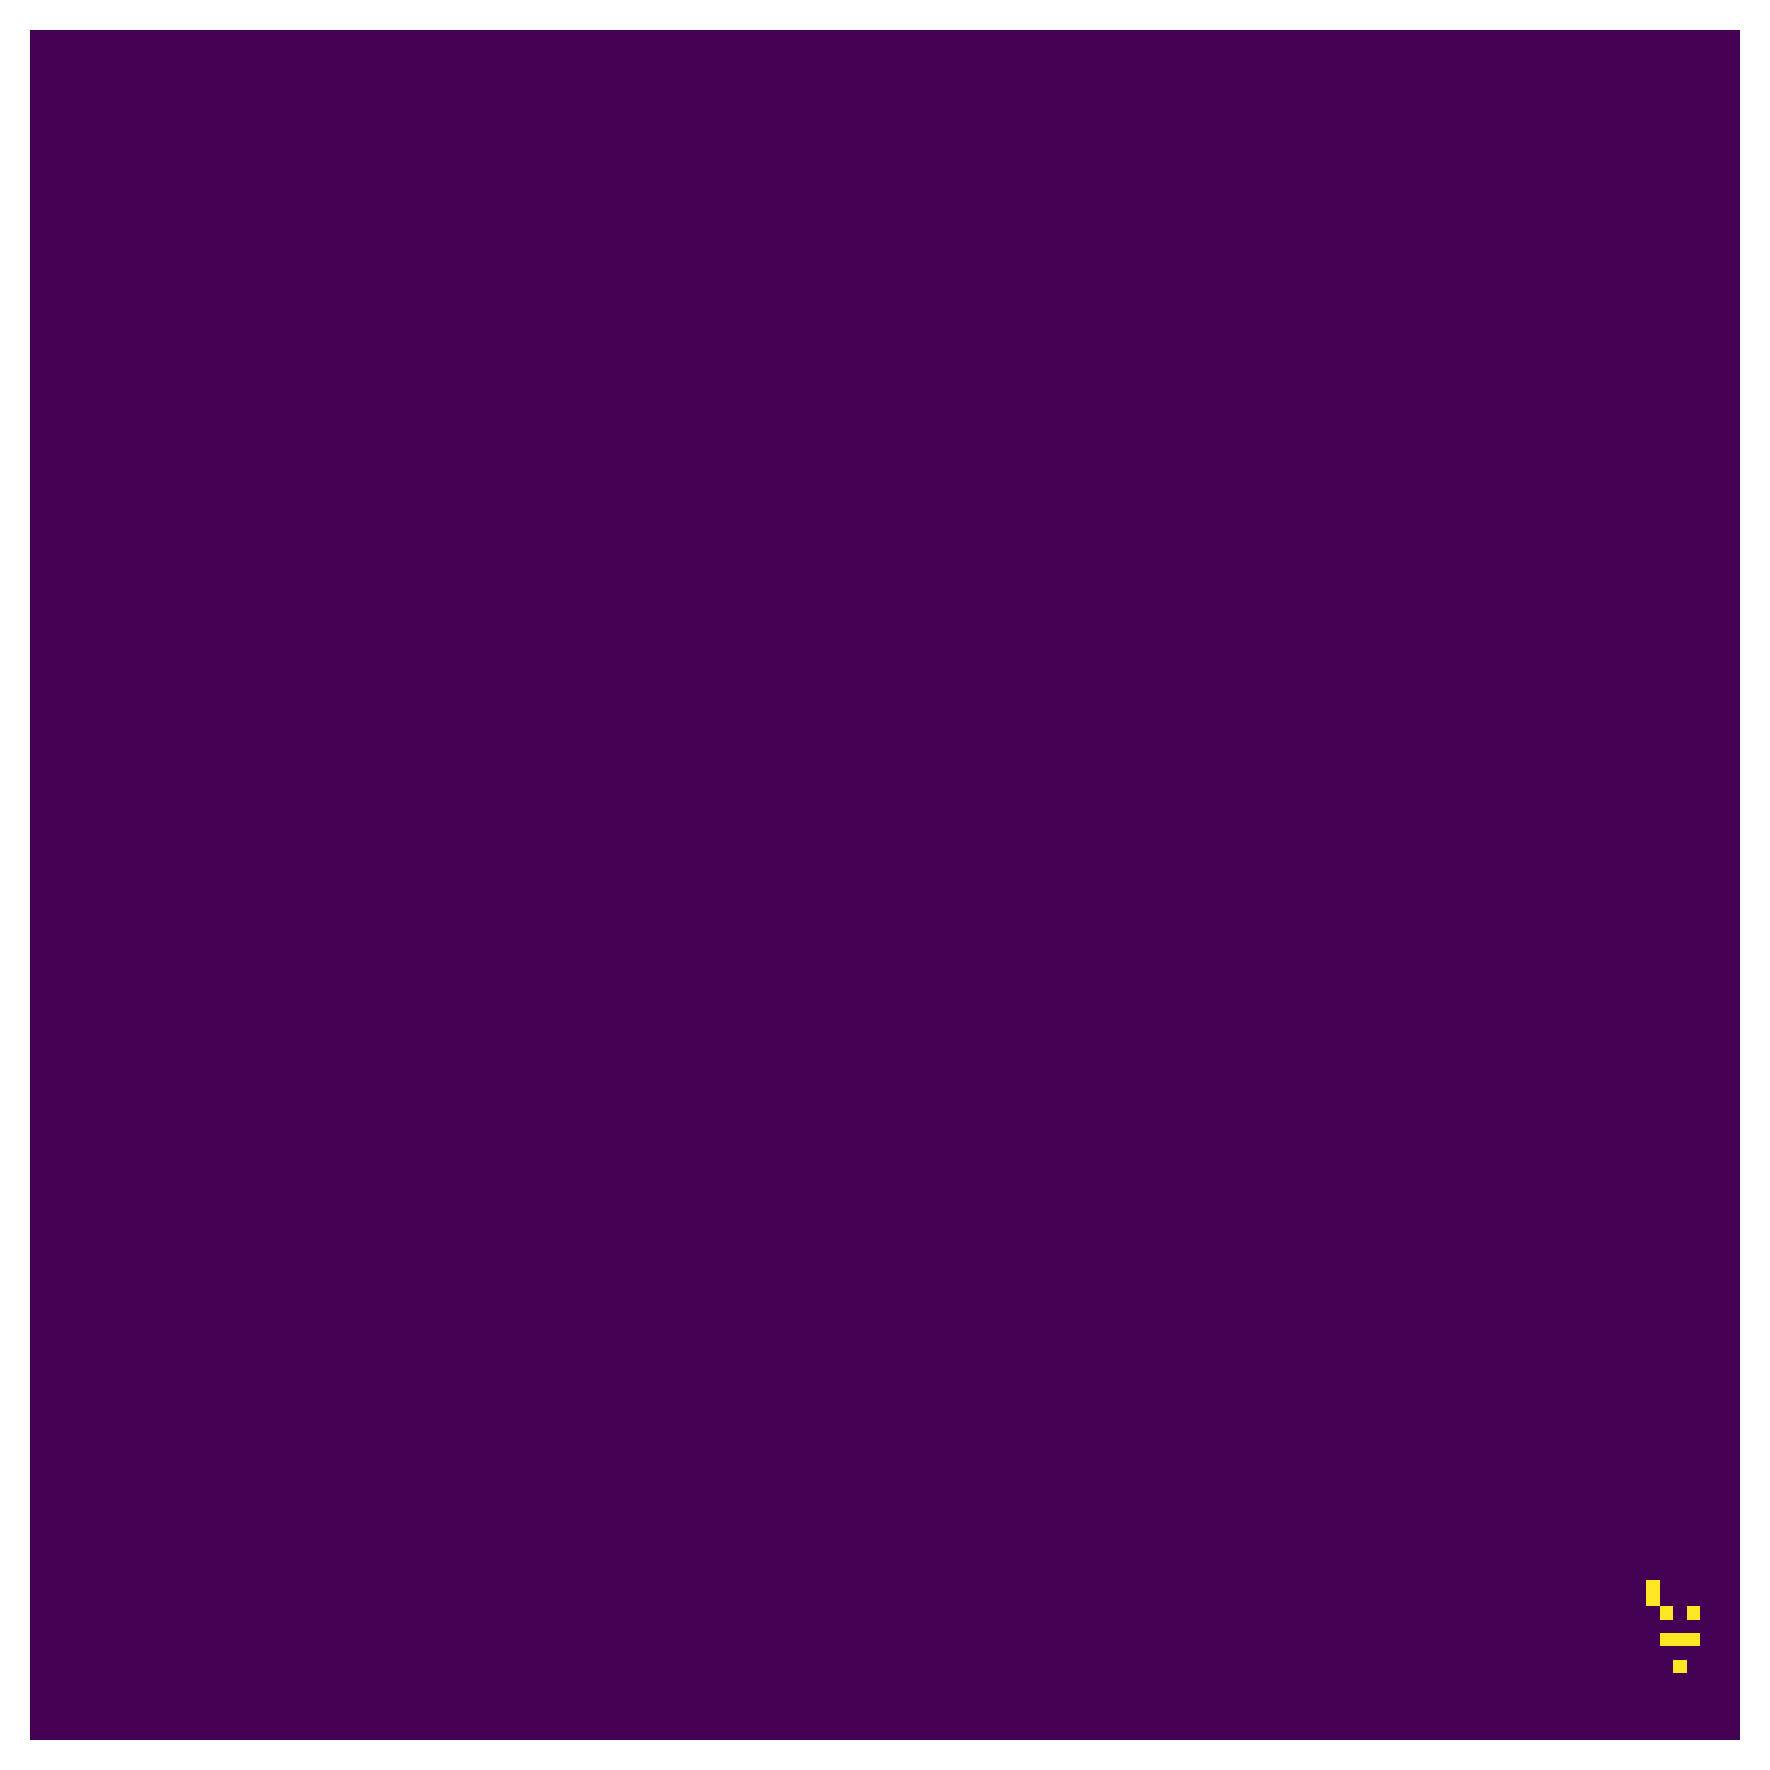

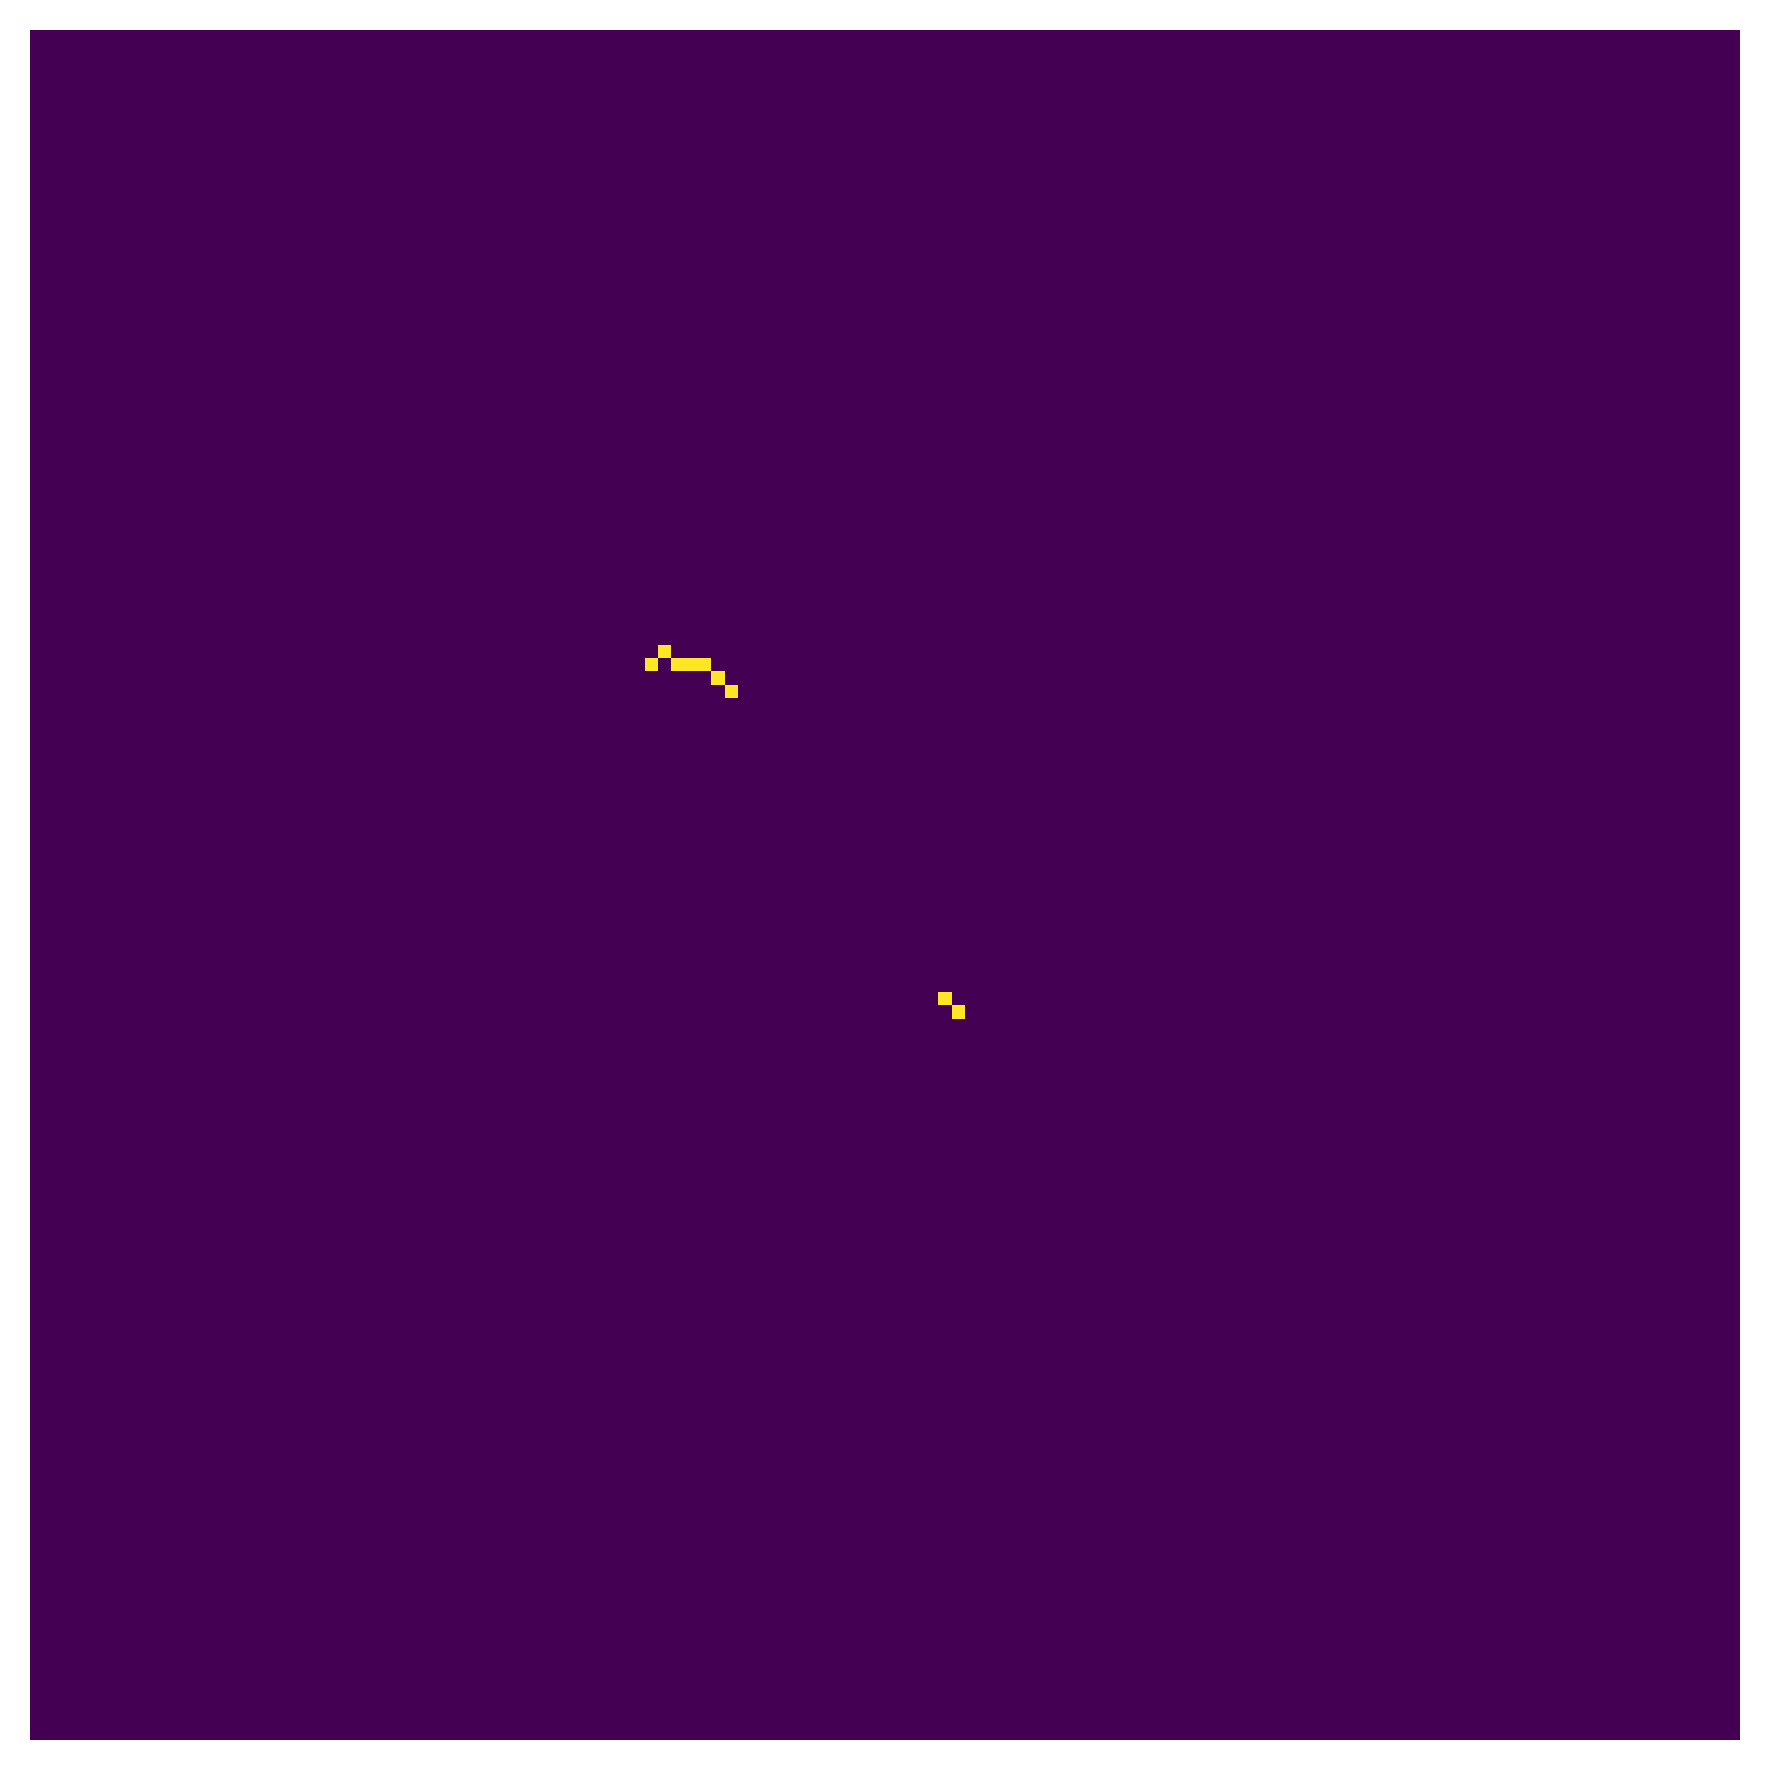

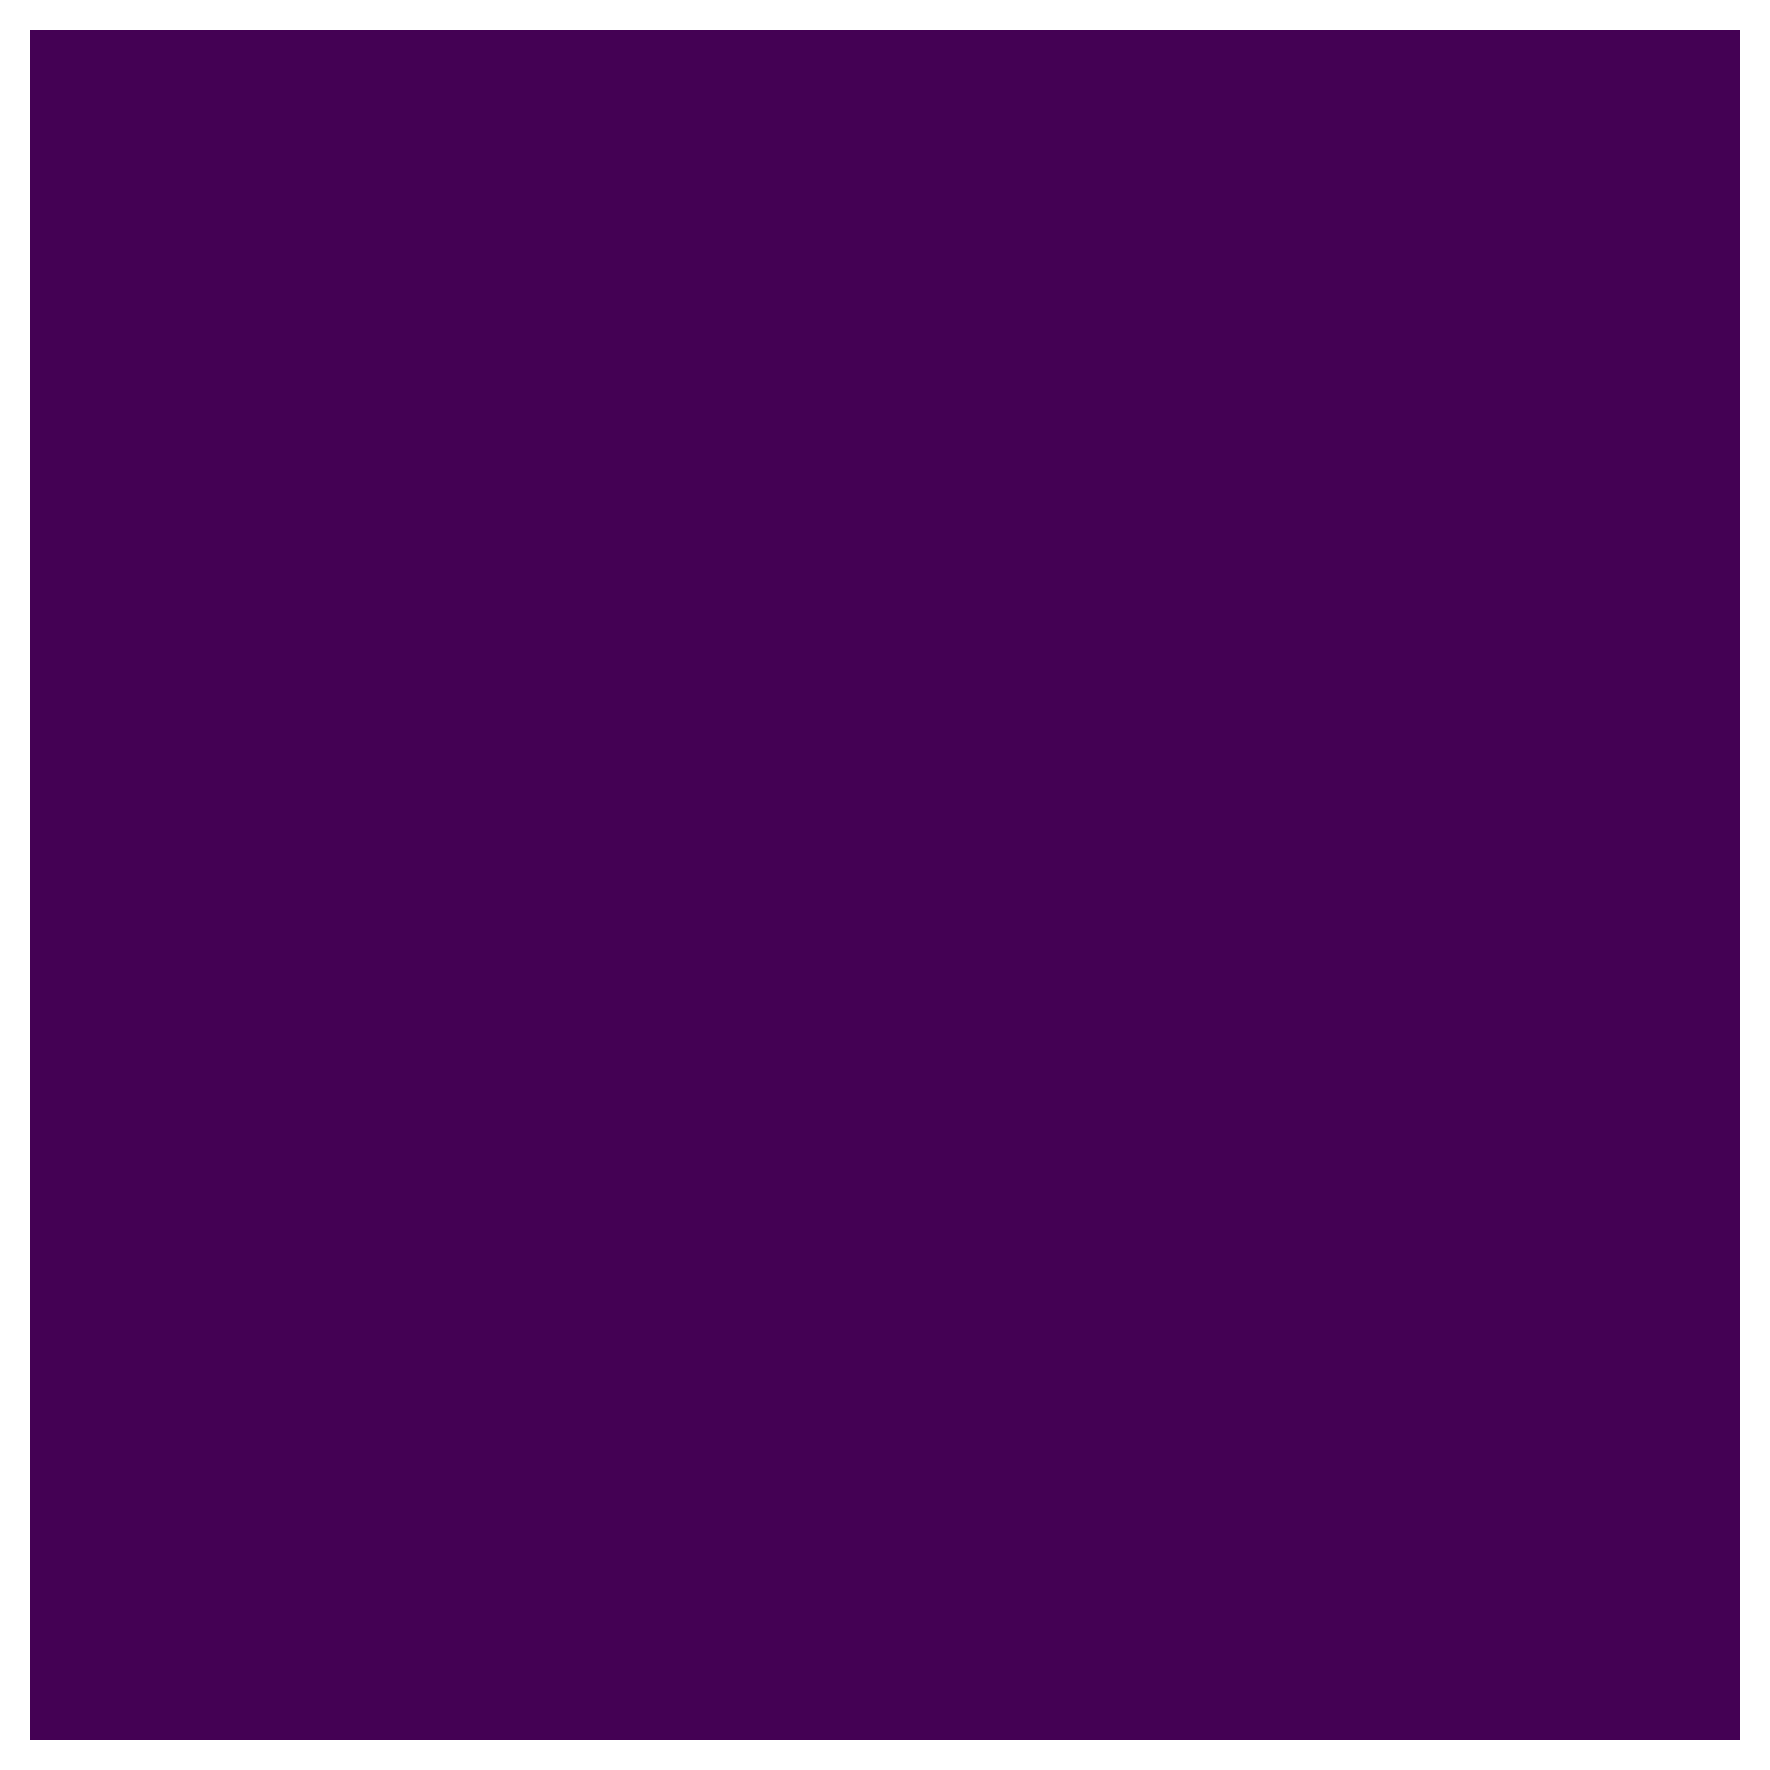

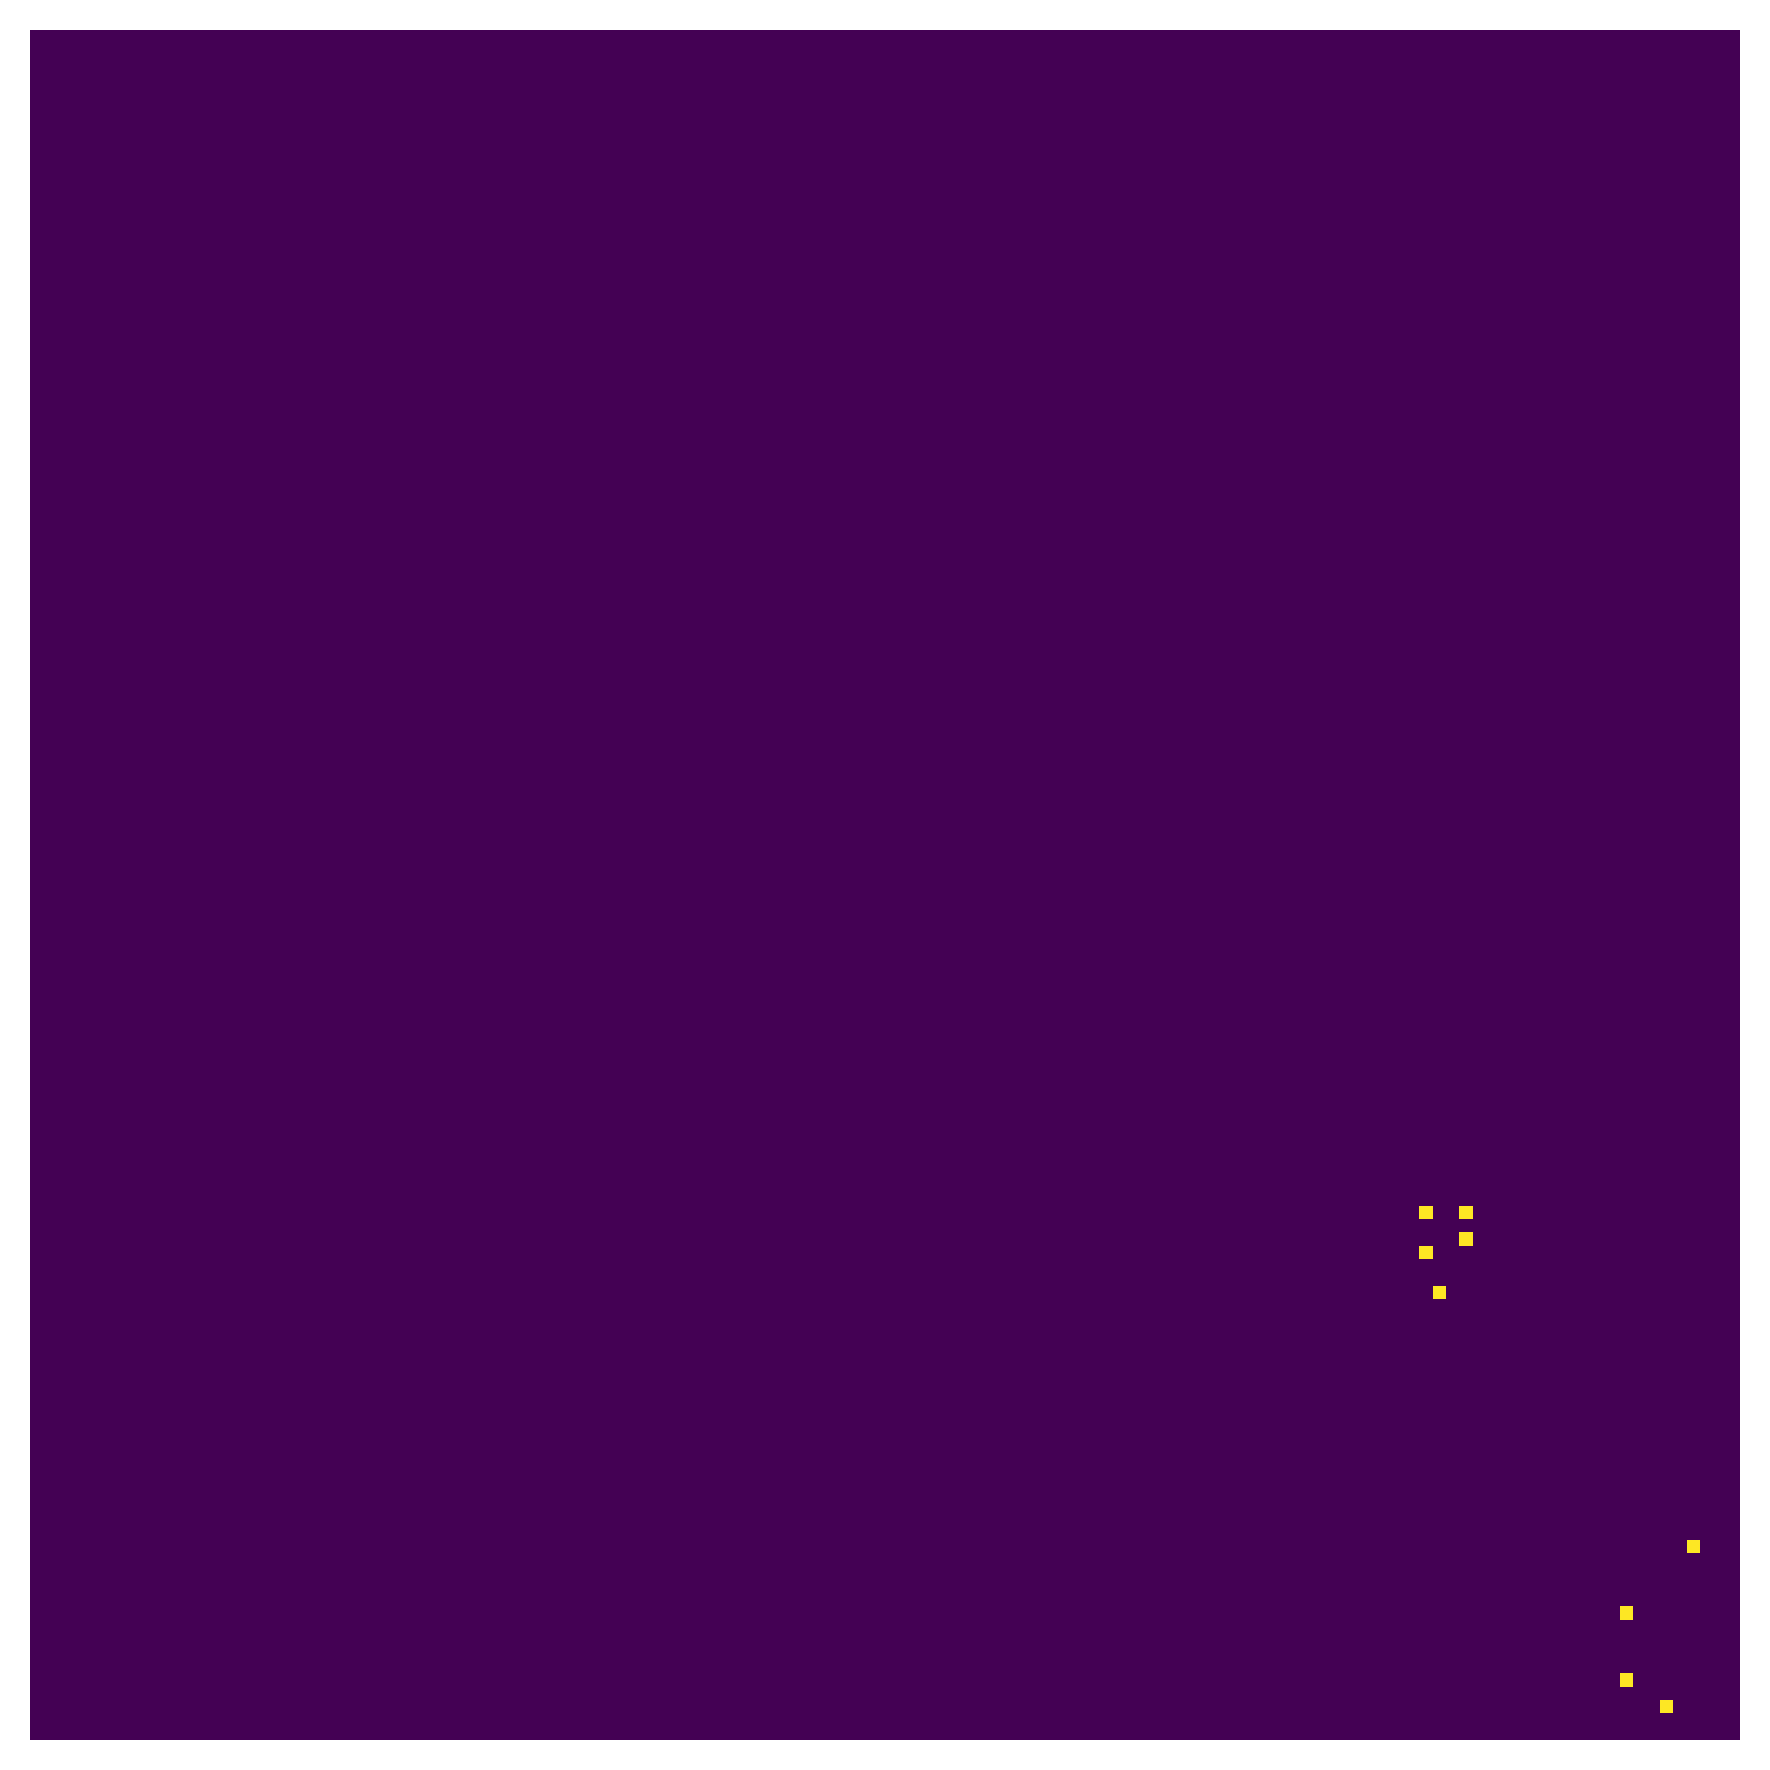

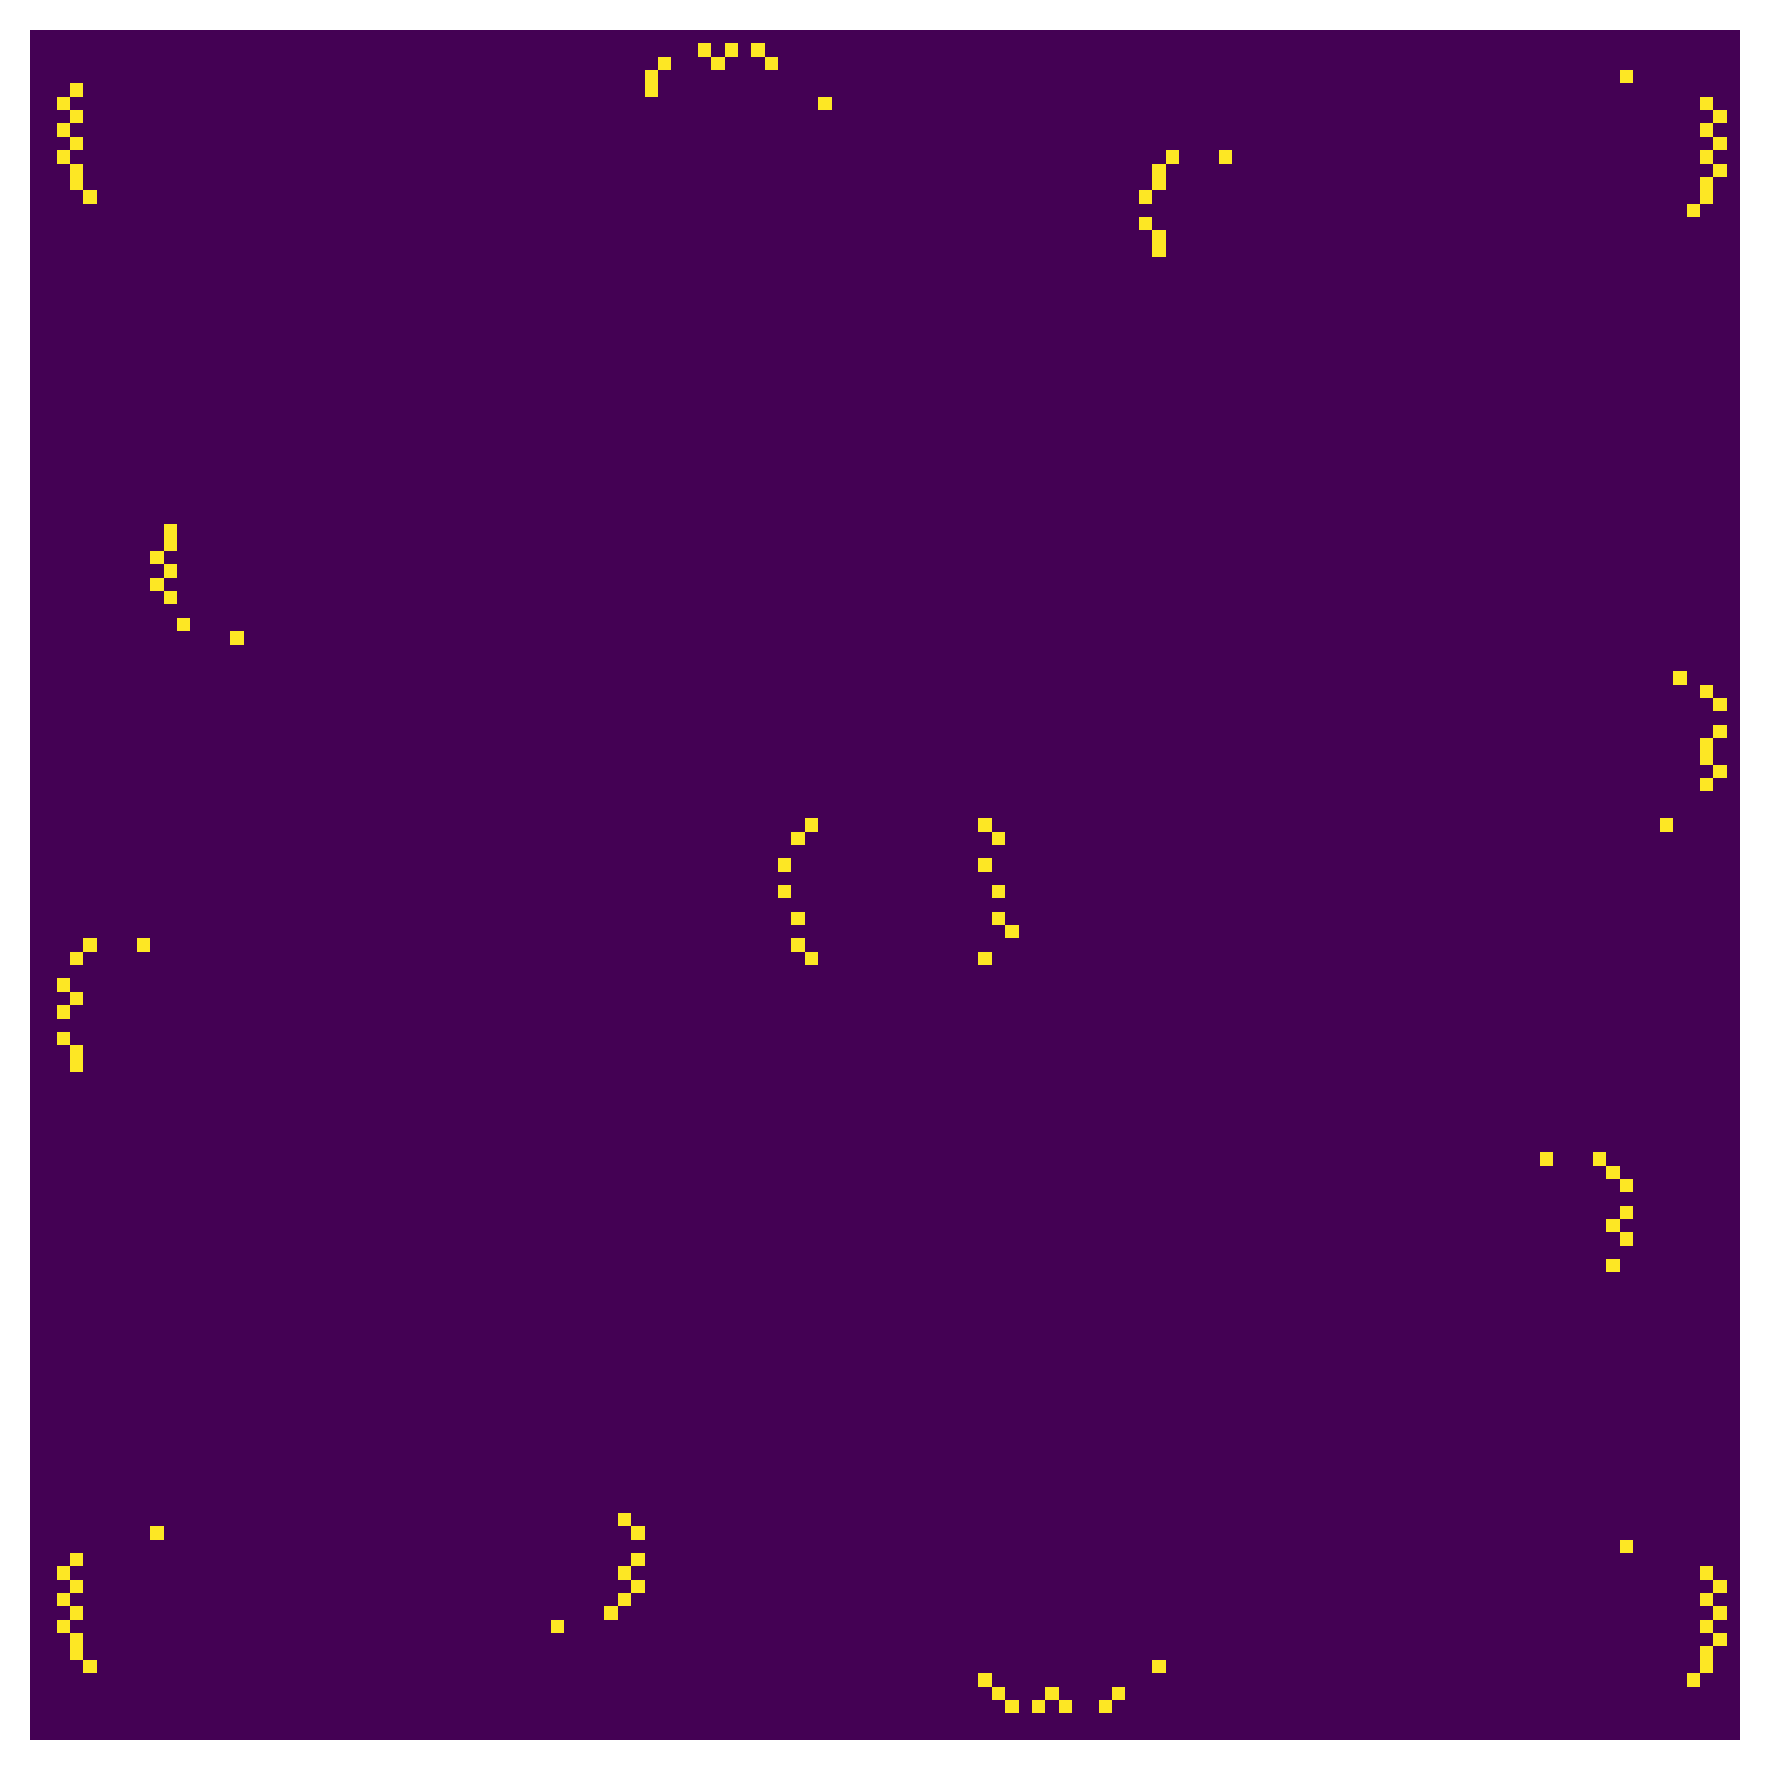

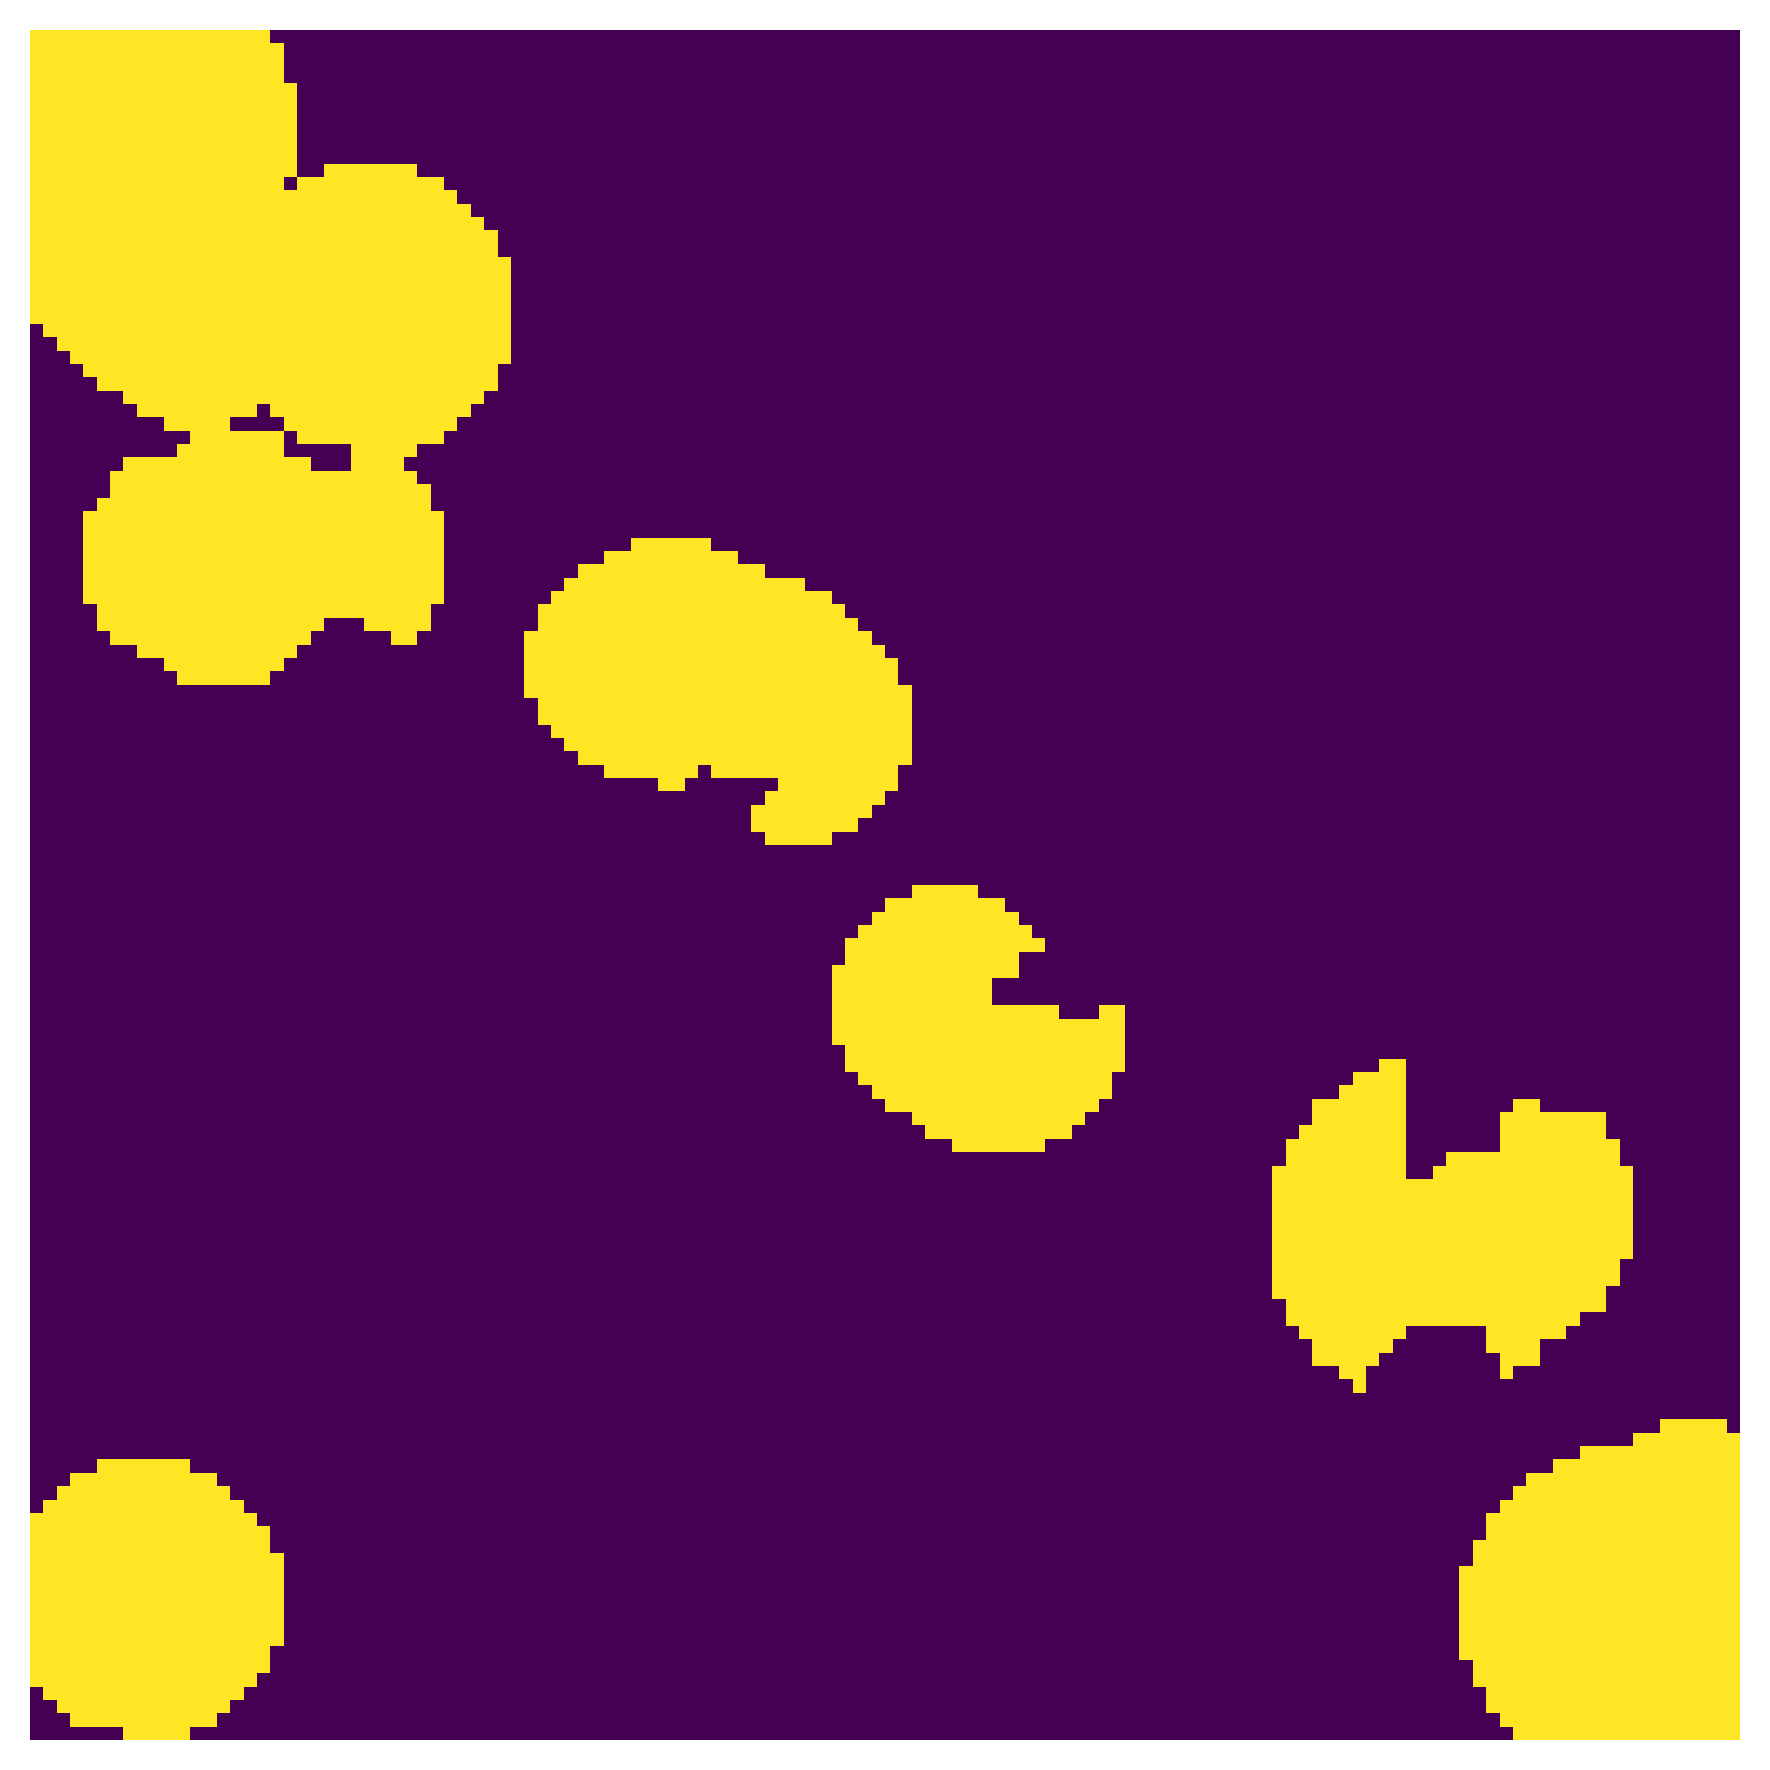

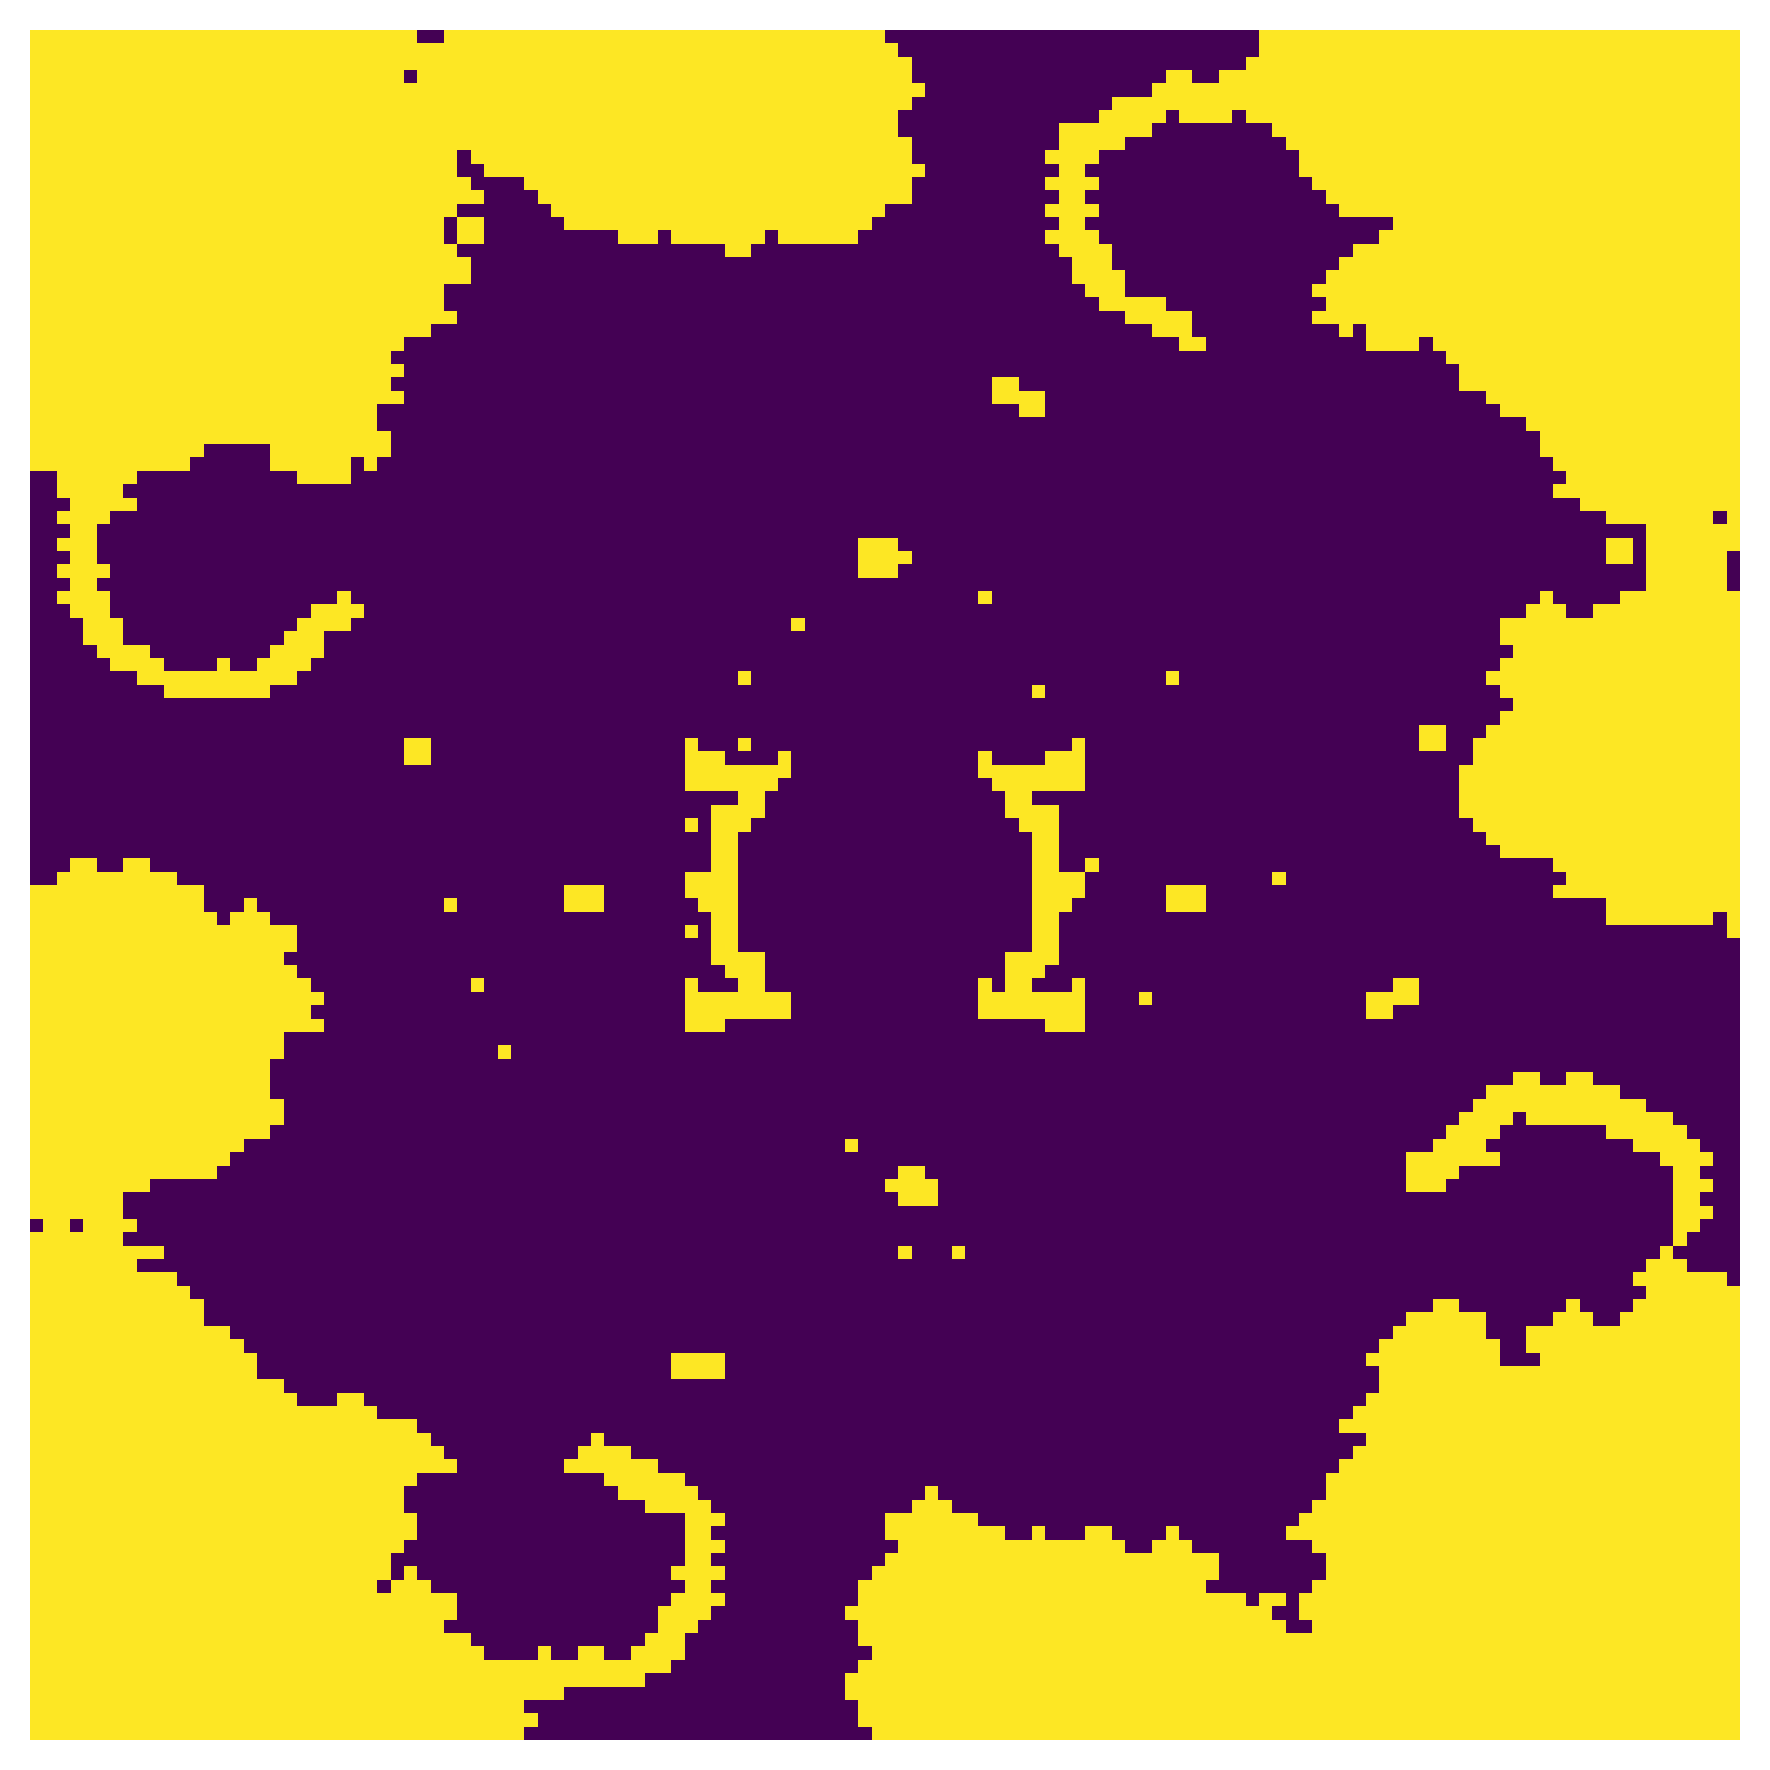

KeyboardInterrupt: 

In [86]:
for _, row in pd.DataFrame(candidate).iterrows():
    data = np.load(os.path.join(os.path.curdir, f"results/{row['rep']}/{row['frame']}.npy"))
    print(f"{row['rep']} - {row['frame']}")
    
    draw_channel(data, row['rep'], row['frame'])
    draw_overview(data, row['rep'], row['frame'])
    
    

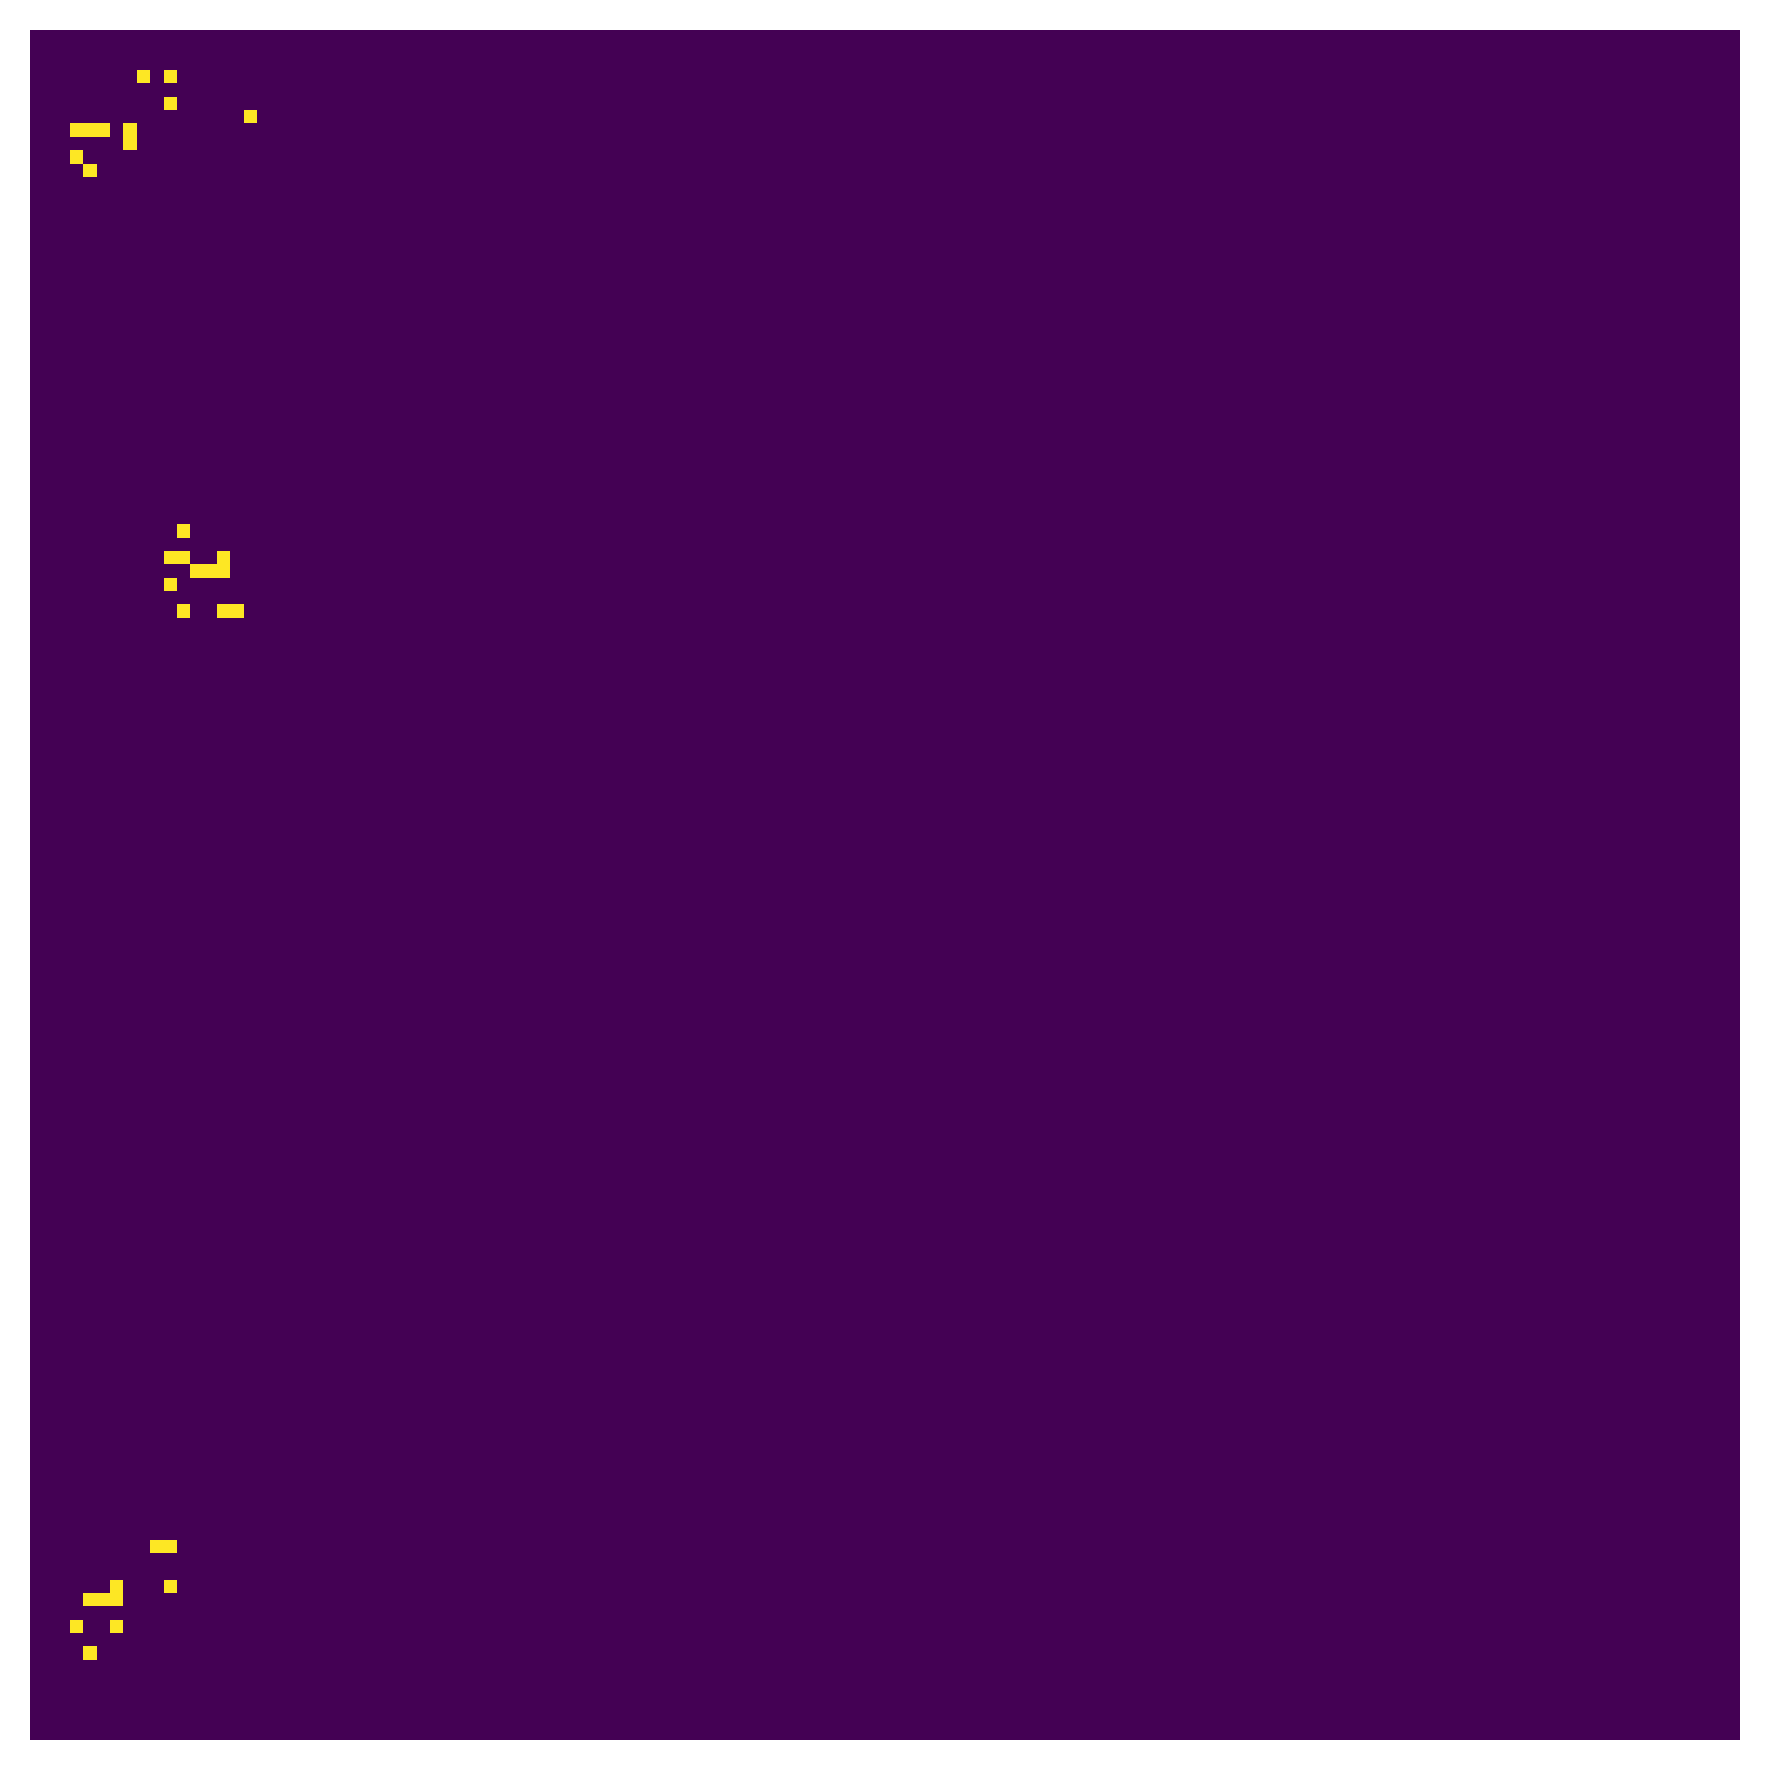

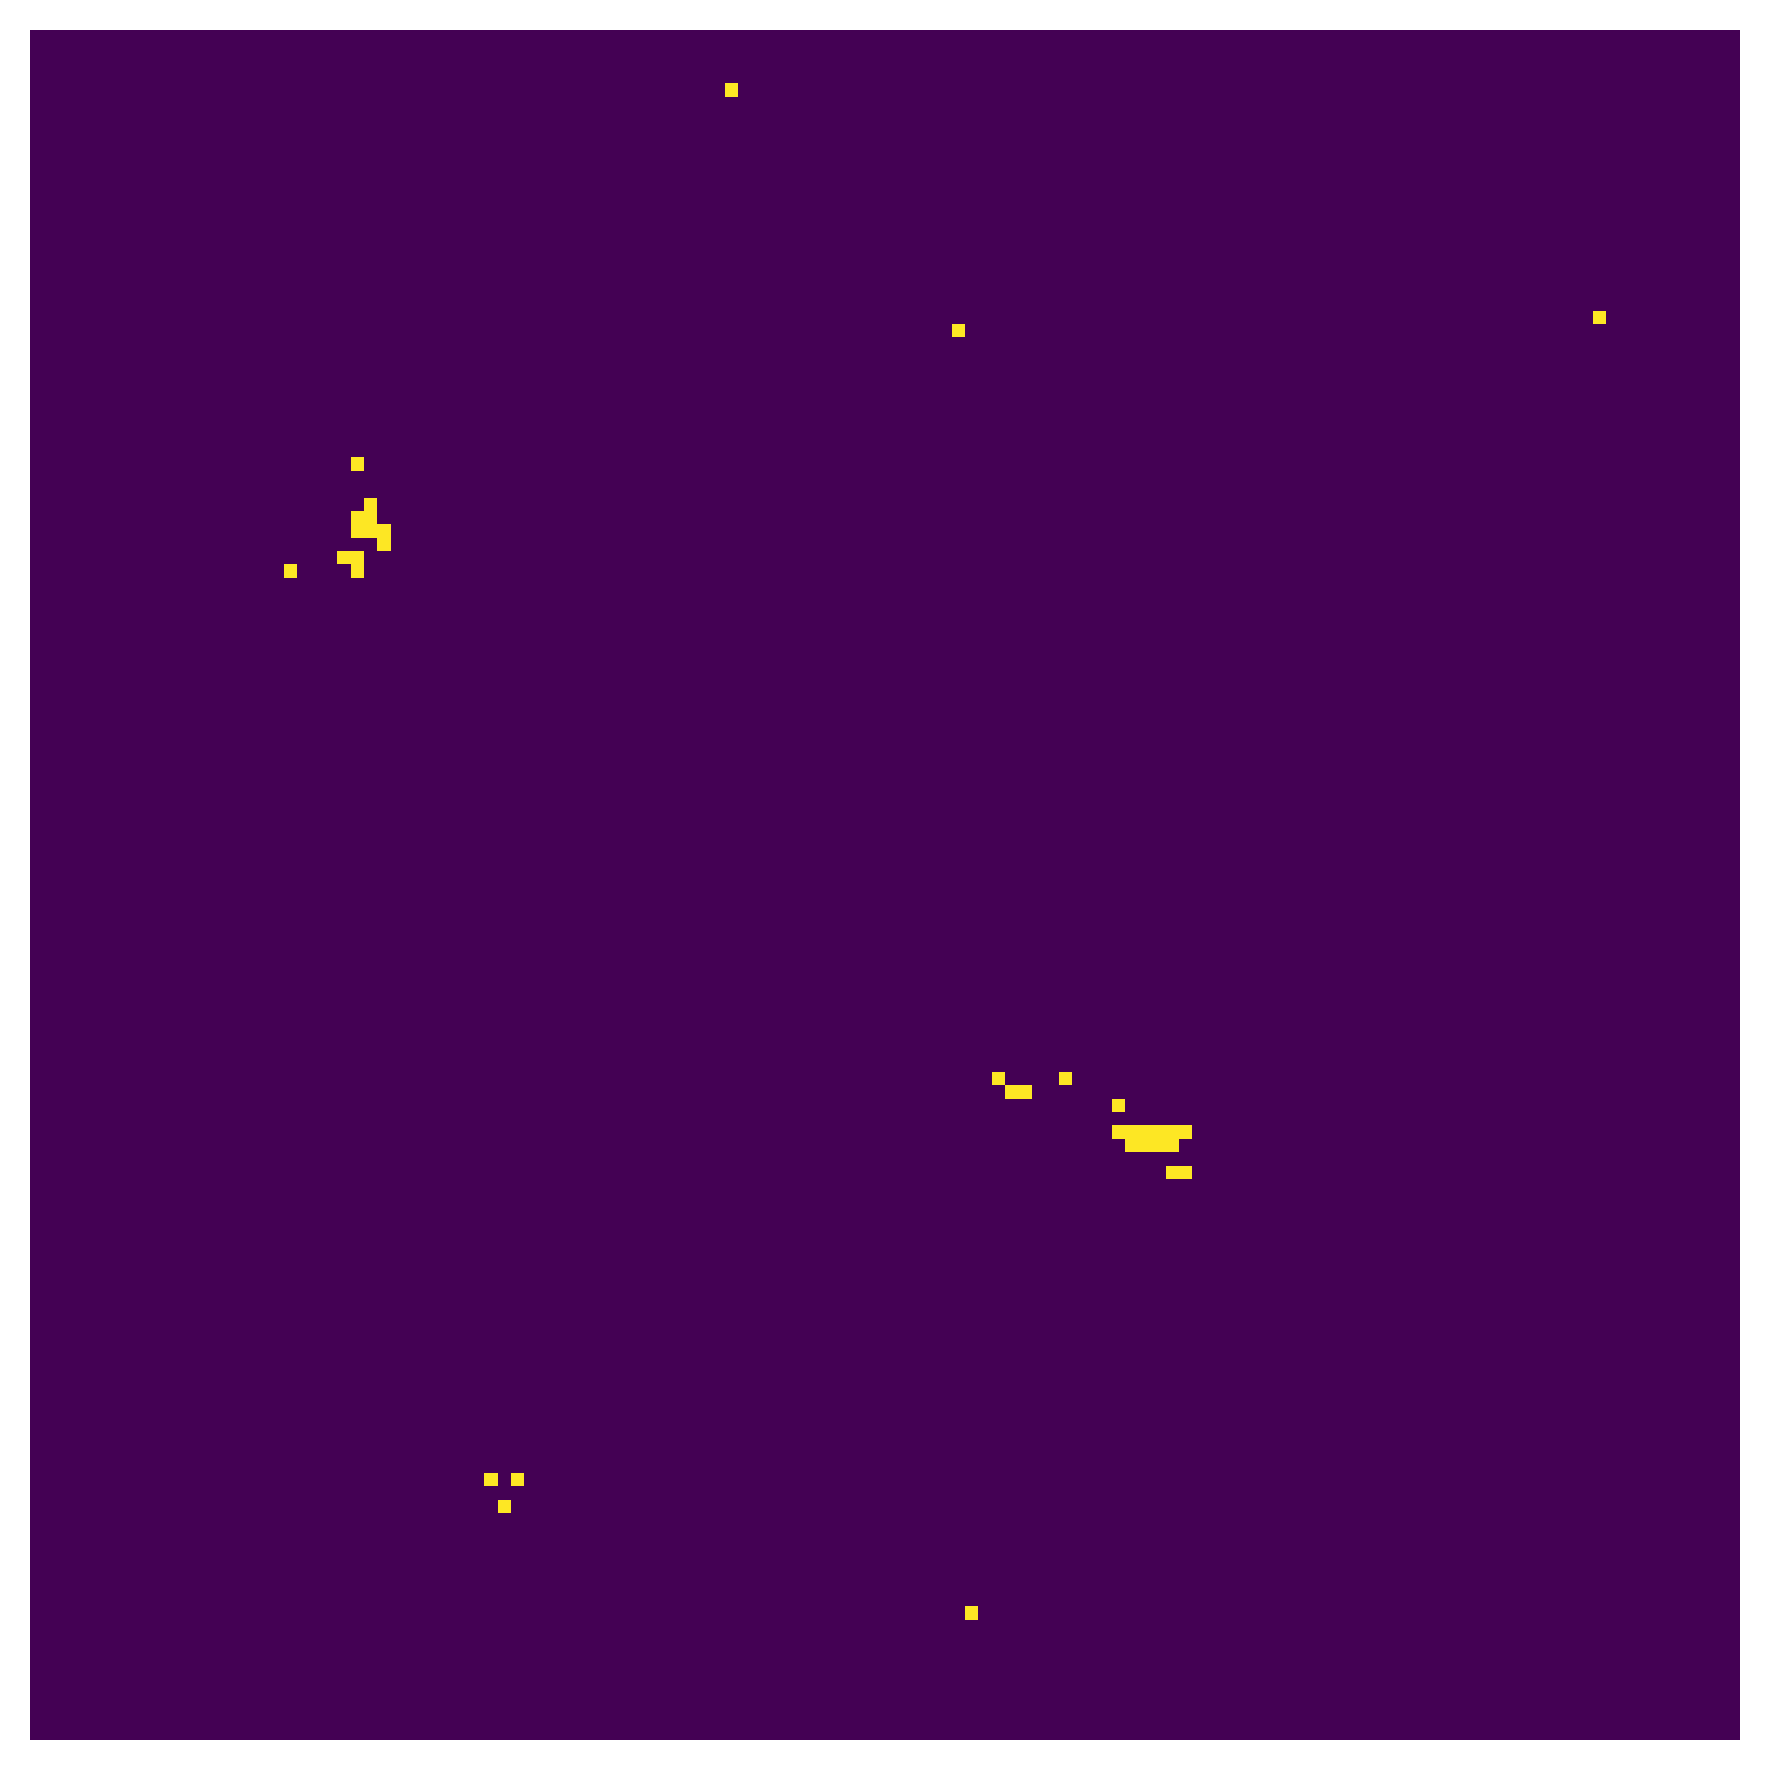

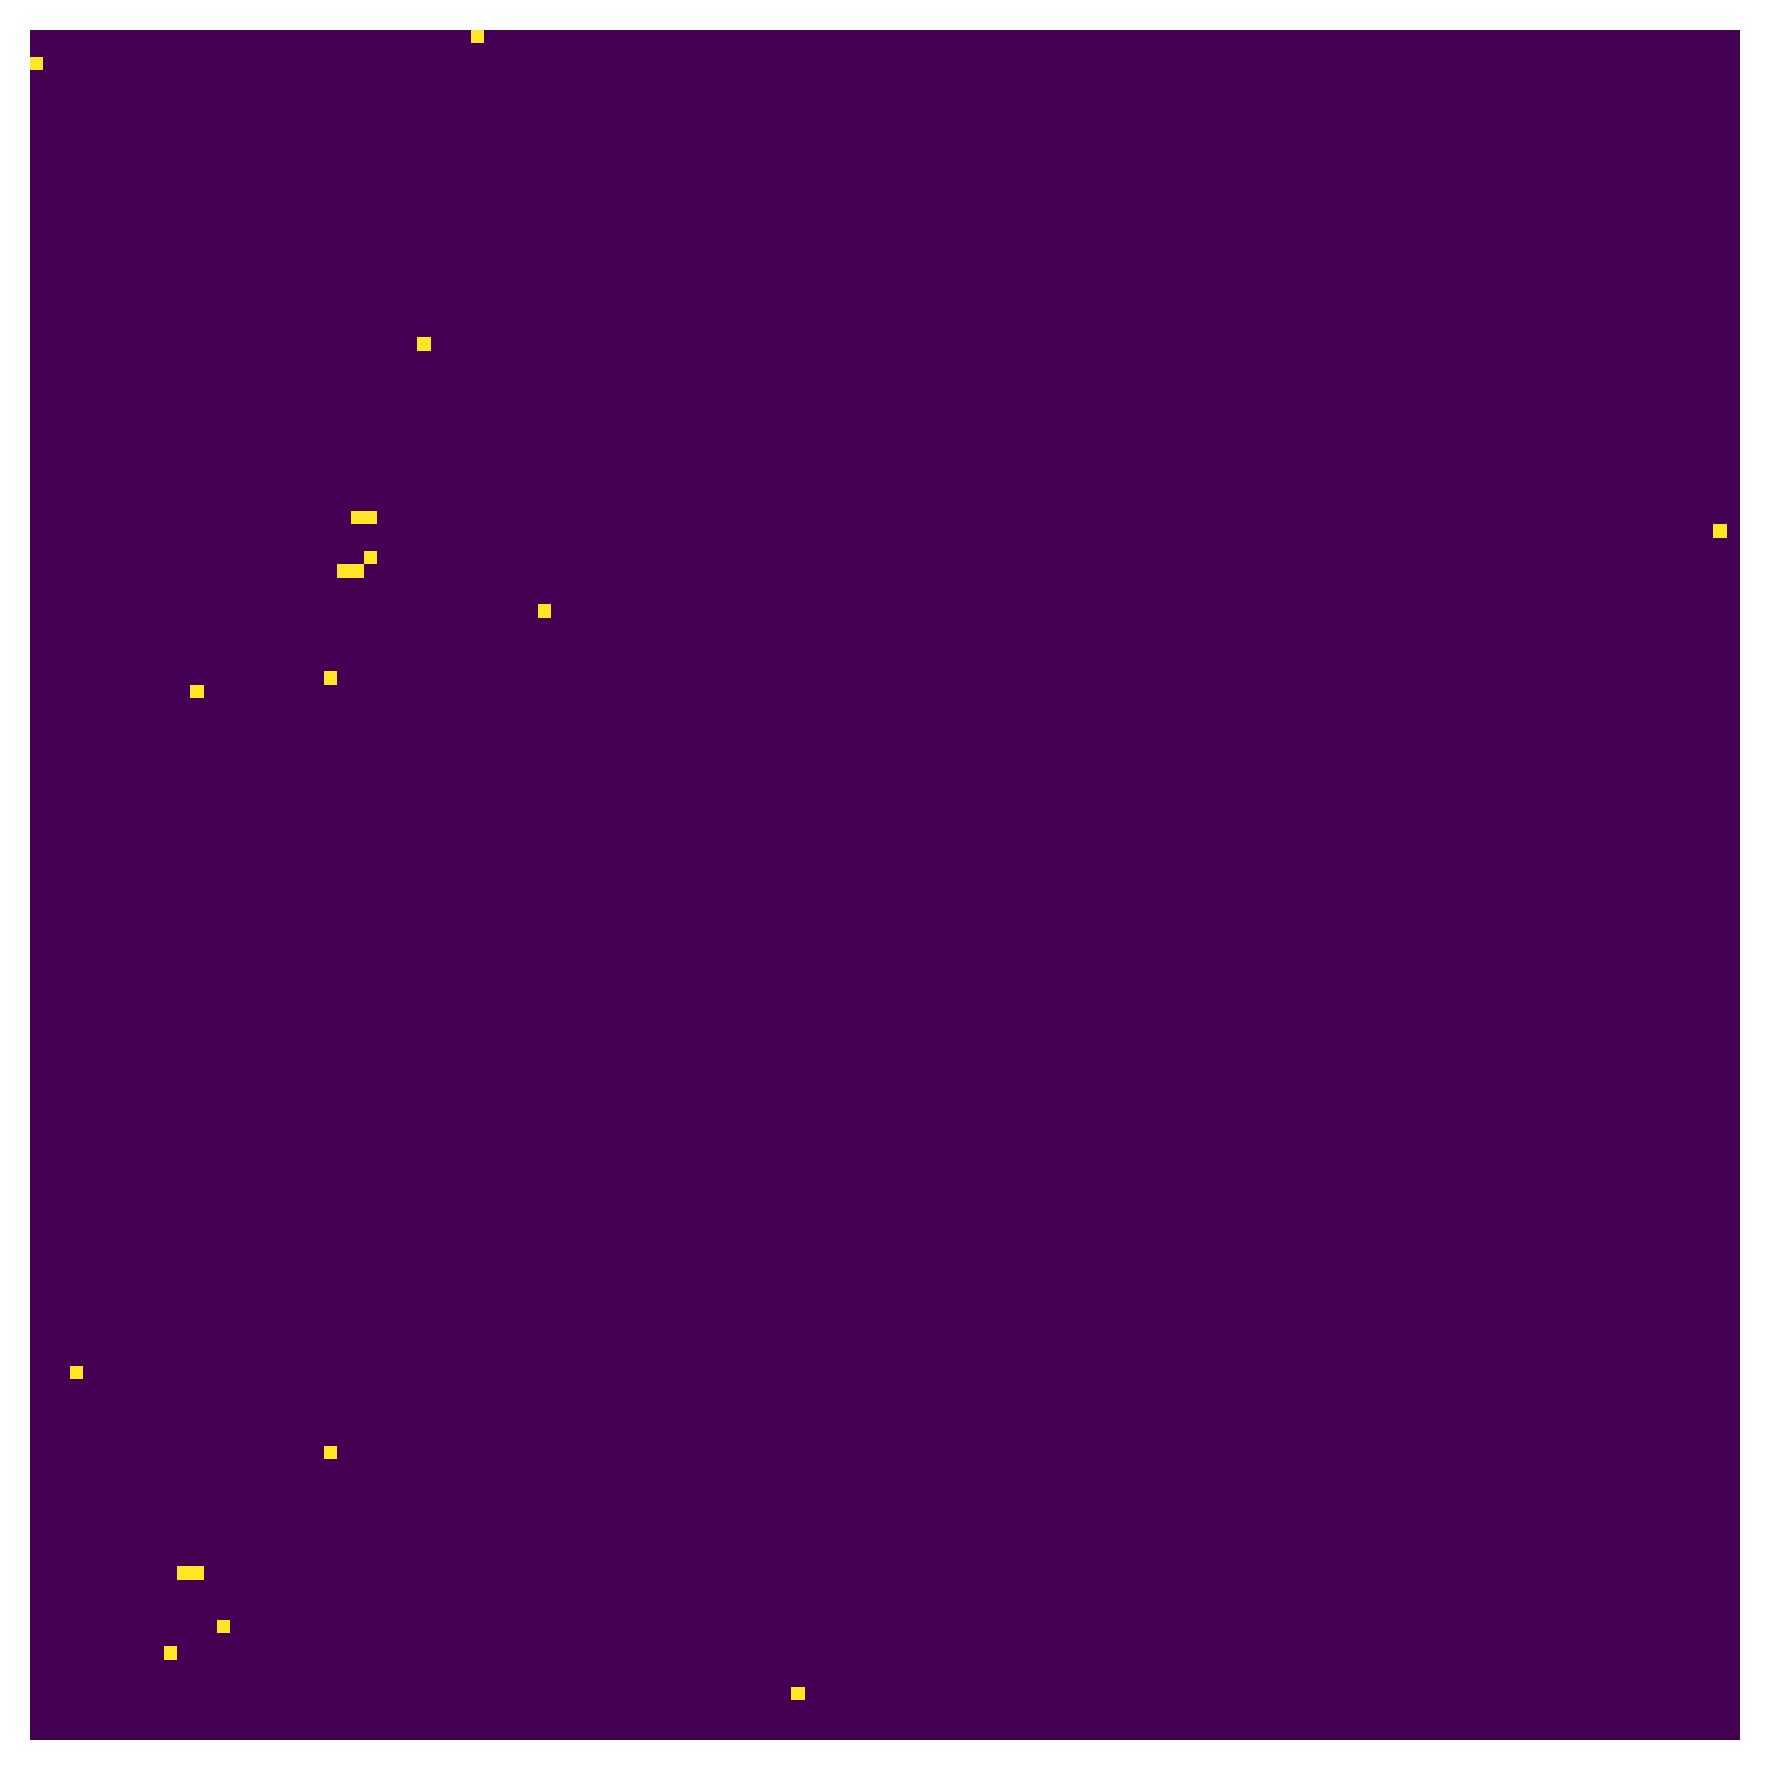

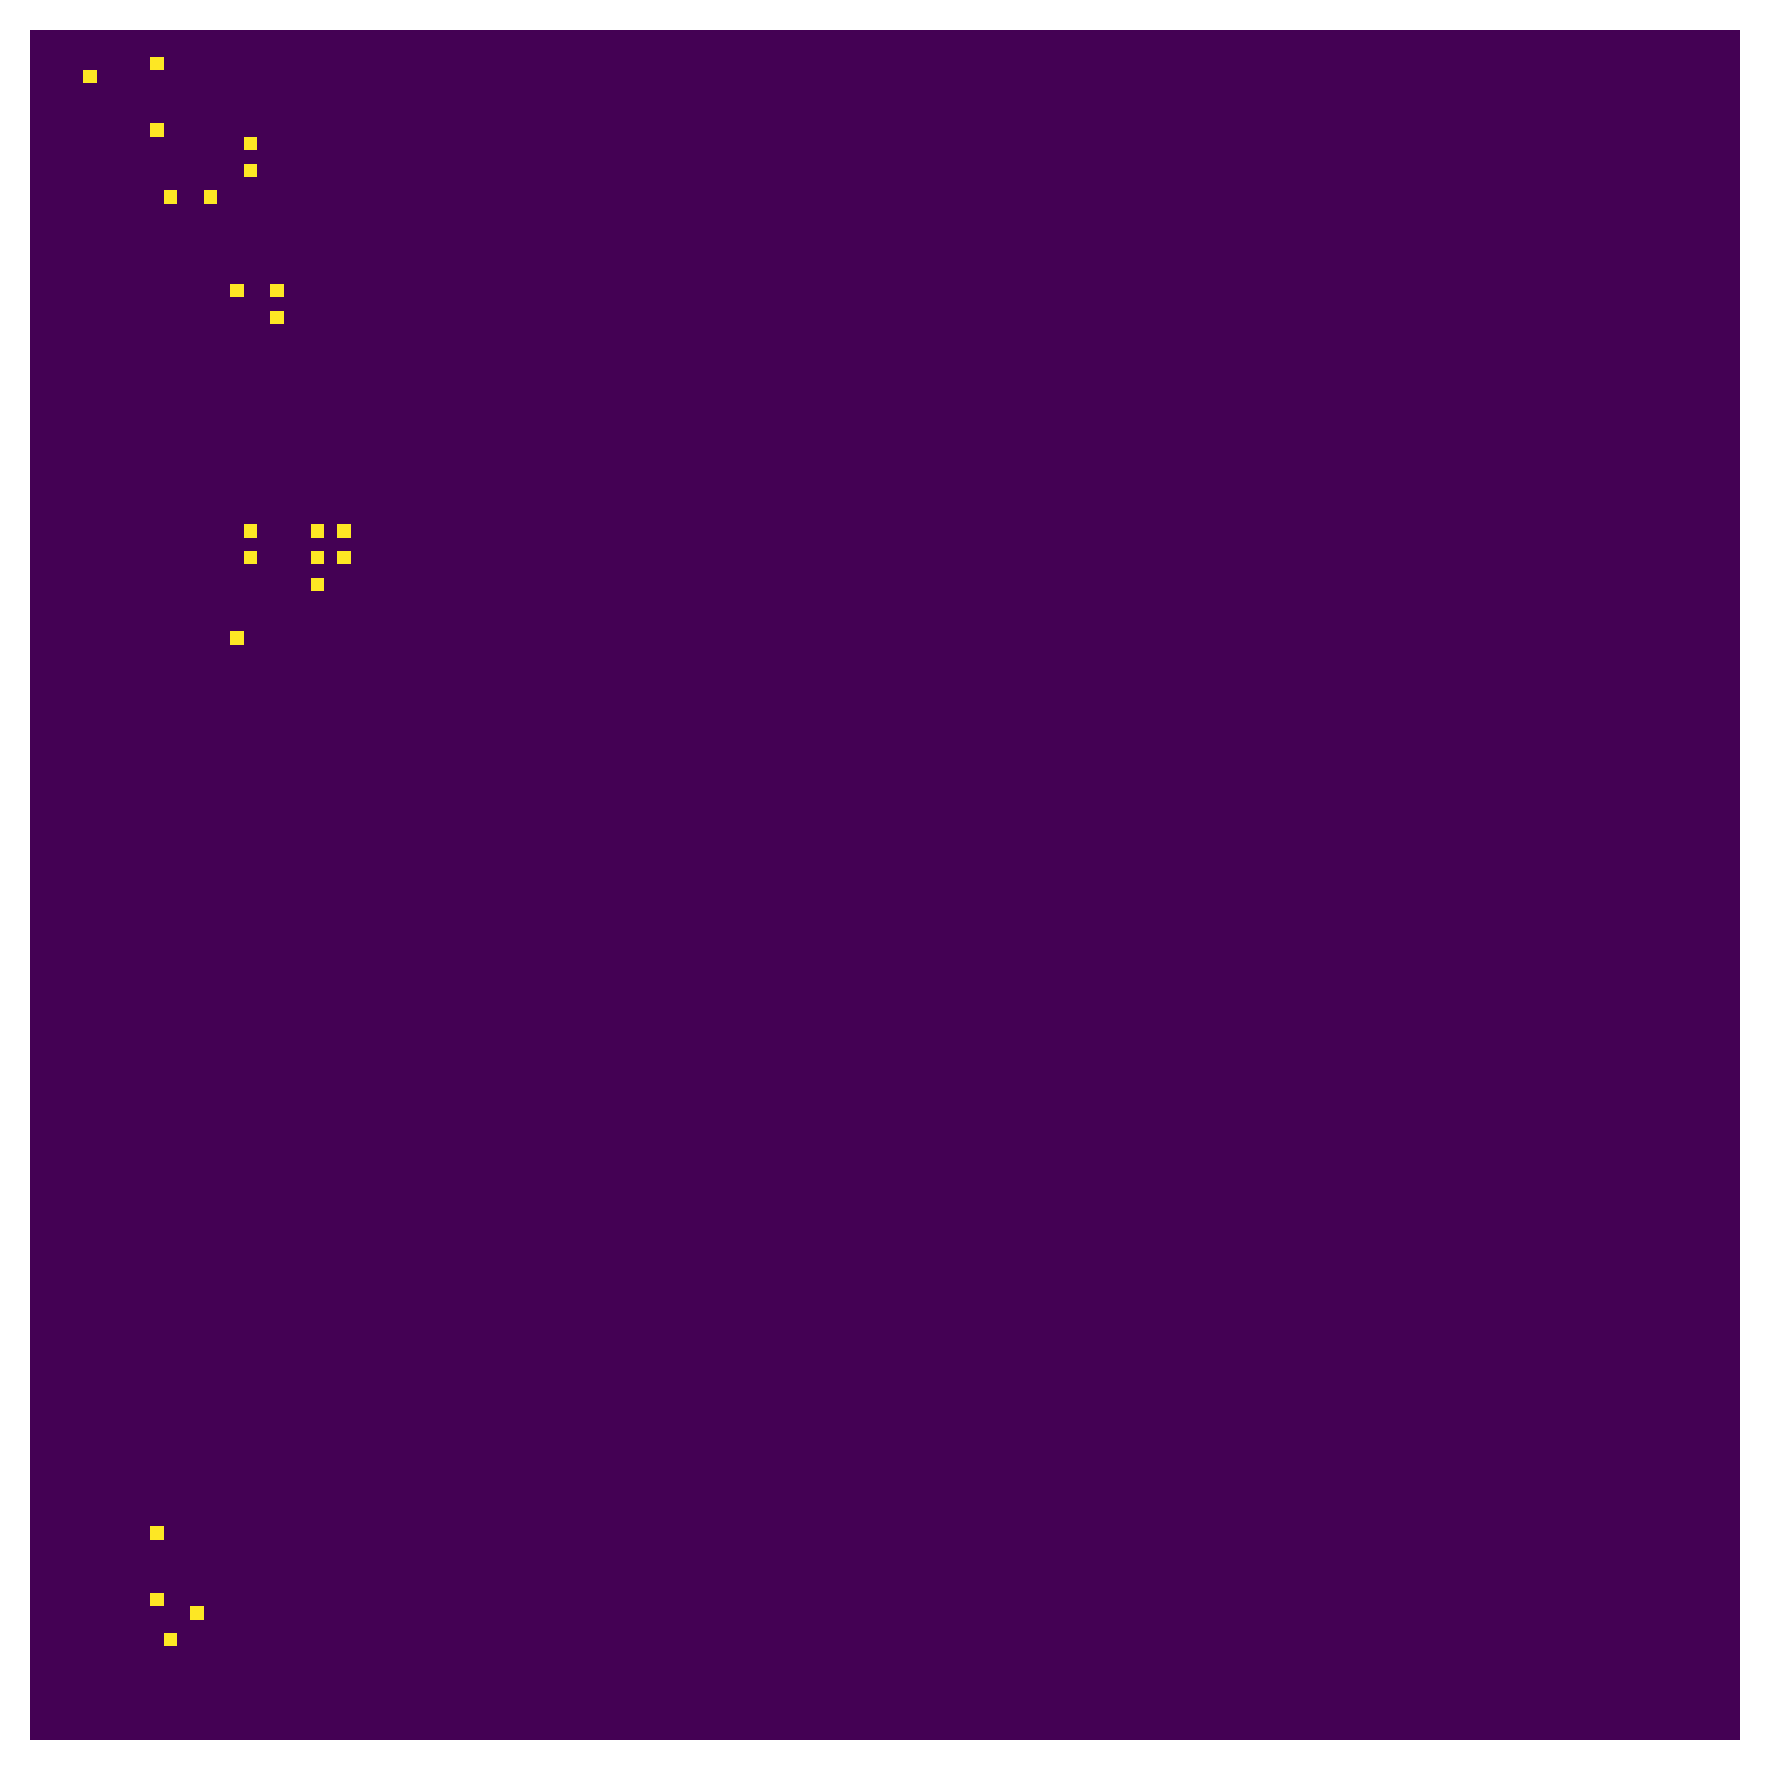

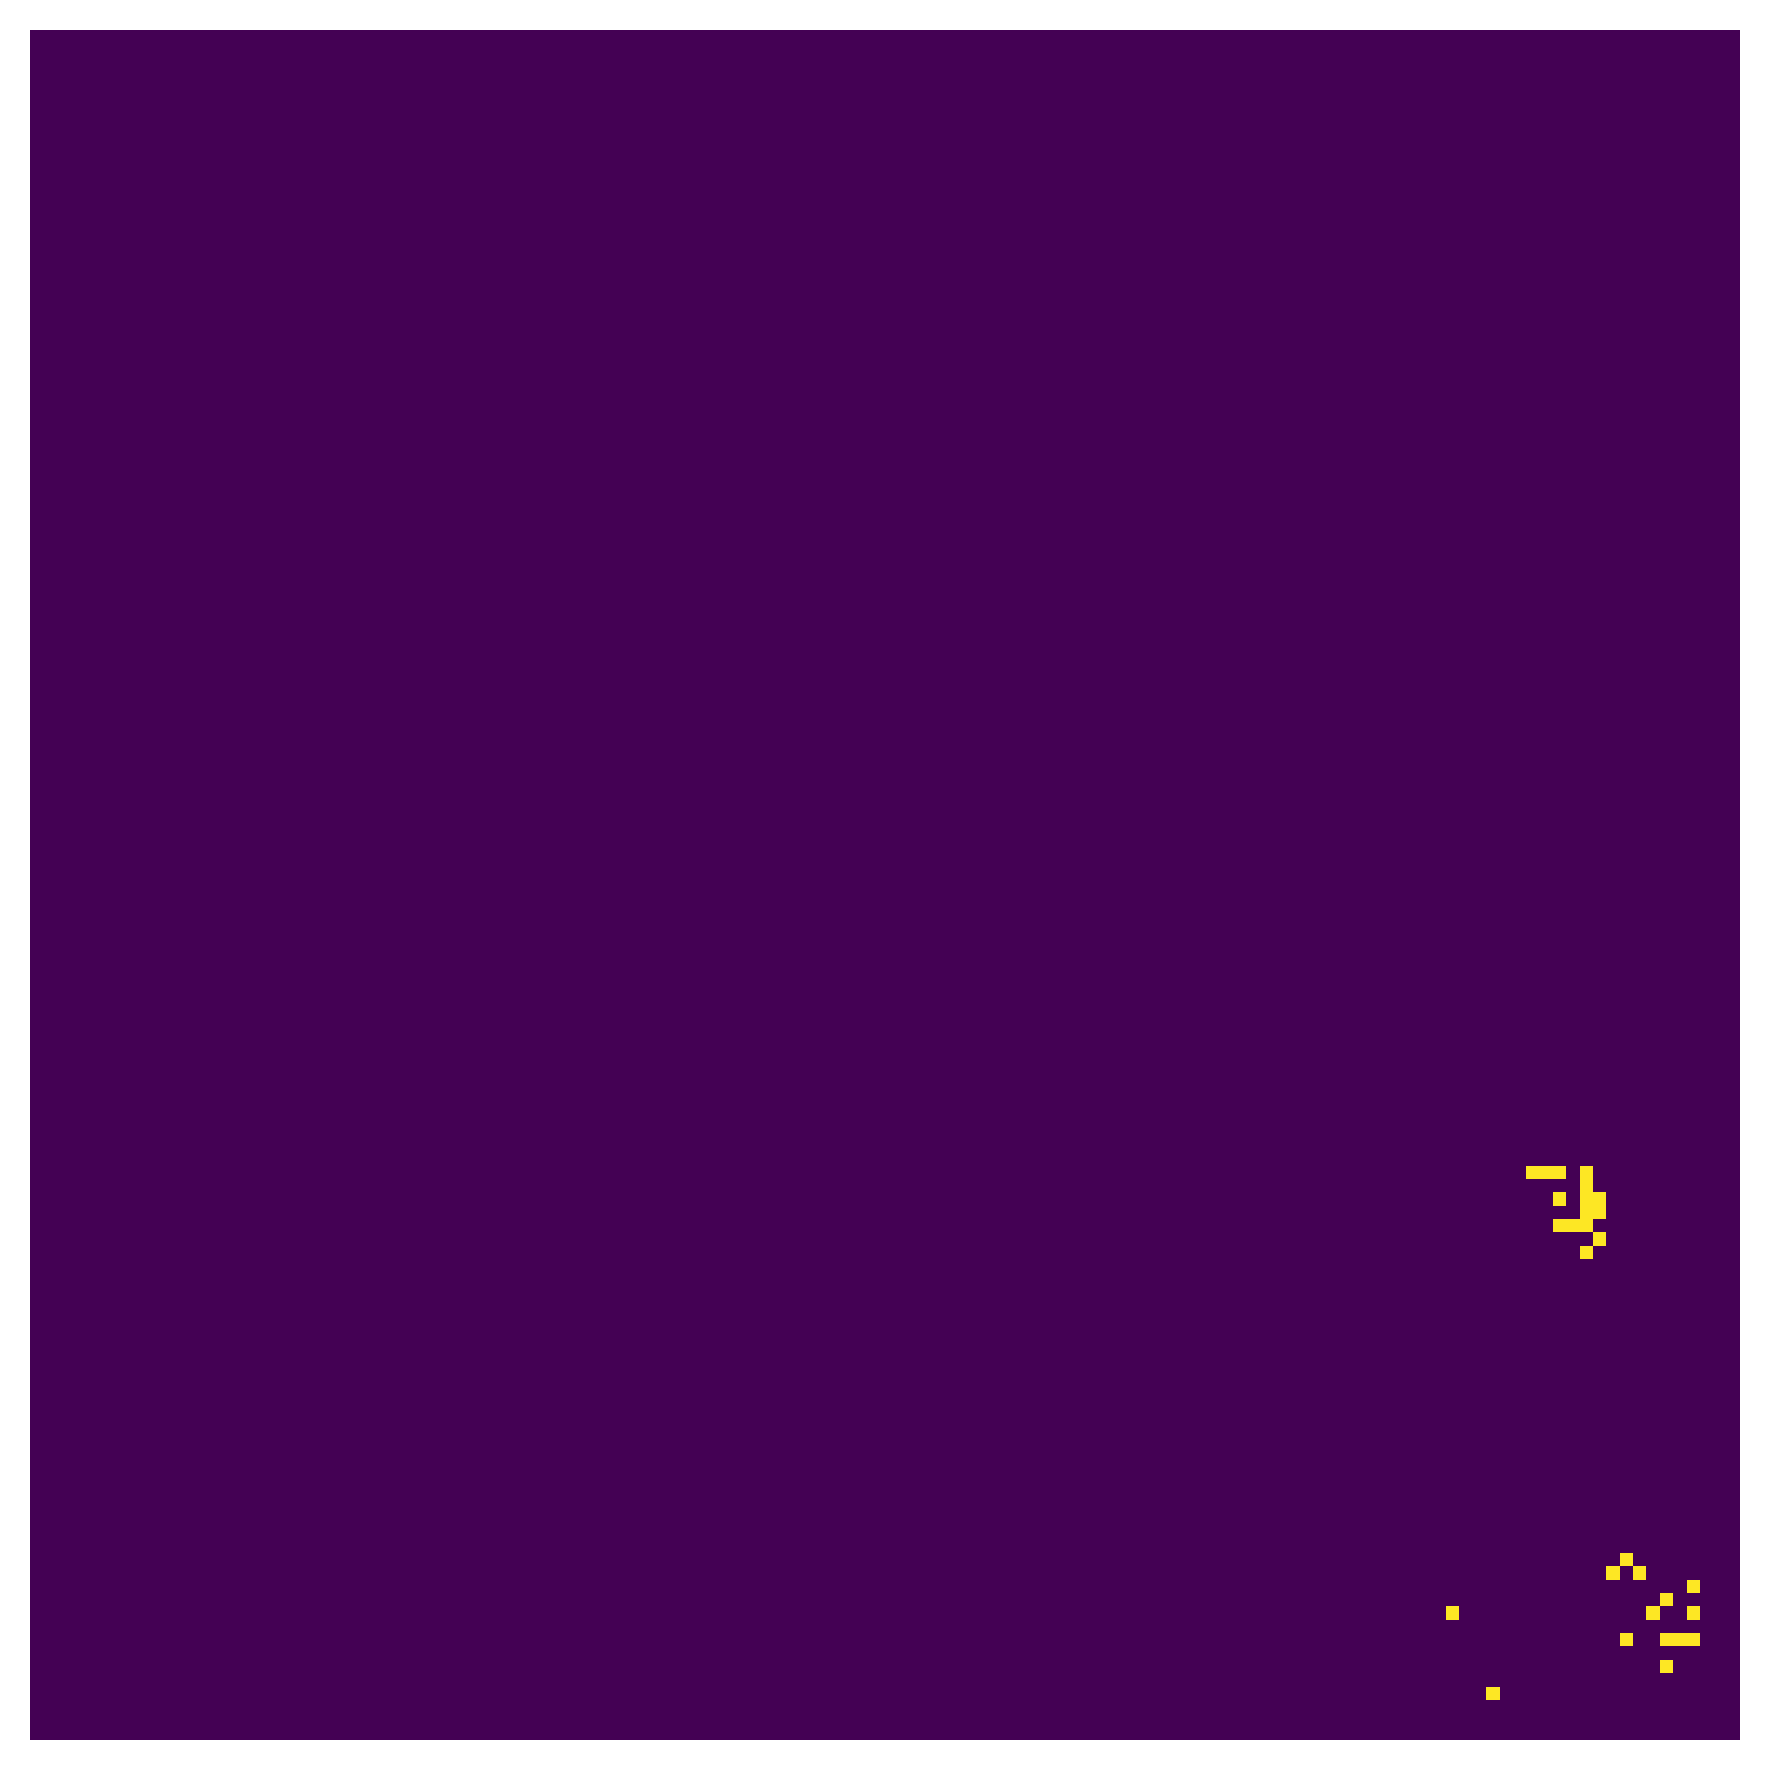

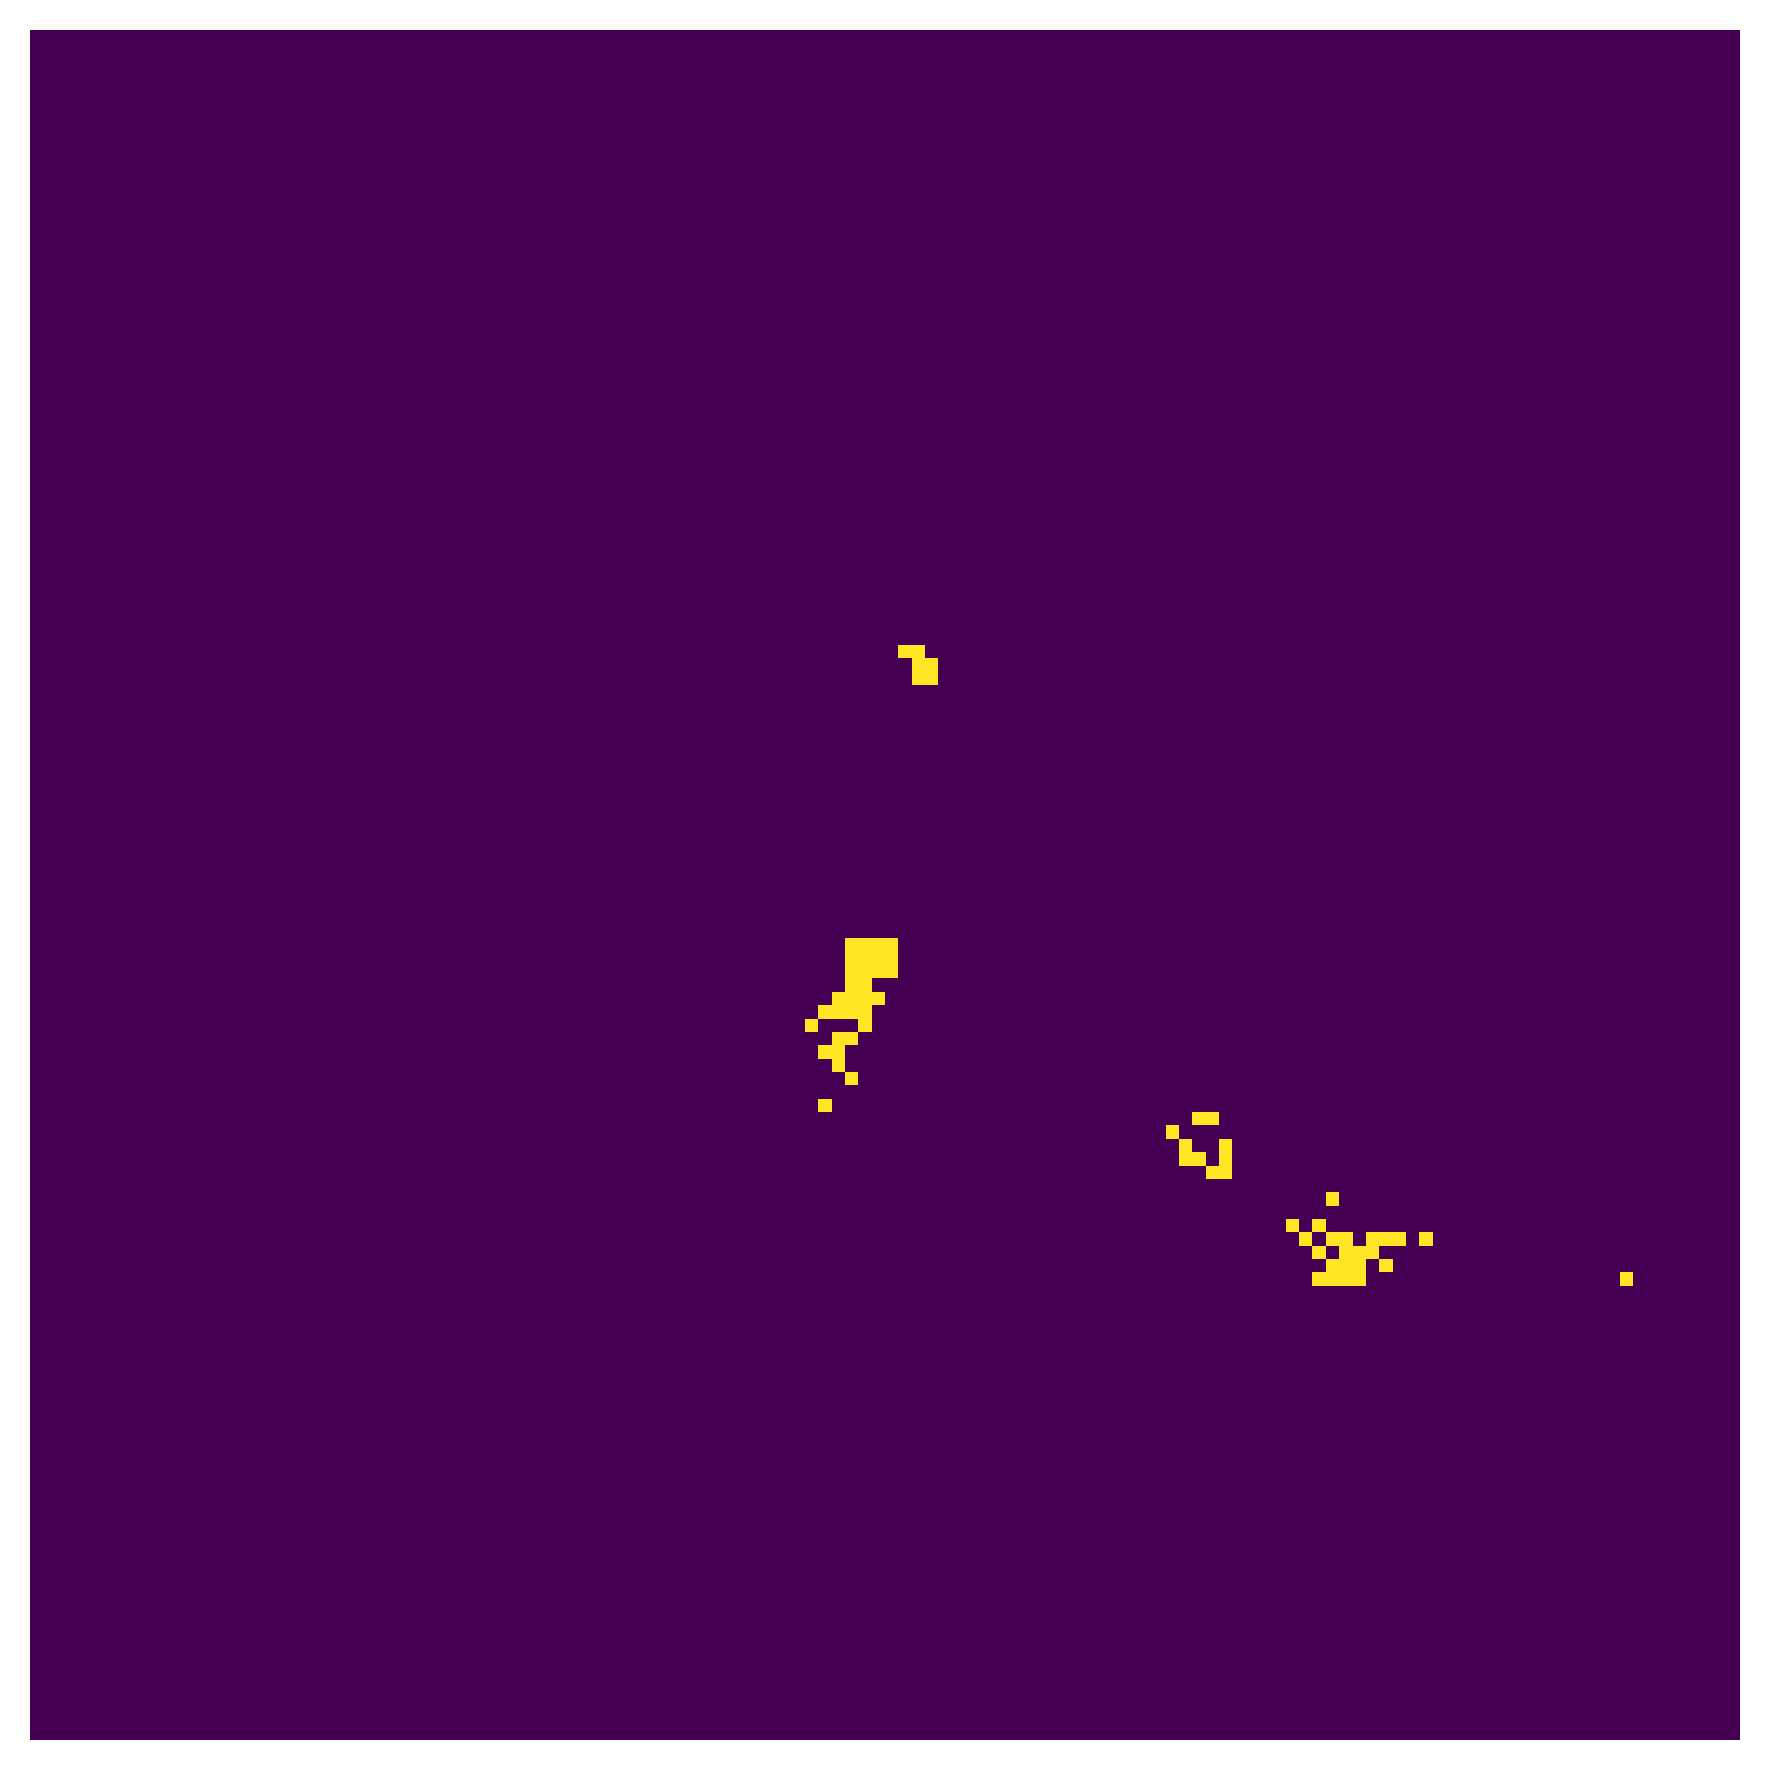

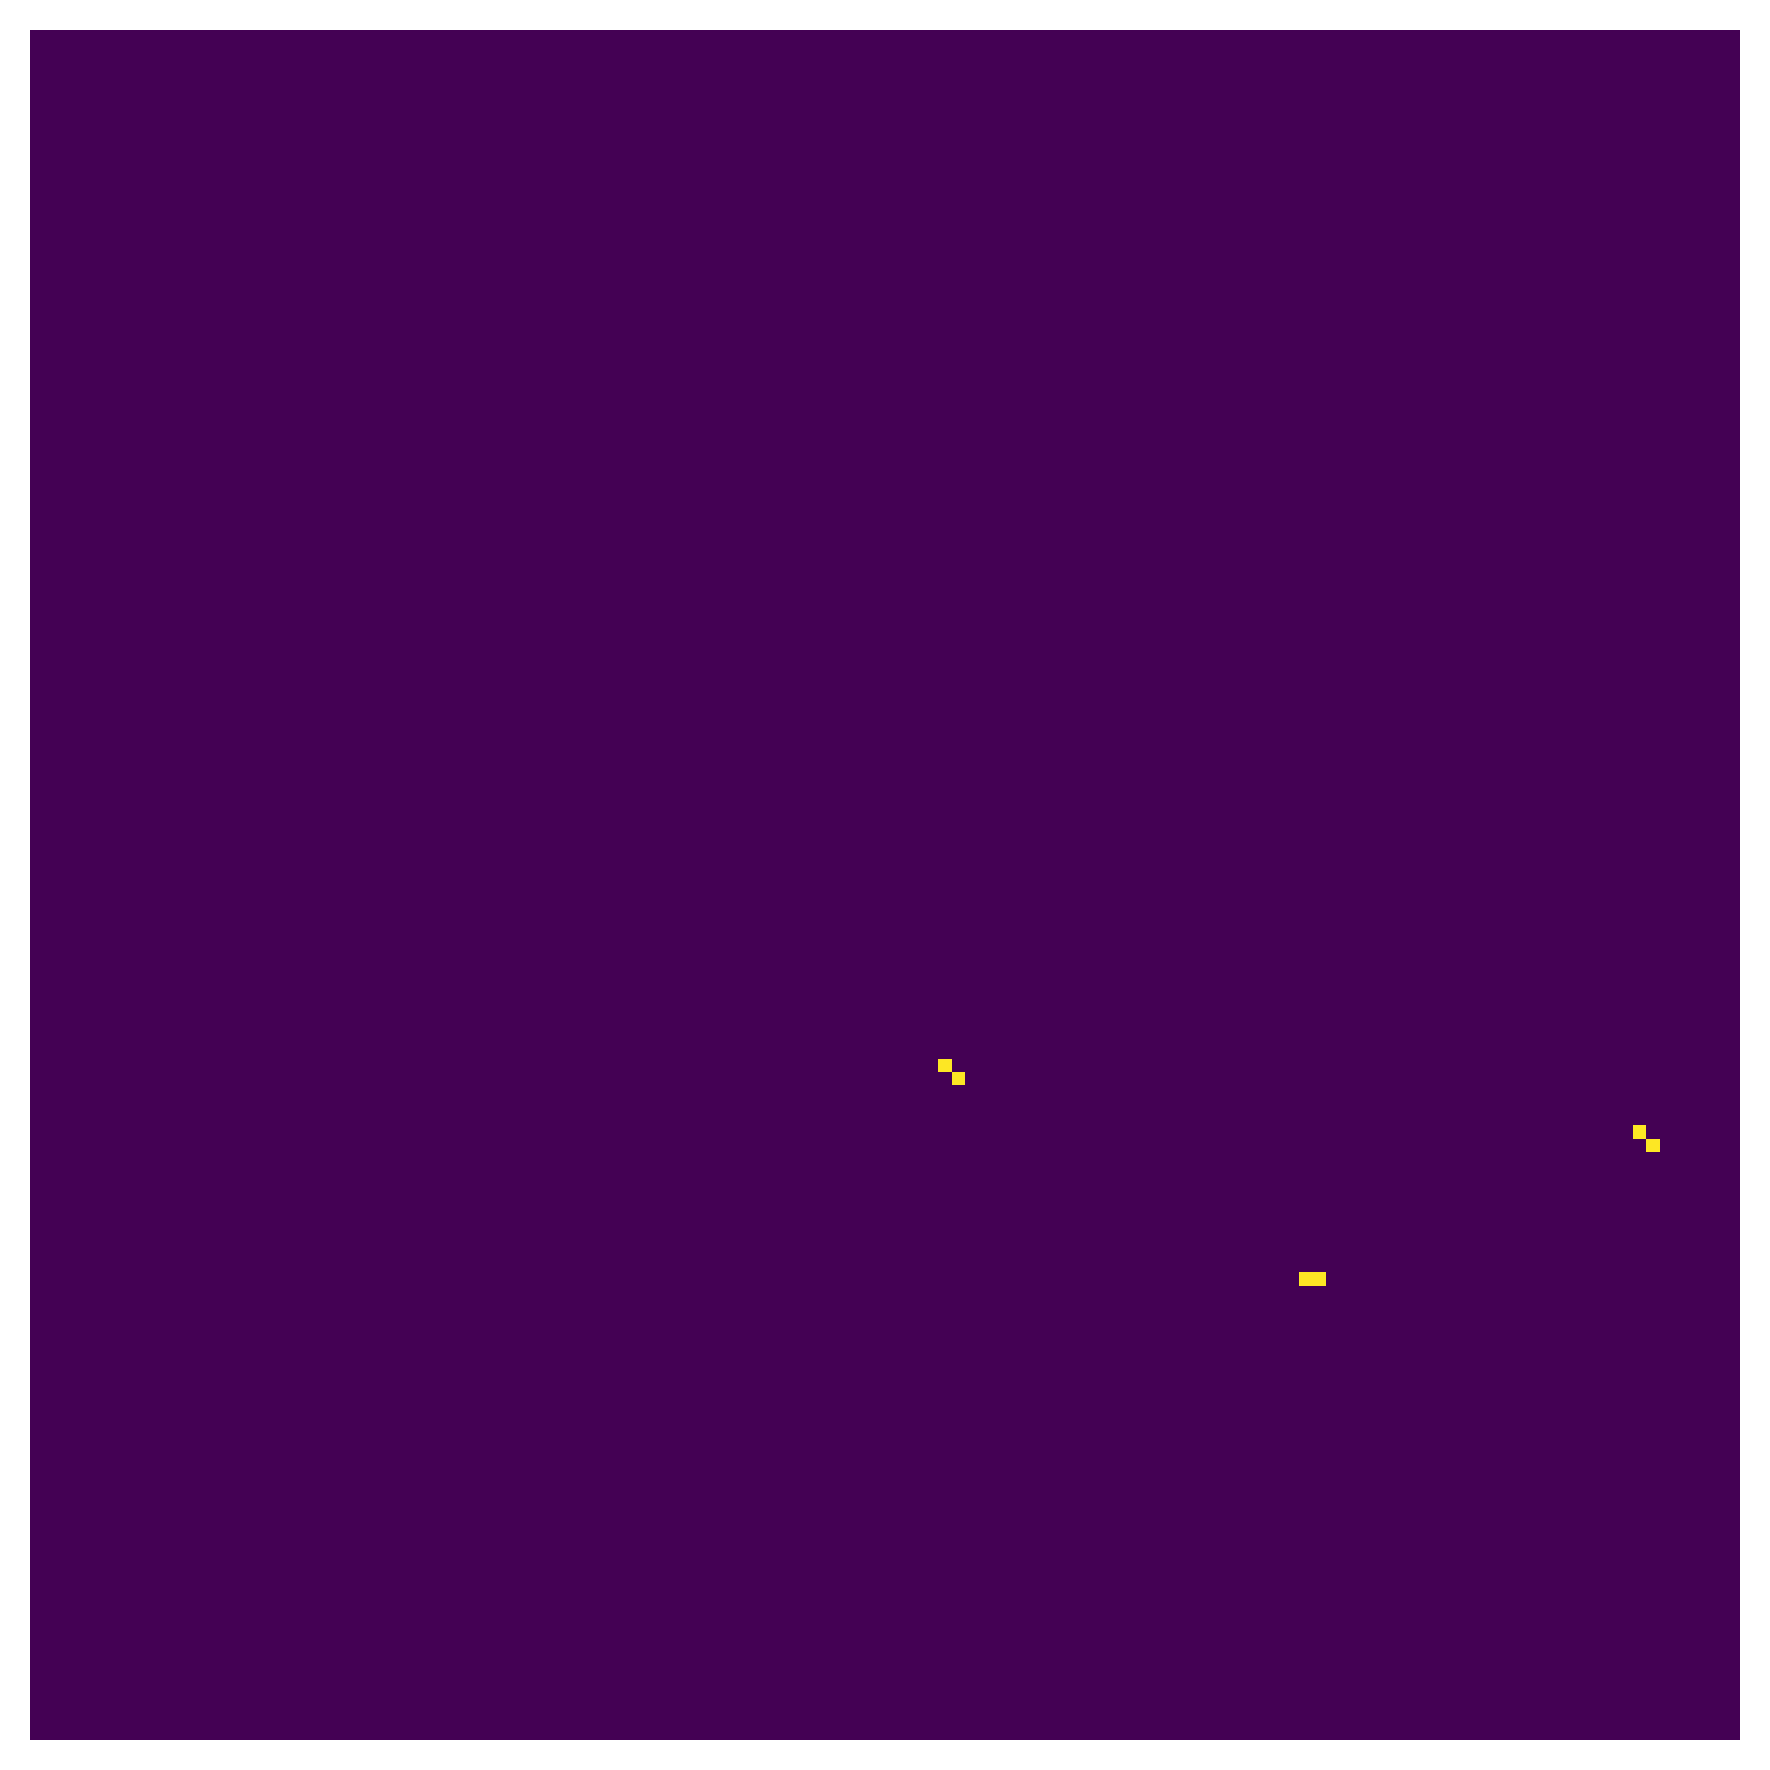

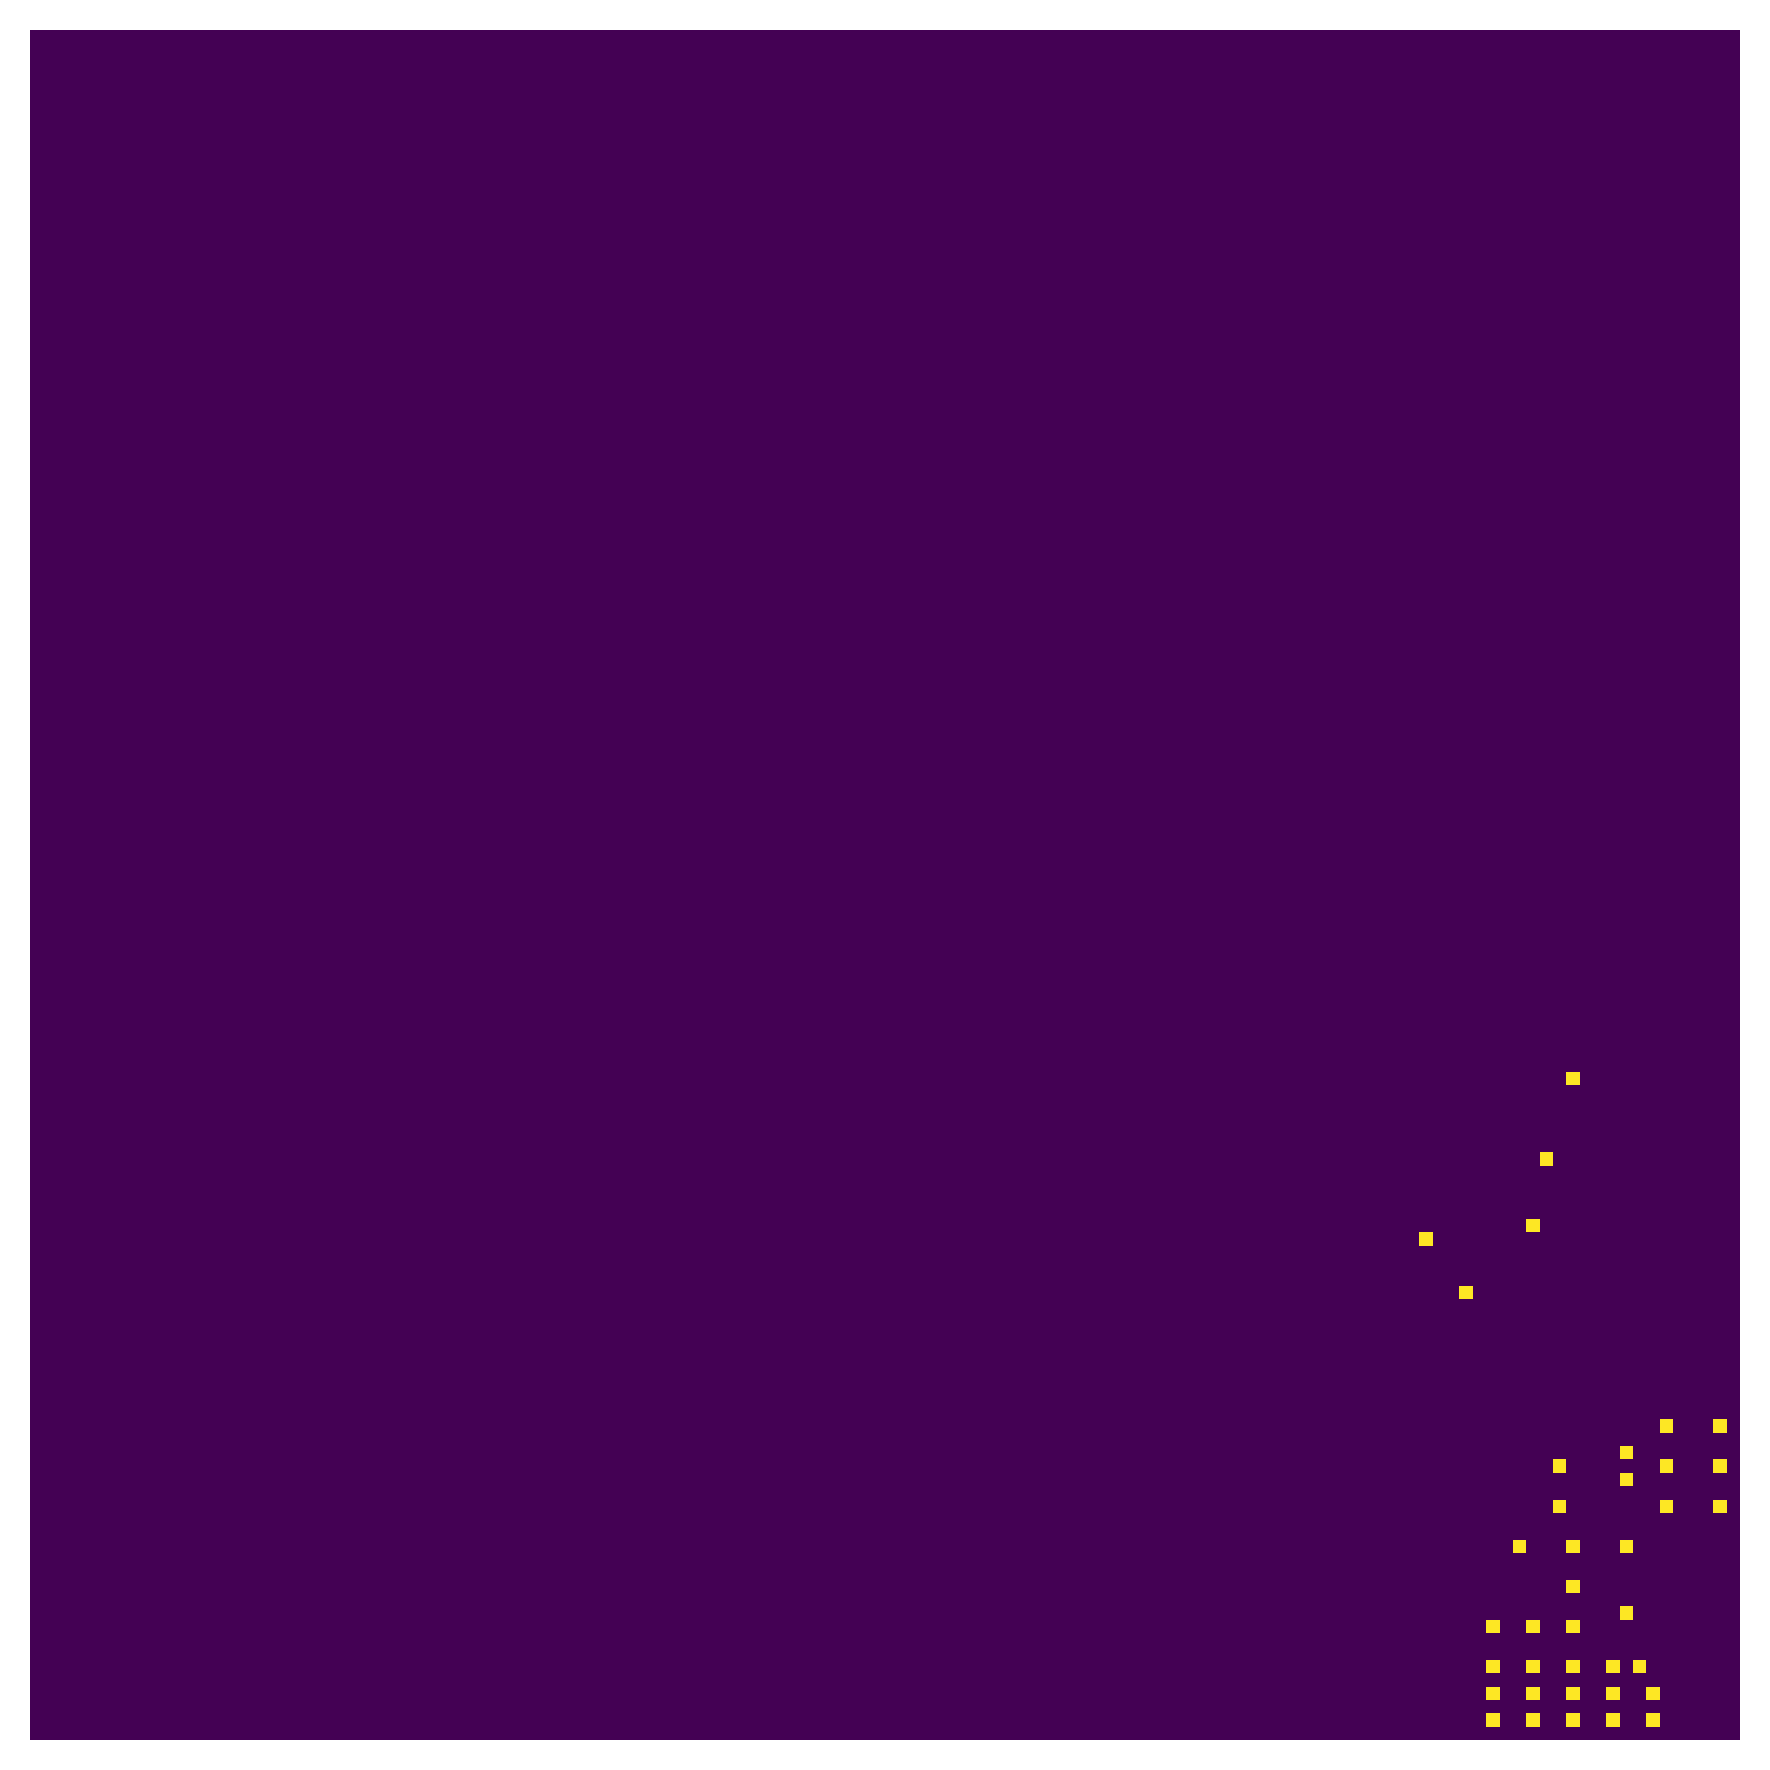

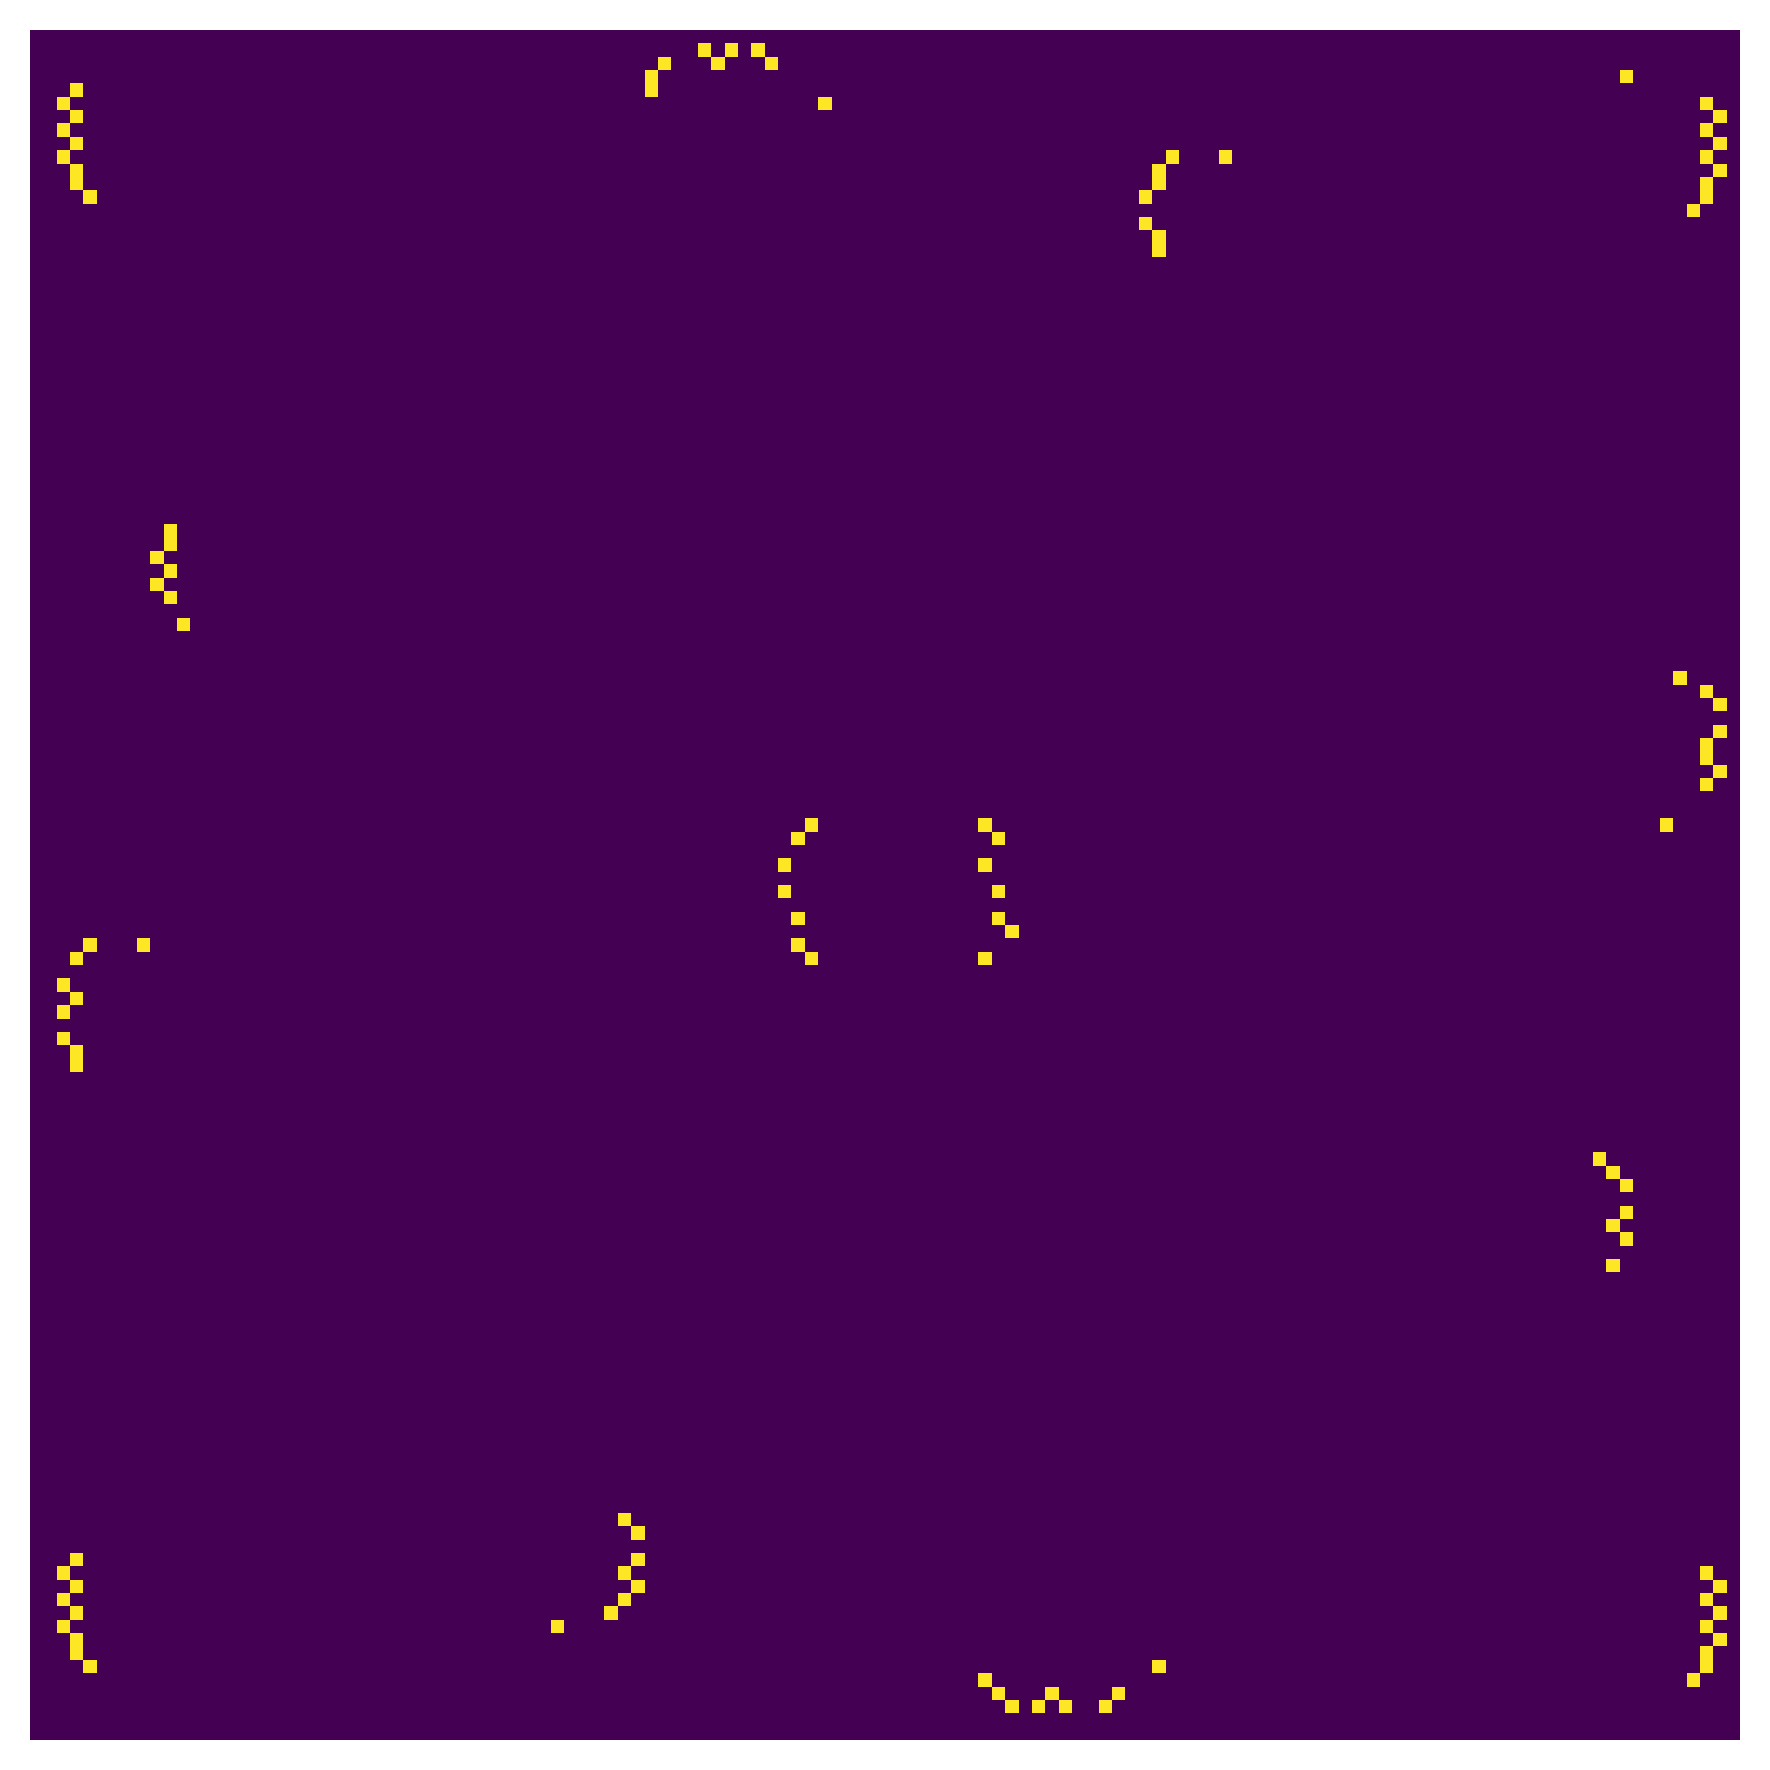

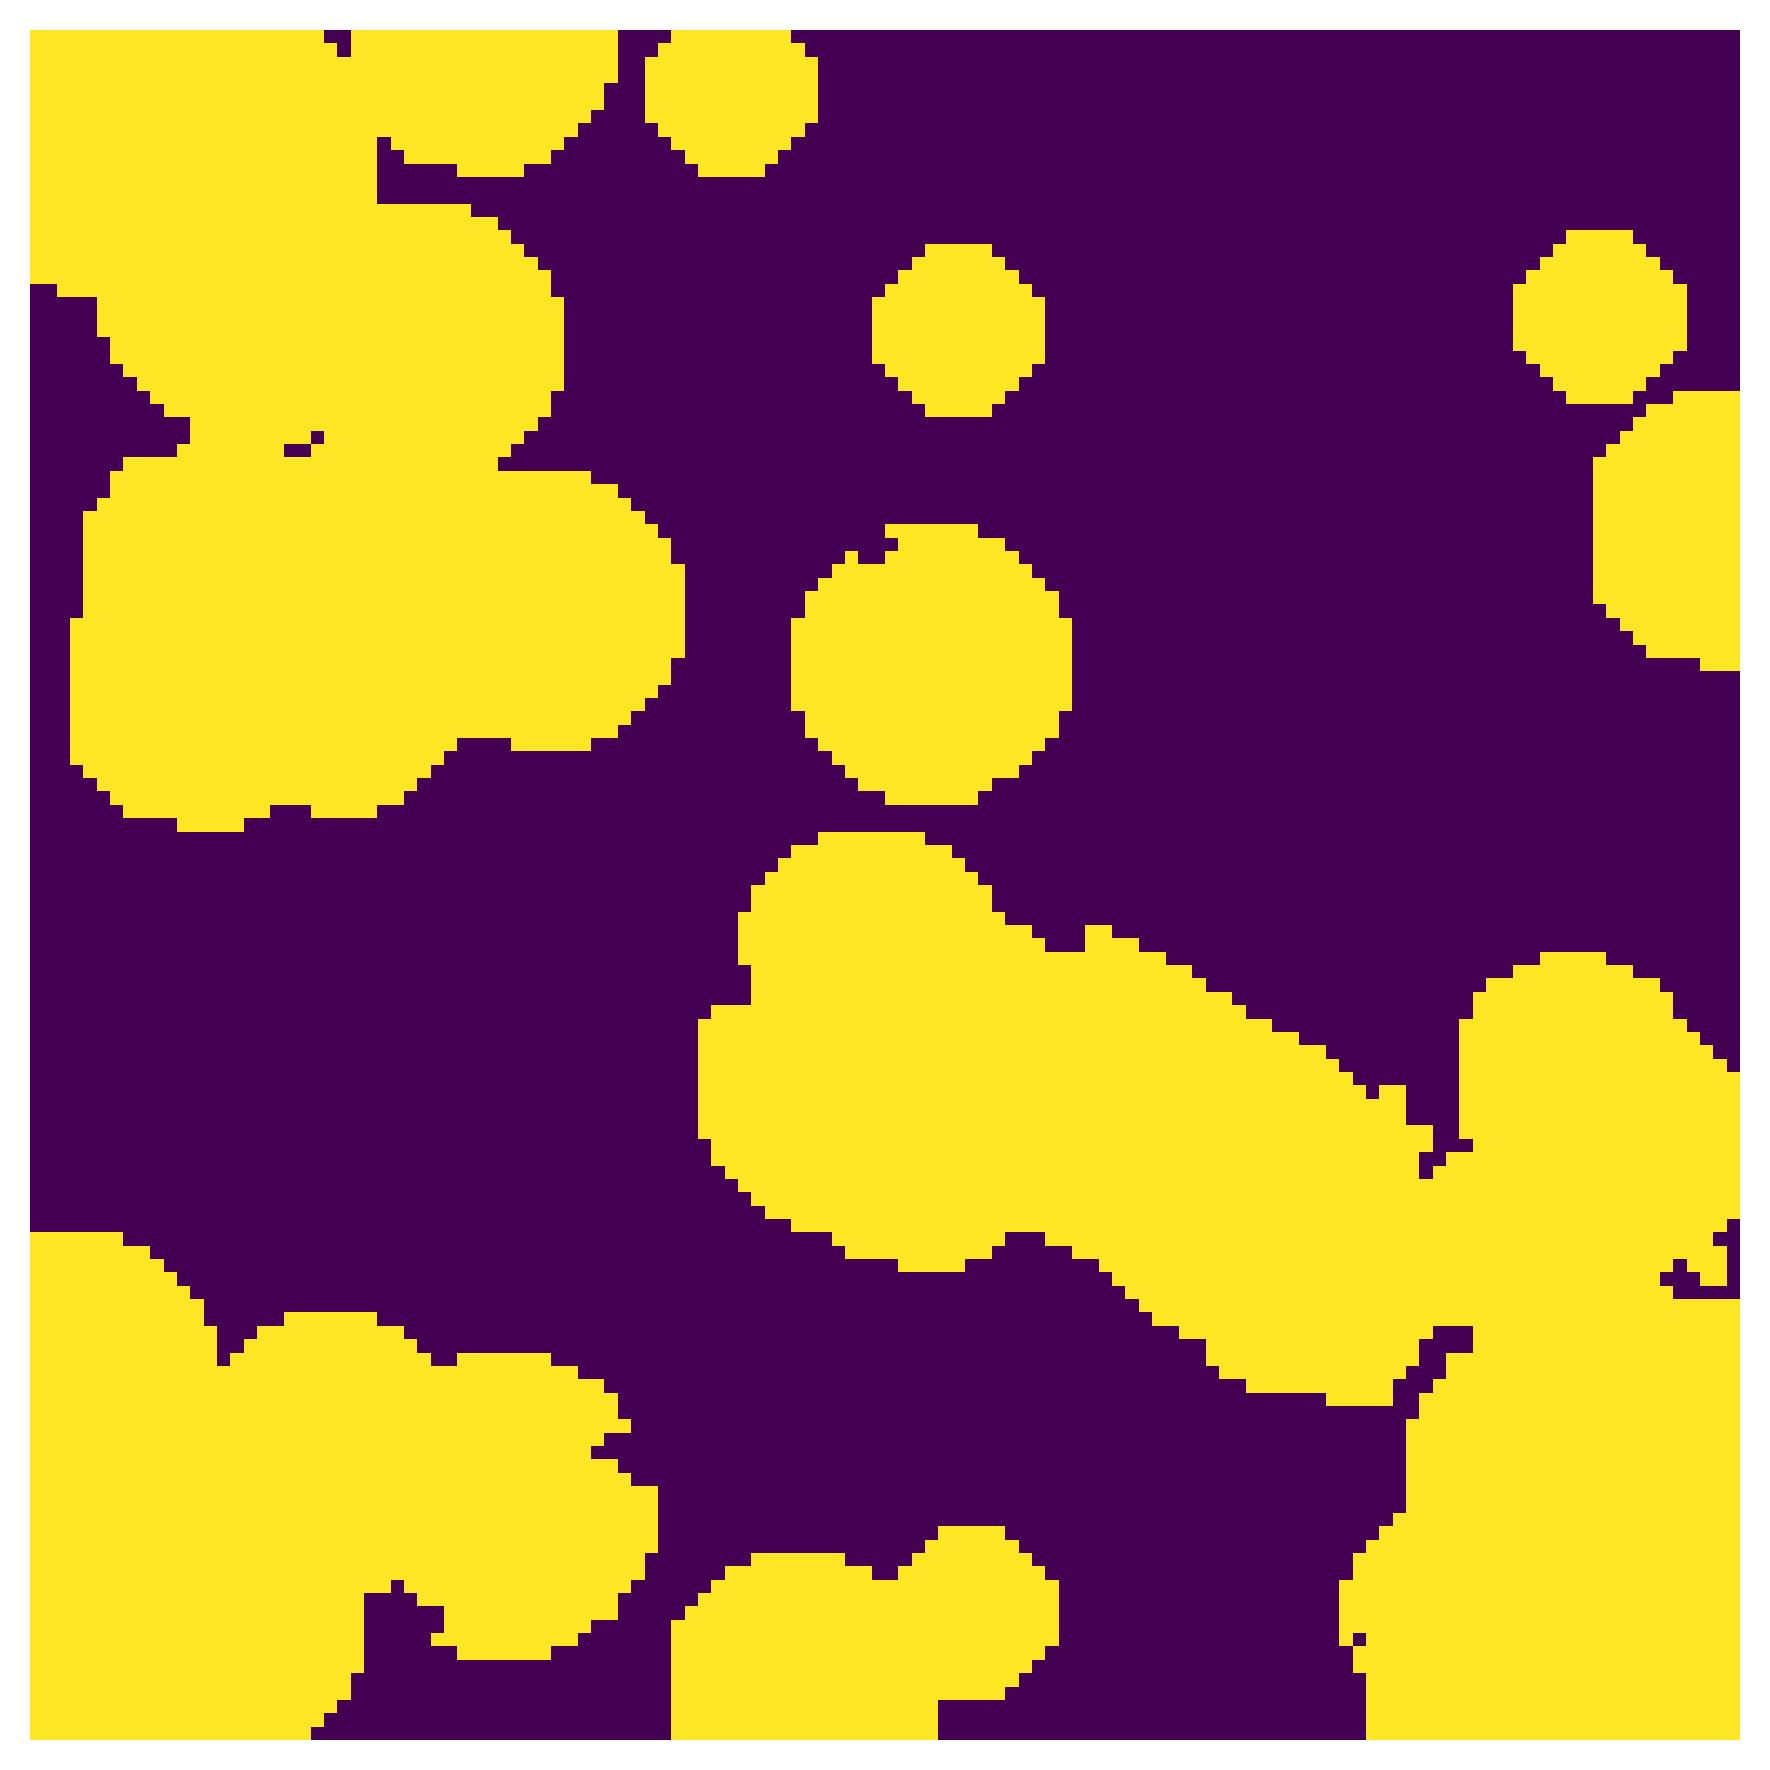

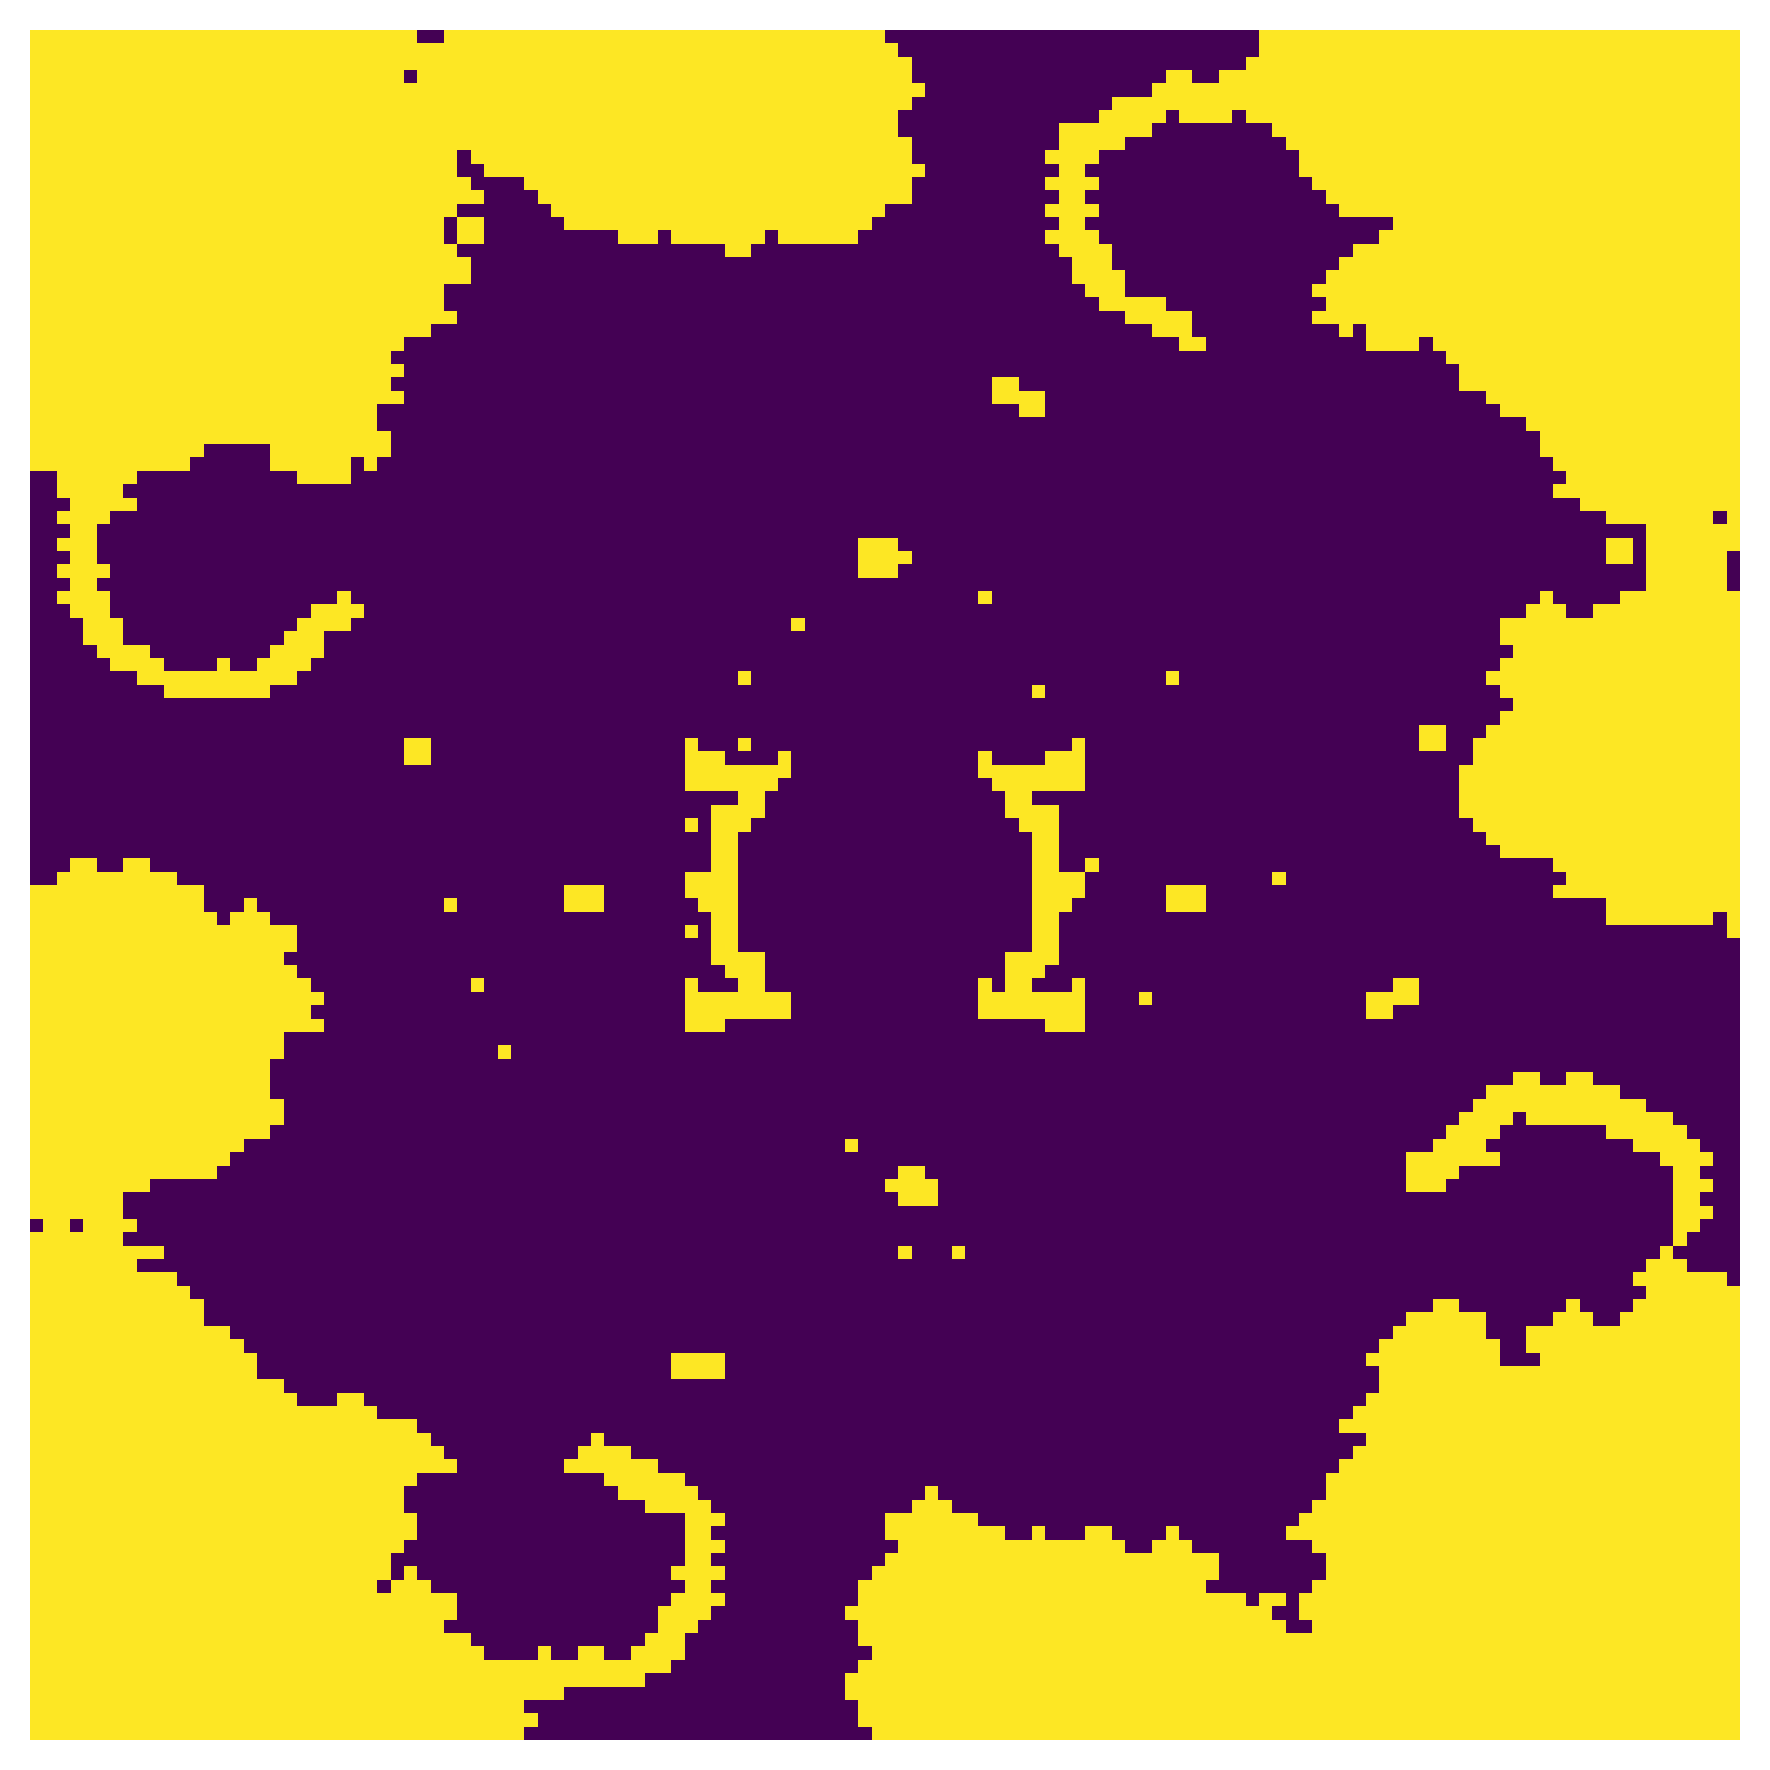

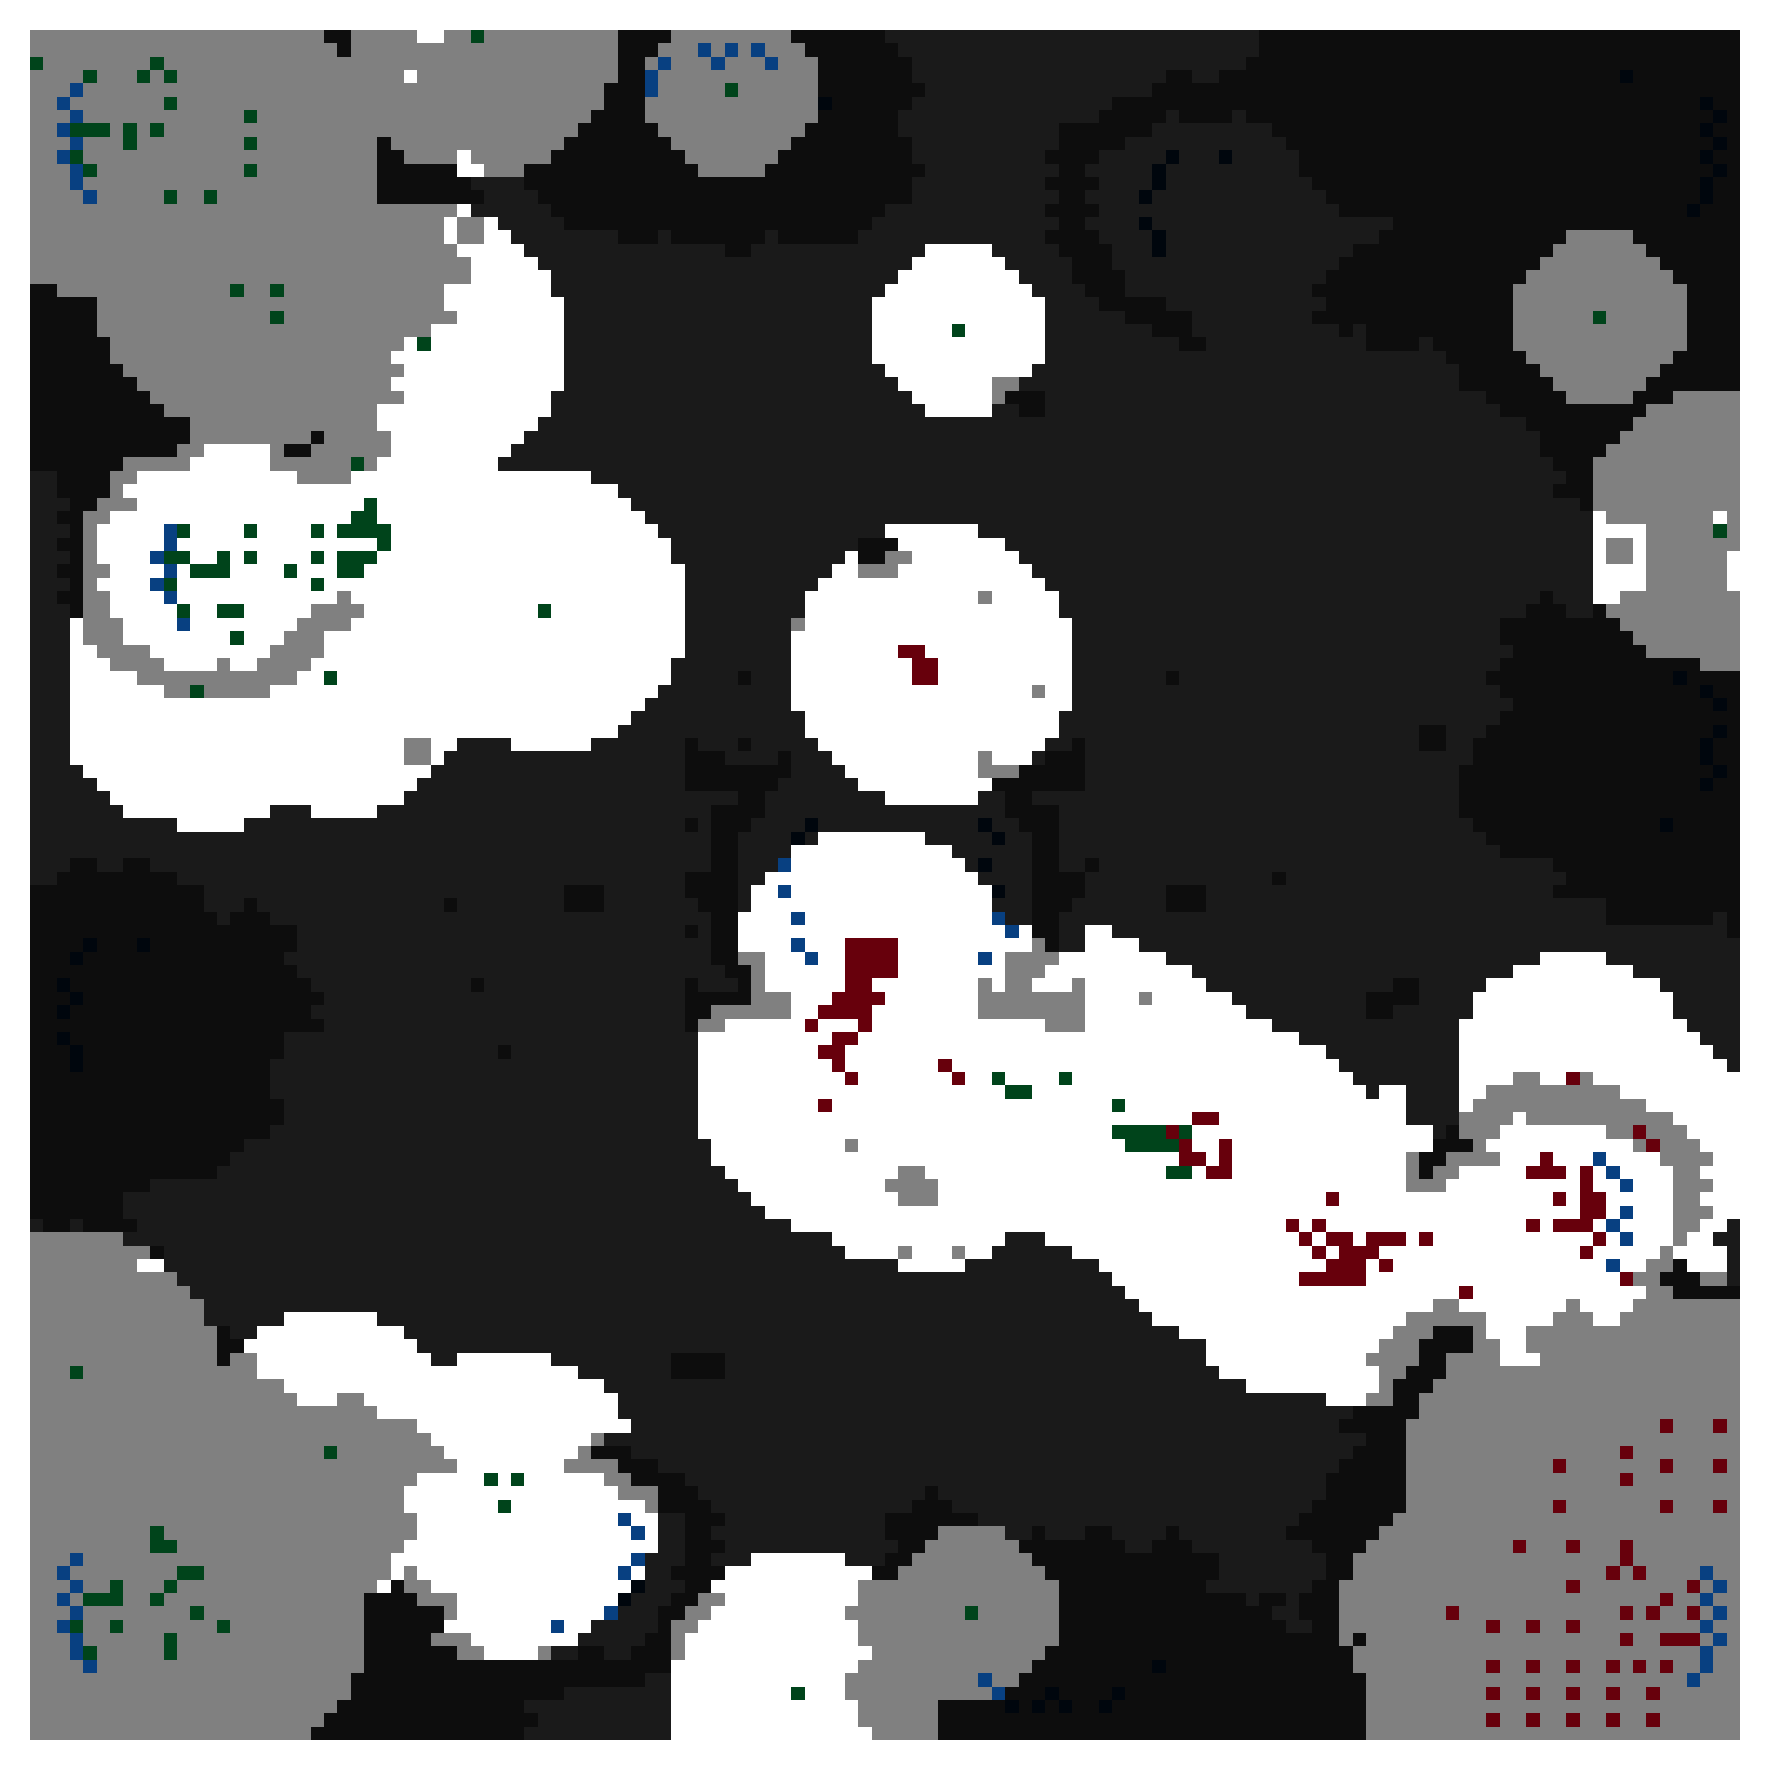

In [162]:
data = zarr.load(npzs[max_frame])
draw_channel(data, rep_name, max_frame)
draw_overview(data, rep_name, max_frame)
